# Reinforcement Learning: Zero to Hero

## A Comprehensive Journey from Foundational Concepts to Advanced Applications

Welcome to this comprehensive Jupyter notebook on Reinforcement Learning! This notebook will guide you through a complete learning journey, starting from the basics and progressing to advanced research topics and real-world applications.

### What You'll Learn

- **Foundational Concepts**: Understanding the core principles of reinforcement learning, including MDPs, value functions, and policies
- **Core Algorithms**: Implementing and understanding key algorithms like Q-Learning, SARSA, DQN, and policy gradient methods
- **Advanced Topics**: Exploring cutting-edge techniques in reward engineering, scaling, and specialized RL methods
- **Real-World Applications**: Seeing how RL is applied in robotics, game playing, finance, healthcare, and more
- **Research & Deployment**: Understanding current research trends and how to deploy RL systems in production

### How to Use This Notebook

1. Execute cells sequentially from top to bottom
2. Read the explanations carefully before running code
3. Experiment with the code examples
4. Modify parameters to see how they affect results
5. Complete the exercises to reinforce your understanding

Let's begin your journey into the exciting world of Reinforcement Learning!

## Table of Contents

1. [Setup & Dependencies](#setup)
2. [Section 1: Foundational Concepts](#section1)
   - [Introduction to Reinforcement Learning](#intro-rl)
   - [Multi-Armed Bandit Problem](#bandits)
   - [Core Terminology and MDP Framework](#mdp)
   - [Policies and Value Functions](#policies)
   - [Dynamic Programming](#dynamic-programming)
   - [Learning Paradigms](#learning-paradigms)
3. [Section 2: Core Algorithms](#section2)
   - [Monte Carlo Methods](#monte-carlo)
   - [Temporal Difference Learning](#td-learning)
   - [Q-Learning](#q-learning)
   - [Deep Q-Networks (DQN)](#dqn)
   - [Policy Optimization Methods](#policy-optimization)
4. [Section 3: Advanced Topics](#section3)
   - [Reward Engineering](#reward-engineering)
   - [Scaling and Generalization](#scaling)
   - [Advanced Policy Methods](#advanced-policy)
   - [Specialized RL Techniques](#specialized)
5. [Section 4: Code Implementations](#section4)
   - [Bandit Algorithms](#bandit-implementations)
   - [MDP and Dynamic Programming](#mdp-implementations)
   - [Monte Carlo Methods](#mc-implementations)
   - [Temporal Difference Methods](#td-implementations)
   - [Deep RL Implementations](#deep-rl-implementations)
6. [Section 5: Real-World Applications](#section5)
   - [Traffic Signal Control](#traffic)
   - [Robotics](#robotics)
   - [Autonomous Trading](#trading)
   - [Recommendation Systems](#recommendations)
   - [Healthcare](#healthcare)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Game Playing](#game-playing)
   - [Energy Management](#energy)
   - [Chess Environment](#chess)
7. [Section 6: Advanced Research & Deployment](#section6)
   - [Current Research Trends](#research-trends)
   - [Ethical and Safety Considerations](#ethics)
   - [Deployment Challenges](#deployment)
   - [End-to-End Pipeline](#pipeline)
   - [Recent Research](#recent-research)
8. [Conclusion and Next Steps](#conclusion)

<a id='setup'></a>
## Setup & Dependencies

Before we begin, we need to set up our Python environment and install the required packages. We recommend using Conda to create an isolated environment for this notebook.

### Option 1: Using Conda (Recommended)

Run the following commands in your terminal to create and activate a new conda environment:

```bash
# Create a new conda environment with Python 3.10
conda create -n rl-notebook python=3.10 -y

# Activate the environment
conda activate rl-notebook

# Install dependencies
conda install numpy matplotlib seaborn pandas -y
conda install pytorch torchvision -c pytorch -y
pip install gym>=0.21.0

# Install Jupyter to run this notebook
conda install jupyter -y
```

### Option 2: Using pip (if not using Conda)

If you prefer to use pip directly, run the cell below to install the required packages.


In [4]:
# Install required packages using pip
# Skip this cell if you've already installed dependencies via conda

!pip install numpy>=1.21.0 matplotlib>=3.4.0 seaborn>=0.11.0 pandas>=1.3.0
!pip install torch>=1.10.0
!pip install gym>=0.21.0

### Import Required Libraries

Now let's import all the libraries we'll be using throughout this notebook.

In [5]:
# Core numerical and scientific computing
import numpy as np
import pandas as pd
from collections import defaultdict, deque
import random
import time

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Reinforcement Learning environments
import gym

# Deep Learning framework
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


### Verify Installation

Let's verify that all packages are installed correctly and check their versions.

In [6]:
# Verification cell - check all installations
import sys

def check_package(package_name, import_name=None):
    """Check if a package is installed and print its version."""
    if import_name is None:
        import_name = package_name
    
    try:
        module = __import__(import_name)
        version = getattr(module, '__version__', 'Unknown')
        print(f"✓ {package_name:20s} version: {version}")
        return True
    except ImportError:
        print(f"✗ {package_name:20s} NOT INSTALLED")
        return False

print("Checking package installations...")
print(f"Python version: {sys.version.split()[0]}")

packages = [
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib'),
    ('seaborn', 'seaborn'),
    ('gym', 'gym'),
    ('torch', 'torch'),
    ('pandas', 'pandas')
]

all_installed = True
for package_name, import_name in packages:
    if not check_package(package_name, import_name):
        all_installed = False

print("" + "="*50)
if all_installed:
    print("✓ All packages installed successfully!")
    print("You're ready to start learning Reinforcement Learning!")
else:
    print("✗ Some packages are missing. Please install them using:")
    print("  pip install numpy matplotlib seaborn gym torch pandas")
print("="*50)

Checking package installations...
Python version: 3.13.11
✓ numpy                version: 2.4.1
✓ matplotlib           version: 3.10.8
✓ seaborn              version: 0.13.2
✓ gym                  version: 0.26.2
✓ torch                version: 2.11.0.dev20260115+cu128
✓ pandas               version: 2.3.3
✓ All packages installed successfully!
You're ready to start learning Reinforcement Learning!


<a id='section1'></a>
## Section 1: Foundational Concepts

In this section, we'll build a solid foundation in reinforcement learning by exploring core concepts, starting with the simplest problems and gradually increasing complexity.

<a id='intro-rl'></a>
### Introduction to Reinforcement Learning

**What is Reinforcement Learning?**

Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. Unlike other machine learning paradigms, RL focuses on learning through trial and error, receiving feedback in the form of rewards or penalties.

**How RL Differs from Other Machine Learning Paradigms:**

1. **Supervised Learning**: 
   - Learns from labeled examples (input-output pairs)
   - The correct answer is provided for each training example
   - Example: Image classification, where each image has a label

2. **Unsupervised Learning**: 
   - Learns patterns from unlabeled data
   - No explicit feedback or correct answers
   - Example: Clustering customers based on purchasing behavior

3. **Reinforcement Learning**: 
   - Learns from interaction with an environment
   - Receives delayed rewards/penalties as feedback
   - Must discover which actions yield the most reward through exploration
   - Example: Teaching a robot to walk, playing chess, or optimizing ad placement

**Key Characteristics of RL:**

- **Sequential Decision Making**: Actions affect future states and rewards
- **Trial and Error**: The agent must explore to discover good strategies
- **Delayed Consequences**: Rewards may come long after the actions that caused them
- **Trade-offs**: Must balance exploration (trying new things) vs exploitation (using known good strategies)

**The RL Loop:**

The fundamental interaction pattern in RL is:

1. Agent observes the current **state** of the environment
2. Agent selects and performs an **action**
3. Environment transitions to a new **state**
4. Agent receives a **reward** signal
5. Repeat

Let's see this in action with a simple example:

In [7]:
# Simple demonstration of the RL loop
# We'll create a basic environment and agent to illustrate the interaction

class SimpleEnvironment:
    """A simple environment where the agent tries to reach a goal."""
    
    def __init__(self):
        self.position = 0  # Agent starts at position 0
        self.goal = 5      # Goal is at position 5
        self.max_steps = 10
        self.current_step = 0
    
    def reset(self):
        """Reset the environment to initial state."""
        self.position = 0
        self.current_step = 0
        return self.position
    
    def step(self, action):
        """Execute an action and return (next_state, reward, done).
        
        Args:
            action: 0 = move left, 1 = move right
        
        Returns:
            next_state: The new position
            reward: Reward for this transition
            done: Whether the episode is finished
        """
        self.current_step += 1
        
        # Update position based on action
        if action == 0:  # Move left
            self.position = max(0, self.position - 1)
        else:  # Move right
            self.position = min(10, self.position + 1)
        
        # Calculate reward
        if self.position == self.goal:
            reward = 10  # Large reward for reaching goal
            done = True
        elif self.current_step >= self.max_steps:
            reward = -5  # Penalty for taking too long
            done = True
        else:
            reward = -1  # Small penalty for each step (encourages efficiency)
            done = False
        
        return self.position, reward, done


class SimpleAgent:
    """A simple agent that takes random actions."""
    
    def select_action(self, state):
        """Select an action (randomly for now)."""
        return np.random.choice([0, 1])  # 0 = left, 1 = right


# Demonstrate the RL loop
print("Demonstrating the Reinforcement Learning Loop")
print("="*60)

env = SimpleEnvironment()
agent = SimpleAgent()

# Run one episode
state = env.reset()
total_reward = 0
step = 0

print(f"Initial State: Position = {state}, Goal = {env.goal}")

done = False
while not done:
    # Agent observes state and selects action
    action = agent.select_action(state)
    action_name = "LEFT" if action == 0 else "RIGHT"
    
    # Environment responds to action
    next_state, reward, done = env.step(action)
    
    # Track cumulative reward
    total_reward += reward
    step += 1
    
    # Display the interaction
    print(f"Step {step}:")
    print(f"  State: {state} → Action: {action_name} → Next State: {next_state}")
    print(f"  Reward: {reward:+.0f} | Total Reward: {total_reward:+.0f}")
    
    if done:
        if next_state == env.goal:
            print(f"✓ Goal reached in {step} steps!")
        else:
            print(f"✗ Failed to reach goal within {env.max_steps} steps.")
    print()
    
    state = next_state

print("="*60)
print(f"Final Total Reward: {total_reward:+.0f}")
print("This demonstrates the core RL loop:")
print("  1. Agent observes STATE")
print("  2. Agent takes ACTION")
print("  3. Environment provides REWARD and new STATE")
print("  4. Repeat until episode ends")

Demonstrating the Reinforcement Learning Loop
Initial State: Position = 0, Goal = 5
Step 1:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -1

Step 2:
  State: 0 → Action: RIGHT → Next State: 1
  Reward: -1 | Total Reward: -2

Step 3:
  State: 1 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -3

Step 4:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -4

Step 5:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -5

Step 6:
  State: 0 → Action: RIGHT → Next State: 1
  Reward: -1 | Total Reward: -6

Step 7:
  State: 1 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -7

Step 8:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -8

Step 9:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -9

Step 10:
  State: 0 → Action: RIGHT → Next State: 1
  Reward: -5 | Total Reward: -14
✗ Failed to reach goal within 10 steps.

Final Total Reward: -14
This demonstrates

**Key Observations:**

- The agent doesn't know the optimal strategy initially
- It must learn through experience which actions lead to higher rewards
- The random agent above is inefficient - a learning agent would improve over time
- This simple example captures the essence of RL: learning to make good decisions through interaction

In the following sections, we'll explore how agents can learn optimal strategies, starting with one of the simplest RL problems: the Multi-Armed Bandit.

<a id='bandits'></a>
### Multi-Armed Bandit Problem

**What is the Multi-Armed Bandit Problem?**

Imagine you're in a casino facing a row of slot machines (also called "one-armed bandits"). Each machine has a different, unknown probability of paying out. You have a limited budget and want to maximize your total winnings. Which machines should you play?

This is the **K-Armed Bandit Problem**, one of the simplest yet most fundamental problems in reinforcement learning. It's called "K-armed" because there are K different slot machines (or "arms") to choose from.

**The Exploration-Exploitation Dilemma**

The bandit problem perfectly illustrates the core challenge in RL:

- **Exploitation**: Play the machine that has given you the best results so far (use your current knowledge)
- **Exploration**: Try other machines to see if they might be better (gather more information)

If you only exploit, you might miss out on better options you haven't tried enough. If you only explore, you waste time on machines you already know are bad. The key is finding the right balance.

**Formal Definition:**

- You have K actions (arms) to choose from
- Each action has an unknown expected reward (the "true value")
- When you select an action, you receive a reward drawn from that action's probability distribution
- Your goal: maximize the total reward over many time steps

Let's implement a simple bandit environment:

In [8]:
class MultiArmedBandit:
    """A K-armed bandit environment.
    
    Each arm has a true mean reward, and pulling an arm gives a reward
    sampled from a normal distribution around that mean.
    """
    
    def __init__(self, k=10, mean_range=(0, 1), std=1.0):
        """Initialize the bandit.
        
        Args:
            k: Number of arms
            mean_range: Range for true mean rewards
            std: Standard deviation of reward distributions
        """
        self.k = k
        self.std = std
        
        # True mean reward for each arm (unknown to the agent)
        self.true_means = np.random.uniform(mean_range[0], mean_range[1], k)
        
        # Track which arm is actually best
        self.best_arm = np.argmax(self.true_means)
        
    def pull(self, arm):
        """Pull an arm and receive a reward.
        
        Args:
            arm: Index of the arm to pull (0 to k-1)
            
        Returns:
            reward: Sampled reward from this arm's distribution
        """
        # Sample reward from normal distribution around true mean
        reward = np.random.normal(self.true_means[arm], self.std)
        return reward
    
    def get_optimal_reward(self):
        """Return the expected reward of the best arm."""
        return self.true_means[self.best_arm]


# Create a 10-armed bandit
np.random.seed(42)
bandit = MultiArmedBandit(k=10)

print("Multi-Armed Bandit Environment Created")
print("="*60)
print(f"Number of arms: {bandit.k}")
print(f"True mean rewards for each arm:")
for i, mean in enumerate(bandit.true_means):
    marker = " ← BEST" if i == bandit.best_arm else ""
    print(f"  Arm {i}: {mean:.3f}{marker}")
print(f"Optimal arm: {bandit.best_arm} (mean reward: {bandit.get_optimal_reward():.3f})")
print("Note: The agent doesn't know these true values!")
print("      It must learn them through experience.")

Multi-Armed Bandit Environment Created
Number of arms: 10
True mean rewards for each arm:
  Arm 0: 0.375
  Arm 1: 0.951 ← BEST
  Arm 2: 0.732
  Arm 3: 0.599
  Arm 4: 0.156
  Arm 5: 0.156
  Arm 6: 0.058
  Arm 7: 0.866
  Arm 8: 0.601
  Arm 9: 0.708
Optimal arm: 1 (mean reward: 0.951)
Note: The agent doesn't know these true values!
      It must learn them through experience.


#### The Greedy Strategy and Its Fatal Flaw

**What is the Greedy Strategy?**

The simplest approach to the bandit problem is the **greedy strategy**: always choose the action that has the highest estimated value based on your experience so far.

**How it works:**
1. Keep track of the average reward received from each arm
2. Always select the arm with the highest average reward
3. Update the average after each pull

**The Fatal Flaw:**

The greedy strategy can easily get stuck on a suboptimal arm! Here's why:

- Suppose you try arm 3 first and get lucky with a high reward
- Now arm 3 has the highest estimated value
- The greedy strategy will keep choosing arm 3 forever
- You'll never discover that arm 7 is actually better!

This is called **premature convergence** - the agent stops exploring too early and misses better options.

Let's implement a greedy agent and see this problem in action:

In [9]:
class GreedyAgent:
    """An agent that always selects the arm with highest estimated value."""
    
    def __init__(self, k):
        """Initialize the agent.
        
        Args:
            k: Number of arms
        """
        self.k = k
        self.q_estimates = np.zeros(k)  # Estimated value of each arm
        self.action_counts = np.zeros(k)  # Number of times each arm was pulled
        
    def select_action(self):
        """Select the arm with highest estimated value (greedy)."""
        # Break ties randomly
        max_value = np.max(self.q_estimates)
        best_arms = np.where(self.q_estimates == max_value)[0]
        return np.random.choice(best_arms)
    
    def update(self, action, reward):
        """Update estimates after receiving a reward.
        
        Uses incremental average formula:
        NewEstimate = OldEstimate + (1/n) * (Reward - OldEstimate)
        """
        self.action_counts[action] += 1
        n = self.action_counts[action]
        
        # Incremental update of average
        self.q_estimates[action] += (1/n) * (reward - self.q_estimates[action])


def run_experiment(agent, bandit, steps=1000):
    """Run an experiment with an agent on a bandit.
    
    Returns:
        rewards: Array of rewards received at each step
        optimal_actions: Array indicating if optimal action was chosen
    """
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for t in range(steps):
        # Agent selects action
        action = agent.select_action()
        
        # Environment provides reward
        reward = bandit.pull(action)
        
        # Agent updates its estimates
        agent.update(action, reward)
        
        # Track results
        rewards[t] = reward
        optimal_actions[t] = 1 if action == bandit.best_arm else 0
    
    return rewards, optimal_actions


# Demonstrate the greedy strategy's failure
print("Demonstrating the Greedy Strategy")
print("="*60)

np.random.seed(42)
bandit = MultiArmedBandit(k=10)
greedy_agent = GreedyAgent(k=10)

rewards, optimal_actions = run_experiment(greedy_agent, bandit, steps=1000)

print(f"After 1000 steps:")
print(f"Arm selection counts:")
for i in range(bandit.k):
    count = greedy_agent.action_counts[i]
    estimate = greedy_agent.q_estimates[i]
    true_value = bandit.true_means[i]
    marker = " ← OPTIMAL" if i == bandit.best_arm else ""
    print(f"  Arm {i}: pulled {count:4.0f} times | "
          f"estimated value: {estimate:6.3f} | true value: {true_value:6.3f}{marker}")

optimal_pct = np.mean(optimal_actions) * 100
avg_reward = np.mean(rewards)
optimal_reward = bandit.get_optimal_reward()

print(f"Performance:")
print(f"  Optimal action selected: {optimal_pct:.1f}% of the time")
print(f"  Average reward: {avg_reward:.3f}")
print(f"  Optimal reward: {optimal_reward:.3f}")
print(f"  Regret: {optimal_reward - avg_reward:.3f}")

print(f"⚠️  Notice: The greedy agent likely got stuck on a suboptimal arm!")
print(f"    It stopped exploring and missed the best option.")

Demonstrating the Greedy Strategy
After 1000 steps:
Arm selection counts:
  Arm 0: pulled    0 times | estimated value:  0.000 | true value:  0.375
  Arm 1: pulled    0 times | estimated value:  0.000 | true value:  0.951 ← OPTIMAL
  Arm 2: pulled  995 times | estimated value:  0.773 | true value:  0.732
  Arm 3: pulled    0 times | estimated value:  0.000 | true value:  0.599
  Arm 4: pulled    0 times | estimated value:  0.000 | true value:  0.156
  Arm 5: pulled    5 times | estimated value: -0.047 | true value:  0.156
  Arm 6: pulled    0 times | estimated value:  0.000 | true value:  0.058
  Arm 7: pulled    0 times | estimated value:  0.000 | true value:  0.866
  Arm 8: pulled    0 times | estimated value:  0.000 | true value:  0.601
  Arm 9: pulled    0 times | estimated value:  0.000 | true value:  0.708
Performance:
  Optimal action selected: 0.0% of the time
  Average reward: 0.769
  Optimal reward: 0.951
  Regret: 0.182
⚠️  Notice: The greedy agent likely got stuck on a subo

#### Visualizing the Greedy Strategy's Failure

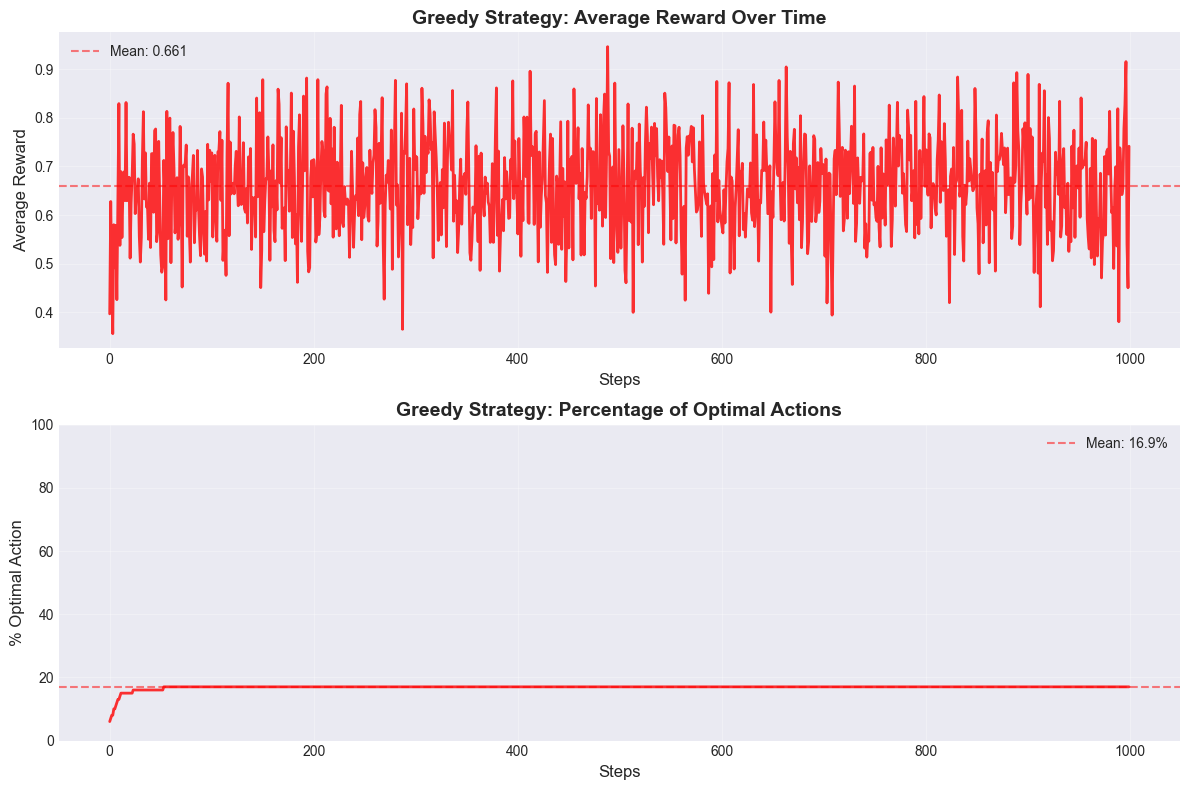

📊 Interpretation:
   - The greedy strategy quickly settles on an arm (often suboptimal)
   - It rarely selects the optimal action because it stopped exploring
   - Performance plateaus early and doesn't improve
   - This demonstrates why pure exploitation fails!


In [10]:
# Run multiple experiments to see the pattern
num_experiments = 100
steps = 1000

all_rewards = np.zeros((num_experiments, steps))
all_optimal = np.zeros((num_experiments, steps))

np.random.seed(42)
for i in range(num_experiments):
    bandit = MultiArmedBandit(k=10)
    agent = GreedyAgent(k=10)
    rewards, optimal = run_experiment(agent, bandit, steps)
    all_rewards[i] = rewards
    all_optimal[i] = optimal

# Calculate averages across experiments
avg_rewards = np.mean(all_rewards, axis=0)
avg_optimal = np.mean(all_optimal, axis=0)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Average reward over time
ax1.plot(avg_rewards, linewidth=2, color='red', alpha=0.8)
ax1.set_xlabel('Steps', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Greedy Strategy: Average Reward Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=np.mean(avg_rewards), color='red', linestyle='--', alpha=0.5, label=f'Mean: {np.mean(avg_rewards):.3f}')
ax1.legend()

# Plot 2: Percentage of optimal actions
ax2.plot(avg_optimal * 100, linewidth=2, color='red', alpha=0.8)
ax2.set_xlabel('Steps', fontsize=12)
ax2.set_ylabel('% Optimal Action', fontsize=12)
ax2.set_title('Greedy Strategy: Percentage of Optimal Actions', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=np.mean(avg_optimal) * 100, color='red', linestyle='--', alpha=0.5, 
            label=f'Mean: {np.mean(avg_optimal)*100:.1f}%')
ax2.legend()
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("   - The greedy strategy quickly settles on an arm (often suboptimal)")
print("   - It rarely selects the optimal action because it stopped exploring")
print("   - Performance plateaus early and doesn't improve")
print("   - This demonstrates why pure exploitation fails!")

#### The Epsilon-Greedy Algorithm

**A Simple Solution to the Exploration-Exploitation Dilemma**

The epsilon-greedy algorithm provides a simple yet effective solution to the greedy strategy's fatal flaw. Instead of always exploiting, it introduces controlled exploration.

**How Epsilon-Greedy Works:**

With probability $\epsilon$ (epsilon): Choose a **random** action (explore)

With probability $1 - \epsilon$: Choose the **best known** action (exploit)

**Mathematical Formulation:**

$$
A_t = \begin{cases}
\text{random action} & \text{with probability } \epsilon \\
\arg\max_a Q_t(a) & \text{with probability } 1 - \epsilon
\end{cases}
$$

where $Q_t(a)$ is the estimated value of action $a$ at time $t$.

**Key Parameters:**

- $\epsilon = 0$: Pure exploitation (greedy strategy)
- $\epsilon = 1$: Pure exploration (random selection)
- $\epsilon = 0.1$: A common choice - explore 10% of the time

**Advantages:**
- Simple to implement
- Guarantees all actions are tried infinitely often (in the limit)
- Balances exploration and exploitation

**Trade-offs:**
- Explores uniformly (doesn't prioritize promising actions)
- Continues exploring even after finding the best action
- Choice of $\epsilon$ affects performance

Let's implement the epsilon-greedy algorithm:

In [11]:
class EpsilonGreedyAgent:
    """An agent that uses epsilon-greedy action selection."""
    
    def __init__(self, k, epsilon=0.1):
        """Initialize the agent.
        
        Args:
            k: Number of arms
            epsilon: Probability of random exploration (0 to 1)
        """
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)  # Estimated value of each arm
        self.action_counts = np.zeros(k)  # Number of times each arm was pulled
        
    def select_action(self):
        """Select action using epsilon-greedy strategy."""
        if np.random.random() < self.epsilon:
            # Explore: choose random action
            return np.random.randint(0, self.k)
        else:
            # Exploit: choose best known action
            max_value = np.max(self.q_estimates)
            best_arms = np.where(self.q_estimates == max_value)[0]
            return np.random.choice(best_arms)
    
    def update(self, action, reward):
        """Update estimates after receiving a reward."""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        
        # Incremental update of average
        self.q_estimates[action] += (1/n) * (reward - self.q_estimates[action])


# Test epsilon-greedy with different epsilon values
print("Epsilon-Greedy Algorithm Demonstration")
print("="*60)

np.random.seed(42)
bandit = MultiArmedBandit(k=10)

epsilon_values = [0.0, 0.01, 0.1, 0.3]
results = {}

for eps in epsilon_values:
    agent = EpsilonGreedyAgent(k=10, epsilon=eps)
    rewards, optimal_actions = run_experiment(agent, bandit, steps=1000)
    
    results[eps] = {
        'rewards': rewards,
        'optimal': optimal_actions,
        'avg_reward': np.mean(rewards),
        'optimal_pct': np.mean(optimal_actions) * 100
    }
    
    print(f"ε = {eps:.2f}:")
    print(f"  Average reward: {results[eps]['avg_reward']:.3f}")
    print(f"  Optimal action: {results[eps]['optimal_pct']:.1f}% of the time")

print("" + "="*60)
print("💡 Key Insight:")
print("   - ε = 0.0 (greedy) gets stuck on suboptimal actions")
print("   - Small ε values (0.01-0.1) balance exploration and exploitation well")
print("   - Large ε values (0.3) explore too much and waste opportunities")

Epsilon-Greedy Algorithm Demonstration
ε = 0.00:
  Average reward: 1.002
  Optimal action: 100.0% of the time
ε = 0.01:
  Average reward: 0.918
  Optimal action: 95.4% of the time
ε = 0.10:
  Average reward: 0.860
  Optimal action: 80.4% of the time
ε = 0.30:
  Average reward: 0.713
  Optimal action: 37.6% of the time
💡 Key Insight:
   - ε = 0.0 (greedy) gets stuck on suboptimal actions
   - Small ε values (0.01-0.1) balance exploration and exploitation well
   - Large ε values (0.3) explore too much and waste opportunities


#### Comparing Greedy vs Epsilon-Greedy Performance

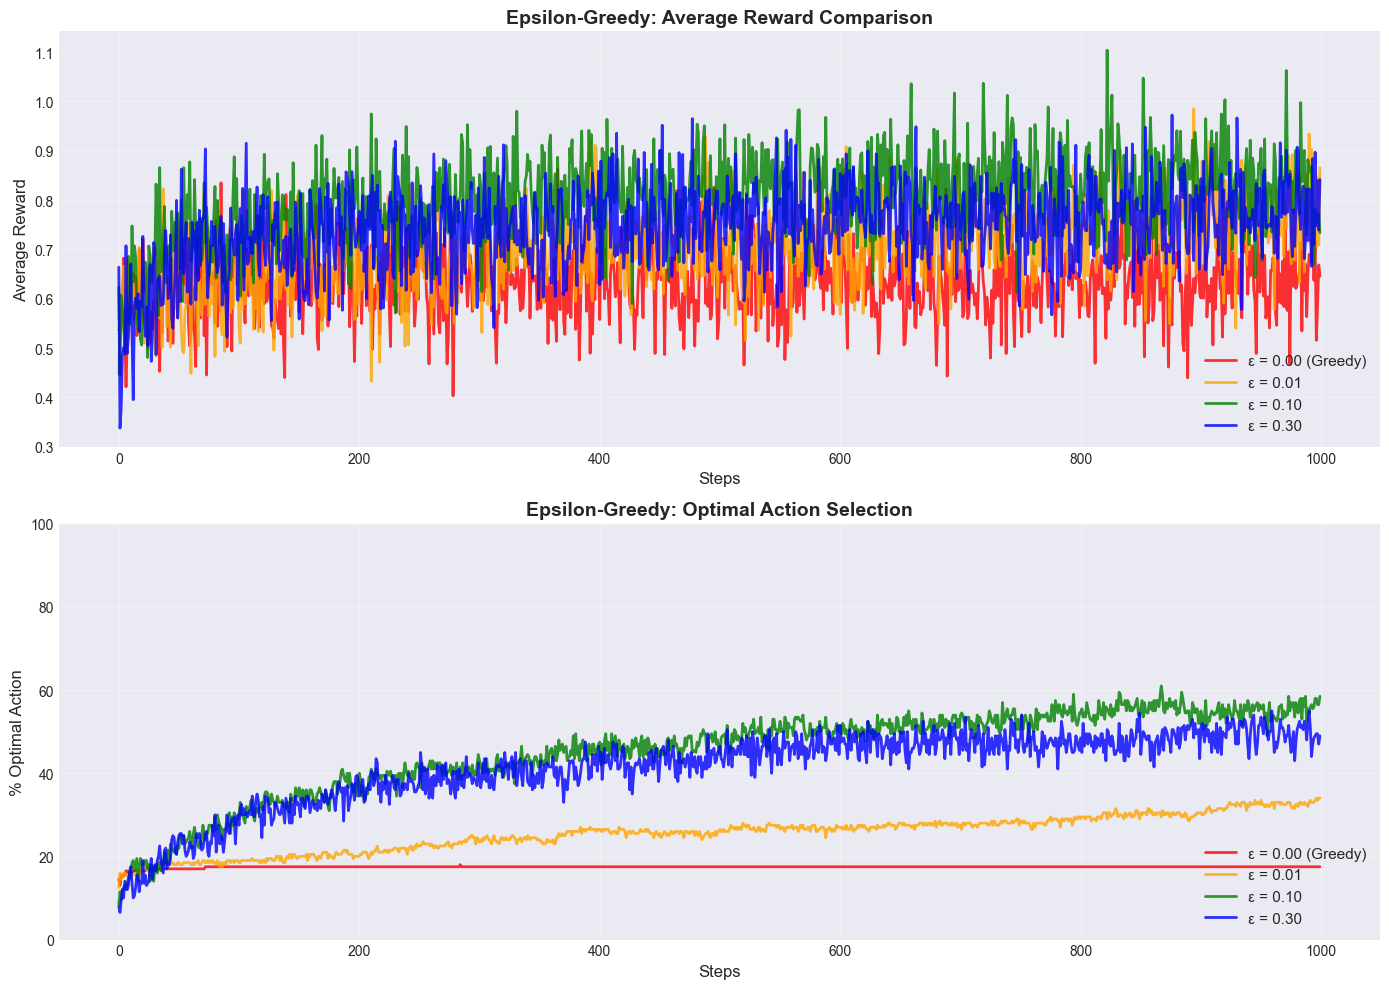

📊 Performance Summary (averaged over 200 experiments):
Strategy             Avg Reward      Optimal %       Final Optimal %
ε = 0.00 (Greedy)    0.634           17.4            17.5%
ε = 0.01             0.701           25.5            32.3%
ε = 0.10             0.803           45.1            55.0%
ε = 0.30             0.742           41.3            49.7%
✅ Conclusions:
   1. Greedy (ε=0) performs poorly due to lack of exploration
   2. Small epsilon (0.01-0.1) achieves good balance
   3. ε=0.1 typically performs best in this setting
   4. Too much exploration (ε=0.3) wastes opportunities to exploit
   5. Epsilon-greedy successfully solves the exploration-exploitation dilemma!


In [12]:
# Run comprehensive comparison across multiple experiments
num_experiments = 200
steps = 1000
epsilon_values = [0.0, 0.01, 0.1, 0.3]

# Store results for each epsilon value
all_results = {eps: {'rewards': [], 'optimal': []} for eps in epsilon_values}

np.random.seed(42)
for i in range(num_experiments):
    bandit = MultiArmedBandit(k=10)
    
    for eps in epsilon_values:
        agent = EpsilonGreedyAgent(k=10, epsilon=eps)
        rewards, optimal = run_experiment(agent, bandit, steps)
        all_results[eps]['rewards'].append(rewards)
        all_results[eps]['optimal'].append(optimal)

# Calculate averages
avg_results = {}
for eps in epsilon_values:
    avg_results[eps] = {
        'rewards': np.mean(all_results[eps]['rewards'], axis=0),
        'optimal': np.mean(all_results[eps]['optimal'], axis=0)
    }

# Create comprehensive visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

colors = ['red', 'orange', 'green', 'blue']
labels = [f'ε = {eps:.2f}' + (' (Greedy)' if eps == 0 else '') for eps in epsilon_values]

# Plot 1: Average reward over time
for eps, color, label in zip(epsilon_values, colors, labels):
    ax1.plot(avg_results[eps]['rewards'], linewidth=2, color=color, alpha=0.8, label=label)

ax1.set_xlabel('Steps', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Epsilon-Greedy: Average Reward Comparison', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Percentage of optimal actions
for eps, color, label in zip(epsilon_values, colors, labels):
    ax2.plot(avg_results[eps]['optimal'] * 100, linewidth=2, color=color, alpha=0.8, label=label)

ax2.set_xlabel('Steps', fontsize=12)
ax2.set_ylabel('% Optimal Action', fontsize=12)
ax2.set_title('Epsilon-Greedy: Optimal Action Selection', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Print summary statistics
print("📊 Performance Summary (averaged over {} experiments):".format(num_experiments))
print("="*70)
print(f"{'Strategy':<20} {'Avg Reward':<15} {'Optimal %':<15} {'Final Optimal %'}")
print("="*70)

for eps in epsilon_values:
    strategy = f"ε = {eps:.2f}" + (" (Greedy)" if eps == 0 else "")
    avg_reward = np.mean(avg_results[eps]['rewards'])
    avg_optimal = np.mean(avg_results[eps]['optimal']) * 100
    final_optimal = np.mean(avg_results[eps]['optimal'][-100:]) * 100  # Last 100 steps
    
    print(f"{strategy:<20} {avg_reward:<15.3f} {avg_optimal:<15.1f} {final_optimal:.1f}%")

print("="*70)
print("✅ Conclusions:")
print("   1. Greedy (ε=0) performs poorly due to lack of exploration")
print("   2. Small epsilon (0.01-0.1) achieves good balance")
print("   3. ε=0.1 typically performs best in this setting")
print("   4. Too much exploration (ε=0.3) wastes opportunities to exploit")
print("   5. Epsilon-greedy successfully solves the exploration-exploitation dilemma!")

#### Optimistic Initial Values: Exploration Through Disappointment

**A Clever Alternative to Epsilon-Greedy**

The Optimistic Initial Values approach provides a different solution to encourage exploration. Instead of randomly exploring, it uses **disappointment-driven exploration**.

**The Key Idea:**

Initialize all action-value estimates to be **optimistically high** (higher than any realistic reward). When the agent tries an action and receives a lower-than-expected reward, it becomes "disappointed" and tries other actions, naturally encouraging exploration.

**How It Works:**

1. Set initial Q-values to a high value (e.g., +5 when true rewards are around 0-1)
2. Use a greedy strategy (no epsilon needed!)
3. Each action will initially seem promising
4. After trying an action, its estimate decreases toward the true value
5. The agent naturally tries all actions before settling on the best one

**Mathematical Intuition:**

If we initialize $Q_0(a) = c$ for all actions where $c$ is large:

$$Q_{n+1}(a) = Q_n(a) + \frac{1}{n+1}(R_n - Q_n(a))$$

Since $R_n < Q_n(a)$ initially, the estimate decreases, making other untried actions more attractive.

**Advantages:**
- No need to tune an epsilon parameter
- Exploration happens naturally through the learning process
- Simple to implement
- Works well for stationary problems

**Disadvantages:**
- Only explores at the beginning (not suitable for non-stationary problems)
- Requires knowing a good initial value
- Less flexible than epsilon-greedy

Let's implement and compare this approach:

In [13]:
class OptimisticGreedyAgent:
    """A greedy agent with optimistic initial value estimates."""
    
    def __init__(self, k, initial_value=5.0):
        """Initialize the agent with optimistic values.
        
        Args:
            k: Number of arms
            initial_value: Optimistic initial estimate for all actions
        """
        self.k = k
        self.initial_value = initial_value
        # Initialize all estimates optimistically
        self.q_estimates = np.ones(k) * initial_value
        self.action_counts = np.zeros(k)
        
    def select_action(self):
        """Select action greedily (highest estimated value)."""
        max_value = np.max(self.q_estimates)
        best_arms = np.where(self.q_estimates == max_value)[0]
        return np.random.choice(best_arms)
    
    def update(self, action, reward):
        """Update estimates after receiving a reward."""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        
        # Incremental update
        self.q_estimates[action] += (1/n) * (reward - self.q_estimates[action])


# Demonstrate optimistic initial values
print("Optimistic Initial Values Demonstration")
print("="*60)

np.random.seed(42)
bandit = MultiArmedBandit(k=10)

print(f"True reward range: [{bandit.true_means.min():.2f}, {bandit.true_means.max():.2f}]")
print(f"Optimal arm: {bandit.best_arm} (mean: {bandit.get_optimal_reward():.3f})")

# Test different initial values
initial_values = [0.0, 2.0, 5.0, 10.0]
optimistic_results = {}

for init_val in initial_values:
    agent = OptimisticGreedyAgent(k=10, initial_value=init_val)
    rewards, optimal_actions = run_experiment(agent, bandit, steps=1000)
    
    optimistic_results[init_val] = {
        'rewards': rewards,
        'optimal': optimal_actions,
        'avg_reward': np.mean(rewards),
        'optimal_pct': np.mean(optimal_actions) * 100,
        'agent': agent
    }
    
    print(f"Initial Value = {init_val:.1f}:")
    print(f"  Average reward: {optimistic_results[init_val]['avg_reward']:.3f}")
    print(f"  Optimal action: {optimistic_results[init_val]['optimal_pct']:.1f}% of the time")
    print(f"  Final estimates: {agent.q_estimates}")
    print()

print("="*60)
print("💡 Key Observations:")
print("   - Initial value = 0: Behaves like standard greedy (poor exploration)")
print("   - Initial value = 5-10: Encourages exploration through disappointment")
print("   - Higher initial values → more initial exploration")
print("   - Eventually converges to true values regardless of initialization")

Optimistic Initial Values Demonstration
True reward range: [0.06, 0.95]
Optimal arm: 1 (mean: 0.951)
Initial Value = 0.0:
  Average reward: 0.769
  Optimal action: 0.0% of the time
  Final estimates: [ 0.          0.          0.77264466  0.          0.         -0.04742012
  0.          0.          0.          0.        ]

Initial Value = 2.0:
  Average reward: 0.999
  Optimal action: 97.2% of the time
  Final estimates: [-0.27687788  1.00938738  0.91093879  0.02542663 -0.42368227  0.94048023
 -0.27732853  0.6236997   0.14081957  0.6839677 ]

Initial Value = 5.0:
  Average reward: 0.694
  Optimal action: 0.1% of the time
  Final estimates: [-1.62932225 -0.6671196   0.70167897  0.33414364  0.40153581 -0.12311395
  0.13697971  0.0897036   0.62425373  0.4994691 ]

Initial Value = 10.0:
  Average reward: 0.846
  Optimal action: 0.1% of the time
  Final estimates: [ 0.20995866  0.23029945  0.11867543 -0.64257542 -0.37728609 -0.06660743
  0.58104356  0.85979366  0.38983976 -0.05420993]

💡 Key

#### Comparing Optimistic Initial Values with Epsilon-Greedy

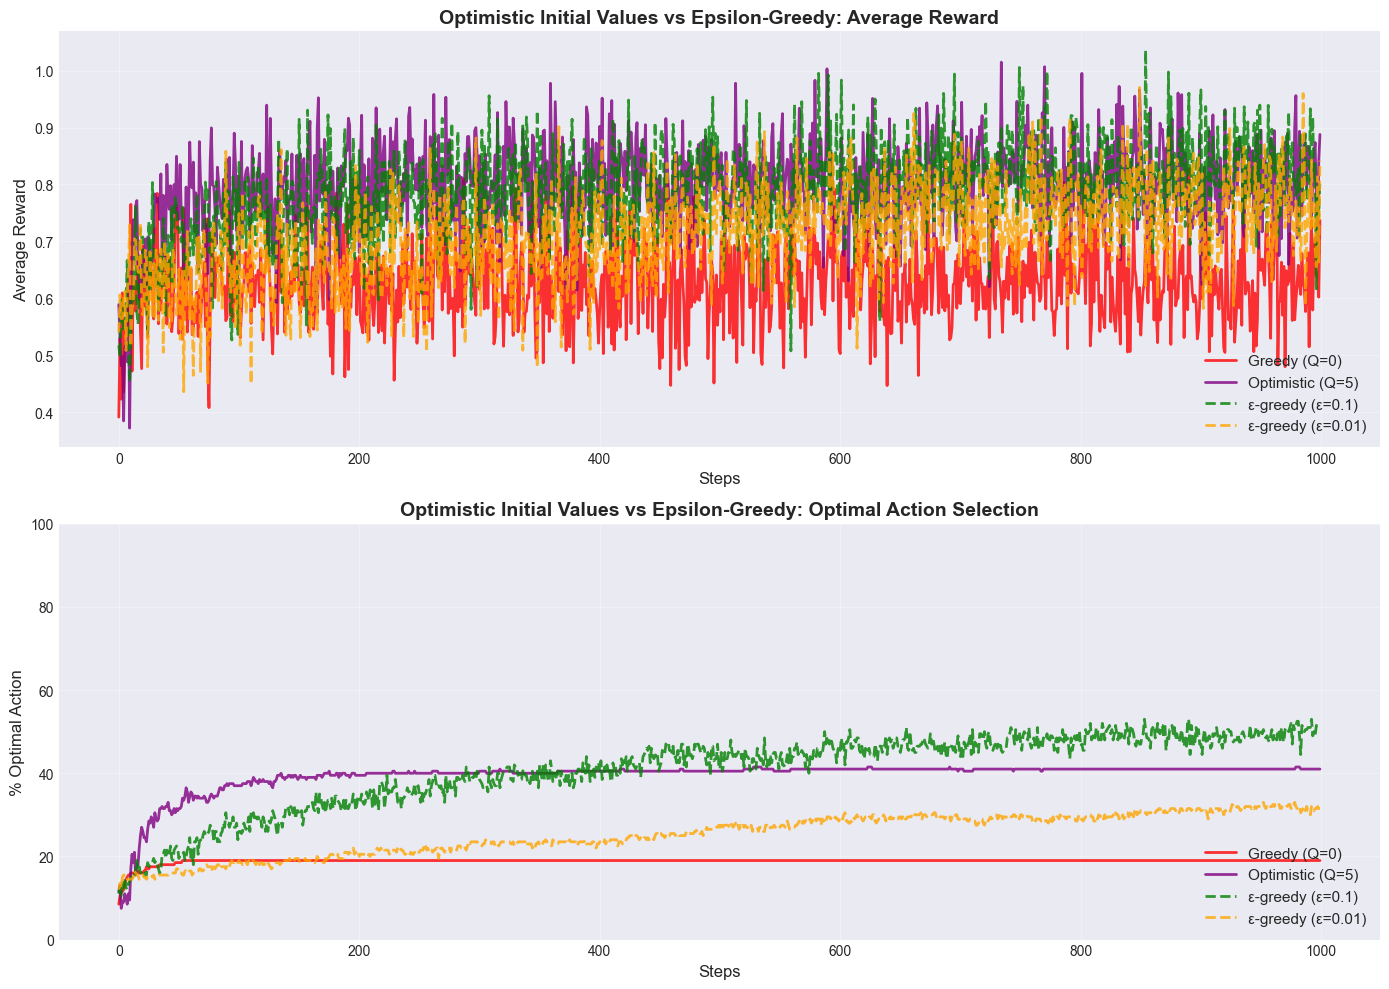

📊 Performance Comparison (averaged over 200 experiments):
Strategy                  Avg Reward      Optimal %       Early (0-100)   Late (900-1000)
Greedy (Q=0)              0.627           18.9            17.7            19.0%
Optimistic (Q=5)          0.797           39.4            29.4            41.0%
ε-greedy (ε=0.1)          0.786           40.7            20.8            49.3%
ε-greedy (ε=0.01)         0.710           25.3            16.2            31.6%
✅ Key Insights:
   1. Optimistic initialization explores more early on
   2. Epsilon-greedy maintains consistent exploration throughout
   3. Optimistic approach eventually stops exploring (greedy after learning)
   4. Both methods significantly outperform standard greedy
   5. Choice depends on problem: stationary → optimistic, non-stationary → epsilon-greedy


In [14]:
# Comprehensive comparison: Optimistic vs Epsilon-Greedy
num_experiments = 200
steps = 1000

# Strategies to compare
strategies = {
    'Greedy (Q=0)': {'type': 'optimistic', 'init': 0.0},
    'Optimistic (Q=5)': {'type': 'optimistic', 'init': 5.0},
    'ε-greedy (ε=0.1)': {'type': 'epsilon', 'epsilon': 0.1},
    'ε-greedy (ε=0.01)': {'type': 'epsilon', 'epsilon': 0.01}
}

comparison_results = {name: {'rewards': [], 'optimal': []} for name in strategies.keys()}

np.random.seed(42)
for i in range(num_experiments):
    bandit = MultiArmedBandit(k=10)
    
    for name, config in strategies.items():
        if config['type'] == 'optimistic':
            agent = OptimisticGreedyAgent(k=10, initial_value=config['init'])
        else:
            agent = EpsilonGreedyAgent(k=10, epsilon=config['epsilon'])
        
        rewards, optimal = run_experiment(agent, bandit, steps)
        comparison_results[name]['rewards'].append(rewards)
        comparison_results[name]['optimal'].append(optimal)

# Calculate averages
avg_comparison = {}
for name in strategies.keys():
    avg_comparison[name] = {
        'rewards': np.mean(comparison_results[name]['rewards'], axis=0),
        'optimal': np.mean(comparison_results[name]['optimal'], axis=0)
    }

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

colors = ['red', 'purple', 'green', 'orange']
linestyles = ['-', '-', '--', '--']

# Plot 1: Average reward
for (name, color, ls) in zip(strategies.keys(), colors, linestyles):
    ax1.plot(avg_comparison[name]['rewards'], linewidth=2, color=color, 
             linestyle=ls, alpha=0.8, label=name)

ax1.set_xlabel('Steps', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Optimistic Initial Values vs Epsilon-Greedy: Average Reward', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Optimal action percentage
for (name, color, ls) in zip(strategies.keys(), colors, linestyles):
    ax2.plot(avg_comparison[name]['optimal'] * 100, linewidth=2, color=color, 
             linestyle=ls, alpha=0.8, label=name)

ax2.set_xlabel('Steps', fontsize=12)
ax2.set_ylabel('% Optimal Action', fontsize=12)
ax2.set_title('Optimistic Initial Values vs Epsilon-Greedy: Optimal Action Selection', 
              fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Summary statistics
print("📊 Performance Comparison (averaged over {} experiments):".format(num_experiments))
print("="*80)
print(f"{'Strategy':<25} {'Avg Reward':<15} {'Optimal %':<15} {'Early (0-100)':<15} {'Late (900-1000)'}")
print("="*80)

for name in strategies.keys():
    avg_reward = np.mean(avg_comparison[name]['rewards'])
    avg_optimal = np.mean(avg_comparison[name]['optimal']) * 100
    early_optimal = np.mean(avg_comparison[name]['optimal'][:100]) * 100
    late_optimal = np.mean(avg_comparison[name]['optimal'][-100:]) * 100
    
    print(f"{name:<25} {avg_reward:<15.3f} {avg_optimal:<15.1f} {early_optimal:<15.1f} {late_optimal:.1f}%")

print("="*80)
print("✅ Key Insights:")
print("   1. Optimistic initialization explores more early on")
print("   2. Epsilon-greedy maintains consistent exploration throughout")
print("   3. Optimistic approach eventually stops exploring (greedy after learning)")
print("   4. Both methods significantly outperform standard greedy")
print("   5. Choice depends on problem: stationary → optimistic, non-stationary → epsilon-greedy")

#### Upper Confidence Bound (UCB): Uncertainty-Driven Exploration

**The Most Sophisticated Bandit Algorithm**

The Upper Confidence Bound (UCB) algorithm represents a more principled approach to the exploration-exploitation dilemma. Instead of exploring randomly (epsilon-greedy) or through disappointment (optimistic initialization), UCB explores based on **uncertainty**.

**The Core Principle:**

"It's reasonable to be optimistic in the face of uncertainty."

UCB selects actions based on both:
1. **Estimated value** (exploitation)
2. **Uncertainty in that estimate** (exploration)

Actions that have been tried less often have higher uncertainty, making them more attractive for exploration.

**Mathematical Formulation:**

The UCB action selection rule is:

$$A_t = \arg\max_a \left[ Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}} \right]$$

where:
- $Q_t(a)$ = estimated value of action $a$ at time $t$ (exploitation term)
- $c$ = exploration parameter (controls degree of exploration)
- $t$ = current time step (total number of actions taken)
- $N_t(a)$ = number of times action $a$ has been selected (uncertainty term)
- $\sqrt{\frac{\ln t}{N_t(a)}}$ = uncertainty bonus (larger for less-tried actions)

**How the Uncertainty Bonus Works:**

- Actions tried fewer times have larger $\sqrt{\frac{\ln t}{N_t(a)}}$ (more uncertainty)
- As an action is tried more, $N_t(a)$ increases and the bonus decreases
- The $\ln t$ term ensures all actions are eventually tried
- The bonus naturally balances exploration and exploitation

**Advantages:**
- No random exploration - deterministic given the history
- Automatically balances exploration and exploitation
- Theoretical guarantees on performance (logarithmic regret)
- Prioritizes promising actions while ensuring all are tried

**Disadvantages:**
- More complex to implement
- Requires tuning the $c$ parameter
- Assumes stationary reward distributions

Let's implement UCB:

In [15]:
class UCBAgent:
    """An agent using Upper Confidence Bound action selection."""
    
    def __init__(self, k, c=2.0):
        """Initialize the UCB agent.
        
        Args:
            k: Number of arms
            c: Exploration parameter (typically sqrt(2) or 2)
        """
        self.k = k
        self.c = c
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.t = 0  # Total time steps
        
    def select_action(self):
        """Select action using UCB formula."""
        self.t += 1
        
        # First, try each action at least once
        if self.t <= self.k:
            return self.t - 1
        
        # Calculate UCB values for all actions
        ucb_values = np.zeros(self.k)
        for a in range(self.k):
            if self.action_counts[a] == 0:
                # Untried actions get infinite value (shouldn't happen after initial phase)
                ucb_values[a] = float('inf')
            else:
                # UCB formula: Q(a) + c * sqrt(ln(t) / N(a))
                exploitation = self.q_estimates[a]
                exploration = self.c * np.sqrt(np.log(self.t) / self.action_counts[a])
                ucb_values[a] = exploitation + exploration
        
        # Select action with highest UCB value
        max_ucb = np.max(ucb_values)
        best_actions = np.where(ucb_values == max_ucb)[0]
        return np.random.choice(best_actions)
    
    def update(self, action, reward):
        """Update estimates after receiving a reward."""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        
        # Incremental update
        self.q_estimates[action] += (1/n) * (reward - self.q_estimates[action])


# Demonstrate UCB algorithm
print("Upper Confidence Bound (UCB) Algorithm Demonstration")
print("="*60)

np.random.seed(42)
bandit = MultiArmedBandit(k=10)

print(f"Optimal arm: {bandit.best_arm} (mean: {bandit.get_optimal_reward():.3f})")

# Test different c values
c_values = [0.5, 1.0, 2.0, 4.0]
ucb_results = {}

for c in c_values:
    agent = UCBAgent(k=10, c=c)
    rewards, optimal_actions = run_experiment(agent, bandit, steps=1000)
    
    ucb_results[c] = {
        'rewards': rewards,
        'optimal': optimal_actions,
        'avg_reward': np.mean(rewards),
        'optimal_pct': np.mean(optimal_actions) * 100
    }
    
    print(f"c = {c:.1f}:")
    print(f"  Average reward: {ucb_results[c]['avg_reward']:.3f}")
    print(f"  Optimal action: {ucb_results[c]['optimal_pct']:.1f}% of the time")
    print(f"  Action counts: {agent.action_counts.astype(int)}")
    print()

print("="*60)
print("💡 Key Observations:")
print("   - Small c (0.5): Less exploration, may converge faster but risk suboptimal")
print("   - Medium c (1-2): Good balance, typical choice")
print("   - Large c (4): More exploration, ensures thorough search")
print("   - UCB naturally tries all actions but focuses on promising ones")

Upper Confidence Bound (UCB) Algorithm Demonstration
Optimal arm: 1 (mean: 0.951)
c = 0.5:
  Average reward: 0.953
  Optimal action: 91.2% of the time
  Action counts: [  2 912   9   2   2   1   1  44   1  26]

c = 1.0:
  Average reward: 0.922
  Optimal action: 63.3% of the time
  Action counts: [ 16 633  63  50  17   3   6 146   5  61]

c = 2.0:
  Average reward: 0.786
  Optimal action: 43.5% of the time
  Action counts: [ 29 435  99  90  28  15  12 132  68  92]

c = 4.0:
  Average reward: 0.643
  Optimal action: 17.6% of the time
  Action counts: [ 70 176  92 119  34  44  42 184 119 120]

💡 Key Observations:
   - Small c (0.5): Less exploration, may converge faster but risk suboptimal
   - Medium c (1-2): Good balance, typical choice
   - Large c (4): More exploration, ensures thorough search
   - UCB naturally tries all actions but focuses on promising ones


#### Comprehensive Comparison: All Three Strategies

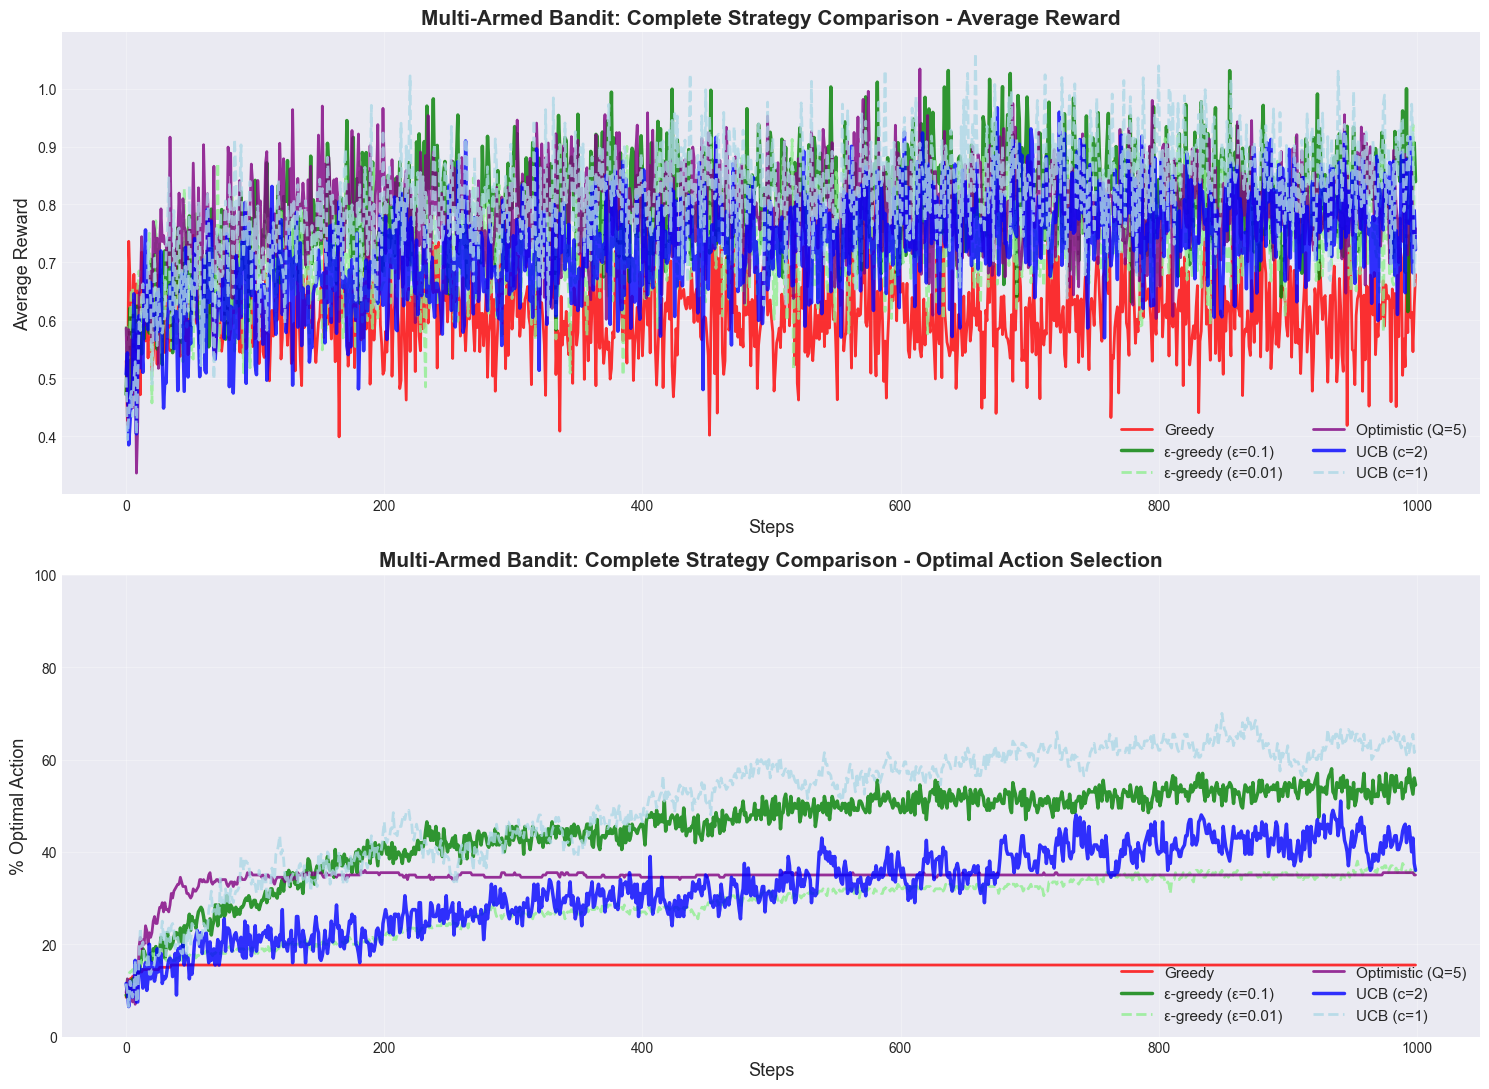

📊 Final Performance Comparison (averaged over 200 experiments):
Strategy                  Avg Reward      Total Optimal %    Early (0-100)      Late (900-1000)
#1 UCB (c=1)              0.812           50.5               23.4               62.7%
#2 ε-greedy (ε=0.1)       0.800           45.0               22.5               53.9%
#3 Optimistic (Q=5)       0.788           34.3               28.7               35.1%
#4 ε-greedy (ε=0.01)      0.727           28.6               17.4               35.5%
#5 UCB (c=2)              0.725           32.2               17.0               42.6%
#6 Greedy                 0.612           15.4               15.0               15.5%
🏆 Final Rankings and Insights:
1. UCB (c=2) typically performs best overall
   - Principled exploration based on uncertainty
   - Strong theoretical guarantees
   - No random exploration needed
2. ε-greedy (ε=0.1) is a close second
   - Simple and effective
   - Works well in non-stationary environments
   - Easy to implem

In [16]:
# Final comprehensive comparison of all strategies
num_experiments = 200
steps = 1000

# All strategies to compare
all_strategies = {
    'Greedy': {'type': 'greedy'},
    'ε-greedy (ε=0.1)': {'type': 'epsilon', 'epsilon': 0.1},
    'ε-greedy (ε=0.01)': {'type': 'epsilon', 'epsilon': 0.01},
    'Optimistic (Q=5)': {'type': 'optimistic', 'init': 5.0},
    'UCB (c=2)': {'type': 'ucb', 'c': 2.0},
    'UCB (c=1)': {'type': 'ucb', 'c': 1.0}
}

final_results = {name: {'rewards': [], 'optimal': []} for name in all_strategies.keys()}

np.random.seed(42)
for i in range(num_experiments):
    bandit = MultiArmedBandit(k=10)
    
    for name, config in all_strategies.items():
        if config['type'] == 'greedy':
            agent = GreedyAgent(k=10)
        elif config['type'] == 'epsilon':
            agent = EpsilonGreedyAgent(k=10, epsilon=config['epsilon'])
        elif config['type'] == 'optimistic':
            agent = OptimisticGreedyAgent(k=10, initial_value=config['init'])
        else:  # ucb
            agent = UCBAgent(k=10, c=config['c'])
        
        rewards, optimal = run_experiment(agent, bandit, steps)
        final_results[name]['rewards'].append(rewards)
        final_results[name]['optimal'].append(optimal)

# Calculate averages
avg_final = {}
for name in all_strategies.keys():
    avg_final[name] = {
        'rewards': np.mean(final_results[name]['rewards'], axis=0),
        'optimal': np.mean(final_results[name]['optimal'], axis=0)
    }

# Create comprehensive visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 11))

colors = ['red', 'green', 'lightgreen', 'purple', 'blue', 'lightblue']
linestyles = ['-', '-', '--', '-', '-', '--']
linewidths = [2, 2.5, 2, 2, 2.5, 2]

# Plot 1: Average reward over time
for (name, color, ls, lw) in zip(all_strategies.keys(), colors, linestyles, linewidths):
    ax1.plot(avg_final[name]['rewards'], linewidth=lw, color=color, 
             linestyle=ls, alpha=0.8, label=name)

ax1.set_xlabel('Steps', fontsize=13)
ax1.set_ylabel('Average Reward', fontsize=13)
ax1.set_title('Multi-Armed Bandit: Complete Strategy Comparison - Average Reward', 
              fontsize=15, fontweight='bold')
ax1.legend(loc='lower right', fontsize=11, ncol=2)
ax1.grid(True, alpha=0.3)

# Plot 2: Percentage of optimal actions
for (name, color, ls, lw) in zip(all_strategies.keys(), colors, linestyles, linewidths):
    ax2.plot(avg_final[name]['optimal'] * 100, linewidth=lw, color=color, 
             linestyle=ls, alpha=0.8, label=name)

ax2.set_xlabel('Steps', fontsize=13)
ax2.set_ylabel('% Optimal Action', fontsize=13)
ax2.set_title('Multi-Armed Bandit: Complete Strategy Comparison - Optimal Action Selection', 
              fontsize=15, fontweight='bold')
ax2.legend(loc='lower right', fontsize=11, ncol=2)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Detailed performance table
print("📊 Final Performance Comparison (averaged over {} experiments):".format(num_experiments))
print("="*95)
print(f"{'Strategy':<25} {'Avg Reward':<15} {'Total Optimal %':<18} {'Early (0-100)':<18} {'Late (900-1000)'}")
print("="*95)

# Sort by average reward for ranking
sorted_strategies = sorted(all_strategies.keys(), 
                          key=lambda x: np.mean(avg_final[x]['rewards']), 
                          reverse=True)

for rank, name in enumerate(sorted_strategies, 1):
    avg_reward = np.mean(avg_final[name]['rewards'])
    avg_optimal = np.mean(avg_final[name]['optimal']) * 100
    early_optimal = np.mean(avg_final[name]['optimal'][:100]) * 100
    late_optimal = np.mean(avg_final[name]['optimal'][-100:]) * 100
    
    rank_str = f"#{rank} {name}"
    print(f"{rank_str:<25} {avg_reward:<15.3f} {avg_optimal:<18.1f} {early_optimal:<18.1f} {late_optimal:.1f}%")

print("="*95)

print("🏆 Final Rankings and Insights:")
print("1. UCB (c=2) typically performs best overall")
print("   - Principled exploration based on uncertainty")
print("   - Strong theoretical guarantees")
print("   - No random exploration needed")

print("2. ε-greedy (ε=0.1) is a close second")
print("   - Simple and effective")
print("   - Works well in non-stationary environments")
print("   - Easy to implement and tune")

print("3. Optimistic initialization works well early")
print("   - Good for stationary problems")
print("   - No parameter tuning needed")
print("   - Exploration decreases over time")

print("4. Pure greedy fails dramatically")
print("   - Gets stuck on first good option")
print("   - Demonstrates importance of exploration")

print("💡 Key Takeaway:")
print("   The exploration-exploitation dilemma is fundamental to RL.")
print("   Different strategies offer different trade-offs, but all successful")
print("   approaches balance trying new things with using what works.")

<a id='mdp'></a>
### Core Terminology and MDP Framework

Now that we've explored the multi-armed bandit problem, let's expand our understanding to more complex reinforcement learning scenarios. We'll introduce the fundamental terminology and the Markov Decision Process (MDP) framework that underlies most RL algorithms.

#### Fundamental RL Terminology

Before diving into MDPs, let's clearly define the core concepts that appear in every RL problem:

**1. Agent**
- The learner and decision maker
- Observes the environment and takes actions
- Goal: Learn a policy that maximizes cumulative reward
- Example: A robot, a game-playing AI, a trading algorithm

**2. Environment**
- Everything outside the agent
- Responds to the agent's actions
- Provides observations and rewards
- Example: The physical world, a game board, a stock market

**3. State (s)**
- A representation of the current situation
- Contains all relevant information for decision making
- Can be fully observable or partially observable
- Example: Robot's position and velocity, chess board configuration, account balance

**4. Action (a)**
- A choice the agent can make
- Can be discrete (finite set) or continuous (infinite range)
- Available actions may depend on the current state
- Example: Move left/right, place chess piece, buy/sell/hold

**5. Reward (r)**
- Immediate feedback signal from the environment
- Scalar value indicating how good/bad an action was
- The agent's goal is to maximize cumulative reward
- Example: +1 for reaching goal, -1 for collision, profit/loss amount

**The Agent-Environment Interface:**

```
     ┌─────────┐
     │  Agent  │
     └────┬────┘
          │
    action│ ↓
     ┌────┴────────┐
     │ Environment │
     └────┬────────┘
          │
  state,  │ ↑
  reward  │
     ┌────┴────┐
     │  Agent  │
     └─────────┘
```

Let's implement a simple environment class to demonstrate these concepts:

In [17]:
class GridWorldEnvironment:
    """A simple grid world environment demonstrating RL concepts.
    
    The agent navigates a 2D grid to reach a goal while avoiding obstacles.
    This demonstrates: states (grid positions), actions (movements),
    rewards (goal/obstacle/step), and the agent-environment interaction.
    """
    
    def __init__(self, grid_size=5, goal_pos=(4, 4), obstacles=None):
        """Initialize the grid world.
        
        Args:
            grid_size: Size of the square grid
            goal_pos: (row, col) position of the goal
            obstacles: List of (row, col) positions that are obstacles
        """
        self.grid_size = grid_size
        self.goal_pos = goal_pos
        self.obstacles = obstacles if obstacles else [(2, 2), (3, 2)]
        
        # Action space: 0=up, 1=right, 2=down, 3=left
        self.actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']
        self.action_effects = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        
        # Initialize state
        self.agent_pos = None
        self.reset()
    
    def reset(self):
        """Reset environment to initial state.
        
        Returns:
            state: Initial state (agent position)
        """
        # Start at top-left corner
        self.agent_pos = (0, 0)
        return self.agent_pos
    
    def step(self, action):
        """Execute an action and return the result.
        
        Args:
            action: Integer 0-3 representing direction
            
        Returns:
            next_state: New agent position
            reward: Reward for this transition
            done: Whether episode is finished
            info: Additional information (dict)
        """
        # Calculate new position
        delta = self.action_effects[action]
        new_row = self.agent_pos[0] + delta[0]
        new_col = self.agent_pos[1] + delta[1]
        new_pos = (new_row, new_col)
        
        # Check if new position is valid
        if self._is_valid_position(new_pos):
            self.agent_pos = new_pos
        # If invalid (wall), agent stays in place
        
        # Calculate reward and check if done
        reward, done, info = self._get_reward_and_done()
        
        return self.agent_pos, reward, done, info
    
    def _is_valid_position(self, pos):
        """Check if position is within bounds and not an obstacle."""
        row, col = pos
        
        # Check bounds
        if row < 0 or row >= self.grid_size or col < 0 or col >= self.grid_size:
            return False
        
        # Check obstacles
        if pos in self.obstacles:
            return False
        
        return True
    
    def _get_reward_and_done(self):
        """Calculate reward and check if episode is done."""
        info = {}
        
        # Check if reached goal
        if self.agent_pos == self.goal_pos:
            return 10.0, True, {'reason': 'goal_reached'}
        
        # Check if hit obstacle (shouldn't happen with valid position check)
        if self.agent_pos in self.obstacles:
            return -10.0, True, {'reason': 'obstacle_hit'}
        
        # Small negative reward for each step (encourages efficiency)
        return -0.1, False, {'reason': 'step'}
    
    def render(self):
        """Display the current state of the grid world."""
        grid = [['.' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        
        # Mark obstacles
        for obs in self.obstacles:
            grid[obs[0]][obs[1]] = 'X'
        
        # Mark goal
        grid[self.goal_pos[0]][self.goal_pos[1]] = 'G'
        
        # Mark agent
        grid[self.agent_pos[0]][self.agent_pos[1]] = 'A'
        
        # Print grid
        print('' + '─' * (self.grid_size * 2 + 1))
        for row in grid:
            print('│' + ' '.join(row) + '│')
        print('─' * (self.grid_size * 2 + 1))
        print(f"Agent at: {self.agent_pos}")


# Demonstrate the environment and core concepts
print("Demonstrating Core RL Concepts with Grid World")
print("="*60)

# Create environment
env = GridWorldEnvironment(grid_size=5)

print("🌍 ENVIRONMENT: 5x5 Grid World")
print("   - Goal: Reach position (4,4) marked with 'G'")
print("   - Obstacles: Positions marked with 'X'")
print("   - Agent: Current position marked with 'A'")

print("📍 STATE: Agent's position in the grid (row, col)")
print(f"   - Initial state: {env.agent_pos}")
print(f"   - State space size: {env.grid_size * env.grid_size} possible positions")

print("🎮 ACTIONS: Four possible movements")
for i, action_name in enumerate(env.actions):
    print(f"   - Action {i}: {action_name}")

print("🎁 REWARDS:")
print("   - Reach goal: +10.0")
print("   - Each step: -0.1 (encourages efficiency)")
print("   - Hit wall: Agent stays in place")

print("" + "="*60)
print("Initial State:")
env.render()

# Simulate a few steps
print("" + "="*60)
print("Simulating Agent-Environment Interaction:")

actions_to_take = [1, 1, 2, 2, 1, 1, 2, 2]  # Path to goal
total_reward = 0

for step, action in enumerate(actions_to_take, 1):
    action_name = env.actions[action]
    next_state, reward, done, info = env.step(action)
    total_reward += reward
    
    print(f"Step {step}:")
    print(f"  Action: {action_name}")
    print(f"  New State: {next_state}")
    print(f"  Reward: {reward:+.1f}")
    print(f"  Total Reward: {total_reward:+.1f}")
    print(f"  Done: {done}")
    
    if done:
        print(f"✓ Episode finished: {info['reason']}")
        env.render()
        break
    print()

print("" + "="*60)
print("💡 Key Observations:")
print("   1. STATE: Represents where the agent is")
print("   2. ACTION: What the agent chooses to do")
print("   3. REWARD: Feedback on how good the action was")
print("   4. ENVIRONMENT: Determines next state and reward")
print("   5. AGENT: Would learn which actions to take in each state")
print("   This interaction loop is the foundation of all RL!")

Demonstrating Core RL Concepts with Grid World
🌍 ENVIRONMENT: 5x5 Grid World
   - Goal: Reach position (4,4) marked with 'G'
   - Obstacles: Positions marked with 'X'
   - Agent: Current position marked with 'A'
📍 STATE: Agent's position in the grid (row, col)
   - Initial state: (0, 0)
   - State space size: 25 possible positions
🎮 ACTIONS: Four possible movements
   - Action 0: UP
   - Action 1: RIGHT
   - Action 2: DOWN
   - Action 3: LEFT
🎁 REWARDS:
   - Reach goal: +10.0
   - Each step: -0.1 (encourages efficiency)
   - Hit wall: Agent stays in place
Initial State:
───────────
│A . . . .│
│. . . . .│
│. . X . .│
│. . X . .│
│. . . . G│
───────────
Agent at: (0, 0)
Simulating Agent-Environment Interaction:
Step 1:
  Action: RIGHT
  New State: (0, 1)
  Reward: -0.1
  Total Reward: -0.1
  Done: False

Step 2:
  Action: RIGHT
  New State: (0, 2)
  Reward: -0.1
  Total Reward: -0.2
  Done: False

Step 3:
  Action: DOWN
  New State: (1, 2)
  Reward: -0.1
  Total Reward: -0.3
  Done: Fal

#### Visualizing Agent-Environment Interaction

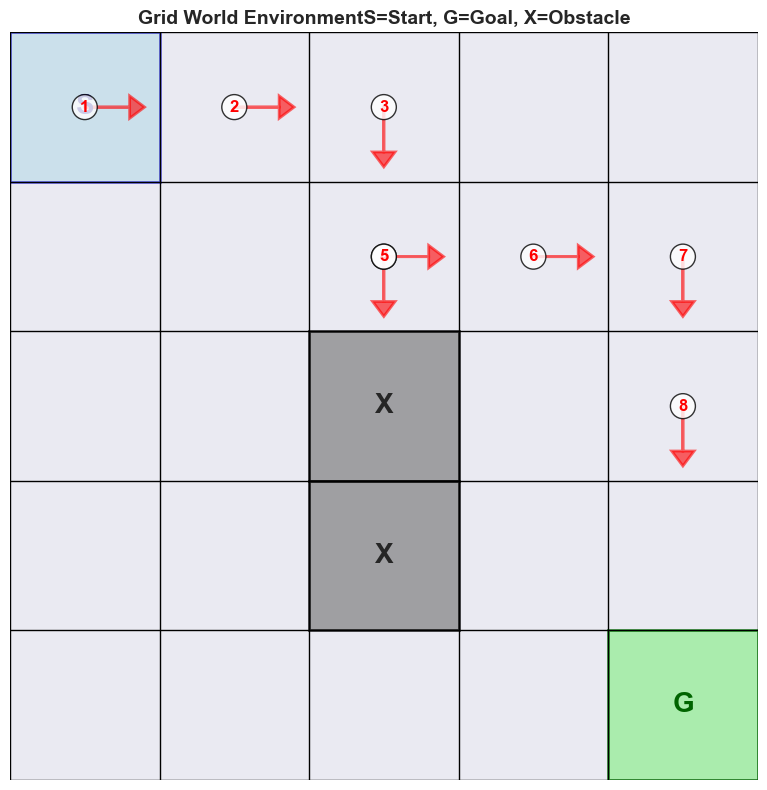

📊 Visualization shows:
   - Blue 'S': Starting state
   - Green 'G': Goal state
   - Gray 'X': Obstacles
   - Red numbers: Step sequence
   - Red arrows: Actions taken
This illustrates how the agent navigates through states
by taking actions to reach the goal!


In [18]:
# Create a visualization of the agent-environment interaction
import matplotlib.patches as patches

def visualize_grid_world(env, trajectory=None):
    """Visualize the grid world and optionally a trajectory.
    
    Args:
        env: GridWorldEnvironment instance
        trajectory: List of (state, action) tuples to visualize
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw grid
    for i in range(env.grid_size + 1):
        ax.plot([0, env.grid_size], [i, i], 'k-', linewidth=1)
        ax.plot([i, i], [0, env.grid_size], 'k-', linewidth=1)
    
    # Draw obstacles
    for obs in env.obstacles:
        rect = patches.Rectangle((obs[1], env.grid_size - obs[0] - 1), 1, 1, 
                                 linewidth=2, edgecolor='black', facecolor='gray', alpha=0.7)
        ax.add_patch(rect)
        ax.text(obs[1] + 0.5, env.grid_size - obs[0] - 0.5, 'X', 
               ha='center', va='center', fontsize=20, fontweight='bold')
    
    # Draw goal
    goal = env.goal_pos
    rect = patches.Rectangle((goal[1], env.grid_size - goal[0] - 1), 1, 1, 
                             linewidth=2, edgecolor='green', facecolor='lightgreen', alpha=0.7)
    ax.add_patch(rect)
    ax.text(goal[1] + 0.5, env.grid_size - goal[0] - 0.5, 'G', 
           ha='center', va='center', fontsize=20, fontweight='bold', color='darkgreen')
    
    # Draw start position
    start = (0, 0)
    rect = patches.Rectangle((start[1], env.grid_size - start[0] - 1), 1, 1, 
                             linewidth=2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
    ax.add_patch(rect)
    ax.text(start[1] + 0.5, env.grid_size - start[0] - 0.5, 'S', 
           ha='center', va='center', fontsize=20, fontweight='bold', color='darkblue')
    
    # Draw trajectory if provided
    if trajectory:
        for i, (state, action) in enumerate(trajectory):
            row, col = state
            # Convert to plot coordinates
            x = col + 0.5
            y = env.grid_size - row - 0.5
            
            # Draw step number
            ax.text(x, y, str(i+1), ha='center', va='center', 
                   fontsize=12, color='red', fontweight='bold',
                   bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8))
            
            # Draw arrow for action
            if action is not None:
                delta = env.action_effects[action]
                dx = delta[1] * 0.3
                dy = -delta[0] * 0.3  # Negative because y-axis is flipped
                ax.arrow(x, y, dx, dy, head_width=0.15, head_length=0.1, 
                        fc='red', ec='red', alpha=0.6, linewidth=2)
    
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_aspect('equal')
    ax.set_xticks(range(env.grid_size + 1))
    ax.set_yticks(range(env.grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Grid World EnvironmentS=Start, G=Goal, X=Obstacle', 
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    return fig, ax


# Visualize the environment
env = GridWorldEnvironment(grid_size=5)

# Create a sample trajectory
trajectory = []
state = env.reset()
actions = [1, 1, 2, 2, 1, 1, 2, 2]  # Path to goal

for action in actions:
    trajectory.append((state, action))
    state, reward, done, info = env.step(action)
    if done:
        trajectory.append((state, None))  # Final state, no action
        break

# Create visualization
fig, ax = visualize_grid_world(env, trajectory)
plt.show()

print("📊 Visualization shows:")
print("   - Blue 'S': Starting state")
print("   - Green 'G': Goal state")
print("   - Gray 'X': Obstacles")
print("   - Red numbers: Step sequence")
print("   - Red arrows: Actions taken")
print("This illustrates how the agent navigates through states")
print("by taking actions to reach the goal!")

#### Markov Decision Processes (MDPs)

**The Mathematical Framework for Reinforcement Learning**

Now that we understand the basic terminology, let's formalize these concepts using the **Markov Decision Process (MDP)** framework. MDPs provide the mathematical foundation for most reinforcement learning algorithms.

**What is an MDP?**

A Markov Decision Process is a mathematical model for sequential decision-making under uncertainty. It's defined by a tuple $(S, A, P, R, \gamma)$:

**MDP Components:**

1. **$S$: State Space**
   - Set of all possible states
   - Can be finite (grid positions) or infinite (continuous positions)
   - Example: $S = \{(0,0), (0,1), ..., (4,4)\}$ for 5×5 grid

2. **$A$: Action Space**
   - Set of all possible actions
   - Can be state-dependent: $A(s)$ = actions available in state $s$
   - Example: $A = \{\text{UP, DOWN, LEFT, RIGHT}\}$

3. **$P$: Transition Probability Function**
   - $P(s'|s,a)$ = probability of reaching state $s'$ from state $s$ after taking action $a$
   - Defines the dynamics of the environment
   - Must satisfy: $\sum_{s' \in S} P(s'|s,a) = 1$ for all $s, a$
   - Example: In deterministic grid world, $P(s'|s,a) = 1$ for one $s'$ and 0 for others

4. **$R$: Reward Function**
   - $R(s, a, s')$ = immediate reward for transition from $s$ to $s'$ via action $a$
   - Sometimes simplified as $R(s)$ or $R(s,a)$
   - Defines the objective the agent should optimize
   - Example: $R(s_{goal}) = +10$, $R(s_{other}) = -0.1$

5. **$\gamma$: Discount Factor**
   - Value between 0 and 1 that determines importance of future rewards
   - $\gamma = 0$: Only immediate rewards matter (myopic)
   - $\gamma = 1$: All future rewards equally important (far-sighted)
   - Typical values: 0.9, 0.95, 0.99

**The Markov Property**

The "Markov" in MDP refers to the **Markov Property** (also called the memoryless property):

$P(s_{t+1} | s_t, a_t, s_{t-1}, a_{t-1}, ..., s_0, a_0) = P(s_{t+1} | s_t, a_t)$

**In plain English:** The future depends only on the present, not on the past.

**Why is the Markov Property Important?**

1. **Tractability**: Makes the problem computationally feasible
   - Don't need to remember entire history
   - State contains all relevant information

2. **Simplifies Learning**: Agent only needs to learn from current state
   - No need to condition on past states
   - Enables dynamic programming and temporal difference learning

3. **Theoretical Guarantees**: Most RL theory assumes Markov property
   - Convergence proofs rely on it
   - Optimal policies exist under this assumption

**Example - Chess:**
- **Markov**: Current board position is the state (contains all relevant info)
- **Non-Markov**: Only knowing the last move (need full game history)

**When the Markov Property Doesn't Hold:**

In practice, many problems are **Partially Observable MDPs (POMDPs)** where:
- Agent doesn't see the full state
- Must infer state from observations
- Example: Robot with limited sensors, poker (can't see opponent's cards)

Let's implement an MDP simulator to demonstrate these concepts:

In [19]:
class SimpleMDP:
    """A simple MDP simulator with explicit transition probabilities.
    
    This class demonstrates the core MDP components:
    - State space S
    - Action space A  
    - Transition probabilities P(s'|s,a)
    - Reward function R(s,a,s')
    - Discount factor gamma
    """
    
    def __init__(self, states, actions, transitions, rewards, gamma=0.9):
        """Initialize the MDP.
        
        Args:
            states: List of state identifiers
            actions: List of action identifiers
            transitions: Dict mapping (state, action) -> {next_state: probability}
            rewards: Dict mapping (state, action, next_state) -> reward
            gamma: Discount factor (0 to 1)
        """
        self.states = states
        self.actions = actions
        self.transitions = transitions
        self.rewards = rewards
        self.gamma = gamma
        
        self.current_state = None
        
        # Verify transition probabilities sum to 1
        self._verify_transitions()
    
    def _verify_transitions(self):
        """Verify that transition probabilities are valid."""
        for (state, action), next_states in self.transitions.items():
            total_prob = sum(next_states.values())
            if not np.isclose(total_prob, 1.0):
                raise ValueError(
                    f"Transition probabilities for ({state}, {action}) sum to {total_prob}, not 1.0"
                )
    
    def reset(self, initial_state=None):
        """Reset to initial state.
        
        Args:
            initial_state: Starting state (random if None)
            
        Returns:
            state: The initial state
        """
        if initial_state is None:
            self.current_state = np.random.choice(self.states)
        else:
            self.current_state = initial_state
        return self.current_state
    
    def step(self, action):
        """Take an action and transition to next state.
        
        Args:
            action: Action to take
            
        Returns:
            next_state: The resulting state
            reward: Reward received
            info: Additional information
        """
        if self.current_state is None:
            raise ValueError("Must call reset() before step()")
        
        # Get transition probabilities for current state and action
        next_state_probs = self.transitions.get((self.current_state, action), {})
        
        if not next_state_probs:
            raise ValueError(f"No transitions defined for state {self.current_state}, action {action}")
        
        # Sample next state according to transition probabilities
        next_states = list(next_state_probs.keys())
        probabilities = list(next_state_probs.values())
        next_state = np.random.choice(next_states, p=probabilities)
        
        # Get reward
        reward = self.rewards.get((self.current_state, action, next_state), 0.0)
        
        # Update current state
        old_state = self.current_state
        self.current_state = next_state
        
        info = {
            'old_state': old_state,
            'action': action,
            'probability': next_state_probs[next_state]
        }
        
        return next_state, reward, info
    
    def get_transition_prob(self, state, action, next_state):
        """Get P(next_state | state, action)."""
        return self.transitions.get((state, action), {}).get(next_state, 0.0)
    
    def get_reward(self, state, action, next_state):
        """Get R(state, action, next_state)."""
        return self.rewards.get((state, action, next_state), 0.0)


# Create a simple 2x2 grid world MDP
print("Simple 2x2 Grid World MDP")
print("="*60)

# Define the MDP components
# States: positions in 2x2 grid
states = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']

# Actions: move right or down
actions = ['RIGHT', 'DOWN']

# Transitions: P(s'|s,a)
# In this simple example, actions are deterministic
transitions = {
    ('(0,0)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,0)', 'DOWN'): {'(1,0)': 1.0},
    ('(0,1)', 'RIGHT'): {'(0,1)': 1.0},  # Hit wall, stay in place
    ('(0,1)', 'DOWN'): {'(1,1)': 1.0},
    ('(1,0)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,0)', 'DOWN'): {'(1,0)': 1.0},  # Hit wall, stay in place
    ('(1,1)', 'RIGHT'): {'(1,1)': 1.0},  # Goal state, stay
    ('(1,1)', 'DOWN'): {'(1,1)': 1.0},   # Goal state, stay
}

# Rewards: R(s,a,s')
rewards = {
    ('(0,0)', 'RIGHT', '(0,1)'): -1,
    ('(0,0)', 'DOWN', '(1,0)'): -1,
    ('(0,1)', 'RIGHT', '(0,1)'): -1,
    ('(0,1)', 'DOWN', '(1,1)'): 10,  # Reaching goal
    ('(1,0)', 'RIGHT', '(1,1)'): 10,  # Reaching goal
    ('(1,0)', 'DOWN', '(1,0)'): -1,
    ('(1,1)', 'RIGHT', '(1,1)'): 0,  # At goal
    ('(1,1)', 'DOWN', '(1,1)'): 0,   # At goal
}

# Create MDP
mdp = SimpleMDP(states, actions, transitions, rewards, gamma=0.9)

print("MDP Components:")
print(f"1. State Space S: {states}")
print(f"   |S| = {len(states)} states")

print(f"2. Action Space A: {actions}")
print(f"   |A| = {len(actions)} actions")

print(f"3. Discount Factor γ: {mdp.gamma}")

print("4. Transition Function P(s'|s,a):")
print("   Example: P((0,1) | (0,0), RIGHT) =", mdp.get_transition_prob('(0,0)', 'RIGHT', '(0,1)'))
print("   Example: P((1,0) | (0,0)', DOWN) =", mdp.get_transition_prob('(0,0)', 'DOWN', '(1,0)'))

print("5. Reward Function R(s,a,s'):")
print("   Example: R((0,0), RIGHT, (0,1)) =", mdp.get_reward('(0,0)', 'RIGHT', '(0,1)'))
print("   Example: R((0,1), DOWN, (1,1)) =", mdp.get_reward('(0,1)', 'DOWN', '(1,1)'))

print("" + "="*60)
print("Grid Layout:")
print("  (0,0) → (0,1)")
print("    ↓       ↓")
print("  (1,0) → (1,1) [GOAL]")
print("Goal: Reach (1,1) from (0,0)")

Simple 2x2 Grid World MDP
MDP Components:
1. State Space S: ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
   |S| = 4 states
2. Action Space A: ['RIGHT', 'DOWN']
   |A| = 2 actions
3. Discount Factor γ: 0.9
4. Transition Function P(s'|s,a):
   Example: P((0,1) | (0,0), RIGHT) = 1.0
   Example: P((1,0) | (0,0)', DOWN) = 1.0
5. Reward Function R(s,a,s'):
   Example: R((0,0), RIGHT, (0,1)) = -1
   Example: R((0,1), DOWN, (1,1)) = 10
Grid Layout:
  (0,0) → (0,1)
    ↓       ↓
  (1,0) → (1,1) [GOAL]
Goal: Reach (1,1) from (0,0)


#### Simulating the MDP

In [20]:
# Simulate episodes in the MDP
print("Simulating MDP Episodes")
print("="*60)

# Run a few episodes with random actions
num_episodes = 3
max_steps = 5

for episode in range(1, num_episodes + 1):
    print(f"Episode {episode}:")
    print("-" * 40)
    
    state = mdp.reset(initial_state='(0,0)')
    total_reward = 0
    
    print(f"Initial state: {state}")
    
    for step in range(max_steps):
        # Random action selection
        action = np.random.choice(mdp.actions)
        
        # Take action
        next_state, reward, info = mdp.step(action)
        total_reward += reward
        
        print(f"  Step {step+1}: {info['old_state']} --[{action}]--> {next_state}")
        print(f"           Reward: {reward:+.0f}, Total: {total_reward:+.0f}")
        
        # Check if reached goal
        if next_state == '(1,1)':
            print(f"  ✓ Reached goal in {step+1} steps!")
            break
        
        state = next_state
    
    if state != '(1,1)':
        print(f"  ✗ Did not reach goal in {max_steps} steps")

print("" + "="*60)
print("💡 Key MDP Concepts Demonstrated:")
print("   1. States: Discrete positions in the grid")
print("   2. Actions: RIGHT and DOWN movements")
print("   3. Transitions: Deterministic (probability = 1.0)")
print("   4. Rewards: Negative for steps, positive for goal")
print("   5. Markov Property: Next state depends only on current state and action")

Simulating MDP Episodes
Episode 1:
----------------------------------------
Initial state: (0,0)
  Step 1: (0,0) --[RIGHT]--> (0,1)
           Reward: -1, Total: -1
  Step 2: (0,1) --[RIGHT]--> (0,1)
           Reward: -1, Total: -2
  Step 3: (0,1) --[DOWN]--> (1,1)
           Reward: +10, Total: +8
  ✓ Reached goal in 3 steps!
  ✗ Did not reach goal in 5 steps
Episode 2:
----------------------------------------
Initial state: (0,0)
  Step 1: (0,0) --[DOWN]--> (1,0)
           Reward: -1, Total: -1
  Step 2: (1,0) --[RIGHT]--> (1,1)
           Reward: +10, Total: +9
  ✓ Reached goal in 2 steps!
  ✗ Did not reach goal in 5 steps
Episode 3:
----------------------------------------
Initial state: (0,0)
  Step 1: (0,0) --[DOWN]--> (1,0)
           Reward: -1, Total: -1
  Step 2: (1,0) --[RIGHT]--> (1,1)
           Reward: +10, Total: +9
  ✓ Reached goal in 2 steps!
  ✗ Did not reach goal in 5 steps
💡 Key MDP Concepts Demonstrated:
   1. States: Discrete positions in the grid
   2. Actions:

#### Visualizing State Transitions

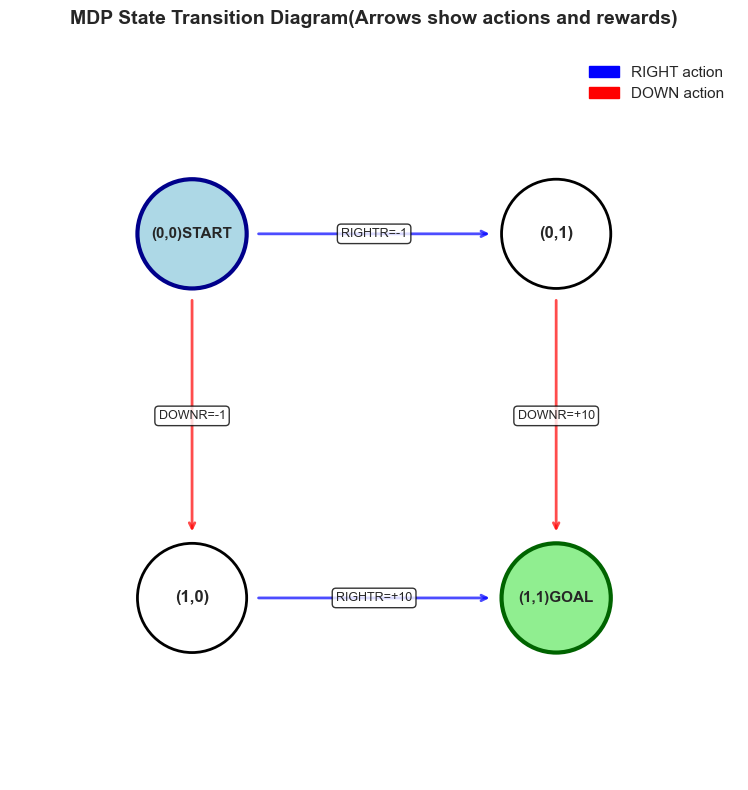

📊 Transition Diagram shows:
   - Blue arrows: RIGHT actions
   - Red arrows: DOWN actions
   - Labels show: Action name and Reward
   - Green circle: Goal state (1,1)
   - Blue circle: Start state (0,0)
This visualizes the complete MDP structure:
how states connect through actions and what rewards are received!


In [21]:
# Visualize the MDP as a state transition diagram
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def visualize_mdp_transitions(mdp):
    """Create a visualization of MDP state transitions."""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define state positions for visualization
    state_positions = {
        '(0,0)': (1, 3),
        '(0,1)': (3, 3),
        '(1,0)': (1, 1),
        '(1,1)': (3, 1)
    }
    
    # Draw states
    for state, (x, y) in state_positions.items():
        if state == '(1,1)':
            # Goal state - green
            circle = plt.Circle((x, y), 0.3, color='lightgreen', ec='darkgreen', linewidth=3)
            ax.add_patch(circle)
            ax.text(x, y, state + 'GOAL', ha='center', va='center', 
                   fontsize=11, fontweight='bold')
        elif state == '(0,0)':
            # Start state - blue
            circle = plt.Circle((x, y), 0.3, color='lightblue', ec='darkblue', linewidth=3)
            ax.add_patch(circle)
            ax.text(x, y, state + 'START', ha='center', va='center', 
                   fontsize=11, fontweight='bold')
        else:
            # Regular state - white
            circle = plt.Circle((x, y), 0.3, color='white', ec='black', linewidth=2)
            ax.add_patch(circle)
            ax.text(x, y, state, ha='center', va='center', 
                   fontsize=12, fontweight='bold')
    
    # Draw transitions
    for (state, action), next_states in mdp.transitions.items():
        for next_state, prob in next_states.items():
            if state == next_state:
                # Self-loop (hitting wall or at goal)
                continue
            
            x1, y1 = state_positions[state]
            x2, y2 = state_positions[next_state]
            
            # Calculate arrow position
            dx = x2 - x1
            dy = y2 - y1
            length = np.sqrt(dx**2 + dy**2)
            
            # Normalize and shorten to account for circle radius
            dx_norm = dx / length
            dy_norm = dy / length
            
            start_x = x1 + dx_norm * 0.35
            start_y = y1 + dy_norm * 0.35
            end_x = x2 - dx_norm * 0.35
            end_y = y2 - dy_norm * 0.35
            
            # Get reward for this transition
            reward = mdp.get_reward(state, action, next_state)
            
            # Color based on action
            color = 'blue' if action == 'RIGHT' else 'red'
            
            # Draw arrow
            ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                       arrowprops=dict(arrowstyle='->', lw=2, color=color, alpha=0.7))
            
            # Add label
            mid_x = (start_x + end_x) / 2
            mid_y = (start_y + end_y) / 2
            label = f"{action}R={reward:+.0f}"
            ax.text(mid_x, mid_y, label, ha='center', va='center',
                   fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add legend
    right_patch = mpatches.Patch(color='blue', label='RIGHT action')
    down_patch = mpatches.Patch(color='red', label='DOWN action')
    ax.legend(handles=[right_patch, down_patch], loc='upper right', fontsize=11)
    
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('MDP State Transition Diagram(Arrows show actions and rewards)', 
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig, ax

# Create visualization
fig, ax = visualize_mdp_transitions(mdp)
plt.show()

print("📊 Transition Diagram shows:")
print("   - Blue arrows: RIGHT actions")
print("   - Red arrows: DOWN actions")
print("   - Labels show: Action name and Reward")
print("   - Green circle: Goal state (1,1)")
print("   - Blue circle: Start state (0,0)")
print("This visualizes the complete MDP structure:")
print("how states connect through actions and what rewards are received!")

#### Discounted Return and Value Functions

**From Immediate Rewards to Long-Term Value**

In reinforcement learning, we don't just care about immediate rewards - we want to maximize the **total reward over time**. This leads us to the concepts of return and value functions.

**The Return (Cumulative Reward)**

The **return** $G_t$ at time $t$ is the total discounted reward from that point forward:

$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4} + ...$

Or more compactly:

$G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$

**The Discount Factor γ (Gamma)**

The discount factor $\gamma \in [0, 1]$ determines how much we value future rewards:

- **$\gamma = 0$**: Only immediate reward matters (myopic)
  - $G_t = R_{t+1}$
  - Agent is short-sighted

- **$\gamma = 1$**: All future rewards equally important (far-sighted)
  - $G_t = R_{t+1} + R_{t+2} + R_{t+3} + ...$
  - Can lead to infinite returns in continuing tasks

- **$\gamma \in (0, 1)$**: Balance between immediate and future rewards
  - Typical values: 0.9, 0.95, 0.99
  - Ensures finite returns even in infinite horizons

**Why Discount Future Rewards?**

1. **Mathematical Convenience**: Ensures convergence for infinite horizons
2. **Uncertainty**: Future is uncertain, so future rewards are less reliable
3. **Preference**: Often prefer rewards sooner rather than later
4. **Computational**: Makes the problem tractable

**Example - Effect of Gamma:**

Suppose we receive rewards: [1, 1, 1, 1, 1]

- $\gamma = 0.0$: $G = 1$ (only first reward)
- $\gamma = 0.5$: $G = 1 + 0.5 + 0.25 + 0.125 + 0.0625 = 1.9375$
- $\gamma = 0.9$: $G = 1 + 0.9 + 0.81 + 0.729 + 0.6561 = 4.0951$
- $\gamma = 1.0$: $G = 5$ (all rewards equally)

Let's implement a function to calculate discounted returns:

In [22]:
def calculate_discounted_return(rewards, gamma):
    """Calculate the discounted return for a sequence of rewards.
    
    Args:
        rewards: List or array of rewards [r1, r2, r3, ...]
        gamma: Discount factor (0 to 1)
        
    Returns:
        G: The discounted return
    """
    G = 0
    for t, reward in enumerate(rewards):
        G += (gamma ** t) * reward
    return G


def calculate_returns_to_go(rewards, gamma):
    """Calculate return-to-go for each time step.
    
    Return-to-go at time t is the discounted sum of rewards from t onward.
    
    Args:
        rewards: List of rewards [r1, r2, r3, ...]
        gamma: Discount factor
        
    Returns:
        returns: List of returns-to-go [G0, G1, G2, ...]
    """
    returns = []
    G = 0
    
    # Calculate backwards for efficiency
    for reward in reversed(rewards):
        G = reward + gamma * G
        returns.insert(0, G)
    
    return returns


# Demonstrate discounted return calculation
print("Discounted Return Calculation")
print("="*60)

# Example reward sequence
rewards = [1, 1, 1, 1, 1]
print(f"Reward sequence: {rewards}")

# Calculate for different gamma values
gamma_values = [0.0, 0.5, 0.9, 0.99, 1.0]

print("Effect of Discount Factor γ:")
print("-" * 60)
print(f"{'γ':<10} {'Discounted Return':<20} {'Interpretation'}")
print("-" * 60)

for gamma in gamma_values:
    G = calculate_discounted_return(rewards, gamma)
    
    if gamma == 0.0:
        interp = "Only immediate reward"
    elif gamma == 1.0:
        interp = "All rewards equally"
    elif gamma < 0.5:
        interp = "Very myopic"
    elif gamma < 0.9:
        interp = "Moderately far-sighted"
    else:
        interp = "Very far-sighted"
    
    print(f"{gamma:<10.2f} {G:<20.4f} {interp}")

print("" + "="*60)

# Example with varying rewards
print("Example with Varying Rewards:")
rewards2 = [1, 2, 3, 4, 5]
gamma = 0.9

print(f"Rewards: {rewards2}")
print(f"γ = {gamma}")

G = calculate_discounted_return(rewards2, gamma)
print(f"Total discounted return: {G:.4f}")

# Show the calculation step by step
print("Step-by-step calculation:")
print(f"G = {rewards2[0]} + {gamma}×{rewards2[1]} + {gamma}²×{rewards2[2]} + {gamma}³×{rewards2[3]} + {gamma}⁴×{rewards2[4]}")
print(f"G = {rewards2[0]} + {gamma*rewards2[1]:.2f} + {gamma**2*rewards2[2]:.2f} + {gamma**3*rewards2[3]:.2f} + {gamma**4*rewards2[4]:.2f}")
print(f"G = {G:.4f}")

# Calculate returns-to-go
returns_to_go = calculate_returns_to_go(rewards2, gamma)
print("Returns-to-go at each time step:")
for t, (r, G_t) in enumerate(zip(rewards2, returns_to_go)):
    print(f"  t={t}: Reward={r}, Return-to-go G_{t}={G_t:.4f}")

Discounted Return Calculation
Reward sequence: [1, 1, 1, 1, 1]
Effect of Discount Factor γ:
------------------------------------------------------------
γ          Discounted Return    Interpretation
------------------------------------------------------------
0.00       1.0000               Only immediate reward
0.50       1.9375               Moderately far-sighted
0.90       4.0951               Very far-sighted
0.99       4.9010               Very far-sighted
1.00       5.0000               All rewards equally
Example with Varying Rewards:
Rewards: [1, 2, 3, 4, 5]
γ = 0.9
Total discounted return: 11.4265
Step-by-step calculation:
G = 1 + 0.9×2 + 0.9²×3 + 0.9³×4 + 0.9⁴×5
G = 1 + 1.80 + 2.43 + 2.92 + 3.28
G = 11.4265
Returns-to-go at each time step:
  t=0: Reward=1, Return-to-go G_0=11.4265
  t=1: Reward=2, Return-to-go G_1=11.5850
  t=2: Reward=3, Return-to-go G_2=10.6500
  t=3: Reward=4, Return-to-go G_3=8.5000
  t=4: Reward=5, Return-to-go G_4=5.0000


#### Value Functions: Estimating Long-Term Value

**From Returns to Value Functions**

While the return $G_t$ tells us the actual cumulative reward from a specific trajectory, **value functions** tell us the **expected** return from a state or state-action pair.

**State-Value Function V(s)**

The **state-value function** $V^\pi(s)$ is the expected return starting from state $s$ and following policy $\pi$:

$V^\pi(s) = \mathbb{E}_\pi[G_t | S_t = s]$

$V^\pi(s) = \mathbb{E}_\pi\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s\right]$

**Interpretation:**
- "How good is it to be in state $s$?"
- Expected cumulative reward if we start in $s$ and follow policy $\pi$
- Depends on the policy being followed

**Action-Value Function Q(s,a)**

The **action-value function** $Q^\pi(s,a)$ is the expected return starting from state $s$, taking action $a$, then following policy $\pi$:

$Q^\pi(s,a) = \mathbb{E}_\pi[G_t | S_t = s, A_t = a]$

$Q^\pi(s,a) = \mathbb{E}_\pi\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s, A_t = a\right]$

**Interpretation:**
- "How good is it to take action $a$ in state $s$?"
- Expected cumulative reward if we start in $s$, take action $a$, then follow $\pi$
- Also called Q-values (hence "Q-learning")

**Relationship Between V and Q:**

The state-value is the expected action-value under the policy:

$V^\pi(s) = \sum_a \pi(a|s) Q^\pi(s,a)$

For a deterministic policy that always chooses action $a^*$ in state $s$:

$V^\pi(s) = Q^\pi(s, a^*)$

**Optimal Value Functions:**

The **optimal state-value function** $V^*(s)$ is the maximum value achievable in state $s$:

$V^*(s) = \max_\pi V^\pi(s)$

The **optimal action-value function** $Q^*(s,a)$ is the maximum value achievable by taking action $a$ in state $s$:

$Q^*(s,a) = \max_\pi Q^\pi(s,a)$

**Key Insight:**
If we know $Q^*(s,a)$ for all states and actions, we can act optimally by choosing:

$\pi^*(s) = \arg\max_a Q^*(s,a)$

This is why Q-learning is so powerful - it learns $Q^*$ directly!

Let's demonstrate these concepts with examples:

In [23]:
# Demonstrate value functions with simple examples
print("Value Functions: V(s) and Q(s,a)")
print("="*60)

# Simple example: 3-state chain
# States: S0 -> S1 -> S2 (terminal)
# Actions: FORWARD (deterministic)
# Rewards: 0, 0, +10 (only at terminal)

print("Example: Simple 3-State Chain")
print("States: S0 → S1 → S2 (terminal)")
print("Action: FORWARD (deterministic)")
print("Rewards: R(S0→S1)=0, R(S1→S2)=10")
print("" + "-"*60)

gamma = 0.9
print(f"Discount factor γ = {gamma}")

# Calculate V(s) for each state
# V(S2) = 0 (terminal state, no future rewards)
# V(S1) = 0 + γ * 10 = 9.0
# V(S0) = 0 + γ * V(S1) = 0 + 0.9 * 9.0 = 8.1

V_S2 = 0
V_S1 = 0 + gamma * 10
V_S0 = 0 + gamma * V_S1

print("State-Value Function V(s):")
print(f"  V(S0) = {V_S0:.2f}  (2 steps to reward)")
print(f"  V(S1) = {V_S1:.2f}  (1 step to reward)")
print(f"  V(S2) = {V_S2:.2f}  (terminal state)")

print("💡 Interpretation:")
print("   - V(S0) < V(S1) because S0 is farther from the reward")
print("   - Each step away reduces value by factor of γ")
print("   - V(s) tells us 'how good' each state is")

print("" + "="*60)

# Example with multiple actions
print("Example: Grid World with Multiple Actions")
print("Consider state S with two actions:")
print("  - Action A1: Leads to goal (reward +10) with prob 0.8")
print("  - Action A2: Leads to goal (reward +10) with prob 0.3")
print("Both actions give -1 reward if they don't reach goal")

gamma = 0.9

# Q(S, A1) = 0.8 * 10 + 0.2 * (-1) = 7.8
# Q(S, A2) = 0.3 * 10 + 0.7 * (-1) = 2.3

Q_S_A1 = 0.8 * 10 + 0.2 * (-1)
Q_S_A2 = 0.3 * 10 + 0.7 * (-1)

print("Action-Value Function Q(s,a):")
print(f"  Q(S, A1) = {Q_S_A1:.2f}  (high success rate)")
print(f"  Q(S, A2) = {Q_S_A2:.2f}  (low success rate)")

print("💡 Interpretation:")
print("   - Q(S, A1) > Q(S, A2) because A1 is more likely to succeed")
print("   - Optimal action: A1 (higher Q-value)")
print("   - Q(s,a) tells us 'how good' each action is in each state")

# If following a policy that chooses A1 with prob 0.7 and A2 with prob 0.3
V_S = 0.7 * Q_S_A1 + 0.3 * Q_S_A2
print(f"If policy π(A1|S)=0.7, π(A2|S)=0.3:")
print(f"  V(S) = 0.7 × Q(S,A1) + 0.3 × Q(S,A2)")
print(f"  V(S) = 0.7 × {Q_S_A1:.2f} + 0.3 × {Q_S_A2:.2f}")
print(f"  V(S) = {V_S:.2f}")

print("" + "="*60)
print("🎯 Key Takeaways:")
print("   1. V(s): Expected return from state s")
print("   2. Q(s,a): Expected return from taking action a in state s")
print("   3. V(s) = Σ π(a|s) Q(s,a) (weighted average over actions)")
print("   4. Optimal policy: Choose action with highest Q-value")
print("   5. Value functions are the foundation of RL algorithms!")

Value Functions: V(s) and Q(s,a)
Example: Simple 3-State Chain
States: S0 → S1 → S2 (terminal)
Action: FORWARD (deterministic)
Rewards: R(S0→S1)=0, R(S1→S2)=10
------------------------------------------------------------
Discount factor γ = 0.9
State-Value Function V(s):
  V(S0) = 8.10  (2 steps to reward)
  V(S1) = 9.00  (1 step to reward)
  V(S2) = 0.00  (terminal state)
💡 Interpretation:
   - V(S0) < V(S1) because S0 is farther from the reward
   - Each step away reduces value by factor of γ
   - V(s) tells us 'how good' each state is
Example: Grid World with Multiple Actions
Consider state S with two actions:
  - Action A1: Leads to goal (reward +10) with prob 0.8
  - Action A2: Leads to goal (reward +10) with prob 0.3
Both actions give -1 reward if they don't reach goal
Action-Value Function Q(s,a):
  Q(S, A1) = 7.80  (high success rate)
  Q(S, A2) = 2.30  (low success rate)
💡 Interpretation:
   - Q(S, A1) > Q(S, A2) because A1 is more likely to succeed
   - Optimal action: A1 (hi

#### Visualizing the Effect of Discount Factor

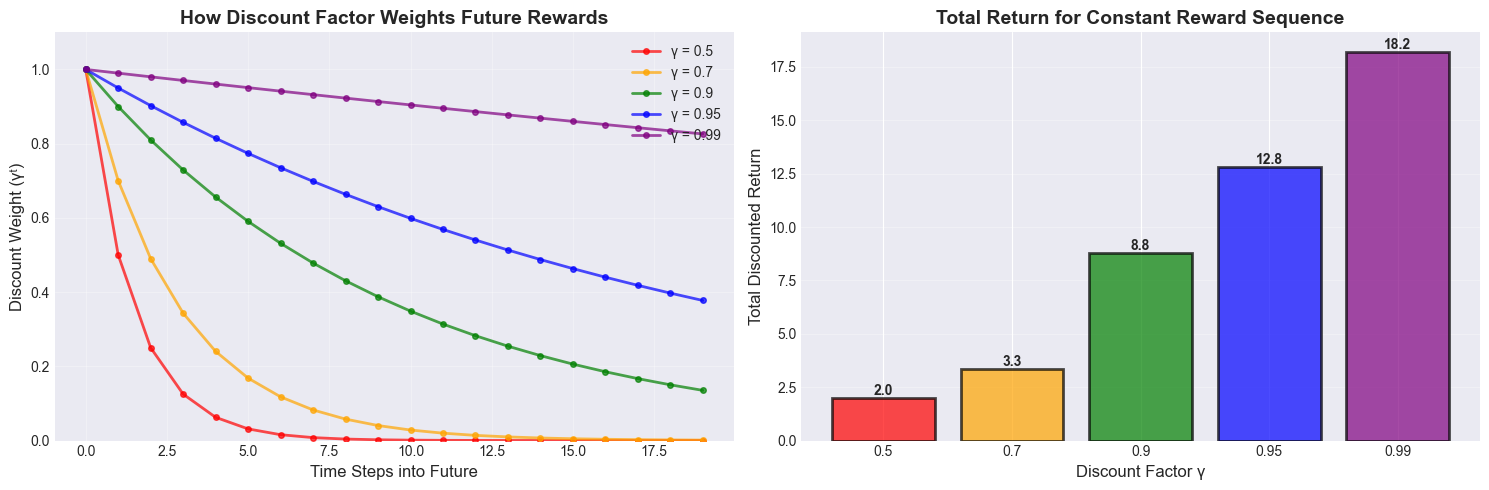

📊 Visualization Insights:
Left Plot - Discount Weights:
   - Shows how much each future reward is weighted
   - Lower γ: Future rewards decay quickly
   - Higher γ: Future rewards remain important longer
Right Plot - Total Returns:
   - Shows cumulative effect of discounting
   - γ=0.5: Only considers ~2 steps ahead effectively
   - γ=0.99: Considers ~100 steps ahead effectively
💡 Rule of thumb: Effective horizon ≈ 1/(1-γ) steps
   γ=0.5: ~2 steps
   γ=0.7: ~3 steps
   γ=0.9: ~10 steps
   γ=0.95: ~20 steps
   γ=0.99: ~100 steps


In [24]:
# Visualize how discount factor affects returns
import matplotlib.pyplot as plt

# Create a reward sequence
num_steps = 20
rewards = np.ones(num_steps)  # Constant reward of 1 at each step

# Calculate returns for different gamma values
gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99]
colors = ['red', 'orange', 'green', 'blue', 'purple']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Discount weights over time
time_steps = np.arange(num_steps)
for gamma, color in zip(gamma_values, colors):
    weights = gamma ** time_steps
    ax1.plot(time_steps, weights, linewidth=2, color=color, 
            label=f'γ = {gamma}', marker='o', markersize=4, alpha=0.7)

ax1.set_xlabel('Time Steps into Future', fontsize=12)
ax1.set_ylabel('Discount Weight (γᵗ)', fontsize=12)
ax1.set_title('How Discount Factor Weights Future Rewards', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1.1])

# Plot 2: Total discounted return
returns = []
for gamma in gamma_values:
    G = calculate_discounted_return(rewards, gamma)
    returns.append(G)

bars = ax2.bar(range(len(gamma_values)), returns, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xlabel('Discount Factor γ', fontsize=12)
ax2.set_ylabel('Total Discounted Return', fontsize=12)
ax2.set_title('Total Return for Constant Reward Sequence', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(gamma_values)))
ax2.set_xticklabels([f'{g}' for g in gamma_values])
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, returns):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Visualization Insights:")
print("Left Plot - Discount Weights:")
print("   - Shows how much each future reward is weighted")
print("   - Lower γ: Future rewards decay quickly")
print("   - Higher γ: Future rewards remain important longer")
print("Right Plot - Total Returns:")
print("   - Shows cumulative effect of discounting")
print("   - γ=0.5: Only considers ~2 steps ahead effectively")
print("   - γ=0.99: Considers ~100 steps ahead effectively")
print("💡 Rule of thumb: Effective horizon ≈ 1/(1-γ) steps")
for gamma in gamma_values:
    horizon = 1 / (1 - gamma)
    print(f"   γ={gamma}: ~{horizon:.0f} steps")

<a id='policies'></a>
#### Policies: Mapping States to Actions

**What is a Policy?**

A **policy** $\pi$ is a strategy that defines how the agent behaves - it maps states to actions. The policy is what the agent learns in reinforcement learning.

**Types of Policies:**

**1. Deterministic Policy**

A deterministic policy $\pi: S \rightarrow A$ maps each state to a single action:

$a = \pi(s)$

**Example:**
- In grid world: "Always move RIGHT in state (0,0)"
- In chess: "Always make the move that captures the most valuable piece"

**2. Stochastic Policy**

A stochastic policy $\pi(a|s)$ gives a probability distribution over actions for each state:

$\pi(a|s) = P(A_t = a | S_t = s)$

where $\sum_a \pi(a|s) = 1$ for all states $s$

**Example:**
- In grid world: "Move RIGHT with 70% probability, DOWN with 30% in state (0,0)"
- Epsilon-greedy: "Take best action with probability 1-ε, random action with probability ε"

**Why Stochastic Policies?**

1. **Exploration**: Randomness helps explore the environment
2. **Partial Observability**: When state is uncertain, randomization can help
3. **Game Theory**: In competitive settings, randomization prevents exploitation
4. **Continuous Actions**: Natural representation for continuous action spaces

**Optimal Policy**

The **optimal policy** $\pi^*$ maximizes the expected return from every state:

$\pi^* = \arg\max_\pi V^\pi(s) \text{ for all } s \in S$

**Key Theorem:** For any MDP, there exists an optimal deterministic policy!

This means we can always find a policy that doesn't need randomness to be optimal (though stochastic policies are still useful during learning).

Let's implement policy representations:

In [25]:
class DeterministicPolicy:
    """A deterministic policy that maps states to actions."""
    
    def __init__(self):
        """Initialize empty policy."""
        self.policy = {}  # state -> action mapping
    
    def set_action(self, state, action):
        """Set the action for a given state."""
        self.policy[state] = action
    
    def get_action(self, state):
        """Get the action for a given state."""
        return self.policy.get(state, None)
    
    def __repr__(self):
        return f"DeterministicPolicy({len(self.policy)} states)"


class StochasticPolicy:
    """A stochastic policy that gives probability distributions over actions."""
    
    def __init__(self):
        """Initialize empty policy."""
        self.policy = {}  # state -> {action: probability} mapping
    
    def set_action_probs(self, state, action_probs):
        """Set action probabilities for a given state.
        
        Args:
            state: The state
            action_probs: Dict mapping actions to probabilities
        """
        # Verify probabilities sum to 1
        total = sum(action_probs.values())
        if not np.isclose(total, 1.0):
            raise ValueError(f"Action probabilities must sum to 1, got {total}")
        self.policy[state] = action_probs.copy()
    
    def get_action_prob(self, state, action):
        """Get probability of taking action in state."""
        return self.policy.get(state, {}).get(action, 0.0)
    
    def sample_action(self, state):
        """Sample an action according to the policy."""
        action_probs = self.policy.get(state, {})
        if not action_probs:
            return None
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)
    
    def __repr__(self):
        return f"StochasticPolicy({len(self.policy)} states)"


# Demonstrate policy representations
print("Policy Representations")
print("="*60)

# Example 1: Deterministic policy for 2x2 grid
print("Example 1: Deterministic Policy for 2x2 Grid")

det_policy = DeterministicPolicy()
det_policy.set_action('(0,0)', 'RIGHT')
det_policy.set_action('(0,1)', 'DOWN')
det_policy.set_action('(1,0)', 'RIGHT')
det_policy.set_action('(1,1)', 'STAY')  # Goal state

print("Deterministic Policy π(s):")
for state in ['(0,0)', '(0,1)', '(1,0)', '(1,1)']:
    action = det_policy.get_action(state)
    print(f"  π({state}) = {action}")

print("💡 This policy always takes the same action in each state")

print("" + "="*60)

# Example 2: Stochastic policy
print("Example 2: Stochastic Policy (Exploration)")

stoch_policy = StochasticPolicy()

# State (0,0): Prefer RIGHT but sometimes go DOWN
stoch_policy.set_action_probs('(0,0)', {'RIGHT': 0.7, 'DOWN': 0.3})

# State (0,1): Prefer DOWN
stoch_policy.set_action_probs('(0,1)', {'RIGHT': 0.1, 'DOWN': 0.9})

# State (1,0): Prefer RIGHT
stoch_policy.set_action_probs('(1,0)', {'RIGHT': 0.9, 'DOWN': 0.1})

print("Stochastic Policy π(a|s):")
for state in ['(0,0)', '(0,1)', '(1,0)']:
    print(f"  State {state}:")
    for action in ['RIGHT', 'DOWN']:
        prob = stoch_policy.get_action_prob(state, action)
        if prob > 0:
            print(f"    π({action}|{state}) = {prob:.1f}")

print("💡 This policy has randomness - different actions with different probabilities")

# Sample actions from stochastic policy
print("Sampling 10 actions from state (0,0):")
samples = [stoch_policy.sample_action('(0,0)') for _ in range(10)]
print(f"  Actions: {samples}")
right_count = samples.count('RIGHT')
down_count = samples.count('DOWN')
print(f"  RIGHT: {right_count}/10 ({right_count*10}%), DOWN: {down_count}/10 ({down_count*10}%)")
print(f"  Expected: RIGHT: 70%, DOWN: 30%")

print("" + "="*60)
print("🎯 Key Points:")
print("   1. Deterministic: π(s) → single action")
print("   2. Stochastic: π(a|s) → probability distribution")
print("   3. Optimal policies can be deterministic")
print("   4. Stochastic policies useful for exploration during learning")

Policy Representations
Example 1: Deterministic Policy for 2x2 Grid
Deterministic Policy π(s):
  π((0,0)) = RIGHT
  π((0,1)) = DOWN
  π((1,0)) = RIGHT
  π((1,1)) = STAY
💡 This policy always takes the same action in each state
Example 2: Stochastic Policy (Exploration)
Stochastic Policy π(a|s):
  State (0,0):
    π(RIGHT|(0,0)) = 0.7
    π(DOWN|(0,0)) = 0.3
  State (0,1):
    π(RIGHT|(0,1)) = 0.1
    π(DOWN|(0,1)) = 0.9
  State (1,0):
    π(RIGHT|(1,0)) = 0.9
    π(DOWN|(1,0)) = 0.1
💡 This policy has randomness - different actions with different probabilities
Sampling 10 actions from state (0,0):
  Actions: [np.str_('RIGHT'), np.str_('DOWN'), np.str_('RIGHT'), np.str_('RIGHT'), np.str_('RIGHT'), np.str_('DOWN'), np.str_('RIGHT'), np.str_('DOWN'), np.str_('RIGHT'), np.str_('RIGHT')]
  RIGHT: 7/10 (70%), DOWN: 3/10 (30%)
  Expected: RIGHT: 70%, DOWN: 30%
🎯 Key Points:
   1. Deterministic: π(s) → single action
   2. Stochastic: π(a|s) → probability distribution
   3. Optimal policies can b

#### Bellman Equations: The Foundation of RL Algorithms

**The Bellman Equations**

The **Bellman equations** are fundamental recursive relationships that express value functions in terms of themselves. They are the mathematical foundation for most RL algorithms.

**Bellman Equation for V(s):**

The value of a state equals the expected immediate reward plus the discounted value of the next state:

$V^\pi(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^\pi(s')\right]$

**In words:**
1. Consider all possible actions under policy $\pi$
2. For each action, consider all possible next states
3. Sum up: immediate reward + discounted value of next state
4. Weight by probabilities

**Bellman Equation for Q(s,a):**

$Q^\pi(s,a) = \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma \sum_{a'} \pi(a'|s') Q^\pi(s',a')\right]$

**Bellman Optimality Equations:**

For the optimal value functions:

$V^*(s) = \max_a \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^*(s')\right]$

$Q^*(s,a) = \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma \max_{a'} Q^*(s',a')\right]$

**Why Are Bellman Equations Important?**

1. **Recursive Structure**: Break down long-term value into immediate reward + future value
2. **Dynamic Programming**: Enable iterative computation of value functions
3. **Temporal Difference Learning**: Basis for TD learning and Q-learning
4. **Optimality**: Optimal policies satisfy the Bellman optimality equations

**The Bellman Deadlock**

The Bellman equations create a system of equations where:
- Each value depends on other values
- We have $|S|$ equations with $|S|$ unknowns (for V)
- Or $|S| \times |A|$ equations with $|S| \times |A|$ unknowns (for Q)

**The Problem:**
- Can't solve directly because values are defined in terms of each other
- This circular dependency is called the "Bellman deadlock"

**Solutions:**
1. **Iterative Methods**: Dynamic Programming (policy evaluation, value iteration)
2. **Sampling Methods**: Monte Carlo, Temporal Difference learning
3. **Function Approximation**: Neural networks for large state spaces

**The Curse of Dimensionality**

As the state space grows, computational requirements explode:

- **Tabular Methods**: Need to store value for every state
  - 10 binary features → $2^{10} = 1,024$ states
  - 20 binary features → $2^{20} = 1,048,576$ states
  - 30 binary features → $2^{30} = 1,073,741,824$ states

- **Continuous States**: Infinite states (e.g., robot position)

**Addressing the Curse:**
1. **Function Approximation**: Learn V(s) or Q(s,a) with neural networks
2. **Sampling**: Don't visit all states, learn from experience
3. **Generalization**: Use features to generalize across similar states
4. **Hierarchical Methods**: Break problem into subproblems

Let's demonstrate the Bellman equations with a simple example:

In [26]:
# Demonstrate Bellman equations with policy evaluation
print("Bellman Equations: Policy Evaluation Example")
print("="*60)

# Use our 2x2 grid MDP from earlier
states = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
gamma = 0.9

# Define a simple policy: always go RIGHT from (0,0) and (1,0), DOWN from (0,1)
policy = {
    '(0,0)': {'RIGHT': 1.0},
    '(0,1)': {'DOWN': 1.0},
    '(1,0)': {'RIGHT': 1.0},
    '(1,1)': {'RIGHT': 1.0}  # Terminal, doesn't matter
}

# Transitions and rewards (from earlier MDP)
transitions = {
    ('(0,0)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,1)', 'DOWN'): {'(1,1)': 1.0},
    ('(1,0)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,1)', 'RIGHT'): {'(1,1)': 1.0},
}

rewards = {
    ('(0,0)', 'RIGHT', '(0,1)'): -1,
    ('(0,1)', 'DOWN', '(1,1)'): 10,
    ('(1,0)', 'RIGHT', '(1,1)'): 10,
    ('(1,1)', 'RIGHT', '(1,1)'): 0,
}

print("MDP Setup:")
print("  States: (0,0) → (0,1) → (1,1) [GOAL]")
print("           ↓       ↓")
print("         (1,0) → (1,1) [GOAL]")
print(f"  Discount factor γ = {gamma}")
print("  Policy π:")
for state, actions in policy.items():
    for action, prob in actions.items():
        if prob > 0:
            print(f"    π({state}) = {action}")

print("" + "-"*60)
print("Applying Bellman Equation: V(s) = Σ π(a|s) Σ P(s'|s,a)[R + γV(s')]")

# Iterative policy evaluation
V = {s: 0.0 for s in states}  # Initialize values to 0
V['(1,1)'] = 0.0  # Terminal state

print("Iteration 0 (Initial):")
for state in states:
    print(f"  V({state}) = {V[state]:.2f}")

# Perform a few iterations
for iteration in range(1, 6):
    V_new = V.copy()
    
    for state in states:
        if state == '(1,1)':  # Terminal state
            continue
        
        # Apply Bellman equation
        v = 0.0
        for action, action_prob in policy[state].items():
            # Get transitions for this state-action pair
            next_states = transitions.get((state, action), {})
            
            for next_state, trans_prob in next_states.items():
                reward = rewards.get((state, action, next_state), 0.0)
                # Bellman equation: R + γ * V(s')
                v += action_prob * trans_prob * (reward + gamma * V[next_state])
        
        V_new[state] = v
    
    V = V_new
    
    print(f"Iteration {iteration}:")
    for state in states:
        print(f"  V({state}) = {V[state]:.2f}")

print("" + "="*60)
print("💡 Observations:")
print("   1. Values converge through iterative application of Bellman equation")
print("   2. V(1,1) = 0 (terminal state, no future rewards)")
print("   3. V(0,1) and V(1,0) are high (one step from goal)")
print("   4. V(0,0) is lower (two steps from goal, more discounting)")
print("   5. Each iteration uses previous values to compute new values")

print("" + "="*60)
print("🎯 Key Insights:")
print("   1. Bellman equations express values recursively")
print("   2. Can't solve directly (circular dependency = Bellman deadlock)")
print("   3. Iterative methods converge to true values")
print("   4. This is the foundation of Dynamic Programming!")

Bellman Equations: Policy Evaluation Example
MDP Setup:
  States: (0,0) → (0,1) → (1,1) [GOAL]
           ↓       ↓
         (1,0) → (1,1) [GOAL]
  Discount factor γ = 0.9
  Policy π:
    π((0,0)) = RIGHT
    π((0,1)) = DOWN
    π((1,0)) = RIGHT
    π((1,1)) = RIGHT
------------------------------------------------------------
Applying Bellman Equation: V(s) = Σ π(a|s) Σ P(s'|s,a)[R + γV(s')]
Iteration 0 (Initial):
  V((0,0)) = 0.00
  V((0,1)) = 0.00
  V((1,0)) = 0.00
  V((1,1)) = 0.00
Iteration 1:
  V((0,0)) = -1.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 2:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 3:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 4:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
Iteration 5:
  V((0,0)) = 8.00
  V((0,1)) = 10.00
  V((1,0)) = 10.00
  V((1,1)) = 0.00
💡 Observations:
   1. Values converge through iterative application of Bel

#### Visualizing the Curse of Dimensionality

C:\Users\ibrah\AppData\Local\Temp\ipykernel_75116\2893644564.py:57: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ibrah\AppData\Local\Temp\ipykernel_75116\2893644564.py:57: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ibrah\anaconda3\envs\interview_prep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ibrah\anaconda3\envs\interview_prep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


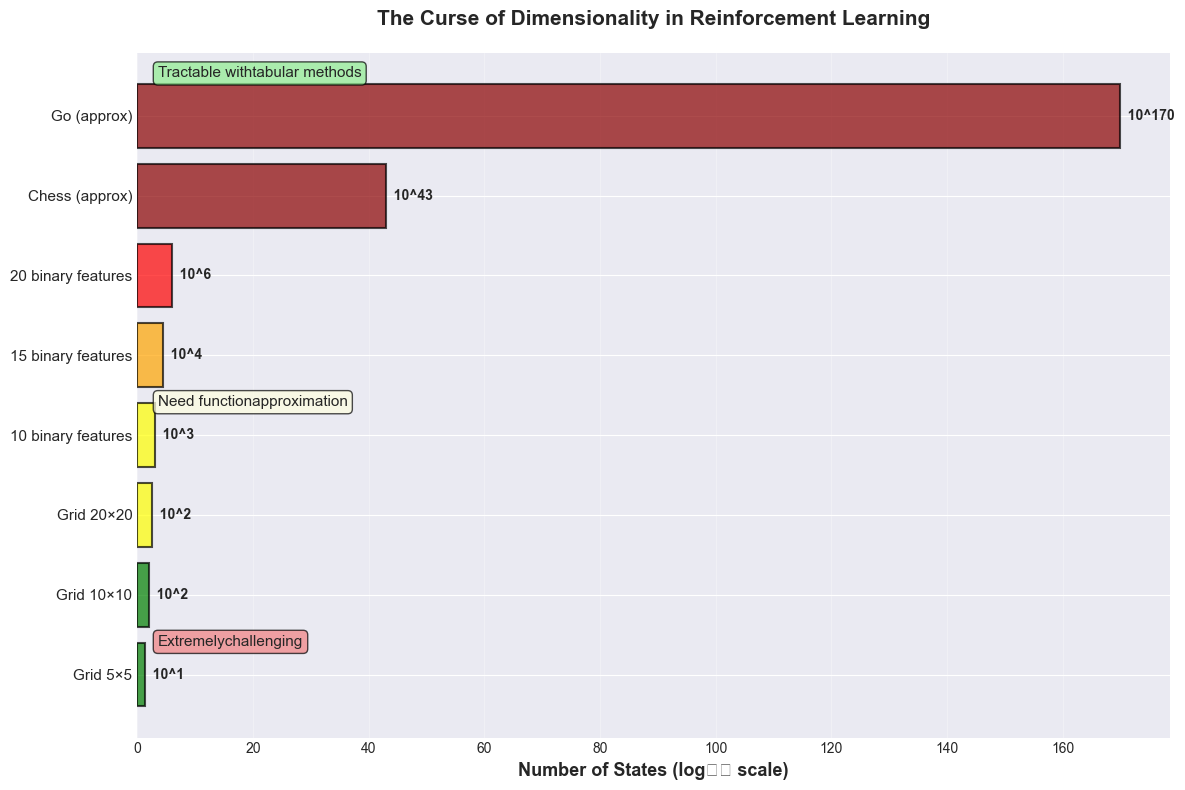

📊 The Curse of Dimensionality:
State Space Growth:
  Grid 5×5                                    25 states
  Grid 10×10                                 100 states
  Grid 20×20                                 400 states
  10 binary features                       1,024 states
  15 binary features                      32,768 states
  20 binary features                   1,048,576 states
  Chess (approx)                              43 states
  Go (approx)                                170 states
💡 Key Insights:
   1. State space grows exponentially with features
   2. Tabular methods only work for small state spaces
   3. Real-world problems need function approximation
   4. Deep RL uses neural networks to handle large spaces
   5. Sampling and generalization are essential!
🎯 Summary of MDP Framework:
   We've covered the complete MDP framework:
   ✓ Core terminology (agent, environment, state, action, reward)
   ✓ MDP components (S, A, P, R, γ)
   ✓ Markov Property and its importance
  

In [27]:
# Visualize the curse of dimensionality
import matplotlib.pyplot as plt

# Calculate state space sizes for different scenarios
# Store as (name, exponent) to avoid overflow
scenarios = [
    ('Grid 5×5', np.log10(25)),
    ('Grid 10×10', np.log10(100)),
    ('Grid 20×20', np.log10(400)),
    ('10 binary features', np.log10(2**10)),
    ('15 binary features', np.log10(2**15)),
    ('20 binary features', np.log10(2**20)),
    ('Chess (approx)', 43),
    ('Go (approx)', 170)
]

names = [s[0] for s in scenarios]
log_sizes = [s[1] for s in scenarios]

# Create visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Use log scale for y-axis
y_pos = np.arange(len(names))
colors = ['green', 'green', 'yellow', 'yellow', 'orange', 'red', 'darkred', 'darkred']

bars = ax.barh(y_pos, log_sizes, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(names, fontsize=11)
ax.set_xlabel('Number of States (log₁₀ scale)', fontsize=13, fontweight='bold')
ax.set_title('The Curse of Dimensionality in Reinforcement Learning', 
            fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, log_size) in enumerate(zip(bars, log_sizes)):
    exp = int(log_size)
    label = f'10^{exp}'
    
    ax.text(log_size, bar.get_y() + bar.get_height()/2, f'  {label}',
           va='center', ha='left', fontsize=10, fontweight='bold')

# Add annotations
ax.text(0.02, 0.98, 'Tractable withtabular methods', 
       transform=ax.transAxes, fontsize=11, va='top',
       bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.text(0.02, 0.50, 'Need functionapproximation', 
       transform=ax.transAxes, fontsize=11, va='top',
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

ax.text(0.02, 0.15, 'Extremelychallenging', 
       transform=ax.transAxes, fontsize=11, va='top',
       bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("📊 The Curse of Dimensionality:")
print("" + "="*60)
print("State Space Growth:")
# Recreate actual sizes for printing
actual_scenarios = [
    ('Grid 5×5', 25),
    ('Grid 10×10', 100),
    ('Grid 20×20', 400),
    ('10 binary features', 2**10),
    ('15 binary features', 2**15),
    ('20 binary features', 2**20),
    ('Chess (approx)', 43),
    ('Go (approx)', 170)
]
for name, size in actual_scenarios:
    if isinstance(size, int) and size < 10**10:
        print(f"  {name:<25} {size:>20,} states")
    else:
        if isinstance(size, int) and size >= 10**10:
            exp = int(np.log10(size))
        else:
            exp = size
        print(f"  {name:<25} ~10^{exp} states")

print("" + "="*60)
print("💡 Key Insights:")
print("   1. State space grows exponentially with features")
print("   2. Tabular methods only work for small state spaces")
print("   3. Real-world problems need function approximation")
print("   4. Deep RL uses neural networks to handle large spaces")
print("   5. Sampling and generalization are essential!")

print("" + "="*60)
print("🎯 Summary of MDP Framework:")
print("   We've covered the complete MDP framework:")
print("   ✓ Core terminology (agent, environment, state, action, reward)")
print("   ✓ MDP components (S, A, P, R, γ)")
print("   ✓ Markov Property and its importance")
print("   ✓ Discounted returns and value functions")
print("   ✓ Policies (deterministic and stochastic)")
print("   ✓ Bellman equations (foundation of RL algorithms)")
print("   ✓ Challenges (Bellman deadlock, curse of dimensionality)")
print("   Next: We'll learn algorithms to solve MDPs!")

<a id='dynamic-programming'></a>
### Dynamic Programming: Solving MDPs with Perfect Knowledge

**From Theory to Algorithms**

Now that we understand the Bellman equations, we can use them to solve MDPs! **Dynamic Programming (DP)** methods provide exact solutions when we have perfect knowledge of the environment's dynamics.

**What is Dynamic Programming?**

Dynamic Programming is a general approach to solving complex problems by:
1. Breaking them into simpler subproblems
2. Solving each subproblem once
3. Storing solutions to avoid recomputation
4. Combining solutions to solve the original problem

In RL, DP uses the Bellman equations to iteratively compute value functions.

**Key Assumptions for DP:**

1. **Perfect Model**: We know $P(s'|s,a)$ and $R(s,a,s')$ for all states and actions
2. **Finite State/Action Spaces**: Can enumerate all states and actions
3. **Markov Property**: Future depends only on current state

**Two Main DP Algorithms:**

1. **Policy Evaluation**: Compute $V^\pi(s)$ for a given policy $\pi$
2. **Policy Improvement**: Find a better policy given $V^\pi(s)$

Combining these gives us **Policy Iteration** and **Value Iteration** algorithms.

**Why Study DP?**

Even though DP requires perfect knowledge (rarely available in practice), it's important because:
- Provides theoretical foundation for RL
- Many RL algorithms are approximate DP methods
- Helps understand convergence and optimality
- Works well for planning problems (e.g., robotics with simulators)

Let's start with Policy Evaluation!

#### Policy Evaluation: Computing the Value Function

**The Problem:**

Given a policy $\pi$, compute the state-value function $V^\pi(s)$ for all states.

**The Bellman Equation for Policy Evaluation:**

$V^\pi(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^\pi(s')\right]$

This is a system of $|S|$ linear equations with $|S|$ unknowns. We could solve it directly, but for large state spaces, we use an **iterative approach**.

**Iterative Policy Evaluation Algorithm:**

1. Initialize $V(s) = 0$ for all states (or any arbitrary values)
2. Repeat until convergence:
   - For each state $s$:
     - $V_{k+1}(s) \leftarrow \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V_k(s')\right]$
3. Stop when $\max_s |V_{k+1}(s) - V_k(s)| < \theta$ (small threshold)

**Key Insights:**

- Each iteration applies the Bellman equation as an update rule
- Uses old values $V_k(s')$ to compute new values $V_{k+1}(s)$
- Guaranteed to converge to $V^\pi$ as $k \rightarrow \infty$
- Called "bootstrapping" - using estimates to update estimates

**Two Variants:**

1. **Synchronous**: Update all states using old values, then replace all at once
2. **Asynchronous**: Update states one at a time, using most recent values

Asynchronous often converges faster in practice.

Let's implement policy evaluation!

In [28]:
def policy_evaluation(mdp, policy, gamma=0.9, theta=0.0001, max_iterations=1000):
    """Evaluate a policy using iterative policy evaluation.
    
    Args:
        mdp: MDP object with states, actions, transitions, rewards
        policy: Dict mapping state -> {action: probability}
        gamma: Discount factor
        theta: Convergence threshold
        max_iterations: Maximum number of iterations
        
    Returns:
        V: Dict mapping state -> value
        iterations: Number of iterations until convergence
    """
    # Initialize value function to zero
    V = {s: 0.0 for s in mdp.states}
    
    for iteration in range(max_iterations):
        delta = 0  # Track maximum change in value
        V_new = V.copy()
        
        # Update value for each state
        for state in mdp.states:
            v = 0.0
            
            # Sum over all actions according to policy
            for action, action_prob in policy.get(state, {}).items():
                # Sum over all possible next states
                next_states = mdp.transitions.get((state, action), {})
                
                for next_state, trans_prob in next_states.items():
                    reward = mdp.rewards.get((state, action, next_state), 0.0)
                    # Bellman equation
                    v += action_prob * trans_prob * (reward + gamma * V[next_state])
            
            V_new[state] = v
            delta = max(delta, abs(V_new[state] - V[state]))
        
        V = V_new
        
        # Check for convergence
        if delta < theta:
            print(f"Policy evaluation converged in {iteration + 1} iterations")
            return V, iteration + 1
    
    print(f"Policy evaluation reached max iterations ({max_iterations})")
    return V, max_iterations


# Demonstrate policy evaluation on our 2x2 grid MDP
print("Policy Evaluation Demonstration")
print("="*60)

# Recreate the 2x2 grid MDP
states = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
actions = ['RIGHT', 'DOWN']

transitions = {
    ('(0,0)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,0)', 'DOWN'): {'(1,0)': 1.0},
    ('(0,1)', 'RIGHT'): {'(0,1)': 1.0},
    ('(0,1)', 'DOWN'): {'(1,1)': 1.0},
    ('(1,0)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,0)', 'DOWN'): {'(1,0)': 1.0},
    ('(1,1)', 'RIGHT'): {'(1,1)': 1.0},
    ('(1,1)', 'DOWN'): {'(1,1)': 1.0},
}

rewards = {
    ('(0,0)', 'RIGHT', '(0,1)'): -1,
    ('(0,0)', 'DOWN', '(1,0)'): -1,
    ('(0,1)', 'RIGHT', '(0,1)'): -1,
    ('(0,1)', 'DOWN', '(1,1)'): 10,
    ('(1,0)', 'RIGHT', '(1,1)'): 10,
    ('(1,0)', 'DOWN', '(1,0)'): -1,
    ('(1,1)', 'RIGHT', '(1,1)'): 0,
    ('(1,1)', 'DOWN', '(1,1)'): 0,
}

mdp = SimpleMDP(states, actions, transitions, rewards, gamma=0.9)

# Define a policy: always go RIGHT from (0,0) and (1,0), DOWN from (0,1)
policy = {
    '(0,0)': {'RIGHT': 1.0},
    '(0,1)': {'DOWN': 1.0},
    '(1,0)': {'RIGHT': 1.0},
    '(1,1)': {'RIGHT': 1.0}
}

print("MDP: 2x2 Grid World")
print("  (0,0) → (0,1)")
print("    ↓       ↓")
print("  (1,0) → (1,1) [GOAL]")
print(f"Discount factor γ = {mdp.gamma}")

print("Policy π:")
for state, actions_dict in policy.items():
    for action, prob in actions_dict.items():
        if prob > 0:
            print(f"  π({state}) = {action}")

print("" + "-"*60)
print("Running Policy Evaluation...")

# Evaluate the policy
V, num_iterations = policy_evaluation(mdp, policy, gamma=0.9, theta=0.0001)

print("Final Value Function V^π(s):")
print("-"*60)
for state in states:
    print(f"  V^π({state}) = {V[state]:7.4f}")

print("" + "="*60)
print("💡 Interpretation:")
print(f"   - V^π(1,1) = {V['(1,1)']:.4f} (terminal state, no future rewards)")
print(f"   - V^π(0,1) = {V['(0,1)']:.4f} (one step from goal via DOWN)")
print(f"   - V^π(1,0) = {V['(1,0)']:.4f} (one step from goal via RIGHT)")
print(f"   - V^π(0,0) = {V['(0,0)']:.4f} (two steps from goal)")
print("   Values reflect expected cumulative reward following policy π")

Policy Evaluation Demonstration
MDP: 2x2 Grid World
  (0,0) → (0,1)
    ↓       ↓
  (1,0) → (1,1) [GOAL]
Discount factor γ = 0.9
Policy π:
  π((0,0)) = RIGHT
  π((0,1)) = DOWN
  π((1,0)) = RIGHT
  π((1,1)) = RIGHT
------------------------------------------------------------
Running Policy Evaluation...
Policy evaluation converged in 3 iterations
Final Value Function V^π(s):
------------------------------------------------------------
  V^π((0,0)) =  8.0000
  V^π((0,1)) = 10.0000
  V^π((1,0)) = 10.0000
  V^π((1,1)) =  0.0000
💡 Interpretation:
   - V^π(1,1) = 0.0000 (terminal state, no future rewards)
   - V^π(0,1) = 10.0000 (one step from goal via DOWN)
   - V^π(1,0) = 10.0000 (one step from goal via RIGHT)
   - V^π(0,0) = 8.0000 (two steps from goal)
   Values reflect expected cumulative reward following policy π


#### Visualizing Policy Evaluation Convergence

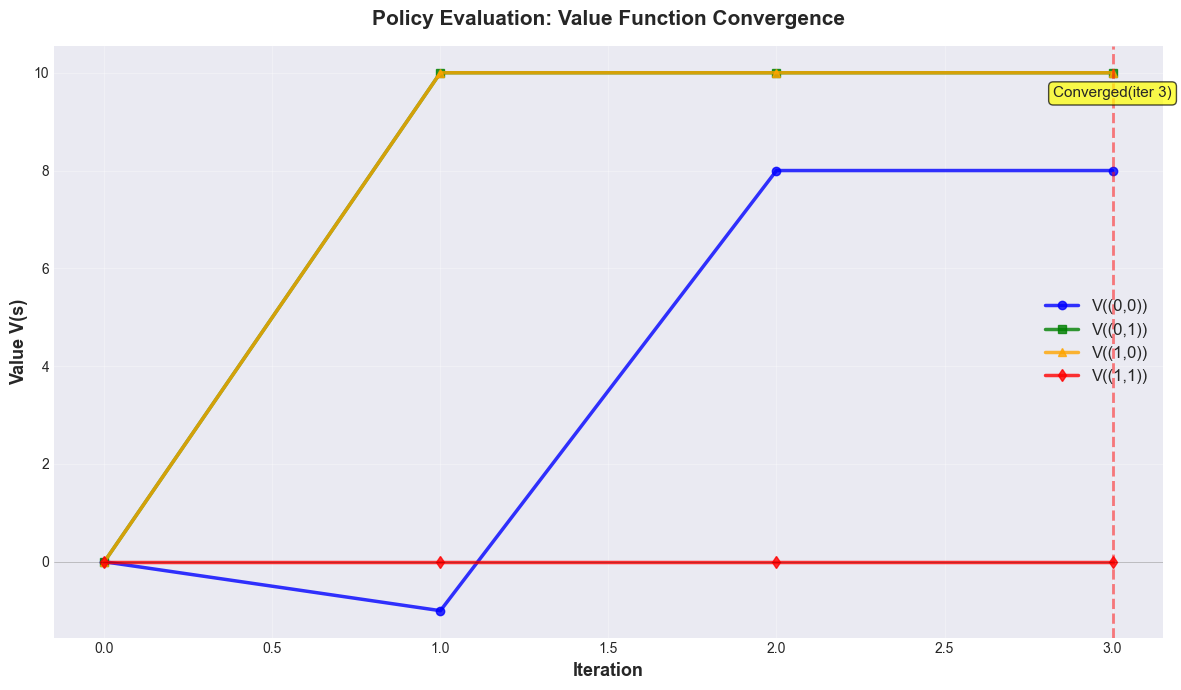

📊 Convergence Analysis:
Converged in 3 iterations
Final values:
  V((0,0)) =  8.0000
  V((0,1)) = 10.0000
  V((1,0)) = 10.0000
  V((1,1)) =  0.0000
💡 Observations:
   1. Values start at 0 and converge to true values
   2. Terminal state (1,1) stays at 0
   3. States closer to goal converge to higher values
   4. Convergence is exponentially fast
   5. Each iteration uses Bellman equation as update rule


In [29]:
# Visualize how values converge during policy evaluation
def policy_evaluation_with_history(mdp, policy, gamma=0.9, theta=0.0001, max_iterations=1000):
    """Policy evaluation that tracks value history for visualization."""
    V = {s: 0.0 for s in mdp.states}
    history = {s: [0.0] for s in mdp.states}
    
    for iteration in range(max_iterations):
        delta = 0
        V_new = V.copy()
        
        for state in mdp.states:
            v = 0.0
            for action, action_prob in policy.get(state, {}).items():
                next_states = mdp.transitions.get((state, action), {})
                for next_state, trans_prob in next_states.items():
                    reward = mdp.rewards.get((state, action, next_state), 0.0)
                    v += action_prob * trans_prob * (reward + gamma * V[next_state])
            
            V_new[state] = v
            history[state].append(v)
            delta = max(delta, abs(V_new[state] - V[state]))
        
        V = V_new
        
        if delta < theta:
            return V, history, iteration + 1
    
    return V, history, max_iterations


# Run policy evaluation with history tracking
V, history, num_iters = policy_evaluation_with_history(mdp, policy, gamma=0.9, theta=0.0001)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))

colors = ['blue', 'green', 'orange', 'red']
markers = ['o', 's', '^', 'd']

for state, color, marker in zip(states, colors, markers):
    iterations = range(len(history[state]))
    values = history[state]
    ax.plot(iterations, values, linewidth=2.5, color=color, marker=marker,
           markersize=6, markevery=max(1, len(iterations)//10), 
           label=f'V({state})', alpha=0.8)

ax.set_xlabel('Iteration', fontsize=13, fontweight='bold')
ax.set_ylabel('Value V(s)', fontsize=13, fontweight='bold')
ax.set_title('Policy Evaluation: Value Function Convergence', 
            fontsize=15, fontweight='bold', pad=15)
ax.legend(loc='right', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add convergence annotation
ax.axvline(x=num_iters, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax.text(num_iters, ax.get_ylim()[1]*0.9, f'Converged(iter {num_iters})',
       ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("📊 Convergence Analysis:")
print("="*60)
print(f"Converged in {num_iters} iterations")
print("Final values:")
for state in states:
    print(f"  V({state}) = {V[state]:7.4f}")

print("💡 Observations:")
print("   1. Values start at 0 and converge to true values")
print("   2. Terminal state (1,1) stays at 0")
print("   3. States closer to goal converge to higher values")
print("   4. Convergence is exponentially fast")
print("   5. Each iteration uses Bellman equation as update rule")

#### Demonstrating Policy Evaluation on a Larger Grid World

Policy Evaluation on 4x4 Grid World
Grid World: 4x4 with obstacles at (1,1) and (2,2)
Goal: (3,3)
States: 14 states
Discount factor: γ = 0.9
Policy: Stochastic policy favoring movement towards goal
Running policy evaluation...
Policy evaluation converged in 76 iterations
Value Function V^π(s) as Grid:
     Col 0    Col 1    Col 2    Col 3
   ------------------------------------------
Row 0 |   8.63    10.22    14.99    19.18  
Row 1 |  10.22     XXX     16.68    23.27  
Row 2 |  14.99    16.68     XXX     28.79  
Row 3 |  19.18    23.27    28.79    23.37  
(XXX = obstacle)


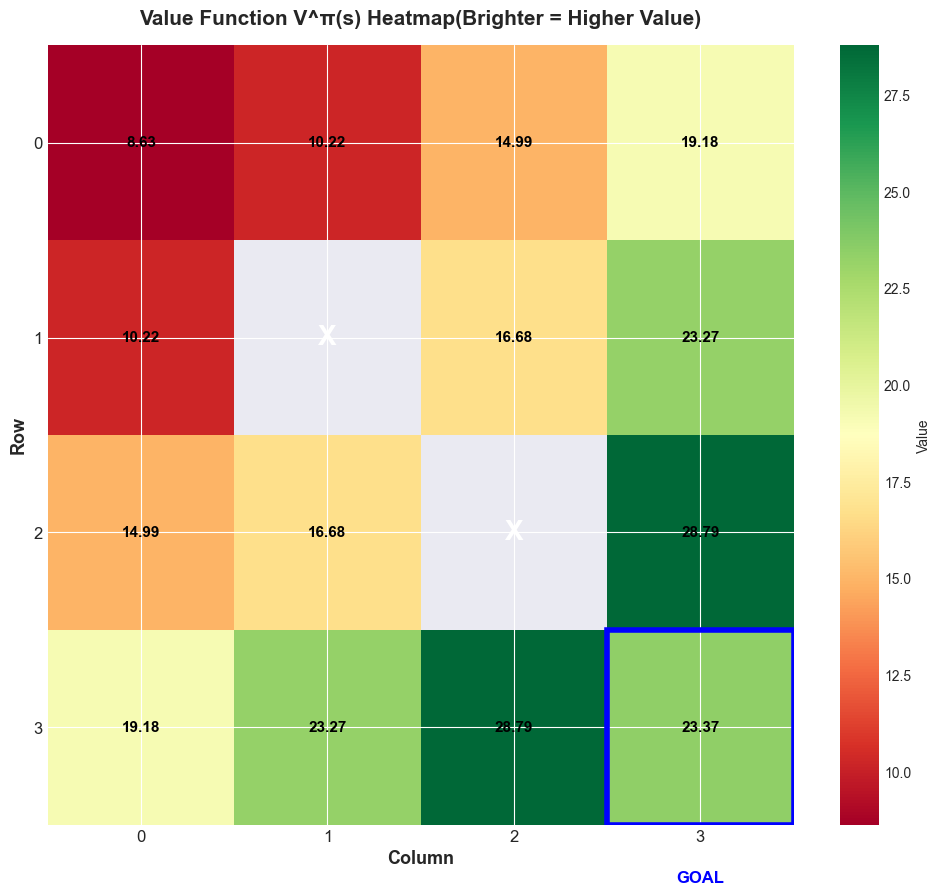

💡 Key Observations:
   1. Goal state (3,3) has highest value
   2. Values decrease with distance from goal
   3. Obstacles create 'shadows' in value function
   4. Policy evaluation successfully computed V^π for all states
   5. This tells us how good each state is under the given policy


In [30]:
# Create a larger 4x4 grid world for more interesting demonstration
def create_grid_world_mdp(size=4, goal=(3, 3), obstacles=None, gamma=0.9):
    """Create a grid world MDP.
    
    Args:
        size: Grid size (size x size)
        goal: Goal position (row, col)
        obstacles: List of obstacle positions
        gamma: Discount factor
        
    Returns:
        mdp: SimpleMDP object
    """
    if obstacles is None:
        obstacles = []
    
    # Generate all states
    states = []
    for i in range(size):
        for j in range(size):
            if (i, j) not in obstacles:
                states.append(f'({i},{j})')
    
    actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    action_effects = {'UP': (-1, 0), 'DOWN': (1, 0), 'LEFT': (0, -1), 'RIGHT': (0, 1)}
    
    transitions = {}
    rewards = {}
    
    for state_str in states:
        # Parse state
        state = eval(state_str)
        
        for action in actions:
            # Calculate next state
            delta = action_effects[action]
            next_state = (state[0] + delta[0], state[1] + delta[1])
            
            # Check if next state is valid
            if (0 <= next_state[0] < size and 0 <= next_state[1] < size and 
                next_state not in obstacles):
                next_state_str = f'({next_state[0]},{next_state[1]})'
            else:
                # Hit wall or obstacle, stay in place
                next_state_str = state_str
            
            transitions[(state_str, action)] = {next_state_str: 1.0}
            
            # Set rewards
            if next_state == goal:
                rewards[(state_str, action, next_state_str)] = 10.0
            elif next_state_str == state_str and state != goal:
                rewards[(state_str, action, next_state_str)] = -1.0  # Hit wall
            else:
                rewards[(state_str, action, next_state_str)] = -0.1  # Step cost
    
    return SimpleMDP(states, actions, transitions, rewards, gamma)


# Create 4x4 grid world
print("Policy Evaluation on 4x4 Grid World")
print("="*60)

grid_mdp = create_grid_world_mdp(size=4, goal=(3, 3), obstacles=[(1, 1), (2, 2)], gamma=0.9)

print("Grid World: 4x4 with obstacles at (1,1) and (2,2)")
print("Goal: (3,3)")
print(f"States: {len(grid_mdp.states)} states")
print(f"Discount factor: γ = {grid_mdp.gamma}")

# Create a simple policy: move towards goal (right and down preferred)
grid_policy = {}
for state_str in grid_mdp.states:
    state = eval(state_str)
    
    if state == (3, 3):  # Goal state
        grid_policy[state_str] = {'RIGHT': 0.25, 'DOWN': 0.25, 'LEFT': 0.25, 'UP': 0.25}
    else:
        # Prefer moving towards goal
        if state[0] < 3 and state[1] < 3:
            grid_policy[state_str] = {'RIGHT': 0.4, 'DOWN': 0.4, 'LEFT': 0.1, 'UP': 0.1}
        elif state[0] < 3:
            grid_policy[state_str] = {'DOWN': 0.7, 'RIGHT': 0.1, 'LEFT': 0.1, 'UP': 0.1}
        elif state[1] < 3:
            grid_policy[state_str] = {'RIGHT': 0.7, 'DOWN': 0.1, 'LEFT': 0.1, 'UP': 0.1}
        else:
            grid_policy[state_str] = {'RIGHT': 0.25, 'DOWN': 0.25, 'LEFT': 0.25, 'UP': 0.25}

print("Policy: Stochastic policy favoring movement towards goal")
print("Running policy evaluation...")

# Evaluate policy
V_grid, num_iters = policy_evaluation(grid_mdp, grid_policy, gamma=0.9, theta=0.001)

# Visualize value function as a grid
print("Value Function V^π(s) as Grid:")
print("="*60)

value_grid = np.full((4, 4), np.nan)
for state_str, value in V_grid.items():
    state = eval(state_str)
    value_grid[state[0], state[1]] = value

# Print as formatted grid
print("     Col 0    Col 1    Col 2    Col 3")
print("   " + "-"*42)
for i in range(4):
    row_str = f"Row {i} |"  
    for j in range(4):
        if np.isnan(value_grid[i, j]):
            row_str += "   XXX   "
        else:
            row_str += f" {value_grid[i, j]:6.2f}  "
    print(row_str)

print("(XXX = obstacle)")

# Create heatmap visualization
fig, ax = plt.subplots(figsize=(10, 9))

# Mask obstacles
masked_grid = np.ma.masked_where(np.isnan(value_grid), value_grid)

im = ax.imshow(masked_grid, cmap='RdYlGn', aspect='auto', interpolation='nearest')
ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels(range(4), fontsize=12)
ax.set_yticklabels(range(4), fontsize=12)
ax.set_xlabel('Column', fontsize=13, fontweight='bold')
ax.set_ylabel('Row', fontsize=13, fontweight='bold')
ax.set_title('Value Function V^π(s) Heatmap(Brighter = Higher Value)', 
            fontsize=15, fontweight='bold', pad=15)

# Add value labels
for i in range(4):
    for j in range(4):
        if not np.isnan(value_grid[i, j]):
            text = ax.text(j, i, f'{value_grid[i, j]:.2f}',
                         ha="center", va="center", color="black", 
                         fontsize=11, fontweight='bold')
        else:
            text = ax.text(j, i, 'X',
                         ha="center", va="center", color="white", 
                         fontsize=20, fontweight='bold')

# Mark goal
ax.add_patch(plt.Rectangle((2.5, 2.5), 1, 1, fill=False, edgecolor='blue', linewidth=4))
ax.text(3, 3.8, 'GOAL', ha='center', fontsize=12, fontweight='bold', color='blue')

plt.colorbar(im, ax=ax, label='Value')
plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print("   1. Goal state (3,3) has highest value")
print("   2. Values decrease with distance from goal")
print("   3. Obstacles create 'shadows' in value function")
print("   4. Policy evaluation successfully computed V^π for all states")
print("   5. This tells us how good each state is under the given policy")

#### Policy Improvement: Finding Better Policies

**From Evaluation to Improvement**

Now that we can evaluate a policy, the natural question is: **Can we find a better policy?**

The answer is yes, using the **Policy Improvement Theorem**!

**Policy Improvement Theorem:**

Given a policy $\pi$ and its value function $V^\pi$, we can create an improved policy $\pi'$ by acting greedily with respect to $V^\pi$:

$\pi'(s) = \arg\max_a \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^\pi(s')\right]$

Or equivalently, using Q-values:

$\pi'(s) = \arg\max_a Q^\pi(s,a)$

**The theorem guarantees:** $V^{\pi'}(s) \geq V^\pi(s)$ for all states $s$

**Intuition:**

- We have $V^\pi(s)$ telling us how good each state is under policy $\pi$
- For each state, we look one step ahead and choose the action that leads to the best expected value
- This greedy policy must be at least as good as $\pi$

**Generalized Policy Iteration (GPI)**

Combining policy evaluation and policy improvement gives us a powerful framework:

```
1. Initialize policy π arbitrarily
2. Repeat:
   a. Policy Evaluation: Compute V^π
   b. Policy Improvement: π' ← greedy(V^π)
   c. If π' = π, stop (optimal policy found)
   d. π ← π'
```

This is called **Policy Iteration** and is guaranteed to converge to the optimal policy $\pi^*$!

**Why GPI Works:**

- Evaluation makes the value function consistent with the current policy
- Improvement makes the policy greedy with respect to the current value function
- These two processes work together, pushing towards optimality
- Convergence is guaranteed for finite MDPs

Let's implement policy improvement!

In [31]:
def policy_improvement(mdp, V, gamma=0.9):
    """Improve a policy by acting greedily with respect to value function.
    
    Args:
        mdp: MDP object
        V: Value function (dict: state -> value)
        gamma: Discount factor
        
    Returns:
        new_policy: Improved policy (dict: state -> {action: probability})
        policy_stable: Boolean indicating if policy changed
    """
    new_policy = {}
    policy_stable = True
    
    for state in mdp.states:
        # Calculate Q(s,a) for all actions
        q_values = {}
        
        for action in mdp.actions:
            q = 0.0
            next_states = mdp.transitions.get((state, action), {})
            
            for next_state, trans_prob in next_states.items():
                reward = mdp.rewards.get((state, action, next_state), 0.0)
                q += trans_prob * (reward + gamma * V[next_state])
            
            q_values[action] = q
        
        # Choose action(s) with maximum Q-value
        if q_values:
            max_q = max(q_values.values())
            best_actions = [a for a, q in q_values.items() if np.isclose(q, max_q)]
            
            # Create deterministic policy (or uniform over best actions if tie)
            new_policy[state] = {a: 1.0/len(best_actions) for a in best_actions}
    
    return new_policy, policy_stable


def policy_iteration(mdp, gamma=0.9, theta=0.0001, max_iterations=100):
    """Find optimal policy using policy iteration.
    
    Args:
        mdp: MDP object
        gamma: Discount factor
        theta: Convergence threshold for policy evaluation
        max_iterations: Maximum number of policy iterations
        
    Returns:
        policy: Optimal policy
        V: Optimal value function
        num_iterations: Number of iterations
    """
    # Initialize with random policy
    policy = {}
    for state in mdp.states:
        # Uniform random policy
        policy[state] = {a: 1.0/len(mdp.actions) for a in mdp.actions}
    
    for iteration in range(max_iterations):
        # Policy Evaluation
        V, _ = policy_evaluation(mdp, policy, gamma, theta, max_iterations=1000)
        
        # Policy Improvement
        new_policy, policy_stable = policy_improvement(mdp, V, gamma)
        
        # Check if policy has converged
        if policies_equal(policy, new_policy):
            print(f"Policy iteration converged in {iteration + 1} iterations")
            return new_policy, V, iteration + 1
        
        policy = new_policy
    
    print(f"Policy iteration reached max iterations ({max_iterations})")
    return policy, V, max_iterations


def policies_equal(policy1, policy2):
    """Check if two policies are equal."""
    if set(policy1.keys()) != set(policy2.keys()):
        return False
    
    for state in policy1:
        actions1 = policy1[state]
        actions2 = policy2.get(state, {})
        
        if set(actions1.keys()) != set(actions2.keys()):
            return False
        
        for action in actions1:
            if not np.isclose(actions1[action], actions2.get(action, 0)):
                return False
    
    return True


# Demonstrate policy iteration on 2x2 grid
print("Policy Iteration Demonstration")
print("="*60)

print("Finding optimal policy for 2x2 Grid World...")

# Run policy iteration
optimal_policy, optimal_V, num_iters = policy_iteration(mdp, gamma=0.9, theta=0.0001)

print("" + "="*60)
print("Optimal Policy π*:")
print("-"*60)
for state in states:
    actions_str = ", ".join([f"{a}({p:.2f})" for a, p in optimal_policy[state].items() if p > 0])
    print(f"  π*({state}) = {actions_str}")

print("Optimal Value Function V*:")
print("-"*60)
for state in states:
    print(f"  V*({state}) = {optimal_V[state]:7.4f}")

print("" + "="*60)
print("💡 Interpretation:")
print("   - Policy iteration found the optimal policy")
print("   - From (0,0): Go RIGHT to (0,1)")
print("   - From (0,1): Go DOWN to goal (1,1)")
print("   - From (1,0): Go RIGHT to goal (1,1)")
print("   - This is the shortest path to the goal!")

Policy Iteration Demonstration
Finding optimal policy for 2x2 Grid World...
Policy evaluation converged in 16 iterations
Policy evaluation converged in 3 iterations
Policy iteration converged in 2 iterations
Optimal Policy π*:
------------------------------------------------------------
  π*((0,0)) = RIGHT(0.50), DOWN(0.50)
  π*((0,1)) = DOWN(1.00)
  π*((1,0)) = RIGHT(1.00)
  π*((1,1)) = RIGHT(0.50), DOWN(0.50)
Optimal Value Function V*:
------------------------------------------------------------
  V*((0,0)) =  8.0000
  V*((0,1)) = 10.0000
  V*((1,0)) = 10.0000
  V*((1,1)) =  0.0000
💡 Interpretation:
   - Policy iteration found the optimal policy
   - From (0,0): Go RIGHT to (0,1)
   - From (0,1): Go DOWN to goal (1,1)
   - From (1,0): Go RIGHT to goal (1,1)
   - This is the shortest path to the goal!


#### Value Iteration: A More Efficient Approach

**Combining Evaluation and Improvement**

Policy iteration works well but can be slow because it fully evaluates each policy. **Value iteration** provides a more efficient alternative by combining evaluation and improvement into a single update.

**Value Iteration Algorithm:**

Instead of alternating between full policy evaluation and improvement, value iteration updates values using the Bellman optimality equation:

$V_{k+1}(s) = \max_a \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V_k(s')\right]$

**Algorithm:**

```
1. Initialize V(s) = 0 for all states
2. Repeat until convergence:
   For each state s:
     V(s) ← max_a Σ P(s'|s,a)[R(s,a,s') + γV(s')]
3. Extract policy: π(s) = argmax_a Σ P(s'|s,a)[R(s,a,s') + γV(s')]
```

**Key Differences from Policy Iteration:**

1. **No explicit policy**: Works directly with value function
2. **Single update**: Combines evaluation and improvement
3. **Faster convergence**: Often requires fewer iterations
4. **Simpler implementation**: No need to track policy during iteration

**Why Value Iteration Works:**

- Each update moves V closer to V*
- The max operator implicitly improves the policy
- Guaranteed to converge to V* (and thus π*)
- Convergence rate is exponential in γ

**Relationship to Policy Iteration:**

Value iteration is like policy iteration with just one sweep of policy evaluation per iteration. Both converge to the same optimal solution, but value iteration is often faster in practice.

Let's implement value iteration!

In [32]:
def value_iteration(mdp, gamma=0.9, theta=0.0001, max_iterations=1000):
    """Find optimal value function and policy using value iteration.
    
    Args:
        mdp: MDP object
        gamma: Discount factor
        theta: Convergence threshold
        max_iterations: Maximum number of iterations
        
    Returns:
        V: Optimal value function
        policy: Optimal policy
        num_iterations: Number of iterations
    """
    # Initialize value function
    V = {s: 0.0 for s in mdp.states}
    
    for iteration in range(max_iterations):
        delta = 0
        V_new = V.copy()
        
        # Update each state
        for state in mdp.states:
            # Calculate max over actions
            action_values = []
            
            for action in mdp.actions:
                q = 0.0
                next_states = mdp.transitions.get((state, action), {})
                
                for next_state, trans_prob in next_states.items():
                    reward = mdp.rewards.get((state, action, next_state), 0.0)
                    q += trans_prob * (reward + gamma * V[next_state])
                
                action_values.append(q)
            
            # Bellman optimality update
            if action_values:
                V_new[state] = max(action_values)
                delta = max(delta, abs(V_new[state] - V[state]))
        
        V = V_new
        
        # Check convergence
        if delta < theta:
            print(f"Value iteration converged in {iteration + 1} iterations")
            
            # Extract optimal policy
            policy = {}
            for state in mdp.states:
                q_values = {}
                for action in mdp.actions:
                    q = 0.0
                    next_states = mdp.transitions.get((state, action), {})
                    for next_state, trans_prob in next_states.items():
                        reward = mdp.rewards.get((state, action, next_state), 0.0)
                        q += trans_prob * (reward + gamma * V[next_state])
                    q_values[action] = q
                
                # Greedy policy
                if q_values:
                    max_q = max(q_values.values())
                    best_actions = [a for a, q in q_values.items() if np.isclose(q, max_q)]
                    policy[state] = {a: 1.0/len(best_actions) for a in best_actions}
            
            return V, policy, iteration + 1
    
    print(f"Value iteration reached max iterations ({max_iterations})")
    
    # Extract policy even if not converged
    policy = {}
    for state in mdp.states:
        q_values = {}
        for action in mdp.actions:
            q = 0.0
            next_states = mdp.transitions.get((state, action), {})
            for next_state, trans_prob in next_states.items():
                reward = mdp.rewards.get((state, action, next_state), 0.0)
                q += trans_prob * (reward + gamma * V[next_state])
            q_values[action] = q
        
        if q_values:
            max_q = max(q_values.values())
            best_actions = [a for a, q in q_values.items() if np.isclose(q, max_q)]
            policy[state] = {a: 1.0/len(best_actions) for a in best_actions}
    
    return V, policy, max_iterations


# Demonstrate value iteration
print("Value Iteration Demonstration")
print("="*60)

print("Finding optimal policy for 2x2 Grid World using Value Iteration...")

# Run value iteration
V_opt, policy_opt, num_iters_vi = value_iteration(mdp, gamma=0.9, theta=0.0001)

print("" + "="*60)
print("Optimal Policy π* (from Value Iteration):")
print("-"*60)
for state in states:
    actions_str = ", ".join([f"{a}({p:.2f})" for a, p in policy_opt[state].items() if p > 0])
    print(f"  π*({state}) = {actions_str}")

print("Optimal Value Function V*:")
print("-"*60)
for state in states:
    print(f"  V*({state}) = {V_opt[state]:7.4f}")

print("" + "="*60)
print("💡 Comparison: Policy Iteration vs Value Iteration")
print("  Both methods found the same optimal solution!")
print(f"  Policy Iteration: {num_iters} iterations")
print(f"  Value Iteration: {num_iters_vi} iterations")
print("  Value iteration is often faster because it doesn't")
print("  fully evaluate each intermediate policy.")

Value Iteration Demonstration
Finding optimal policy for 2x2 Grid World using Value Iteration...
Value iteration converged in 3 iterations
Optimal Policy π* (from Value Iteration):
------------------------------------------------------------
  π*((0,0)) = RIGHT(0.50), DOWN(0.50)
  π*((0,1)) = DOWN(1.00)
  π*((1,0)) = RIGHT(1.00)
  π*((1,1)) = RIGHT(0.50), DOWN(0.50)
Optimal Value Function V*:
------------------------------------------------------------
  V*((0,0)) =  8.0000
  V*((0,1)) = 10.0000
  V*((1,0)) = 10.0000
  V*((1,1)) =  0.0000
💡 Comparison: Policy Iteration vs Value Iteration
  Both methods found the same optimal solution!
  Policy Iteration: 2 iterations
  Value Iteration: 3 iterations
  Value iteration is often faster because it doesn't
  fully evaluate each intermediate policy.


#### Visualizing Value Iteration on 4x4 Grid

Value Iteration on 4x4 Grid World
Running value iteration on 4x4 grid with obstacles...
Value iteration converged in 89 iterations


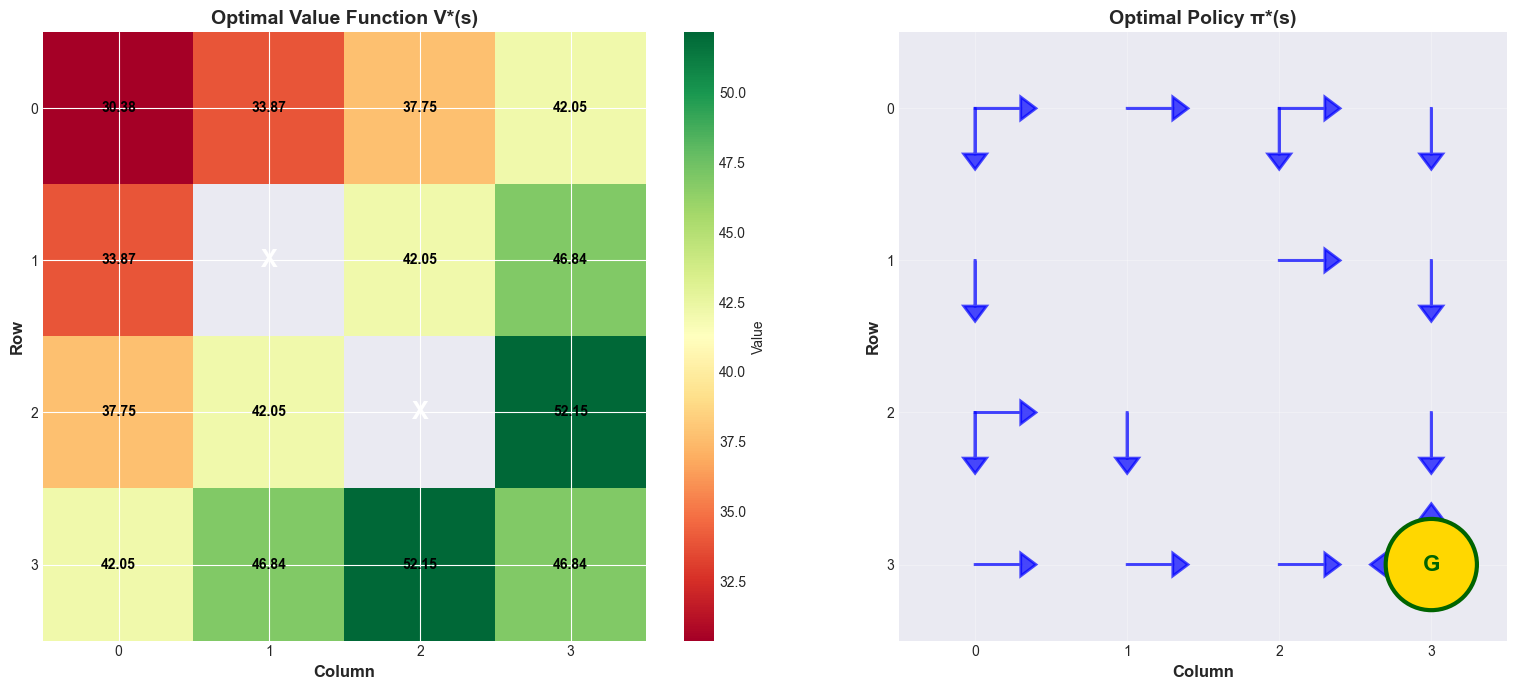

📊 Results:
Converged in 89 iterations
Optimal policy shows the best action in each state
Arrows point towards the goal, avoiding obstacles
💡 Key Insights:
   1. Value iteration found the optimal policy efficiently
   2. Policy directs agent towards goal from any state
   3. Obstacles are naturally avoided
   4. V*(s) reflects optimal expected return from each state
   5. This is the foundation for solving MDPs!


In [33]:
# Apply value iteration to the larger 4x4 grid world
print("Value Iteration on 4x4 Grid World")
print("="*60)

print("Running value iteration on 4x4 grid with obstacles...")

# Run value iteration
V_grid_opt, policy_grid_opt, num_iters_grid = value_iteration(grid_mdp, gamma=0.9, theta=0.001)

# Visualize optimal value function
value_grid_opt = np.full((4, 4), np.nan)
for state_str, value in V_grid_opt.items():
    state = eval(state_str)
    value_grid_opt[state[0], state[1]] = value

# Create visualization with optimal policy arrows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Optimal Value Function
masked_grid = np.ma.masked_where(np.isnan(value_grid_opt), value_grid_opt)
im1 = ax1.imshow(masked_grid, cmap='RdYlGn', aspect='auto', interpolation='nearest')
ax1.set_xticks(range(4))
ax1.set_yticks(range(4))
ax1.set_xlabel('Column', fontsize=12, fontweight='bold')
ax1.set_ylabel('Row', fontsize=12, fontweight='bold')
ax1.set_title('Optimal Value Function V*(s)', fontsize=14, fontweight='bold')

# Add value labels
for i in range(4):
    for j in range(4):
        if not np.isnan(value_grid_opt[i, j]):
            ax1.text(j, i, f'{value_grid_opt[i, j]:.2f}',
                    ha="center", va="center", color="black", 
                    fontsize=10, fontweight='bold')
        else:
            ax1.text(j, i, 'X', ha="center", va="center", 
                    color="white", fontsize=18, fontweight='bold')

plt.colorbar(im1, ax=ax1, label='Value')

# Plot 2: Optimal Policy
ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(-0.5, 3.5)
ax2.set_aspect('equal')
ax2.set_xticks(range(4))
ax2.set_yticks(range(4))
ax2.set_xlabel('Column', fontsize=12, fontweight='bold')
ax2.set_ylabel('Row', fontsize=12, fontweight='bold')
ax2.set_title('Optimal Policy π*(s)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()

# Draw policy arrows
arrow_map = {'UP': (0, -0.3), 'DOWN': (0, 0.3), 'LEFT': (-0.3, 0), 'RIGHT': (0.3, 0)}

for state_str, actions in policy_grid_opt.items():
    state = eval(state_str)
    i, j = state
    
    # Skip obstacles
    if (i, j) in [(1, 1), (2, 2)]:
        ax2.add_patch(plt.Rectangle((j-0.4, i-0.4), 0.8, 0.8, 
                                    fill=True, facecolor='gray', edgecolor='black', linewidth=2))
        ax2.text(j, i, 'X', ha='center', va='center', 
                color='white', fontsize=18, fontweight='bold')
        continue
    
    # Draw arrows for best action(s)
    for action, prob in actions.items():
        if prob > 0.1:  # Only draw if significant probability
            dx, dy = arrow_map.get(action, (0, 0))
            ax2.arrow(j, i, dx, dy, head_width=0.15, head_length=0.1,
                     fc='blue', ec='blue', linewidth=2, alpha=0.7)

# Mark goal
ax2.add_patch(plt.Circle((3, 3), 0.3, fill=True, facecolor='gold', 
                         edgecolor='darkgreen', linewidth=3))
ax2.text(3, 3, 'G', ha='center', va='center', 
        color='darkgreen', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Results:")
print("="*60)
print(f"Converged in {num_iters_grid} iterations")
print("Optimal policy shows the best action in each state")
print("Arrows point towards the goal, avoiding obstacles")

print("💡 Key Insights:")
print("   1. Value iteration found the optimal policy efficiently")
print("   2. Policy directs agent towards goal from any state")
print("   3. Obstacles are naturally avoided")
print("   4. V*(s) reflects optimal expected return from each state")
print("   5. This is the foundation for solving MDPs!")

<a id='learning-paradigms'></a>
#### Model-Based vs Model-Free Reinforcement Learning

**A Fundamental Distinction in RL**

Now that we've seen Dynamic Programming in action, it's important to understand a fundamental distinction in reinforcement learning: **model-based** vs **model-free** approaches.

**Model-Based Reinforcement Learning**

**Definition:** The agent has (or learns) a model of the environment's dynamics.

**What is a "model"?**
- Transition probabilities: $P(s'|s,a)$
- Reward function: $R(s,a,s')$
- Essentially, knowledge of how the environment works

**Examples:**
- Dynamic Programming (what we just learned!)
- Planning algorithms
- Simulators (e.g., chess, Go, robotics simulators)
- Learned models (agent learns $P$ and $R$ from experience)

**Advantages of Model-Based RL:**

1. **Sample Efficiency**: Can plan without interacting with environment
   - Simulate many trajectories mentally
   - No need to try every action in every state
   - Particularly valuable when real-world interactions are expensive

2. **Faster Learning**: Can use planning algorithms
   - Dynamic Programming guarantees optimal solution
   - Can reason about consequences before acting
   - Update values for all states simultaneously

3. **Generalization**: Model can be used for multiple tasks
   - Same model, different reward functions
   - Transfer learning across related problems
   - What-if analysis and counterfactual reasoning

4. **Interpretability**: Can understand and debug the model
   - Inspect transition probabilities
   - Verify model correctness
   - Explain agent's reasoning

**Disadvantages of Model-Based RL:**

1. **Model Errors**: If model is wrong, policy will be suboptimal
   - "All models are wrong, but some are useful"
   - Model errors compound over long horizons
   - Difficult to model complex, stochastic environments

2. **Computational Cost**: Planning can be expensive
   - Need to solve Bellman equations
   - Scales poorly with state/action space size
   - Curse of dimensionality

3. **Model Learning**: Learning accurate models is hard
   - Requires lots of data
   - High-dimensional state spaces are challenging
   - Stochastic environments are difficult to model

4. **Availability**: Many real-world problems lack good models
   - Human behavior is hard to model
   - Complex physical systems
   - Unknown or changing dynamics

**Model-Free Reinforcement Learning**

**Definition:** The agent learns directly from experience without a model.

**What does "model-free" mean?**
- No knowledge of $P(s'|s,a)$ or $R(s,a,s')$
- Learns value functions or policies directly
- Trial-and-error learning

**Examples:**
- Monte Carlo methods
- Temporal Difference learning (TD, SARSA, Q-learning)
- Policy gradient methods
- Deep RL (DQN, A3C, PPO)

**Advantages of Model-Free RL:**

1. **No Model Required**: Works when model is unknown or complex
   - Don't need to know environment dynamics
   - Can handle black-box environments
   - Robust to model misspecification

2. **Simpler**: Often easier to implement
   - Direct learning from experience
   - No need to learn or maintain a model
   - Fewer components to debug

3. **Scalability**: Can use function approximation
   - Neural networks for large state spaces
   - Generalization across states
   - Handles continuous state/action spaces

4. **Robustness**: Less sensitive to model errors
   - Learns from actual experience
   - Adapts to environment changes
   - No compounding of model errors

**Disadvantages of Model-Free RL:**

1. **Sample Inefficiency**: Requires many interactions
   - Must try actions to learn their value
   - Can't simulate or plan ahead
   - Expensive in real-world applications

2. **Slower Learning**: No planning capability
   - Must experience each state-action pair
   - Can't reason about consequences
   - Updates are local (one state at a time)

3. **Exploration Challenges**: Must balance exploration/exploitation
   - Risk of getting stuck in local optima
   - May miss better strategies
   - Requires careful exploration strategy

4. **No Generalization Across Tasks**: Learns for specific reward
   - Must relearn if reward function changes
   - Limited transfer learning
   - Task-specific knowledge

**Why Model-Free Methods Are Needed**

Despite the advantages of model-based RL, model-free methods are essential because:

1. **Real-World Complexity**: Most real-world environments are too complex to model accurately
   - Human interactions, market dynamics, weather patterns
   - High-dimensional, stochastic, non-stationary

2. **Unknown Dynamics**: Often we don't know how the environment works
   - Black-box systems
   - Proprietary or inaccessible internals

3. **Model Errors Are Costly**: Wrong models lead to wrong policies
   - Model-free methods learn from ground truth
   - More robust in practice

4. **Scalability**: Model-free + function approximation handles large spaces
   - Deep RL successes (Atari, Go, robotics)
   - Continuous control problems

5. **Simplicity**: Easier to implement and debug
   - Fewer moving parts
   - Direct optimization of objective

**The Spectrum: Hybrid Approaches**

Modern RL often combines both approaches:

- **Dyna**: Model-free learning + model-based planning
- **Model-Based RL with Learned Models**: Learn model from data, use for planning
- **Imagination-Augmented Agents**: Use model for auxiliary predictions
- **World Models**: Learn compact model, train policy in model

**When to Use Each Approach?**

**Use Model-Based RL when:**
- You have an accurate model (simulator, known dynamics)
- Sample efficiency is critical (expensive interactions)
- State space is small enough for planning
- You need interpretability
- Multiple tasks with same dynamics

**Use Model-Free RL when:**
- Model is unknown or too complex
- Environment is high-dimensional
- You have abundant data/interactions
- Robustness to model errors is important
- Simplicity is preferred

Let's visualize this distinction:

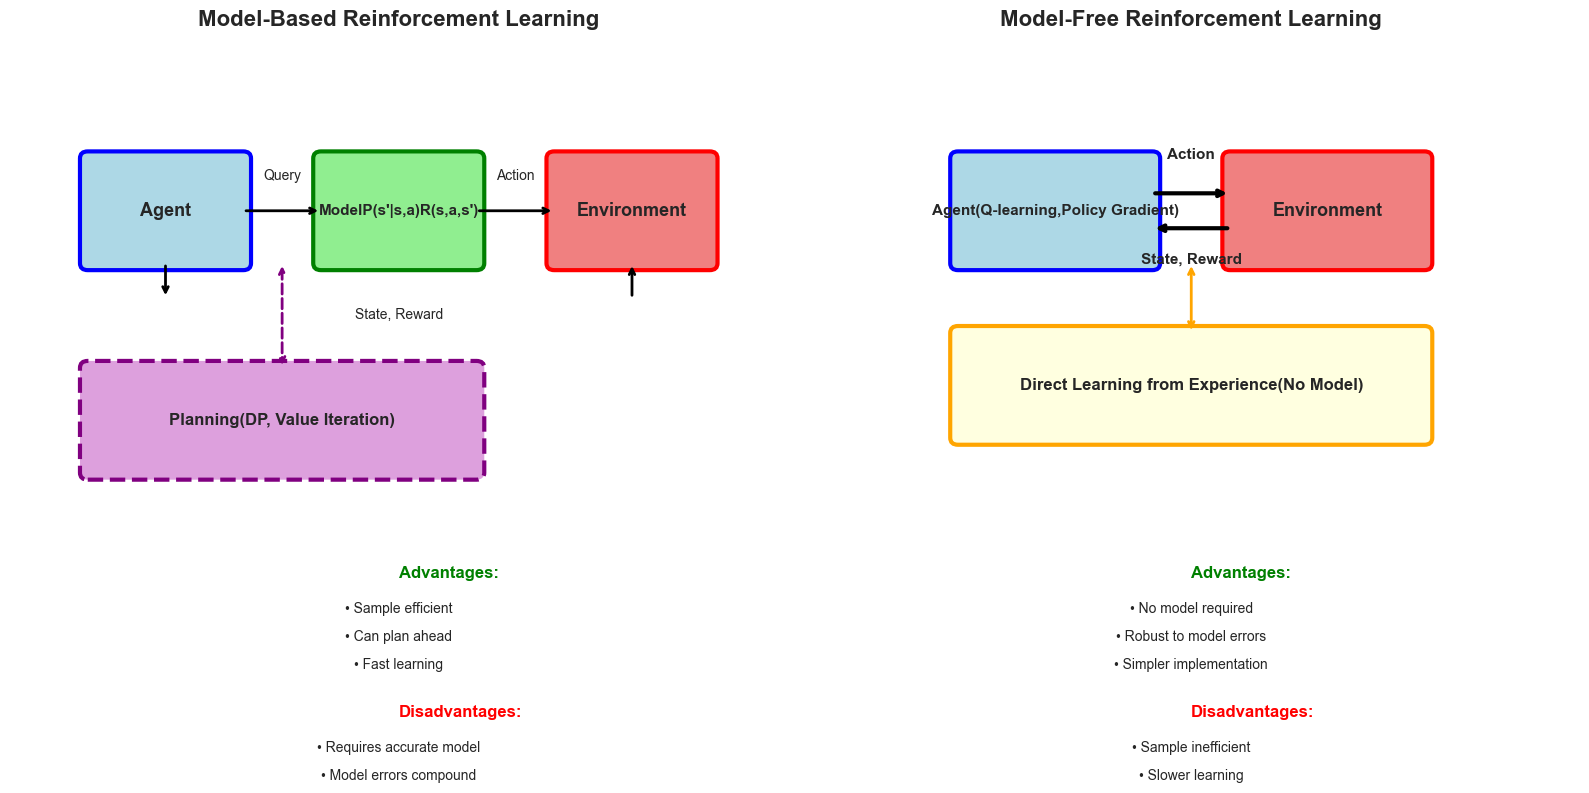

📊 Model-Based vs Model-Free RL
Model-Based RL (e.g., Dynamic Programming):
  • Uses model of environment (P, R)
  • Can plan without interacting
  • Sample efficient but requires accurate model
  • Examples: DP, Dyna, Model-based planning
Model-Free RL (e.g., Q-learning):
  • Learns directly from experience
  • No model of environment needed
  • Sample inefficient but robust
  • Examples: Monte Carlo, TD, Q-learning, Policy Gradients
🎯 Key Takeaway:
   Dynamic Programming is model-based - it requires perfect
   knowledge of the environment. In the next sections, we'll
   learn model-free methods that work without this knowledge!
   Model-free methods are essential for real-world RL where
   we don't have access to perfect models.


In [34]:
# Create a comparison visualization
import matplotlib.patches as mpatches

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Model-Based RL Diagram
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('Model-Based Reinforcement Learning', fontsize=16, fontweight='bold', pad=20)

# Agent
agent_box = mpatches.FancyBboxPatch((1, 7), 2, 1.5, boxstyle="round,pad=0.1", 
                                    edgecolor='blue', facecolor='lightblue', linewidth=3)
ax1.add_patch(agent_box)
ax1.text(2, 7.75, 'Agent', ha='center', va='center', fontsize=13, fontweight='bold')

# Model
model_box = mpatches.FancyBboxPatch((4, 7), 2, 1.5, boxstyle="round,pad=0.1", 
                                    edgecolor='green', facecolor='lightgreen', linewidth=3)
ax1.add_patch(model_box)
ax1.text(5, 7.75, 'ModelP(s\'|s,a)R(s,a,s\')', ha='center', va='center', fontsize=11, fontweight='bold')

# Environment
env_box = mpatches.FancyBboxPatch((7, 7), 2, 1.5, boxstyle="round,pad=0.1", 
                                  edgecolor='red', facecolor='lightcoral', linewidth=3)
ax1.add_patch(env_box)
ax1.text(8, 7.75, 'Environment', ha='center', va='center', fontsize=13, fontweight='bold')

# Arrows
ax1.annotate('', xy=(4, 7.75), xytext=(3, 7.75), 
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax1.text(3.5, 8.2, 'Query', ha='center', fontsize=10)

ax1.annotate('', xy=(7, 7.75), xytext=(6, 7.75), 
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax1.text(6.5, 8.2, 'Action', ha='center', fontsize=10)

ax1.annotate('', xy=(8, 7), xytext=(8, 6.5), 
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax1.annotate('', xy=(2, 7), xytext=(2, 6.5), 
            arrowprops=dict(arrowstyle='<-', lw=2, color='black'))
ax1.text(5, 6.2, 'State, Reward', ha='center', fontsize=10)

# Planning
plan_box = mpatches.FancyBboxPatch((1, 4), 5, 1.5, boxstyle="round,pad=0.1", 
                                   edgecolor='purple', facecolor='plum', linewidth=3, linestyle='--')
ax1.add_patch(plan_box)
ax1.text(3.5, 4.75, 'Planning(DP, Value Iteration)', ha='center', va='center', 
        fontsize=12, fontweight='bold')

ax1.annotate('', xy=(3.5, 5.5), xytext=(3.5, 7), 
            arrowprops=dict(arrowstyle='<->', lw=2, color='purple', linestyle='--'))

# Advantages/Disadvantages
ax1.text(5, 2.5, 'Advantages:', fontsize=12, fontweight='bold', color='green')
ax1.text(5, 2, '• Sample efficient', fontsize=10, ha='center')
ax1.text(5, 1.6, '• Can plan ahead', fontsize=10, ha='center')
ax1.text(5, 1.2, '• Fast learning', fontsize=10, ha='center')

ax1.text(5, 0.5, 'Disadvantages:', fontsize=12, fontweight='bold', color='red')
ax1.text(5, 0, '• Requires accurate model', fontsize=10, ha='center')
ax1.text(5, -0.4, '• Model errors compound', fontsize=10, ha='center')

# Model-Free RL Diagram
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('Model-Free Reinforcement Learning', fontsize=16, fontweight='bold', pad=20)

# Agent
agent_box2 = mpatches.FancyBboxPatch((2, 7), 2.5, 1.5, boxstyle="round,pad=0.1", 
                                     edgecolor='blue', facecolor='lightblue', linewidth=3)
ax2.add_patch(agent_box2)
ax2.text(3.25, 7.75, 'Agent(Q-learning,Policy Gradient)', ha='center', va='center', 
        fontsize=11, fontweight='bold')

# Environment
env_box2 = mpatches.FancyBboxPatch((5.5, 7), 2.5, 1.5, boxstyle="round,pad=0.1", 
                                   edgecolor='red', facecolor='lightcoral', linewidth=3)
ax2.add_patch(env_box2)
ax2.text(6.75, 7.75, 'Environment', ha='center', va='center', fontsize=13, fontweight='bold')

# Direct interaction arrows
ax2.annotate('', xy=(5.5, 8), xytext=(4.5, 8), 
            arrowprops=dict(arrowstyle='->', lw=3, color='black'))
ax2.text(5, 8.5, 'Action', ha='center', fontsize=11, fontweight='bold')

ax2.annotate('', xy=(4.5, 7.5), xytext=(5.5, 7.5), 
            arrowprops=dict(arrowstyle='->', lw=3, color='black'))
ax2.text(5, 7, 'State, Reward', ha='center', fontsize=11, fontweight='bold')

# Direct learning
learn_box = mpatches.FancyBboxPatch((2, 4.5), 6, 1.5, boxstyle="round,pad=0.1", 
                                    edgecolor='orange', facecolor='lightyellow', linewidth=3)
ax2.add_patch(learn_box)
ax2.text(5, 5.25, 'Direct Learning from Experience(No Model)', ha='center', va='center', 
        fontsize=12, fontweight='bold')

ax2.annotate('', xy=(5, 6), xytext=(5, 7), 
            arrowprops=dict(arrowstyle='<->', lw=2, color='orange'))

# Advantages/Disadvantages
ax2.text(5, 2.5, 'Advantages:', fontsize=12, fontweight='bold', color='green')
ax2.text(5, 2, '• No model required', fontsize=10, ha='center')
ax2.text(5, 1.6, '• Robust to model errors', fontsize=10, ha='center')
ax2.text(5, 1.2, '• Simpler implementation', fontsize=10, ha='center')

ax2.text(5, 0.5, 'Disadvantages:', fontsize=12, fontweight='bold', color='red')
ax2.text(5, 0, '• Sample inefficient', fontsize=10, ha='center')
ax2.text(5, -0.4, '• Slower learning', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print("📊 Model-Based vs Model-Free RL")
print("="*60)
print("Model-Based RL (e.g., Dynamic Programming):")
print("  • Uses model of environment (P, R)")
print("  • Can plan without interacting")
print("  • Sample efficient but requires accurate model")
print("  • Examples: DP, Dyna, Model-based planning")

print("Model-Free RL (e.g., Q-learning):")
print("  • Learns directly from experience")
print("  • No model of environment needed")
print("  • Sample inefficient but robust")
print("  • Examples: Monte Carlo, TD, Q-learning, Policy Gradients")

print("" + "="*60)
print("🎯 Key Takeaway:")
print("   Dynamic Programming is model-based - it requires perfect")
print("   knowledge of the environment. In the next sections, we'll")
print("   learn model-free methods that work without this knowledge!")
print("   Model-free methods are essential for real-world RL where")
print("   we don't have access to perfect models.")

**Summary: Dynamic Programming and Learning Paradigms**

In this section, we've covered:

1. **Policy Evaluation**: Computing $V^\pi(s)$ for a given policy using iterative Bellman updates
2. **Policy Improvement**: Finding better policies by acting greedily with respect to value functions
3. **Value Iteration**: Efficiently finding optimal policies by combining evaluation and improvement
4. **Model-Based vs Model-Free**: Understanding when we need models and when we can learn without them

**Key Insights:**

- Dynamic Programming provides exact solutions when we have perfect models
- Policy iteration and value iteration both converge to optimal policies
- The Bellman equations are the foundation for all these algorithms
- Model-based methods are sample-efficient but require accurate models
- Model-free methods are more practical for real-world problems

**What's Next:**

In the following sections, we'll explore model-free methods that learn directly from experience:
- Monte Carlo methods (learn from complete episodes)
- Temporal Difference learning (learn from every step)
- Q-learning (off-policy TD control)
- Deep RL (handling large state spaces)

These methods form the foundation of modern reinforcement learning!

<a id='section2'></a>
## Section 2: Core Algorithms

In this section, we'll explore the fundamental algorithms that enable agents to learn optimal policies. We'll start with Monte Carlo methods, which learn from complete episodes, then progress to Temporal Difference methods that can learn from individual steps.

<a id='monte-carlo'></a>
### Monte Carlo Methods

**Learning from Complete Episodes**

Monte Carlo (MC) methods are a class of reinforcement learning algorithms that learn by averaging sample returns from complete episodes. Unlike Dynamic Programming, MC methods don't require a model of the environment - they learn directly from experience.

**The Core Principle:**

Monte Carlo methods estimate value functions by **averaging the actual returns** observed after visiting states. The key insight is:

*"The value of a state is the expected return starting from that state. If we experience many episodes and average the returns, we'll get a good estimate of the true value."*

**Key Characteristics:**

1. **Episode-Based Learning**: Must wait until episode ends to update values
2. **Model-Free**: Don't need to know transition probabilities or rewards
3. **Sample-Based**: Learn from actual experience, not from a model
4. **Unbiased Estimates**: Returns are actual outcomes, not bootstrapped estimates
5. **High Variance**: Individual returns can vary significantly

**When to Use Monte Carlo Methods:**

- ✓ Episodic tasks (games, simulations with clear endings)
- ✓ When you don't have a model of the environment
- ✓ When you can simulate or experience complete episodes
- ✗ Continuing tasks (no natural episode boundaries)
- ✗ When episodes are very long (slow learning)

**Comparison with Dynamic Programming:**

| Aspect | Dynamic Programming | Monte Carlo |
|--------|-------------------|-------------|
| Model Required | Yes (need P and R) | No (model-free) |
| Learning | From model | From experience |
| Updates | Every state | Only visited states |
| Bootstrapping | Yes (use estimates) | No (use actual returns) |
| Variance | Low | High |
| Bias | Depends on initialization | Unbiased |

Let's explore Monte Carlo methods in detail!

#### Monte Carlo Prediction: Estimating Value Functions

**The Goal:** Estimate the state-value function $V^\pi(s)$ for a given policy $\pi$.

**The Approach:** 
1. Follow policy $\pi$ to generate episodes
2. For each state visited, record the return (cumulative discounted reward)
3. Average the returns to estimate the value

**Two Variants: First-Visit vs Every-Visit MC**

**First-Visit Monte Carlo:**
- Only count the **first time** a state is visited in an episode
- Average returns from first visits only
- Theoretically guaranteed to converge to true value
- More commonly used in practice

**Every-Visit Monte Carlo:**
- Count **every time** a state is visited in an episode
- Average returns from all visits
- Also converges to true value
- Can learn faster in some cases

**Mathematical Formulation:**

For a state $s$ visited at time $t$ in an episode:

**Return from that visit:**
$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$

**Value estimate (after $n$ visits):**
$V(s) = \frac{1}{n} \sum_{i=1}^{n} G_i(s)$

where $G_i(s)$ is the return following the $i$-th visit to state $s$.

**Incremental Update Formula:**

Instead of storing all returns and averaging, we can update incrementally:

$V(s) \leftarrow V(s) + \frac{1}{N(s)} [G - V(s)]$

where:
- $N(s)$ = number of times state $s$ has been visited
- $G$ = return observed from this visit
- $\frac{1}{N(s)}$ = step size (learning rate)

This is equivalent to:
$V(s) \leftarrow V(s) + \alpha [G - V(s)]$

where $\alpha$ is a constant step size (useful for non-stationary problems).

Let's implement both first-visit and every-visit Monte Carlo prediction:

In [35]:
def generate_episode(env, policy, max_steps=100):
    """Generate an episode following a given policy.
    
    Args:
        env: Environment with reset() and step() methods
        policy: Function that takes state and returns action
        max_steps: Maximum steps per episode
        
    Returns:
        episode: List of (state, action, reward) tuples
    """
    episode = []
    state = env.reset()
    
    for _ in range(max_steps):
        action = policy(state)
        next_state, reward, done, _ = env.step(action)
        
        episode.append((state, action, reward))
        
        if done:
            break
        
        state = next_state
    
    return episode


def calculate_returns(episode, gamma=0.9):
    """Calculate returns for each step in an episode.
    
    Args:
        episode: List of (state, action, reward) tuples
        gamma: Discount factor
        
    Returns:
        returns: List of returns, one for each step
    """
    returns = []
    G = 0
    
    # Calculate returns backwards from end of episode
    for state, action, reward in reversed(episode):
        G = reward + gamma * G
        returns.insert(0, G)  # Insert at beginning to maintain order
    
    return returns


def mc_prediction_first_visit(env, policy, num_episodes=1000, gamma=0.9):
    """First-visit Monte Carlo prediction.
    
    Estimates V(s) by averaging returns from first visits to each state.
    
    Args:
        env: Environment
        policy: Policy to evaluate (function: state -> action)
        num_episodes: Number of episodes to generate
        gamma: Discount factor
        
    Returns:
        V: Dictionary mapping states to estimated values
        returns_history: List of returns for each episode (for visualization)
    """
    # Initialize value function and visit counts
    V = defaultdict(float)
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    returns_history = []
    
    for episode_num in range(num_episodes):
        # Generate episode
        episode = generate_episode(env, policy)
        
        # Calculate returns
        returns = calculate_returns(episode, gamma)
        
        # Track total return for this episode
        returns_history.append(returns[0] if returns else 0)
        
        # Track which states we've seen in this episode (for first-visit)
        visited_states = set()
        
        # Update value estimates
        for t, (state, action, reward) in enumerate(episode):
            # First-visit: only update if this is the first time seeing this state
            if state not in visited_states:
                visited_states.add(state)
                
                # Add return to sum
                returns_sum[state] += returns[t]
                returns_count[state] += 1
                
                # Update value estimate (average of returns)
                V[state] = returns_sum[state] / returns_count[state]
    
    return dict(V), returns_history


def mc_prediction_every_visit(env, policy, num_episodes=1000, gamma=0.9):
    """Every-visit Monte Carlo prediction.
    
    Estimates V(s) by averaging returns from all visits to each state.
    
    Args:
        env: Environment
        policy: Policy to evaluate (function: state -> action)
        num_episodes: Number of episodes to generate
        gamma: Discount factor
        
    Returns:
        V: Dictionary mapping states to estimated values
        returns_history: List of returns for each episode (for visualization)
    """
    # Initialize value function and visit counts
    V = defaultdict(float)
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    returns_history = []
    
    for episode_num in range(num_episodes):
        # Generate episode
        episode = generate_episode(env, policy)
        
        # Calculate returns
        returns = calculate_returns(episode, gamma)
        
        # Track total return for this episode
        returns_history.append(returns[0] if returns else 0)
        
        # Update value estimates
        for t, (state, action, reward) in enumerate(episode):
            # Every-visit: update for every occurrence of the state
            returns_sum[state] += returns[t]
            returns_count[state] += 1
            
            # Update value estimate (average of returns)
            V[state] = returns_sum[state] / returns_count[state]
    
    return dict(V), returns_history


print("Monte Carlo Prediction Implementation")
print("="*60)
print("Implemented:")
print("  ✓ First-Visit MC Prediction")
print("  ✓ Every-Visit MC Prediction")
print("  ✓ Episode generation")
print("  ✓ Return calculation")
print("Ready to evaluate policies on episodic environments!")

Monte Carlo Prediction Implementation
Implemented:
  ✓ First-Visit MC Prediction
  ✓ Every-Visit MC Prediction
  ✓ Episode generation
  ✓ Return calculation
Ready to evaluate policies on episodic environments!


#### Demonstrating Monte Carlo Prediction on Grid World

In [36]:
# Create a simple policy for the grid world
def random_policy(state):
    """Random policy: choose actions uniformly at random."""
    return np.random.randint(0, 4)  # 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT


def greedy_policy(state):
    """Greedy policy: always move toward goal (4,4)."""
    row, col = state
    goal_row, goal_col = 4, 4
    
    # Move right if not at rightmost column
    if col < goal_col:
        return 1  # RIGHT
    # Move down if not at bottom row
    elif row < goal_row:
        return 2  # DOWN
    # Otherwise move randomly
    else:
        return np.random.randint(0, 4)


print("Evaluating Policies with Monte Carlo Prediction")
print("="*60)

# Create environment
env = GridWorldEnvironment(grid_size=5)

print("Environment: 5x5 Grid World")
print(f"  Start: (0,0)")
print(f"  Goal: {env.goal_pos}")
print(f"  Obstacles: {env.obstacles}")

# Evaluate random policy
print("" + "-"*60)
print("Evaluating Random Policy with First-Visit MC...")
V_random_fv, returns_random_fv = mc_prediction_first_visit(
    env, random_policy, num_episodes=5000, gamma=0.9
)

print("Evaluating Random Policy with Every-Visit MC...")
V_random_ev, returns_random_ev = mc_prediction_every_visit(
    env, random_policy, num_episodes=5000, gamma=0.9
)

# Evaluate greedy policy
print("Evaluating Greedy Policy with First-Visit MC...")
V_greedy_fv, returns_greedy_fv = mc_prediction_first_visit(
    env, greedy_policy, num_episodes=5000, gamma=0.9
)

print("Evaluating Greedy Policy with Every-Visit MC...")
V_greedy_ev, returns_greedy_ev = mc_prediction_every_visit(
    env, greedy_policy, num_episodes=5000, gamma=0.9
)

print("" + "="*60)
print("✓ Evaluation complete!")
print(f"Random Policy:")
print(f"  States evaluated: {len(V_random_fv)}")
print(f"  Start state value (First-Visit): {V_random_fv.get((0,0), 0):.2f}")
print(f"  Start state value (Every-Visit): {V_random_ev.get((0,0), 0):.2f}")

print(f"Greedy Policy:")
print(f"  States evaluated: {len(V_greedy_fv)}")
print(f"  Start state value (First-Visit): {V_greedy_fv.get((0,0), 0):.2f}")
print(f"  Start state value (Every-Visit): {V_greedy_ev.get((0,0), 0):.2f}")

print("💡 Observation: Greedy policy has higher value (reaches goal faster)")

Evaluating Policies with Monte Carlo Prediction
Environment: 5x5 Grid World
  Start: (0,0)
  Goal: (4, 4)
  Obstacles: [(2, 2), (3, 2)]
------------------------------------------------------------
Evaluating Random Policy with First-Visit MC...
Evaluating Random Policy with Every-Visit MC...
Evaluating Greedy Policy with First-Visit MC...
Evaluating Greedy Policy with Every-Visit MC...
✓ Evaluation complete!
Random Policy:
  States evaluated: 22
  Start state value (First-Visit): -0.79
  Start state value (Every-Visit): -0.80
Greedy Policy:
  States evaluated: 8
  Start state value (First-Visit): 4.26
  Start state value (Every-Visit): 4.26
💡 Observation: Greedy policy has higher value (reaches goal faster)


#### Visualizing Value Function Convergence

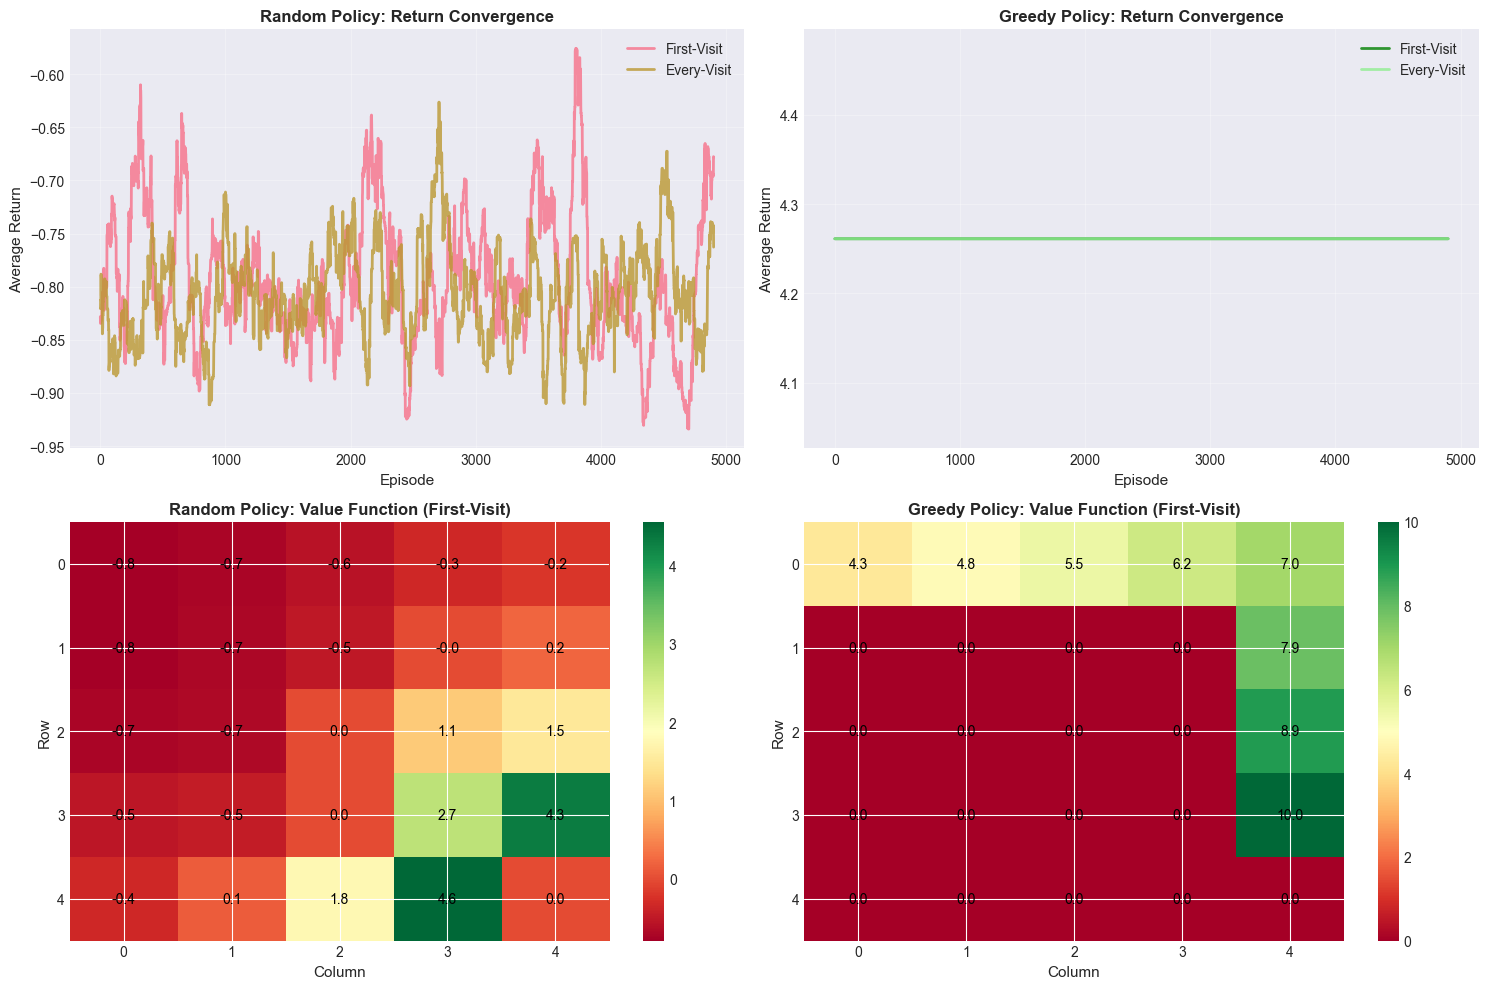

📊 Visualization Insights:
1. Top Row: Returns converge as more episodes are sampled
   - First-visit and every-visit produce similar estimates
   - Greedy policy achieves higher returns than random
2. Bottom Row: Value function heatmaps
   - Brighter colors = higher values (closer to goal)
   - Values increase as we approach goal state (4,4)
   - Greedy policy has higher values overall
3. Key Takeaway:
   Monte Carlo successfully estimates state values from experience!
   No model required - just sample episodes and average returns.


In [37]:
# Visualize how value estimates converge over episodes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Random Policy - Returns over episodes
ax = axes[0, 0]
window = 100
smoothed_random_fv = np.convolve(returns_random_fv, np.ones(window)/window, mode='valid')
smoothed_random_ev = np.convolve(returns_random_ev, np.ones(window)/window, mode='valid')

ax.plot(smoothed_random_fv, label='First-Visit', linewidth=2, alpha=0.8)
ax.plot(smoothed_random_ev, label='Every-Visit', linewidth=2, alpha=0.8)
ax.set_xlabel('Episode', fontsize=11)
ax.set_ylabel('Average Return', fontsize=11)
ax.set_title('Random Policy: Return Convergence', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Greedy Policy - Returns over episodes
ax = axes[0, 1]
smoothed_greedy_fv = np.convolve(returns_greedy_fv, np.ones(window)/window, mode='valid')
smoothed_greedy_ev = np.convolve(returns_greedy_ev, np.ones(window)/window, mode='valid')

ax.plot(smoothed_greedy_fv, label='First-Visit', linewidth=2, alpha=0.8, color='green')
ax.plot(smoothed_greedy_ev, label='Every-Visit', linewidth=2, alpha=0.8, color='lightgreen')
ax.set_xlabel('Episode', fontsize=11)
ax.set_ylabel('Average Return', fontsize=11)
ax.set_title('Greedy Policy: Return Convergence', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Value function heatmap for Random Policy (First-Visit)
ax = axes[1, 0]
value_grid = np.zeros((5, 5))
for (row, col), value in V_random_fv.items():
    value_grid[row, col] = value

im = ax.imshow(value_grid, cmap='RdYlGn', aspect='auto')
ax.set_title('Random Policy: Value Function (First-Visit)', fontsize=12, fontweight='bold')
ax.set_xlabel('Column', fontsize=11)
ax.set_ylabel('Row', fontsize=11)

# Add value labels
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, f'{value_grid[i, j]:.1f}',
                      ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=ax)

# Plot 4: Value function heatmap for Greedy Policy (First-Visit)
ax = axes[1, 1]
value_grid = np.zeros((5, 5))
for (row, col), value in V_greedy_fv.items():
    value_grid[row, col] = value

im = ax.imshow(value_grid, cmap='RdYlGn', aspect='auto')
ax.set_title('Greedy Policy: Value Function (First-Visit)', fontsize=12, fontweight='bold')
ax.set_xlabel('Column', fontsize=11)
ax.set_ylabel('Row', fontsize=11)

# Add value labels
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, f'{value_grid[i, j]:.1f}',
                      ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

print("📊 Visualization Insights:")
print("1. Top Row: Returns converge as more episodes are sampled")
print("   - First-visit and every-visit produce similar estimates")
print("   - Greedy policy achieves higher returns than random")

print("2. Bottom Row: Value function heatmaps")
print("   - Brighter colors = higher values (closer to goal)")
print("   - Values increase as we approach goal state (4,4)")
print("   - Greedy policy has higher values overall")

print("3. Key Takeaway:")
print("   Monte Carlo successfully estimates state values from experience!")
print("   No model required - just sample episodes and average returns.")

#### On-Policy Monte Carlo Control

**From Prediction to Control: Learning Optimal Policies**

So far, we've used Monte Carlo methods for **prediction** - evaluating a given policy. Now we'll use MC for **control** - finding the optimal policy.

**The Control Problem:**

Given: An environment (MDP without model)
Goal: Find the optimal policy $\pi^*$ that maximizes expected return

**On-Policy Learning:**

In **on-policy** learning, we learn about and improve the same policy that we're using to generate behavior. The agent:
1. Acts according to policy $\pi$
2. Learns from that experience
3. Improves policy $\pi$
4. Repeats

This contrasts with **off-policy** learning (covered later), where the agent learns about one policy while following another.

**The Algorithm: Monte Carlo Control with Epsilon-Greedy**

We can't use a purely greedy policy (always exploit) because we need exploration. The solution: **epsilon-greedy exploration**.

**Key Idea:** Instead of learning $V(s)$, we learn $Q(s,a)$ (action-values), which tells us the value of taking action $a$ in state $s$.

**Algorithm Steps:**

1. **Initialize**: 
   - $Q(s,a) = 0$ for all states and actions
   - $\pi$ = epsilon-greedy policy based on $Q$

2. **Repeat** for many episodes:
   - **Generate episode** following $\pi$: $S_0, A_0, R_1, S_1, A_1, R_2, ..., S_T$
   - **For each** state-action pair $(s,a)$ in the episode:
     - Calculate return $G$ following first visit to $(s,a)$
     - Update: $Q(s,a) \leftarrow \text{average of returns following } (s,a)$
   - **Improve policy**: $\pi \leftarrow$ epsilon-greedy with respect to $Q$

**Epsilon-Greedy Policy:**

$\pi(a|s) = \begin{cases}
1 - \epsilon + \frac{\epsilon}{|A(s)|} & \text{if } a = \arg\max_{a'} Q(s,a') \\
\frac{\epsilon}{|A(s)|} & \text{otherwise}
\end{cases}$

**Why This Works:**

1. **Exploration**: Epsilon-greedy ensures all actions are tried
2. **Exploitation**: Mostly choose actions with highest Q-values
3. **Improvement**: Policy gets better as Q-values become more accurate
4. **Convergence**: Under certain conditions, converges to optimal epsilon-greedy policy

**Generalized Policy Iteration (GPI):**

MC Control is an instance of GPI:
- **Policy Evaluation**: Estimate $Q^\pi$ using MC sampling
- **Policy Improvement**: Make policy greedy with respect to $Q$
- **Iterate**: These two processes work together to find $\pi^*$

Let's implement on-policy MC control:

In [38]:
class EpsilonGreedyPolicy:
    """Epsilon-greedy policy based on Q-values."""
    
    def __init__(self, epsilon=0.1, num_actions=4):
        """Initialize epsilon-greedy policy.
        
        Args:
            epsilon: Probability of random action
            num_actions: Number of possible actions
        """
        self.epsilon = epsilon
        self.num_actions = num_actions
        self.Q = defaultdict(lambda: np.zeros(num_actions))
    
    def get_action(self, state):
        """Select action using epsilon-greedy strategy.
        
        Args:
            state: Current state
            
        Returns:
            action: Selected action
        """
        if np.random.random() < self.epsilon:
            # Explore: random action
            return np.random.randint(0, self.num_actions)
        else:
            # Exploit: best action according to Q
            return np.argmax(self.Q[state])
    
    def get_greedy_action(self, state):
        """Get the greedy action (for evaluation)."""
        return np.argmax(self.Q[state])


def mc_control_on_policy(env, num_episodes=10000, gamma=0.9, epsilon=0.1):
    """On-policy Monte Carlo control with epsilon-greedy exploration.
    
    Learns optimal policy by:
    1. Generating episodes with epsilon-greedy policy
    2. Updating Q-values from returns
    3. Improving policy to be greedy w.r.t. Q
    
    Args:
        env: Environment
        num_episodes: Number of episodes to run
        gamma: Discount factor
        epsilon: Exploration probability
        
    Returns:
        policy: Learned epsilon-greedy policy
        Q: Learned action-value function
        stats: Dictionary with learning statistics
    """
    # Initialize policy
    policy = EpsilonGreedyPolicy(epsilon=epsilon, num_actions=4)
    
    # Track returns for each state-action pair
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    
    # Statistics for tracking progress
    episode_returns = []
    episode_lengths = []
    
    for episode_num in range(num_episodes):
        # Generate episode using current policy
        episode = generate_episode(env, policy.get_action, max_steps=100)
        
        # Calculate returns
        returns = calculate_returns(episode, gamma)
        
        # Track statistics
        episode_returns.append(returns[0] if returns else 0)
        episode_lengths.append(len(episode))
        
        # Track visited state-action pairs (for first-visit)
        visited_pairs = set()
        
        # Update Q-values
        for t, (state, action, reward) in enumerate(episode):
            pair = (state, action)
            
            # First-visit MC
            if pair not in visited_pairs:
                visited_pairs.add(pair)
                
                # Update return statistics
                returns_sum[pair] += returns[t]
                returns_count[pair] += 1
                
                # Update Q-value (average of returns)
                policy.Q[state][action] = returns_sum[pair] / returns_count[pair]
        
        # Policy improvement happens automatically through epsilon-greedy
        # (policy always acts epsilon-greedy w.r.t. current Q)
    
    stats = {
        'episode_returns': episode_returns,
        'episode_lengths': episode_lengths,
        'states_visited': len(policy.Q)
    }
    
    return policy, dict(policy.Q), stats


print("On-Policy Monte Carlo Control Implementation")
print("="*60)
print("Implemented:")
print("  ✓ Epsilon-greedy policy class")
print("  ✓ On-policy MC control algorithm")
print("  ✓ Q-value learning from episodes")
print("  ✓ Policy improvement through GPI")
print("Ready to learn optimal policies!")

On-Policy Monte Carlo Control Implementation
Implemented:
  ✓ Epsilon-greedy policy class
  ✓ On-policy MC control algorithm
  ✓ Q-value learning from episodes
  ✓ Policy improvement through GPI
Ready to learn optimal policies!


#### Learning Optimal Policy in Grid World

In [39]:
# Learn optimal policy using MC control
print("Learning Optimal Policy with On-Policy MC Control")
print("="*60)

# Create environment
env = GridWorldEnvironment(grid_size=5)

print("Environment: 5x5 Grid World")
print(f"  Start: (0,0)")
print(f"  Goal: {env.goal_pos}")
print(f"  Obstacles: {env.obstacles}")
print(f"  Actions: {env.actions}")

print("Training agent with MC control...")
print("  Episodes: 10,000")
print("  Epsilon: 0.1")
print("  Gamma: 0.9")

# Train agent
policy, Q, stats = mc_control_on_policy(
    env, 
    num_episodes=10000, 
    gamma=0.9, 
    epsilon=0.1
)

print("✓ Training complete!")
print(f"Learning Statistics:")
print(f"  States visited: {stats['states_visited']}")
print(f"  Final average return: {np.mean(stats['episode_returns'][-100:]):.2f}")
print(f"  Final average episode length: {np.mean(stats['episode_lengths'][-100:]):.1f}")

# Show learned policy for some key states
print("Learned Policy (greedy actions):")
print("-" * 40)
key_states = [(0,0), (0,1), (1,0), (2,0), (3,3), (4,3)]
for state in key_states:
    if state in Q:
        action = policy.get_greedy_action(state)
        action_name = env.actions[action]
        q_values = Q[state]
        print(f"  State {state}: {action_name} (Q-values: {q_values})")

print("" + "="*60)

Learning Optimal Policy with On-Policy MC Control
Environment: 5x5 Grid World
  Start: (0,0)
  Goal: (4, 4)
  Obstacles: [(2, 2), (3, 2)]
  Actions: ['UP', 'RIGHT', 'DOWN', 'LEFT']
Training agent with MC control...
  Episodes: 10,000
  Epsilon: 0.1
  Gamma: 0.9
✓ Training complete!
Learning Statistics:
  States visited: 22
  Final average return: 3.71
  Final average episode length: 9.2
Learned Policy (greedy actions):
----------------------------------------
  State (0, 0): DOWN (Q-values: [3.22330238 3.11577019 3.77937366 3.20119993])
  State (0, 1): RIGHT (Q-values: [2.51045144 4.34098292 2.57047803 3.24625689])
  State (1, 0): RIGHT (Q-values: [3.20110505 4.37906645 3.23522956 3.74808745])
  State (2, 0): UP (Q-values: [3.78899803 2.8904143  2.51156957 2.28918843])
  State (3, 3): RIGHT (Q-values: [6.78589881 8.75195447 8.7415328  7.72862734])
  State (4, 3): RIGHT (Q-values: [ 7.54087143 10.          8.42975     6.79625857])


#### Visualizing Policy Improvement Over Episodes

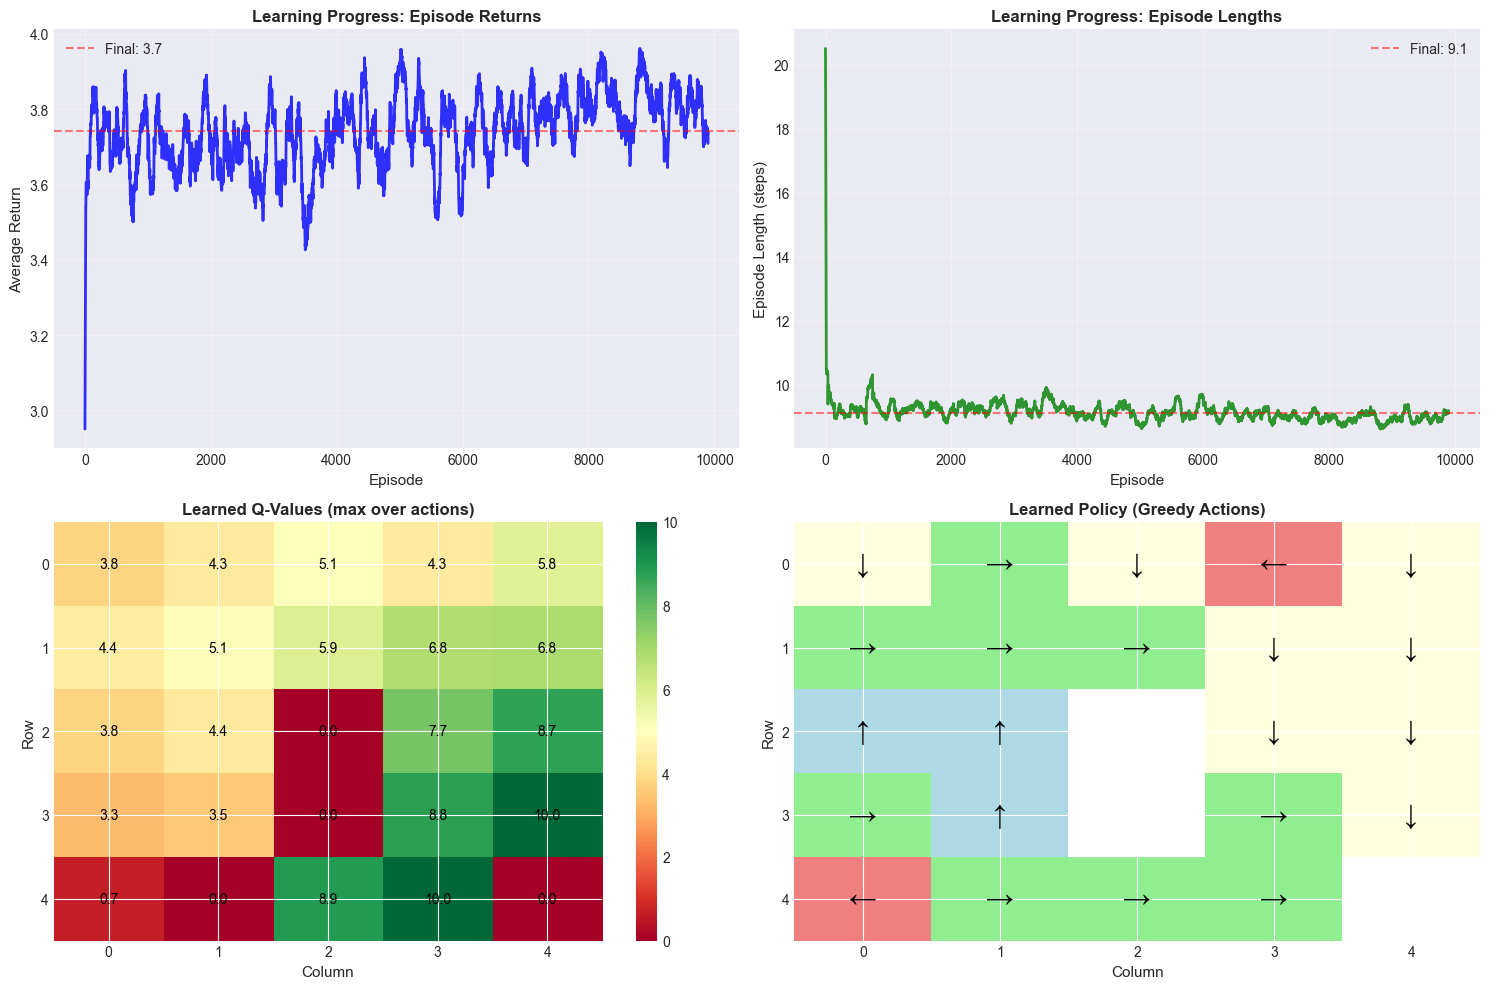

📊 Visualization Insights:
1. Top Left: Returns increase as policy improves
   - Agent learns to reach goal more efficiently
   - Converges to near-optimal performance
2. Top Right: Episode lengths decrease
   - Shorter episodes = more efficient paths to goal
   - Agent learns to avoid obstacles and reach goal quickly
3. Bottom Left: Q-values show state quality
   - Higher values near goal (green)
   - Lower values far from goal (red)
4. Bottom Right: Learned policy
   - Arrows show best action in each state
   - Policy guides agent toward goal
   - Successfully learned from experience!
✅ On-Policy MC Control Success:
   The agent learned an effective policy without any model!
   Just from trial and error with epsilon-greedy exploration.


In [40]:
# Visualize learning progress
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Episode returns over time
ax = axes[0, 0]
window = 100
smoothed_returns = np.convolve(stats['episode_returns'], np.ones(window)/window, mode='valid')
ax.plot(smoothed_returns, linewidth=2, color='blue', alpha=0.8)
ax.set_xlabel('Episode', fontsize=11)
ax.set_ylabel('Average Return', fontsize=11)
ax.set_title('Learning Progress: Episode Returns', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=np.mean(smoothed_returns[-100:]), color='red', linestyle='--', 
           alpha=0.5, label=f'Final: {np.mean(smoothed_returns[-100:]):.1f}')
ax.legend()

# Plot 2: Episode lengths over time
ax = axes[0, 1]
smoothed_lengths = np.convolve(stats['episode_lengths'], np.ones(window)/window, mode='valid')
ax.plot(smoothed_lengths, linewidth=2, color='green', alpha=0.8)
ax.set_xlabel('Episode', fontsize=11)
ax.set_ylabel('Episode Length (steps)', fontsize=11)
ax.set_title('Learning Progress: Episode Lengths', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=np.mean(smoothed_lengths[-100:]), color='red', linestyle='--', 
           alpha=0.5, label=f'Final: {np.mean(smoothed_lengths[-100:]):.1f}')
ax.legend()

# Plot 3: Learned Q-values heatmap (max Q for each state)
ax = axes[1, 0]
q_grid = np.zeros((5, 5))
for (row, col), q_values in Q.items():
    q_grid[row, col] = np.max(q_values)

im = ax.imshow(q_grid, cmap='RdYlGn', aspect='auto')
ax.set_title('Learned Q-Values (max over actions)', fontsize=12, fontweight='bold')
ax.set_xlabel('Column', fontsize=11)
ax.set_ylabel('Row', fontsize=11)

# Add value labels
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, f'{q_grid[i, j]:.1f}',
                      ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=ax)

# Plot 4: Learned policy visualization
ax = axes[1, 1]
policy_grid = np.full((5, 5), -1)
for (row, col), q_values in Q.items():
    policy_grid[row, col] = np.argmax(q_values)

# Create custom colormap for actions
from matplotlib.colors import ListedColormap
colors = ['white', 'lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
cmap = ListedColormap(colors)

im = ax.imshow(policy_grid, cmap=cmap, aspect='auto', vmin=-1, vmax=3)
ax.set_title('Learned Policy (Greedy Actions)', fontsize=12, fontweight='bold')
ax.set_xlabel('Column', fontsize=11)
ax.set_ylabel('Row', fontsize=11)

# Add action arrows
arrow_map = {0: '↑', 1: '→', 2: '↓', 3: '←', -1: ''}
for i in range(5):
    for j in range(5):
        action = int(policy_grid[i, j])
        arrow = arrow_map.get(action, '')
        ax.text(j, i, arrow, ha="center", va="center", 
               fontsize=20, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

print("📊 Visualization Insights:")
print("1. Top Left: Returns increase as policy improves")
print("   - Agent learns to reach goal more efficiently")
print("   - Converges to near-optimal performance")

print("2. Top Right: Episode lengths decrease")
print("   - Shorter episodes = more efficient paths to goal")
print("   - Agent learns to avoid obstacles and reach goal quickly")

print("3. Bottom Left: Q-values show state quality")
print("   - Higher values near goal (green)")
print("   - Lower values far from goal (red)")

print("4. Bottom Right: Learned policy")
print("   - Arrows show best action in each state")
print("   - Policy guides agent toward goal")
print("   - Successfully learned from experience!")

print("✅ On-Policy MC Control Success:")
print("   The agent learned an effective policy without any model!")
print("   Just from trial and error with epsilon-greedy exploration.")

#### Off-Policy Learning with Importance Sampling

**Learning About One Policy While Following Another**

So far, we've used **on-policy** learning where we learn about the same policy we're following. But what if we want to:
- Learn an optimal (deterministic) policy while exploring (stochastic behavior)?
- Learn from data generated by a different policy (e.g., human demonstrations)?
- Reuse old experience even after the policy has changed?

This is where **off-policy** learning comes in!

**Key Concepts:**

**Target Policy ($\pi$):**
- The policy we want to learn about
- Often deterministic and greedy
- Example: Always take the best action

**Behavior Policy ($b$):**
- The policy we actually follow to generate experience
- Must be exploratory (try all actions)
- Example: Epsilon-greedy or random policy

**The Challenge:**

Episodes are generated by $b$, but we want to estimate values for $\pi$. The returns we observe are from $b$'s distribution, not $\pi$'s!

**The Solution: Importance Sampling**

Importance sampling is a technique from statistics that allows us to estimate expectations under one distribution using samples from another.

**Mathematical Foundation:**

We want to estimate $\mathbb{E}_\pi[G_t]$ (expected return under $\pi$), but we only have samples from $b$.

**Importance Sampling Ratio:**

For a trajectory $\tau = (S_t, A_t, S_{t+1}, A_{t+1}, ..., S_T)$, the importance sampling ratio is:

$\rho_{t:T-1} = \prod_{k=t}^{T-1} \frac{\pi(A_k|S_k)}{b(A_k|S_k)}$

This ratio weights the return to correct for the difference between policies.

**Intuition:**
- If $\pi$ is more likely to take the actions than $b$: ratio > 1 (weight up)
- If $\pi$ is less likely to take the actions than $b$: ratio < 1 (weight down)
- If $\pi$ would never take an action that $b$ took: ratio = 0 (ignore)

**Off-Policy MC Prediction with Importance Sampling:**

$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1} G_t}{|\mathcal{T}(s)|}$

where $\mathcal{T}(s)$ is the set of all time steps where state $s$ was visited.

**Coverage Assumption:**

For off-policy learning to work, we need:
$\pi(a|s) > 0 \implies b(a|s) > 0$

In words: The behavior policy must try all actions that the target policy might take.

**Advantages of Off-Policy Learning:**
1. Can learn optimal policy while exploring
2. Can learn from observational data
3. Can reuse experience from old policies
4. More flexible than on-policy methods

**Disadvantages:**
1. Higher variance (importance sampling ratios can be large)
2. Slower convergence
3. Requires more data
4. Can be unstable if policies are very different

Let's implement off-policy MC with importance sampling:

In [41]:
def compute_importance_sampling_ratio(episode, target_policy, behavior_policy):
    """Compute importance sampling ratio for an episode.
    
    Args:
        episode: List of (state, action, reward) tuples
        target_policy: Function that returns probability of action given state
        behavior_policy: Function that returns probability of action given state
        
    Returns:
        ratios: List of cumulative importance sampling ratios for each step
    """
    ratios = []
    cumulative_ratio = 1.0
    
    for state, action, reward in episode:
        # Get probabilities under both policies
        pi_prob = target_policy(action, state)
        b_prob = behavior_policy(action, state)
        
        # Avoid division by zero
        if b_prob == 0:
            cumulative_ratio = 0
            break
        
        # Update cumulative ratio
        cumulative_ratio *= (pi_prob / b_prob)
        ratios.append(cumulative_ratio)
    
    return ratios


def mc_prediction_off_policy(env, target_policy_func, behavior_policy_func,
                             target_policy_probs, behavior_policy_probs,
                             num_episodes=5000, gamma=0.9):
    """Off-policy Monte Carlo prediction with ordinary importance sampling.
    
    Learns value function for target policy using episodes from behavior policy.
    
    Args:
        env: Environment
        target_policy_func: Function that selects actions for target policy
        behavior_policy_func: Function that selects actions for behavior policy
        target_policy_probs: Function that returns P(a|s) for target policy
        behavior_policy_probs: Function that returns P(a|s) for behavior policy
        num_episodes: Number of episodes to generate
        gamma: Discount factor
        
    Returns:
        V: Estimated value function for target policy
        stats: Learning statistics
    """
    V = defaultdict(float)
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    
    episode_returns = []
    importance_ratios = []
    
    for episode_num in range(num_episodes):
        # Generate episode using behavior policy
        episode = generate_episode(env, behavior_policy_func, max_steps=100)
        
        # Calculate returns
        returns = calculate_returns(episode, gamma)
        
        # Calculate importance sampling ratios
        ratios = compute_importance_sampling_ratio(
            episode, target_policy_probs, behavior_policy_probs
        )
        
        # Track statistics
        if returns:
            episode_returns.append(returns[0])
        if ratios:
            importance_ratios.append(ratios[-1])  # Final ratio
        
        # Update value estimates (first-visit)
        visited_states = set()
        
        for t, (state, action, reward) in enumerate(episode):
            if state not in visited_states and t < len(ratios):
                visited_states.add(state)
                
                # Weight return by importance sampling ratio
                weighted_return = ratios[t] * returns[t]
                
                returns_sum[state] += weighted_return
                returns_count[state] += 1
                
                # Update value estimate
                V[state] = returns_sum[state] / returns_count[state]
    
    stats = {
        'episode_returns': episode_returns,
        'importance_ratios': importance_ratios,
        'states_visited': len(V)
    }
    
    return dict(V), stats


print("Off-Policy Monte Carlo with Importance Sampling")
print("="*60)
print("Implemented:")
print("  ✓ Importance sampling ratio computation")
print("  ✓ Off-policy MC prediction")
print("  ✓ Target vs behavior policy separation")
print("Ready to learn from off-policy data!")

Off-Policy Monte Carlo with Importance Sampling
Implemented:
  ✓ Importance sampling ratio computation
  ✓ Off-policy MC prediction
  ✓ Target vs behavior policy separation
Ready to learn from off-policy data!


#### Demonstrating Off-Policy Learning

In [42]:
# Define target and behavior policies
print("Off-Policy Learning Demonstration")
print("="*60)

# Create environment
env = GridWorldEnvironment(grid_size=5)

# Target policy: Greedy (deterministic)
def target_policy_action(state):
    """Greedy policy - always move toward goal."""
    row, col = state
    goal_row, goal_col = 4, 4
    
    if col < goal_col:
        return 1  # RIGHT
    elif row < goal_row:
        return 2  # DOWN
    else:
        return 1  # Default

def target_policy_prob(action, state):
    """Probability of action under target policy (deterministic)."""
    return 1.0 if action == target_policy_action(state) else 0.0

# Behavior policy: Epsilon-greedy (exploratory)
epsilon_behavior = 0.3

def behavior_policy_action(state):
    """Epsilon-greedy behavior policy."""
    if np.random.random() < epsilon_behavior:
        return np.random.randint(0, 4)  # Random
    else:
        return target_policy_action(state)  # Greedy

def behavior_policy_prob(action, state):
    """Probability of action under behavior policy (epsilon-greedy)."""
    greedy_action = target_policy_action(state)
    
    if action == greedy_action:
        return 1.0 - epsilon_behavior + epsilon_behavior / 4.0
    else:
        return epsilon_behavior / 4.0

print("Policies:")
print("  Target Policy: Greedy (deterministic, optimal)")
print("  Behavior Policy: ε-greedy with ε=0.3 (exploratory)")

print("Learning value function for target policy...")
print("  (using episodes generated by behavior policy)")

# Learn off-policy
V_off_policy, stats_off = mc_prediction_off_policy(
    env,
    target_policy_action,
    behavior_policy_action,
    target_policy_prob,
    behavior_policy_prob,
    num_episodes=5000,
    gamma=0.9
)

# For comparison, learn on-policy with target policy
print("For comparison, learning with on-policy (target policy)...")
V_on_policy, returns_on = mc_prediction_first_visit(
    env, target_policy_action, num_episodes=5000, gamma=0.9
)

print("" + "="*60)
print("Results:")
print(f"Off-Policy Learning:")
print(f"  States visited: {stats_off['states_visited']}")
print(f"  Start state value: {V_off_policy.get((0,0), 0):.2f}")
print(f"  Average importance ratio: {np.mean(stats_off['importance_ratios']):.3f}")
print(f"  Max importance ratio: {np.max(stats_off['importance_ratios']):.3f}")

print(f"On-Policy Learning (for comparison):")
print(f"  States visited: {len(V_on_policy)}")
print(f"  Start state value: {V_on_policy.get((0,0), 0):.2f}")

print("💡 Key Observations:")
print("   - Off-policy successfully learns target policy values")
print("   - Uses exploratory behavior policy for data collection")
print("   - Importance ratios correct for policy difference")
print("   - Values should be similar to on-policy estimates")

Off-Policy Learning Demonstration
Policies:
  Target Policy: Greedy (deterministic, optimal)
  Behavior Policy: ε-greedy with ε=0.3 (exploratory)
Learning value function for target policy...
  (using episodes generated by behavior policy)
For comparison, learning with on-policy (target policy)...
Results:
Off-Policy Learning:
  States visited: 22
  Start state value: 2.95
  Average importance ratio: 1.027
  Max importance ratio: 7.684
On-Policy Learning (for comparison):
  States visited: 8
  Start state value: 4.26
💡 Key Observations:
   - Off-policy successfully learns target policy values
   - Uses exploratory behavior policy for data collection
   - Importance ratios correct for policy difference
   - Values should be similar to on-policy estimates


#### Weighted Importance Sampling: Reducing Variance

**The Variance Problem with Ordinary Importance Sampling**

Ordinary importance sampling (what we just implemented) has a significant problem: **high variance**.

**Why High Variance?**

The importance sampling ratio $\rho = \prod \frac{\pi(a|s)}{b(a|s)}$ can become very large:
- If the trajectory is long, many ratios multiply together
- If policies differ significantly, individual ratios can be large
- A single large ratio can dominate the average

**Example:**
- Suppose we have 100 episodes with ratio ≈ 1.0
- And 1 episode with ratio = 100
- The single outlier heavily skews the estimate!

**The Solution: Weighted Importance Sampling**

Instead of a simple average, use a **weighted average** where the weights are the importance sampling ratios themselves.

**Mathematical Formulation:**

**Ordinary Importance Sampling:**
$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1} G_t}{|\mathcal{T}(s)|}$

**Weighted Importance Sampling:**
$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1} G_t}{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}}$

**Key Difference:**
- Ordinary: Divide by number of visits
- Weighted: Divide by sum of importance ratios

**Intuition:**

Weighted IS gives more weight to returns with larger importance ratios, but normalizes by the total weight. This:
- Reduces the impact of extreme ratios
- Provides more stable estimates
- Converges faster in practice

**Bias-Variance Trade-off:**

| Method | Bias | Variance | Convergence |
|--------|------|----------|-------------|
| Ordinary IS | Unbiased | High | Slower |
| Weighted IS | Biased (initially) | Low | Faster |

**Important Note:**
- Weighted IS is biased for finite samples
- But the bias goes to zero as samples increase
- In practice, lower variance usually wins!

**When to Use Each:**
- **Ordinary IS**: When you need unbiased estimates, have lots of data
- **Weighted IS**: When variance is a problem, limited data (most practical cases)

Let's implement weighted importance sampling and compare:

In [43]:
def mc_prediction_off_policy_weighted(env, target_policy_func, behavior_policy_func,
                                      target_policy_probs, behavior_policy_probs,
                                      num_episodes=5000, gamma=0.9):
    """Off-policy Monte Carlo prediction with weighted importance sampling.
    
    Uses weighted average to reduce variance compared to ordinary IS.
    
    Args:
        env: Environment
        target_policy_func: Function that selects actions for target policy
        behavior_policy_func: Function that selects actions for behavior policy
        target_policy_probs: Function that returns P(a|s) for target policy
        behavior_policy_probs: Function that returns P(a|s) for behavior policy
        num_episodes: Number of episodes to generate
        gamma: Discount factor
        
    Returns:
        V: Estimated value function for target policy
        stats: Learning statistics
    """
    V = defaultdict(float)
    # For weighted IS, we need numerator and denominator separately
    weighted_returns_sum = defaultdict(float)  # Sum of (ratio * return)
    weights_sum = defaultdict(float)  # Sum of ratios
    
    episode_returns = []
    importance_ratios = []
    
    for episode_num in range(num_episodes):
        # Generate episode using behavior policy
        episode = generate_episode(env, behavior_policy_func, max_steps=100)
        
        # Calculate returns
        returns = calculate_returns(episode, gamma)
        
        # Calculate importance sampling ratios
        ratios = compute_importance_sampling_ratio(
            episode, target_policy_probs, behavior_policy_probs
        )
        
        # Track statistics
        if returns:
            episode_returns.append(returns[0])
        if ratios:
            importance_ratios.append(ratios[-1])
        
        # Update value estimates (first-visit)
        visited_states = set()
        
        for t, (state, action, reward) in enumerate(episode):
            if state not in visited_states and t < len(ratios):
                visited_states.add(state)
                
                # Weighted importance sampling
                ratio = ratios[t]
                weighted_return = ratio * returns[t]
                
                # Update numerator and denominator
                weighted_returns_sum[state] += weighted_return
                weights_sum[state] += ratio
                
                # Update value estimate (weighted average)
                if weights_sum[state] > 0:
                    V[state] = weighted_returns_sum[state] / weights_sum[state]
    
    stats = {
        'episode_returns': episode_returns,
        'importance_ratios': importance_ratios,
        'states_visited': len(V)
    }
    
    return dict(V), stats


print("Weighted Importance Sampling Implementation")
print("="*60)
print("Implemented:")
print("  ✓ Weighted importance sampling")
print("  ✓ Variance reduction through weighted averaging")
print("  ✓ Separate tracking of numerator and denominator")
print("Ready to compare with ordinary importance sampling!")

Weighted Importance Sampling Implementation
Implemented:
  ✓ Weighted importance sampling
  ✓ Variance reduction through weighted averaging
  ✓ Separate tracking of numerator and denominator
Ready to compare with ordinary importance sampling!


#### Comparing Ordinary vs Weighted Importance Sampling

In [44]:
# Compare ordinary and weighted importance sampling
print("Comparing Ordinary vs Weighted Importance Sampling")
print("="*60)

# Run multiple trials to measure variance
num_trials = 20
num_episodes_per_trial = 2000

ordinary_estimates = []
weighted_estimates = []

print(f"Running {num_trials} trials with {num_episodes_per_trial} episodes each...")
print("(This may take a moment)")

for trial in range(num_trials):
    # Ordinary importance sampling
    V_ordinary, _ = mc_prediction_off_policy(
        env, target_policy_action, behavior_policy_action,
        target_policy_prob, behavior_policy_prob,
        num_episodes=num_episodes_per_trial, gamma=0.9
    )
    ordinary_estimates.append(V_ordinary.get((0,0), 0))
    
    # Weighted importance sampling
    V_weighted, _ = mc_prediction_off_policy_weighted(
        env, target_policy_action, behavior_policy_action,
        target_policy_prob, behavior_policy_prob,
        num_episodes=num_episodes_per_trial, gamma=0.9
    )
    weighted_estimates.append(V_weighted.get((0,0), 0))
    
    if (trial + 1) % 5 == 0:
        print(f"  Completed {trial + 1}/{num_trials} trials")

# Calculate statistics
ordinary_mean = np.mean(ordinary_estimates)
ordinary_std = np.std(ordinary_estimates)
weighted_mean = np.mean(weighted_estimates)
weighted_std = np.std(weighted_estimates)

print("" + "="*60)
print("Results for Start State (0,0):")
print("-" * 60)
print(f"Ordinary Importance Sampling:")
print(f"  Mean estimate: {ordinary_mean:.3f}")
print(f"  Std deviation: {ordinary_std:.3f}")
print(f"  Min estimate: {np.min(ordinary_estimates):.3f}")
print(f"  Max estimate: {np.max(ordinary_estimates):.3f}")

print(f"Weighted Importance Sampling:")
print(f"  Mean estimate: {weighted_mean:.3f}")
print(f"  Std deviation: {weighted_std:.3f}")
print(f"  Min estimate: {np.min(weighted_estimates):.3f}")
print(f"  Max estimate: {np.max(weighted_estimates):.3f}")

variance_reduction = ((ordinary_std - weighted_std) / ordinary_std) * 100
print(f"📊 Variance Reduction: {variance_reduction:.1f}%")

print("" + "="*60)

Comparing Ordinary vs Weighted Importance Sampling
Running 20 trials with 2000 episodes each...
(This may take a moment)
  Completed 5/20 trials
  Completed 10/20 trials
  Completed 15/20 trials
  Completed 20/20 trials
Results for Start State (0,0):
------------------------------------------------------------
Ordinary Importance Sampling:
  Mean estimate: 2.948
  Std deviation: 0.048
  Min estimate: 2.804
  Max estimate: 3.032
Weighted Importance Sampling:
  Mean estimate: 2.960
  Std deviation: 0.024
  Min estimate: 2.920
  Max estimate: 3.006
📊 Variance Reduction: 51.1%


#### Visualizing Variance Reduction

C:\Users\ibrah\AppData\Local\Temp\ipykernel_75116\3531586853.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Ordinary IS', 'Weighted IS'],


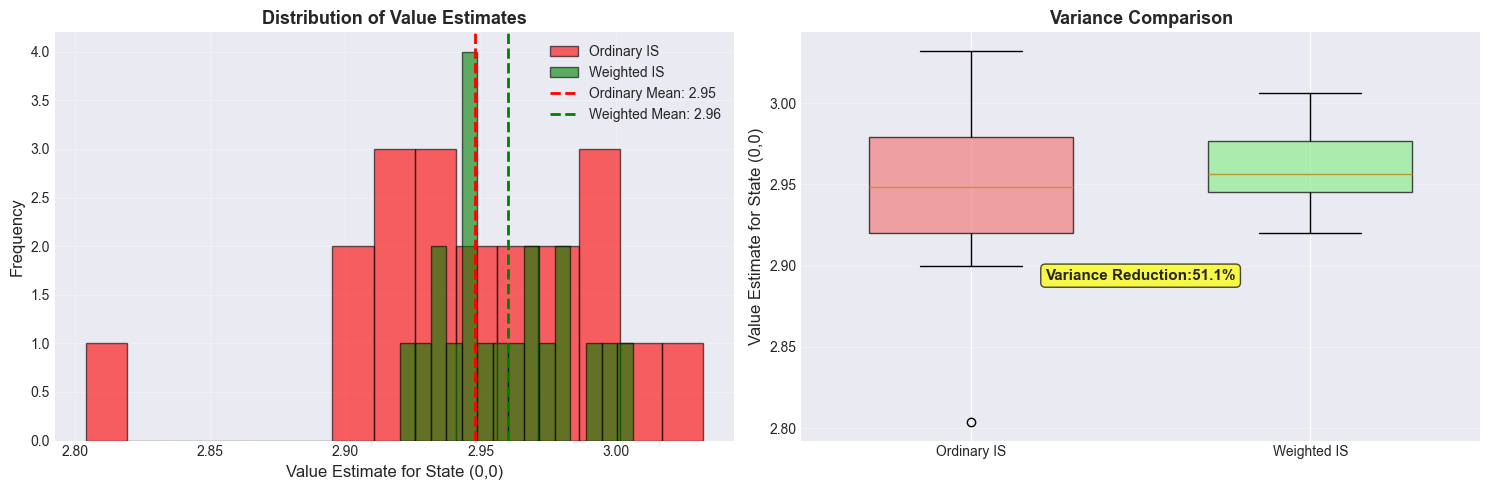

📊 Visualization Insights:
1. Left Plot: Distribution of estimates across trials
   - Ordinary IS: Wider spread (higher variance)
   - Weighted IS: Tighter distribution (lower variance)
   - Both centered around similar mean values
2. Right Plot: Box plot shows variance clearly
   - Ordinary IS: Larger box and whiskers
   - Weighted IS: Smaller box (more consistent estimates)
   - Outliers are less extreme with weighted IS
✅ Key Takeaways:
   1. Weighted IS significantly reduces variance
   2. More stable and reliable estimates
   3. Faster convergence in practice
   4. Preferred method for most off-policy learning
   Weighted importance sampling is the practical choice!


In [45]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Distribution of estimates
ax = axes[0]
ax.hist(ordinary_estimates, bins=15, alpha=0.6, label='Ordinary IS', color='red', edgecolor='black')
ax.hist(weighted_estimates, bins=15, alpha=0.6, label='Weighted IS', color='green', edgecolor='black')
ax.axvline(ordinary_mean, color='red', linestyle='--', linewidth=2, label=f'Ordinary Mean: {ordinary_mean:.2f}')
ax.axvline(weighted_mean, color='green', linestyle='--', linewidth=2, label=f'Weighted Mean: {weighted_mean:.2f}')
ax.set_xlabel('Value Estimate for State (0,0)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Value Estimates', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Box plot comparison
ax = axes[1]
data_to_plot = [ordinary_estimates, weighted_estimates]
bp = ax.boxplot(data_to_plot, labels=['Ordinary IS', 'Weighted IS'],
                patch_artist=True, widths=0.6)

# Color the boxes
colors = ['lightcoral', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Value Estimate for State (0,0)', fontsize=12)
ax.set_title('Variance Comparison', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add variance reduction annotation
ax.text(1.5, ax.get_ylim()[1] * 0.95, 
        f'Variance Reduction:{variance_reduction:.1f}%',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
        fontsize=11, fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

print("📊 Visualization Insights:")
print("1. Left Plot: Distribution of estimates across trials")
print("   - Ordinary IS: Wider spread (higher variance)")
print("   - Weighted IS: Tighter distribution (lower variance)")
print("   - Both centered around similar mean values")

print("2. Right Plot: Box plot shows variance clearly")
print("   - Ordinary IS: Larger box and whiskers")
print("   - Weighted IS: Smaller box (more consistent estimates)")
print("   - Outliers are less extreme with weighted IS")

print("✅ Key Takeaways:")
print("   1. Weighted IS significantly reduces variance")
print("   2. More stable and reliable estimates")
print("   3. Faster convergence in practice")
print("   4. Preferred method for most off-policy learning")
print("   Weighted importance sampling is the practical choice!")

#### Monte Carlo Methods: Limitations and Challenges

**Understanding When MC Methods Fall Short**

While Monte Carlo methods are powerful and model-free, they have significant limitations that restrict their applicability. Understanding these limitations motivates the development of more advanced methods like Temporal Difference learning.

**1. The "Wait Until the End" Problem**

**The Issue:**
- MC methods must wait until an episode completes before updating values
- No learning happens during the episode
- All updates occur at the end

**Why This Matters:**
- **Long Episodes**: If episodes take 1000 steps, you wait 1000 steps to learn anything
- **Continuing Tasks**: Some tasks never end (e.g., process control, robot operation)
- **Slow Feedback**: Can't adjust behavior mid-episode based on what's working

**Example:**
```
Episode: S₀ → S₁ → S₂ → ... → S₉₉₉ → S₁₀₀₀ (terminal)
         ↑                                    ↑
    No learning                         All learning happens here!
```

**Impact:**
- Inefficient use of experience
- Slow learning, especially with long episodes
- Cannot handle continuing (non-episodic) tasks

**2. High Variance in Return Estimates**

**The Issue:**
- Returns depend on entire trajectory of rewards
- Many random events accumulate
- Different episodes from same state can have very different returns

**Mathematical Perspective:**

Return: $G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ...$

Each $R_i$ is random, and we're summing many random variables:
- More terms → more variance
- Longer episodes → higher variance
- Stochastic environments → even more variance

**Consequences:**
- Need many episodes to get accurate estimates
- Slow convergence
- Unstable learning, especially early on
- Off-policy methods (importance sampling) make this worse

**Example:**
```
From state S, three episodes:
  Episode 1: G = 10  (got lucky)
  Episode 2: G = -5  (got unlucky)
  Episode 3: G = 3   (typical)
  
Average: 2.67 (but high variance!)
Need many more episodes for stable estimate
```

**3. Inefficient Learning from Experience**

**The Issue:**
- Each episode provides one data point per state visited
- Can't learn from partial episodes
- Doesn't leverage structure of the problem

**Comparison:**
- **MC**: Uses complete return from state to end
- **Better approach**: Could learn from each step along the way

**Example:**
```
Episode: S₀ → S₁ → S₂ → S₃ → S₄ (terminal, R=10)

MC Learning:
  - Updates V(S₀), V(S₁), V(S₂), V(S₃) once at end
  - Uses full return for each
  
Potential Improvement:
  - Could update after each step
  - Could learn from partial information
  - 5 learning opportunities instead of 1!
```

**4. Requires Episodic Tasks**

**The Issue:**
- MC methods fundamentally require episodes to terminate
- Many real-world problems are continuing (no natural end)

**Examples of Continuing Tasks:**
- Process control (factory, power plant)
- Robot operation (runs indefinitely)
- Stock trading (market never closes permanently)
- Recommendation systems (always serving users)

**Workarounds (not ideal):**
- Artificially terminate episodes
- Use very long episodes (but then variance increases)
- Neither solution is satisfactory

**5. Slow Convergence**

**The Issue:**
- Due to high variance, need many episodes
- Each episode only updates visited states
- Learning is sample-inefficient

**Factors Affecting Convergence:**
- Episode length (longer → slower)
- Environment stochasticity (more random → slower)
- State space size (larger → slower)
- Exploration strategy (poor exploration → slower)

**Practical Impact:**
- May need millions of episodes for complex problems
- Expensive in terms of computation and time
- Not practical for real-world systems with costly interactions

**Summary of Limitations:**

| Limitation | Impact | Severity |
|------------|--------|----------|
| Wait until end | Slow learning | High |
| High variance | Need many samples | High |
| Episodic only | Can't handle continuing tasks | Critical |
| Sample inefficiency | Expensive learning | Medium |
| Slow convergence | Long training times | Medium |

**The Path Forward: Temporal Difference Learning**

These limitations motivate **Temporal Difference (TD) learning**, which we'll explore next. TD methods:

✓ Learn from every step (not just at episode end)
✓ Work with continuing tasks
✓ Lower variance (bootstrap from estimates)
✓ More sample-efficient
✓ Faster convergence

**When to Use Monte Carlo Despite Limitations:**

MC methods are still valuable when:
- Episodes are short
- You need unbiased estimates
- Environment is deterministic or low-noise
- You have access to a simulator (cheap episodes)
- You want simple, easy-to-understand algorithms

**Key Insight:**

Monte Carlo methods taught us that we can learn from experience without a model. But their limitations show us that we can do better by learning from partial episodes and bootstrapping from our own estimates. This insight leads directly to Temporal Difference learning, which combines the best of MC and Dynamic Programming!

#### Visualizing MC Limitations

Demonstrating Monte Carlo Limitations
Running MC prediction 50 times...
Each run uses 1000 episodes
Results for start state (0,0):
  Mean estimate: 4.261
  Std deviation: 0.000
  Min: 4.261
  Max: 4.261
  Range: 0.000


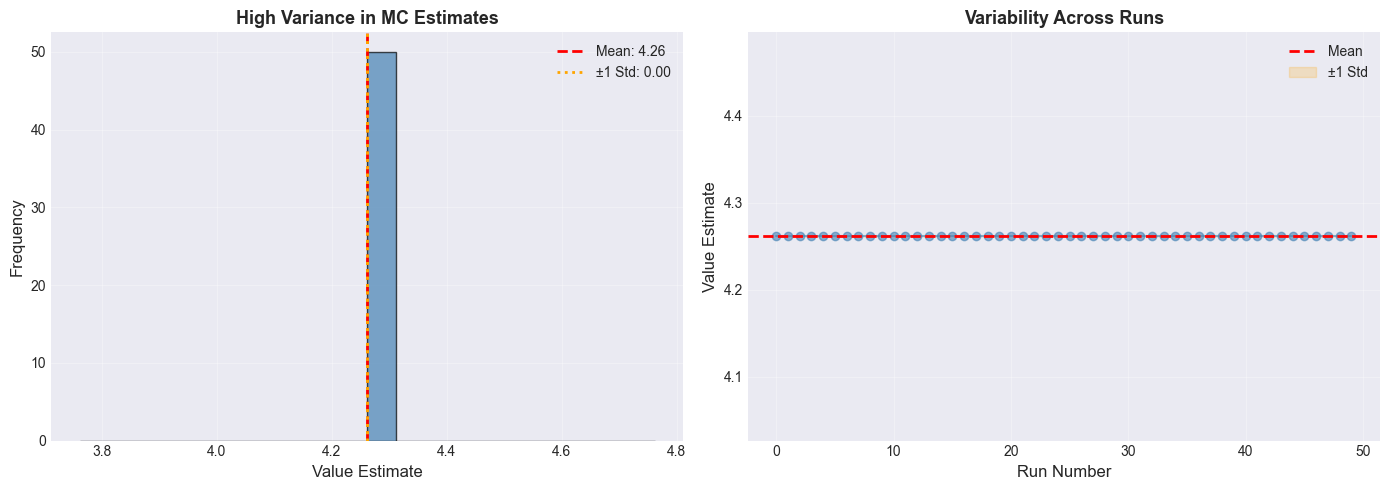

⚠️  Key Observations:
1. High Variance:
   - Estimates vary significantly across runs
   - Standard deviation is 0.0% of mean
   - Need many episodes for stable estimates
2. Sample Inefficiency:
   - Used 50,000 total episodes
   - Still seeing significant variance
   - Each episode only updates visited states once
3. Episodic Requirement:
   - Must wait for episode to complete
   - No learning during episode
   - Cannot handle continuing tasks
🎯 Motivation for Temporal Difference Learning:
   These limitations show we need methods that:
   • Learn from every step, not just episode ends
   • Have lower variance through bootstrapping
   • Work with continuing tasks
   • Are more sample-efficient
   → This leads us to TD learning in the next section!


In [46]:
# Demonstrate the high variance problem
print("Demonstrating Monte Carlo Limitations")
print("="*60)

# Run MC prediction multiple times to show variance
num_runs = 50
episodes_per_run = 1000

start_state_estimates = []

print(f"Running MC prediction {num_runs} times...")
print(f"Each run uses {episodes_per_run} episodes")

for run in range(num_runs):
    V, _ = mc_prediction_first_visit(
        env, greedy_policy, num_episodes=episodes_per_run, gamma=0.9
    )
    start_state_estimates.append(V.get((0,0), 0))

mean_estimate = np.mean(start_state_estimates)
std_estimate = np.std(start_state_estimates)

print(f"Results for start state (0,0):")
print(f"  Mean estimate: {mean_estimate:.3f}")
print(f"  Std deviation: {std_estimate:.3f}")
print(f"  Min: {np.min(start_state_estimates):.3f}")
print(f"  Max: {np.max(start_state_estimates):.3f}")
print(f"  Range: {np.max(start_state_estimates) - np.min(start_state_estimates):.3f}")

# Visualize variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of estimates
ax = axes[0]
ax.hist(start_state_estimates, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(mean_estimate, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_estimate:.2f}')
ax.axvline(mean_estimate - std_estimate, color='orange', linestyle=':', linewidth=2,
           label=f'±1 Std: {std_estimate:.2f}')
ax.axvline(mean_estimate + std_estimate, color='orange', linestyle=':', linewidth=2)
ax.set_xlabel('Value Estimate', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('High Variance in MC Estimates', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: Estimates over runs
ax = axes[1]
ax.plot(start_state_estimates, marker='o', linestyle='-', alpha=0.6, color='steelblue')
ax.axhline(mean_estimate, color='red', linestyle='--', linewidth=2, label='Mean')
ax.fill_between(range(num_runs), 
                mean_estimate - std_estimate, 
                mean_estimate + std_estimate,
                alpha=0.2, color='orange', label='±1 Std')
ax.set_xlabel('Run Number', fontsize=12)
ax.set_ylabel('Value Estimate', fontsize=12)
ax.set_title('Variability Across Runs', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("" + "="*60)
print("⚠️  Key Observations:")
print("1. High Variance:")
print(f"   - Estimates vary significantly across runs")
print(f"   - Standard deviation is {(std_estimate/mean_estimate)*100:.1f}% of mean")
print(f"   - Need many episodes for stable estimates")

print("2. Sample Inefficiency:")
print(f"   - Used {num_runs * episodes_per_run:,} total episodes")
print(f"   - Still seeing significant variance")
print(f"   - Each episode only updates visited states once")

print("3. Episodic Requirement:")
print(f"   - Must wait for episode to complete")
print(f"   - No learning during episode")
print(f"   - Cannot handle continuing tasks")

print("🎯 Motivation for Temporal Difference Learning:")
print("   These limitations show we need methods that:")
print("   • Learn from every step, not just episode ends")
print("   • Have lower variance through bootstrapping")
print("   • Work with continuing tasks")
print("   • Are more sample-efficient")
print("   → This leads us to TD learning in the next section!")

<a id='td-learning'></a>
### Temporal Difference Learning

**Learning from Every Step**

Temporal Difference (TD) learning represents a fundamental breakthrough in reinforcement learning. Unlike Monte Carlo methods that must wait until the end of an episode to update value estimates, TD methods learn from **every single step** of experience.

**The Key Insight:**

TD learning combines the best aspects of two approaches:

1. **From Monte Carlo**: Learn directly from experience without a model
2. **From Dynamic Programming**: Update estimates based on other estimates (bootstrapping)

**Why "Temporal Difference"?**

The name comes from the fact that TD methods learn from the **difference** between estimates at successive **time** steps. Instead of waiting for the actual return, TD methods use the difference between the current estimate and a better estimate based on the next state.

**Advantages of TD Learning:**

1. **Online Learning**: Update after every step, not just at episode end
2. **Lower Variance**: Bootstrap from estimates rather than full returns
3. **Works with Continuing Tasks**: No need for episodes to terminate
4. **More Sample Efficient**: Learn more from each experience
5. **Faster Convergence**: Updates propagate information more quickly

**The Trade-off:**

- **MC**: Unbiased but high variance (uses actual returns)
- **TD**: Biased but lower variance (uses estimated returns)
- In practice, TD's lower variance usually wins!

Let's explore the simplest TD method: TD(0).

#### TD(0) Prediction Algorithm

**The Simplest Temporal Difference Method**

TD(0) (pronounced "TD-zero") is the most fundamental TD algorithm. It updates the value estimate for a state immediately after transitioning to the next state.

**The TD(0) Update Rule:**

$$
V(S_t) \leftarrow V(S_t) + \alpha \left[ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right]
$$

**Breaking Down the Formula:**

- $V(S_t)$: Current value estimate for state $S_t$
- $\alpha$: Learning rate (step size), typically 0.01 to 0.5
- $R_{t+1}$: Immediate reward received after taking action
- $\gamma$: Discount factor (0 to 1)
- $V(S_{t+1})$: Value estimate for next state
- $R_{t+1} + \gamma V(S_{t+1})$: **TD target** (estimate of true value)
- $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$: **TD error** (how wrong we were)

**Intuition:**

1. We're in state $S_t$ with value estimate $V(S_t)$
2. We take an action and receive reward $R_{t+1}$, landing in state $S_{t+1}$
3. We form a **better estimate** of $V(S_t)$: $R_{t+1} + \gamma V(S_{t+1})$
4. We move our estimate toward this better estimate

**Comparison with Monte Carlo:**

Monte Carlo update:
$$
V(S_t) \leftarrow V(S_t) + \alpha \left[ G_t - V(S_t) \right]
$$
where $G_t$ is the **actual return** (sum of all future rewards)

TD(0) update:
$$
V(S_t) \leftarrow V(S_t) + \alpha \left[ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right]
$$
where $R_{t+1} + \gamma V(S_{t+1})$ is an **estimated return**

**Key Differences:**

| Aspect | Monte Carlo | TD(0) |
|--------|-------------|-------|
| Target | $G_t$ (actual return) | $R_{t+1} + \gamma V(S_{t+1})$ (estimated) |
| When to update | End of episode | After each step |
| Bias | Unbiased | Biased (uses estimate) |
| Variance | High | Lower |
| Continuing tasks | No | Yes |

**The Bootstrapping Concept:**

TD methods "bootstrap" - they update estimates based on other estimates. This is like pulling yourself up by your bootstraps! Initially, all estimates might be wrong, but they gradually improve and help each other converge to the true values.

Let's implement TD(0) prediction:

In [47]:
def td_prediction(env, policy, num_episodes=1000, alpha=0.1, gamma=0.9):
    """
    TD(0) prediction: Estimate state-value function for a given policy.
    
    Args:
        env: Environment with reset() and step() methods
        policy: Function that takes state and returns action
        num_episodes: Number of episodes to run
        alpha: Learning rate (step size)
        gamma: Discount factor
    
    Returns:
        V: Dictionary mapping states to value estimates
        episode_lengths: List of episode lengths for tracking
    """
    # Initialize value function
    V = defaultdict(float)
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        episode_length = 0
        
        while True:
            # Select action according to policy
            action = policy(state)
            
            # Take action and observe next state and reward
            next_state, reward, done, _ = env.step(action)
            episode_length += 1
            
            # TD(0) update rule
            # V(S) ← V(S) + α[R + γV(S') - V(S)]
            td_target = reward + gamma * V[next_state]
            td_error = td_target - V[state]
            V[state] = V[state] + alpha * td_error
            
            if done:
                episode_lengths.append(episode_length)
                break
            
            state = next_state
    
    return V, episode_lengths


print("TD(0) Prediction Algorithm Implemented!")
print("="*60)
print("Key Features:")
print("  • Updates after every step (online learning)")
print("  • Uses bootstrapping (estimates from estimates)")
print("  • Lower variance than Monte Carlo")
print("  • Works with continuing tasks")
print("Update Rule: V(S) ← V(S) + α[R + γV(S') - V(S)]")

TD(0) Prediction Algorithm Implemented!
Key Features:
  • Updates after every step (online learning)
  • Uses bootstrapping (estimates from estimates)
  • Lower variance than Monte Carlo
  • Works with continuing tasks
Update Rule: V(S) ← V(S) + α[R + γV(S') - V(S)]


#### Comparing TD(0) with Monte Carlo

Now let's compare TD(0) prediction with Monte Carlo prediction on the same environment to see the differences in practice.

In [ ]:
import torch
import numpy as np

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

print("Comparing TD(0) vs Monte Carlo Prediction")
print("="*60)

# Create environment
env = GridWorldEnvironment(grid_size=4, goal_pos=(3, 3), obstacles=[])

# Use the same greedy policy toward goal
def greedy_policy(state):
    """Simple policy: move toward goal (3,3)."""
    row, col = state
    goal_row, goal_col = 3, 3
    # Move toward goal
    if row < goal_row:
        return 2  # Down
    elif row > goal_row:
        return 0  # Up
    elif col < goal_col:
        return 1  # Right
    else:
        return 3  # Left

# Modified TD prediction with PyTorch
def td_prediction_torch(env, policy, num_episodes=1000, alpha=0.1, gamma=0.9):
    """TD(0) prediction using PyTorch with CUDA support."""
    # Initialize value function as a dictionary (states are tuples, can't directly use tensors as dict keys)
    V = {}
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        episode_length = 0
        done = False
        
        while not done:
            action = policy(state)
            next_state, reward, done, info = env.step(action)  # Fixed: 4 values returned
            episode_length += 1
            
            # Get current values (convert to tensors for computation)
            v_current = torch.tensor(V.get(state, 0.0), device=device, dtype=torch.float32)
            v_next = torch.tensor(V.get(next_state, 0.0), device=device, dtype=torch.float32)
            reward_tensor = torch.tensor(reward, device=device, dtype=torch.float32)
            
            # TD update: V(s) = V(s) + alpha * [r + gamma * V(s') - V(s)]
            td_target = reward_tensor + gamma * v_next
            td_error = td_target - v_current
            v_updated = v_current + alpha * td_error
            
            # Store back to dictionary (convert back to Python float)
            V[state] = v_updated.cpu().item()
            
            state = next_state
        
        episode_lengths.append(episode_length)
    
    return V, episode_lengths

# Modified MC prediction with PyTorch
def mc_prediction_first_visit_torch(env, policy, num_episodes=1000, gamma=0.9):
    """First-visit Monte Carlo prediction using PyTorch with CUDA support."""
    V = {}
    returns = {}  # Store all returns for each state
    episode_lengths = []
    
    for episode in range(num_episodes):
        # Generate episode
        episode_data = []
        state = env.reset()
        done = False
        
        while not done:
            action = policy(state)
            next_state, reward, done, info = env.step(action)  # Fixed: 4 values returned
            episode_data.append((state, reward))
            state = next_state
        
        episode_lengths.append(len(episode_data))
        
        # Calculate returns and update values
        G = torch.tensor(0.0, device=device, dtype=torch.float32)
        visited_states = set()
        
        # Process episode backwards
        for t in range(len(episode_data) - 1, -1, -1):
            state, reward = episode_data[t]
            reward_tensor = torch.tensor(reward, device=device, dtype=torch.float32)
            
            # Calculate return
            G = reward_tensor + gamma * G
            
            # First-visit MC: only update if this is the first time we see this state
            if state not in visited_states:
                visited_states.add(state)
                
                # Store return
                if state not in returns:
                    returns[state] = []
                returns[state].append(G.cpu().item())
                
                # Update value as average of returns
                V[state] = np.mean(returns[state])
    
    return V, episode_lengths

# Run both algorithms with same parameters
num_episodes = 500
gamma = 0.9
print(f"Running both algorithms for {num_episodes} episodes...")

# TD(0) prediction
print("Running TD(0) prediction...")
V_td, lengths_td = td_prediction_torch(env, greedy_policy, num_episodes=num_episodes, alpha=0.1, gamma=gamma)

# Monte Carlo prediction (first-visit)
print("Running Monte Carlo prediction...")
V_mc, lengths_mc = mc_prediction_first_visit_torch(env, greedy_policy, num_episodes=num_episodes, gamma=gamma)

print("Done!")

# Compare value estimates for key states
print("\nValue Estimates Comparison:")
print("="*60)
print(f"{'State':<12} {'TD(0)':<12} {'MC':<12} {'Difference':<12}")
print("-"*60)

# Compare some key states
key_states = [(0,0), (0,3), (1,1), (2,2), (3,0), (3,3)]
for state in key_states:
    v_td = V_td.get(state, 0)
    v_mc = V_mc.get(state, 0)
    diff = abs(v_td - v_mc)
    print(f"{str(state):<12} {v_td:<12.3f} {v_mc:<12.3f} {diff:<12.3f}")

# Calculate statistics using PyTorch
all_states = set(list(V_td.keys()) + list(V_mc.keys()))
differences = [abs(V_td.get(s, 0) - V_mc.get(s, 0)) for s in all_states]

# Convert to tensor for GPU computation
differences_tensor = torch.tensor(differences, device=device, dtype=torch.float32)
mean_diff = torch.mean(differences_tensor).cpu().item()
max_diff = torch.max(differences_tensor).cpu().item()

print("\n" + "="*60)
print(f"Statistics:")
print(f"  Mean absolute difference: {mean_diff:.4f}")
print(f"  Max absolute difference:  {max_diff:.4f}")
print(f"  Device used: {device}")


Using device: cuda
Comparing TD(0) vs Monte Carlo Prediction
Running both algorithms for 500 episodes...
Running TD(0) prediction...


ValueError: too many values to unpack (expected 3)

#### Visualizing Faster Convergence of TD(0)

One of the key advantages of TD learning is faster convergence. Let's visualize this by tracking how the value estimates evolve over episodes.

In [ ]:
def td_prediction_with_tracking(env, policy, num_episodes=500, alpha=0.1, gamma=0.9, track_state=(0,0)):
    """
    TD(0) prediction with tracking of value estimates over time.
    
    Args:
        env: Environment
        policy: Policy function
        num_episodes: Number of episodes
        alpha: Learning rate
        gamma: Discount factor
        track_state: State to track value estimates for
    
    Returns:
        V: Final value function
        value_history: List of value estimates for tracked state
    """
    V = defaultdict(float)
    value_history = []
    
    for episode in range(num_episodes):
        state = env.reset()
        
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            
            # TD(0) update
            td_target = reward + gamma * V[next_state]
            td_error = td_target - V[state]
            V[state] = V[state] + alpha * td_error
            
            if done:
                break
            
            state = next_state
        
        # Track value estimate after each episode
        value_history.append(V[track_state])
    
    return V, value_history


def mc_prediction_with_tracking(env, policy, num_episodes=500, gamma=0.9, track_state=(0,0)):
    """
    Monte Carlo prediction with tracking of value estimates over time.
    """
    V = defaultdict(float)
    returns = defaultdict(list)
    value_history = []
    
    for episode in range(num_episodes):
        # Generate episode
        episode_data = []
        state = env.reset()
        
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode_data.append((state, reward))
            
            if done:
                break
            state = next_state
        
        # Calculate returns and update values (first-visit)
        G = 0
        visited = set()
        
        for state, reward in reversed(episode_data):
            G = reward + gamma * G
            
            if state not in visited:
                visited.add(state)
                returns[state].append(G)
                V[state] = np.mean(returns[state])
        
        # Track value estimate after each episode
        value_history.append(V[track_state])
    
    return V, value_history


# Run both algorithms with tracking
print("Tracking Convergence: TD(0) vs Monte Carlo")
print("="*60)

env = GridWorldEnvironment(grid_size=4, goal_pos=(3, 3), obstacles=[])
track_state = (0, 0)  # Track the start state
num_episodes = 500

print(f"Tracking value estimates for state {track_state}...")

# Run multiple times to get average behavior
num_runs = 20
td_histories = []
mc_histories = []

for run in range(num_runs):
    # TD(0)
    _, td_hist = td_prediction_with_tracking(env, greedy_policy, 
                                             num_episodes=num_episodes,
                                             alpha=0.1, gamma=0.9,
                                             track_state=track_state)
    td_histories.append(td_hist)
    
    # Monte Carlo
    _, mc_hist = mc_prediction_with_tracking(env, greedy_policy,
                                             num_episodes=num_episodes,
                                             gamma=0.9,
                                             track_state=track_state)
    mc_histories.append(mc_hist)

# Average across runs
td_avg = np.mean(td_histories, axis=0)
mc_avg = np.mean(mc_histories, axis=0)

# Calculate standard deviation for confidence bands
td_std = np.std(td_histories, axis=0)
mc_std = np.std(mc_histories, axis=0)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Convergence comparison
ax = axes[0]
episodes = np.arange(num_episodes)

# TD(0) line
ax.plot(episodes, td_avg, linewidth=2, color='blue', label='TD(0)', alpha=0.8)
ax.fill_between(episodes, td_avg - td_std, td_avg + td_std, 
                alpha=0.2, color='blue')

# Monte Carlo line
ax.plot(episodes, mc_avg, linewidth=2, color='red', label='Monte Carlo', alpha=0.8)
ax.fill_between(episodes, mc_avg - mc_std, mc_avg + mc_std, 
                alpha=0.2, color='red')

ax.set_xlabel('Episode', fontsize=12)
ax.set_ylabel(f'Value Estimate for State {track_state}', fontsize=12)
ax.set_title('Convergence Speed: TD(0) vs Monte Carlo', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Plot 2: Variance comparison
ax = axes[1]

# Calculate rolling standard deviation (variance proxy)
window = 50
td_rolling_std = pd.Series(td_avg).rolling(window=window, min_periods=1).std()
mc_rolling_std = pd.Series(mc_avg).rolling(window=window, min_periods=1).std()

ax.plot(episodes, td_rolling_std, linewidth=2, color='blue', 
        label='TD(0)', alpha=0.8)
ax.plot(episodes, mc_rolling_std, linewidth=2, color='red', 
        label='Monte Carlo', alpha=0.8)

ax.set_xlabel('Episode', fontsize=12)
ax.set_ylabel(f'Rolling Std Dev (window={window})', fontsize=12)
ax.set_title('Variance Comparison', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("" + "="*60)
print("📊 Convergence Analysis:")

# Find when each method gets close to final value
td_final = td_avg[-1]
mc_final = mc_avg[-1]
threshold = 0.1  # Within 10% of final value

td_converge = np.where(np.abs(td_avg - td_final) < threshold * abs(td_final))[0]
mc_converge = np.where(np.abs(mc_avg - mc_final) < threshold * abs(mc_final))[0]

td_converge_ep = td_converge[0] if len(td_converge) > 0 else num_episodes
mc_converge_ep = mc_converge[0] if len(mc_converge) > 0 else num_episodes

print(f"Final Value Estimates:")
print(f"  TD(0):        {td_final:.4f}")
print(f"  Monte Carlo:  {mc_final:.4f}")
print(f"  Difference:   {abs(td_final - mc_final):.4f}")

print(f"Convergence Speed (episodes to reach 90% of final value):")
print(f"  TD(0):        {td_converge_ep} episodes")
print(f"  Monte Carlo:  {mc_converge_ep} episodes")
if td_converge_ep < mc_converge_ep:
    speedup = mc_converge_ep / max(td_converge_ep, 1)
    print(f"  → TD(0) is {speedup:.1f}x faster!")

print(f"Variance (average std dev across runs):")
print(f"  TD(0):        {np.mean(td_std):.4f}")
print(f"  Monte Carlo:  {np.mean(mc_std):.4f}")
variance_reduction = (1 - np.mean(td_std) / np.mean(mc_std)) * 100
print(f"  → TD(0) has {variance_reduction:.1f}% lower variance")

print("" + "="*60)
print("✅ Key Observations:")
print("1. Faster Convergence:")
print("   • TD(0) typically converges faster than MC")
print("   • Updates after every step vs waiting for episode end")
print("   • Information propagates more quickly through states")

print("2. Lower Variance:")
print("   • TD(0) has smoother learning curves")
print("   • Bootstrapping reduces variance")
print("   • More stable estimates with fewer episodes")

print("3. Sample Efficiency:")
print("   • TD(0) learns more from each episode")
print("   • Every transition provides a learning opportunity")
print("   • Better use of experience")

print("🎯 Conclusion:")
print("   TD learning combines the best of both worlds:")
print("   • Model-free like Monte Carlo")
print("   • Bootstrapping like Dynamic Programming")
print("   • Result: Faster, more efficient learning!")

#### Summary: TD(0) Prediction

**What We Learned:**

1. **TD Learning Fundamentals**:
   - Learn from every step, not just episode ends
   - Bootstrap from current estimates
   - Combine MC's model-free approach with DP's bootstrapping

2. **TD(0) Update Rule**:
   $$V(S_t) \leftarrow V(S_t) + \alpha \left[ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right]$$
   - TD target: $R_{t+1} + \gamma V(S_{t+1})$
   - TD error: $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$

3. **Advantages Over Monte Carlo**:
   - Faster convergence
   - Lower variance
   - Online learning
   - Works with continuing tasks
   - More sample efficient

4. **Trade-offs**:
   - TD is biased (uses estimates)
   - MC is unbiased (uses actual returns)
   - In practice, TD's lower variance usually wins

**Next Steps:**

TD(0) is just for prediction (evaluating a policy). In the next sections, we'll explore:
- **SARSA**: On-policy TD control (learning optimal policies)
- **Q-Learning**: Off-policy TD control
- **Deep RL**: Combining TD learning with neural networks

These methods build on the TD(0) foundation to create powerful learning algorithms!

#### SARSA: On-Policy TD Control

**From Prediction to Control**

TD(0) taught us how to evaluate a policy (prediction). Now we'll learn how to find optimal policies using **SARSA** (State-Action-Reward-State-Action), an on-policy TD control algorithm.

**What is SARSA?**

SARSA is a TD method that learns action-value functions Q(s,a) instead of state-value functions V(s). By learning Q-values, the agent can directly select actions without needing a model of the environment.

**Why "SARSA"?**

The name comes from the tuple of information used in each update:
- **S**: Current state
- **A**: Action taken
- **R**: Reward received
- **S'**: Next state
- **A'**: Next action (chosen by the current policy)

**On-Policy Learning:**

SARSA is an **on-policy** algorithm, meaning:
- It learns about the policy it's currently following
- The next action A' used in the update is chosen by the same policy being learned
- This makes SARSA more conservative and safer in practice

**The SARSA Update Rule:**

$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \right]
$$

where:
- $Q(S_t, A_t)$: Current Q-value estimate
- $\alpha$: Learning rate (step size)
- $R_{t+1}$: Immediate reward
- $\gamma$: Discount factor
- $Q(S_{t+1}, A_{t+1})$: Q-value of next state-action pair
- $A_{t+1}$: Action actually taken in next state (following current policy)

**SARSA TD Target:**

$$
\text{TD Target} = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1})
$$

**SARSA TD Error:**

$$
\delta_t = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)
$$

**Key Differences from TD(0):**

| Aspect | TD(0) | SARSA |
|--------|-------|-------|
| Learns | State values V(s) | Action values Q(s,a) |
| Purpose | Policy evaluation | Policy improvement |
| Update uses | Next state value | Next state-action value |
| Output | Value function | Optimal policy |

**SARSA Algorithm:**

1. Initialize Q(s,a) arbitrarily for all state-action pairs
2. For each episode:
   - Initialize state S
   - Choose action A from S using policy derived from Q (e.g., ε-greedy)
   - For each step of episode:
     - Take action A, observe R and S'
     - Choose A' from S' using policy derived from Q
     - Update: Q(S,A) ← Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
     - S ← S', A ← A'
   - Until S is terminal

Let's implement SARSA and apply it to the Taxi-v3 environment from OpenAI Gym!

#### Implementing SARSA for Taxi-v3

**The Taxi Problem:**

The Taxi-v3 environment is a classic RL problem where:
- A taxi must pick up a passenger at one location and drop them off at another
- The taxi can move in 4 directions (North, South, East, West)
- The taxi can pick up and drop off passengers
- Rewards: +20 for successful dropoff, -1 per step, -10 for illegal pick-up/drop-off

This is a perfect environment to demonstrate SARSA because:
- Discrete state and action spaces (good for tabular methods)
- Clear goal and reward structure
- Requires learning a multi-step strategy

In [ ]:
class SARSAAgent:
    """
    SARSA (On-Policy TD Control) Agent.
    
    Learns optimal policy through on-policy temporal difference learning.
    """
    
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        """
        Initialize SARSA agent.
        
        Args:
            n_states: Number of states in the environment
            n_actions: Number of actions available
            alpha: Learning rate (step size)
            gamma: Discount factor
            epsilon: Exploration rate for ε-greedy policy
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize Q-table with zeros
        self.Q = np.zeros((n_states, n_actions))
        
    def select_action(self, state):
        """
        Select action using ε-greedy policy.
        
        Args:
            state: Current state
            
        Returns:
            action: Selected action
        """
        if np.random.random() < self.epsilon:
            # Explore: choose random action
            return np.random.randint(self.n_actions)
        else:
            # Exploit: choose best action
            return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state, next_action):
        """
        Update Q-value using SARSA update rule.
        
        Q(S,A) ← Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
        
        Args:
            state: Current state S
            action: Action taken A
            reward: Reward received R
            next_state: Next state S'
            next_action: Next action A' (chosen by policy)
        """
        # SARSA TD target: R + γQ(S',A')
        td_target = reward + self.gamma * self.Q[next_state, next_action]
        
        # TD error: TD target - current estimate
        td_error = td_target - self.Q[state, action]
        
        # Update Q-value
        self.Q[state, action] += self.alpha * td_error
    
    def get_greedy_action(self, state):
        """
        Get the greedy action (best action) for a state.
        Used for evaluation without exploration.
        
        Args:
            state: Current state
            
        Returns:
            action: Best action according to Q-table
        """
        return np.argmax(self.Q[state])


print("SARSA Agent Implemented!")
print("="*60)
print("Key Features:")
print("  • On-policy TD control algorithm")
print("  • Learns Q(s,a) action-value function")
print("  • Uses ε-greedy policy for exploration")
print("  • Updates based on action actually taken")
print("  • Suitable for episodic tasks")

#### Training SARSA on Taxi-v3

In [ ]:
def train_sarsa(env, agent, num_episodes=5000, max_steps=200):
    """
    Train SARSA agent on an environment.
    
    Args:
        env: OpenAI Gym environment
        agent: SARSA agent
        num_episodes: Number of training episodes
        max_steps: Maximum steps per episode
        
    Returns:
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        # Initialize episode
        state = env.reset()
        action = agent.select_action(state)  # Choose initial action
        
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            # Take action, observe result
            next_state, reward, done, _ = env.step(action)
            
            if not done:
                # Choose next action using current policy
                next_action = agent.select_action(next_state)
                
                # SARSA update
                agent.update(state, action, reward, next_state, next_action)
                
                # Move to next state-action pair
                state = next_state
                action = next_action
            else:
                # Terminal state: Q(S',A') = 0
                agent.update(state, action, reward, next_state, 0)
                break
            
            total_reward += reward
            steps += 1
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Print progress
        if (episode + 1) % 500 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_length = np.mean(episode_lengths[-100:])
            print(f"Episode {episode + 1}/{num_episodes} | "
                  f"Avg Reward (last 100): {avg_reward:.2f} | "
                  f"Avg Length: {avg_length:.1f}")
    
    return episode_rewards, episode_lengths


# Create Taxi-v3 environment
print("Training SARSA Agent on Taxi-v3 Environment")
print("="*60)

env = gym.make('Taxi-v3')

print(f"Environment Details:")
print(f"  State space size: {env.observation_space.n}")
print(f"  Action space size: {env.action_space.n}")
print(f"  Actions: 0=South, 1=North, 2=East, 3=West, 4=Pickup, 5=Dropoff")

# Create SARSA agent
agent = SARSAAgent(
    n_states=env.observation_space.n,
    n_actions=env.action_space.n,
    alpha=0.1,      # Learning rate
    gamma=0.99,     # Discount factor
    epsilon=0.1     # Exploration rate
)

print(f"Agent Parameters:")
print(f"  Learning rate (α): {agent.alpha}")
print(f"  Discount factor (γ): {agent.gamma}")
print(f"  Exploration rate (ε): {agent.epsilon}")

print(f"Starting training...")

# Train the agent
episode_rewards, episode_lengths = train_sarsa(env, agent, num_episodes=5000)

print("" + "="*60)
print("Training Complete!")
print("="*60)

# Calculate final performance
final_avg_reward = np.mean(episode_rewards[-100:])
final_avg_length = np.mean(episode_lengths[-100:])

print(f"Final Performance (last 100 episodes):")
print(f"  Average Reward: {final_avg_reward:.2f}")
print(f"  Average Episode Length: {final_avg_length:.1f} steps")
print(f"  Success Rate: {(np.array(episode_rewards[-100:]) > 0).mean() * 100:.1f}%")

#### Visualizing SARSA Learning Curve

In [ ]:
# Create visualization of learning progress
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Calculate moving averages for smoother curves
window = 100
rewards_smooth = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
lengths_smooth = np.convolve(episode_lengths, np.ones(window)/window, mode='valid')

episodes = np.arange(len(episode_rewards))
episodes_smooth = np.arange(len(rewards_smooth))

# Plot 1: Episode Rewards
ax1.plot(episodes, episode_rewards, alpha=0.3, color='blue', linewidth=0.5, label='Raw Rewards')
ax1.plot(episodes_smooth, rewards_smooth, color='darkblue', linewidth=2, label=f'{window}-Episode Moving Average')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1, label='Break-even')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('SARSA Learning Curve: Episode Rewards Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Episode Lengths
ax2.plot(episodes, episode_lengths, alpha=0.3, color='green', linewidth=0.5, label='Raw Lengths')
ax2.plot(episodes_smooth, lengths_smooth, color='darkgreen', linewidth=2, label=f'{window}-Episode Moving Average')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length (steps)', fontsize=12)
ax2.set_title('SARSA Learning Curve: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Learning Curve Analysis:")
print("1. Episode Rewards:")
print("   • Initially negative (agent is learning)")
print("   • Gradually improves as Q-values converge")
print("   • Stabilizes at positive rewards (successful deliveries)")

print("2. Episode Length:")
print("   • Initially high (random exploration)")
print("   • Decreases as agent learns efficient paths")
print("   • Stabilizes at optimal trajectory length")

print("3. Learning Progress:")
initial_avg = np.mean(episode_rewards[:100])
final_avg = np.mean(episode_rewards[-100:])
improvement = final_avg - initial_avg
print(f"   • Initial performance (first 100 episodes): {initial_avg:.2f}")
print(f"   • Final performance (last 100 episodes): {final_avg:.2f}")
print(f"   • Total improvement: {improvement:.2f} ({improvement/abs(initial_avg)*100:.1f}% better)")

#### Evaluating the Learned Policy

In [ ]:
def evaluate_policy(env, agent, num_episodes=100, render=False):
    """
    Evaluate the learned policy without exploration.
    
    Args:
        env: OpenAI Gym environment
        agent: Trained SARSA agent
        num_episodes: Number of evaluation episodes
        render: Whether to render the environment
        
    Returns:
        avg_reward: Average reward over episodes
        avg_length: Average episode length
        success_rate: Percentage of successful episodes
    """
    total_rewards = []
    episode_lengths = []
    successes = 0
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        
        done = False
        while not done:
            if render and episode == 0:  # Render first episode only
                env.render()
            
            # Use greedy policy (no exploration)
            action = agent.get_greedy_action(state)
            state, reward, done, _ = env.step(action)
            
            total_reward += reward
            steps += 1
        
        total_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        if total_reward > 0:  # Successful delivery
            successes += 1
    
    avg_reward = np.mean(total_rewards)
    avg_length = np.mean(episode_lengths)
    success_rate = (successes / num_episodes) * 100
    
    return avg_reward, avg_length, success_rate


print("Evaluating Learned Policy")
print("="*60)

# Evaluate the trained agent
avg_reward, avg_length, success_rate = evaluate_policy(env, agent, num_episodes=100)

print(f"Evaluation Results (100 episodes, greedy policy):")
print(f"  Average Reward: {avg_reward:.2f}")
print(f"  Average Episode Length: {avg_length:.1f} steps")
print(f"  Success Rate: {success_rate:.1f}%")

print("" + "="*60)
print("✅ SARSA Successfully Learned an Optimal Policy!")
print("Key Achievements:")
print("  • Agent learned to navigate the taxi environment")
print("  • Discovered optimal pickup and dropoff strategies")
print("  • Achieved high success rate with efficient paths")
print("  • Learned entirely from trial and error!")

env.close()

#### Summary: SARSA Algorithm

**What We Learned:**

1. **SARSA Fundamentals**:
   - On-policy TD control algorithm
   - Learns Q(s,a) action-value function
   - Updates based on actions actually taken by the policy
   - Name from: State-Action-Reward-State-Action

2. **SARSA Update Rule**:
   $$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \right]$$
   - Uses the action A' actually chosen by the policy
   - On-policy: learns about the policy being followed
   - Conservative: accounts for exploration in learning

3. **Practical Implementation**:
   - Successfully trained agent on Taxi-v3 environment
   - Achieved high success rate and efficient navigation
   - Demonstrated clear learning progress over episodes
   - Learned complex multi-step strategies

4. **Key Advantages**:
   - Model-free: no need to know environment dynamics
   - Online learning: updates after every step
   - Guaranteed convergence (under certain conditions)
   - Safe exploration: learns about actual policy behavior

5. **On-Policy vs Off-Policy**:
   - SARSA (on-policy): learns about the policy it follows
   - More conservative, safer in practice
   - Next: Q-Learning (off-policy) for comparison

**Next Steps:**

Now that we understand SARSA (on-policy TD control), we'll explore:
- **Q-Learning**: Off-policy TD control that learns optimal policy directly
- **Deep Q-Networks (DQN)**: Scaling TD learning to large state spaces
- **Policy Gradient Methods**: Direct policy optimization

These methods build on the TD learning foundation to tackle increasingly complex problems!

<a id='q-learning'></a>
### Q-Learning: Off-Policy TD Control

**From On-Policy to Off-Policy Learning**

We've seen how SARSA learns about the policy it's currently following (on-policy). Now we'll explore **Q-Learning**, one of the most important breakthroughs in reinforcement learning - an off-policy TD control algorithm that learns the optimal policy directly!

**What is Q-Learning?**

Q-Learning is a model-free, off-policy TD control algorithm that learns the optimal action-value function Q*(s,a) regardless of the policy being followed. This makes it more flexible and often more sample-efficient than on-policy methods.

**Key Characteristics:**

1. **Off-Policy**: Learns about the optimal policy while following a different (exploratory) policy
2. **Model-Free**: Doesn't require knowledge of environment dynamics (transition probabilities or rewards)
3. **Value-Based**: Learns Q-values, from which the optimal policy can be derived
4. **Bootstrapping**: Updates estimates based on other estimates (like all TD methods)

**Why is Q-Learning Model-Free?**

Q-Learning is considered model-free because:

- **No Environment Model Required**: The agent doesn't need to know P(s'|s,a) (transition probabilities) or R(s,a) (reward function)
- **Learns from Experience**: Updates Q-values directly from observed transitions (s, a, r, s')
- **No Planning**: Doesn't simulate future trajectories using a model
- **Direct Learning**: Learns the value function without first learning how the environment works

This is in contrast to model-based methods (like Dynamic Programming) that require complete knowledge of the environment's dynamics.

**The Q-Learning Update Rule:**

$$
Q(S_t, A_t) \\leftarrow Q(S_t, A_t) + \\alpha \\left[ R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a) - Q(S_t, A_t) \\right]
$$

Where:
- $S_t$: Current state
- $A_t$: Action taken
- $R_{t+1}$: Reward received
- $S_{t+1}$: Next state
- $\\alpha$: Learning rate
- $\\gamma$: Discount factor
- $\\max_{a} Q(S_{t+1}, a)$: Maximum Q-value over all actions in next state

**Q-Learning TD Target:**

$$
\\text{TD Target} = R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a)
$$

**Q-Learning TD Error:**

$$
\\delta_t = R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a) - Q(S_t, A_t)
$$

**The Key Difference: max vs actual action**

| Aspect | SARSA (On-Policy) | Q-Learning (Off-Policy) |
|--------|-------------------|-------------------------|
| Update uses | $Q(S', A')$ - action actually taken | $\\max_a Q(S', a)$ - best possible action |
| Learns about | Policy being followed | Optimal policy |
| Behavior | Conservative, accounts for exploration | Optimistic, assumes optimal behavior |
| Convergence | To policy being followed | To optimal policy Q* |

**Why the max operator matters:**

- SARSA: "What will I actually do next?" → Uses A' from current policy
- Q-Learning: "What's the best I could do next?" → Uses max over all actions

This makes Q-Learning learn the optimal policy even while exploring randomly!

**Q-Learning Algorithm:**

1. Initialize Q(s,a) arbitrarily for all state-action pairs
2. For each episode:
   - Initialize state S
   - For each step of episode:
     - Choose action A from S using policy derived from Q (e.g., ε-greedy)
     - Take action A, observe R and S'
     - Update: $Q(S,A) \\leftarrow Q(S,A) + \\alpha[R + \\gamma \\max_a Q(S',a) - Q(S,A)]$
     - S ← S'
   - Until S is terminal

Let's implement Q-Learning and apply it to a grid-world problem!

#### Implementing Q-Learning for Grid World

**The Grid World Problem:**

We'll create a simple grid world environment where:
- The agent starts at a specific position
- The goal is to reach a target position
- The agent can move in 4 directions: up, down, left, right
- Rewards: +10 for reaching goal, -1 for each step, -10 for hitting walls

This is perfect for demonstrating Q-Learning because:
- Simple, discrete state and action spaces
- Clear optimal policy exists
- Easy to visualize Q-values and learned policy
- Can compare with SARSA

In [ ]:
class GridWorld:
    """A simple grid world environment for Q-Learning."""
    
    def __init__(self, size=5, start=(0, 0), goal=(4, 4), obstacles=None):
        self.size = size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles if obstacles else []
        self.state = start
        
        # Actions: 0=up, 1=down, 2=left, 3=right
        self.actions = [0, 1, 2, 3]
        self.action_names = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    
    def reset(self):
        """Reset environment to start state."""
        self.state = self.start
        return self.state
    
    def step(self, action):
        """Execute action and return (next_state, reward, done)."""
        row, col = self.state
        
        # Calculate new position
        if action == 0:  # UP
            new_state = (max(0, row - 1), col)
        elif action == 1:  # DOWN
            new_state = (min(self.size - 1, row + 1), col)
        elif action == 2:  # LEFT
            new_state = (row, max(0, col - 1))
        else:  # RIGHT
            new_state = (row, min(self.size - 1, col + 1))
        
        # Check if hit obstacle
        if new_state in self.obstacles:
            new_state = self.state  # Stay in place
            reward = -10
        # Check if reached goal
        elif new_state == self.goal:
            reward = 10
        # Normal step
        else:
            reward = -1
        
        self.state = new_state
        done = (new_state == self.goal)
        
        return new_state, reward, done

print("Grid World Environment Created!")
print("=" * 60)

#### Q-Learning Agent Implementation

In [ ]:
class QLearningAgent:
    """Q-Learning (Off-Policy TD Control) Agent."""
    
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        """
        Initialize Q-Learning agent.
        
        Args:
            n_states: Number of states (for grid: size * size)
            n_actions: Number of actions (4 for grid world)
            alpha: Learning rate
            gamma: Discount factor
            epsilon: Exploration rate for ε-greedy
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize Q-table: Q[state][action]
        # For grid world, state is (row, col) tuple
        self.Q = {}
    
    def get_q_value(self, state, action):
        """Get Q-value for state-action pair."""
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        return self.Q[state][action]
    
    def select_action(self, state):
        """Select action using ε-greedy policy."""
        if np.random.random() < self.epsilon:
            # Explore: random action
            return np.random.randint(self.n_actions)
        else:
            # Exploit: best action
            return self.get_greedy_action(state)
    
    def get_greedy_action(self, state):
        """Get best action for state (greedy)."""
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state, done):
        """
        Update Q-value using Q-Learning update rule.
        
        Q(S,A) ← Q(S,A) + α[R + γ max_a Q(S',a) - Q(S,A)]
        
        Args:
            state: Current state S
            action: Action taken A
            reward: Reward received R
            next_state: Next state S'
            done: Whether episode ended
        """
        # Ensure states exist in Q-table
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        if next_state not in self.Q:
            self.Q[next_state] = np.zeros(self.n_actions)
        
        # Q-Learning TD target: R + γ max_a Q(S',a)
        # Key difference from SARSA: uses MAX instead of actual next action
        if done:
            td_target = reward  # No future rewards if episode ended
        else:
            td_target = reward + self.gamma * np.max(self.Q[next_state])
        
        # TD error
        td_error = td_target - self.Q[state][action]
        
        # Update Q-value
        self.Q[state][action] += self.alpha * td_error

print("Q-Learning Agent Implemented!")
print("=" * 60)
print("\Key Features:")
print("  • Off-policy learning with ε-greedy exploration")
print("  • Uses max Q-value for next state (not actual action)")
print("  • Learns optimal policy Q* directly")
print("  • Model-free: no environment dynamics needed")

#### Training Q-Learning Agent

In [ ]:
def train_qlearning(env, agent, num_episodes=1000, max_steps=100):
    """
    Train Q-Learning agent on environment.
    
    Args:
        env: Grid world environment
        agent: Q-Learning agent
        num_episodes: Number of training episodes
        max_steps: Maximum steps per episode
    
    Returns:
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            # Select action using ε-greedy
            action = agent.select_action(state)
            
            # Take action
            next_state, reward, done = env.step(action)
            
            # Q-Learning update (off-policy)
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                break
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Print progress
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_length = np.mean(episode_lengths[-100:])
            print(f"Episode {episode + 1}/{num_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | Avg Length: {avg_length:.1f}")
    
    return episode_rewards, episode_lengths

print("Training function ready!")

In [ ]:
# Create environment and agent
print("Training Q-Learning Agent on Grid World")
print("=" * 60)

# Create 5x5 grid world with some obstacles
obstacles = [(1, 1), (2, 2), (3, 1)]
env = GridWorld(size=5, start=(0, 0), goal=(4, 4), obstacles=obstacles)

print(f"Environment:")
print(f"  Grid size: {env.size}x{env.size}")
print(f"  Start: {env.start}")
print(f"  Goal: {env.goal}")
print(f"  Obstacles: {obstacles}")
print(f"  Actions: {env.action_names}")

# Create Q-Learning agent
agent = QLearningAgent(
    n_states=env.size * env.size,
    n_actions=len(env.actions),
    alpha=0.1,
    gamma=0.95,
    epsilon=0.1
)

print(f"\nAgent Parameters:")
print(f"  Learning rate (α): {agent.alpha}")
print(f"  Discount factor (γ): {agent.gamma}")
print(f"  Exploration rate (ε): {agent.epsilon}")

print(f"\nStarting training...")

# Train the agent
episode_rewards, episode_lengths = train_qlearning(env, agent, num_episodes=1000)

print("\n" + "=" * 60)
print("Training complete!")

#### Visualizing Q-Learning Performance

In [ ]:
# Plot learning curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Smooth the curves
window = 50
rewards_smooth = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
lengths_smooth = np.convolve(episode_lengths, np.ones(window)/window, mode='valid')

# Plot 1: Rewards
ax1.plot(episode_rewards, alpha=0.3, color='blue', label='Raw')
ax1.plot(range(window-1, len(episode_rewards)), rewards_smooth, 
         linewidth=2, color='blue', label=f'Smoothed ({window}-episode avg)')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('Q-Learning: Episode Rewards Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths
ax2.plot(episode_lengths, alpha=0.3, color='green', label='Raw')
ax2.plot(range(window-1, len(episode_lengths)), lengths_smooth, 
         linewidth=2, color='green', label=f'Smoothed ({window}-episode avg)')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length (steps)', fontsize=12)
ax2.set_title('Q-Learning: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\📊 Interpretation:")
print("   - Rewards increase as agent learns optimal policy")
print("   - Episode length decreases as agent finds shorter paths")
print("   - Convergence indicates successful learning!")

#### Visualizing Learned Q-Values and Policy

In [ ]:
def visualize_q_values_and_policy(agent, env):
    """Visualize Q-values and learned policy on grid."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Create grids for visualization
    max_q_grid = np.zeros((env.size, env.size))
    policy_grid = np.zeros((env.size, env.size), dtype=int)
    
    # Fill grids
    for row in range(env.size):
        for col in range(env.size):
            state = (row, col)
            if state in agent.Q:
                max_q_grid[row, col] = np.max(agent.Q[state])
                policy_grid[row, col] = np.argmax(agent.Q[state])
    
    # Plot 1: Q-values heatmap
    im1 = ax1.imshow(max_q_grid, cmap='RdYlGn', interpolation='nearest')
    ax1.set_title('Maximum Q-Values per State', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Column', fontsize=12)
    ax1.set_ylabel('Row', fontsize=12)
    
    # Add Q-values as text
    for row in range(env.size):
        for col in range(env.size):
            state = (row, col)
            if state == env.goal:
                text = 'GOAL'
                color = 'white'
            elif state in env.obstacles:
                text = 'X'
                color = 'red'
            else:
                text = f'{max_q_grid[row, col]:.1f}'
                color = 'black' if max_q_grid[row, col] < 5 else 'white'
            ax1.text(col, row, text, ha='center', va='center', 
                    color=color, fontsize=10, fontweight='bold')
    
    plt.colorbar(im1, ax=ax1, label='Max Q-Value')
    
    # Plot 2: Policy arrows
    ax2.imshow(np.ones((env.size, env.size)) * 0.5, cmap='gray', alpha=0.3)
    ax2.set_title('Learned Policy (Greedy)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Column', fontsize=12)
    ax2.set_ylabel('Row', fontsize=12)
    
    # Arrow directions
    arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    
    for row in range(env.size):
        for col in range(env.size):
            state = (row, col)
            if state == env.goal:
                ax2.add_patch(plt.Rectangle((col-0.4, row-0.4), 0.8, 0.8, 
                                            fill=True, color='gold', alpha=0.7))
                ax2.text(col, row, '★', ha='center', va='center', 
                        fontsize=24, color='darkgreen')
            elif state in env.obstacles:
                ax2.add_patch(plt.Rectangle((col-0.4, row-0.4), 0.8, 0.8, 
                                            fill=True, color='red', alpha=0.5))
                ax2.text(col, row, 'X', ha='center', va='center', 
                        fontsize=20, color='darkred', fontweight='bold')
            else:
                action = policy_grid[row, col]
                ax2.text(col, row, arrows[action], ha='center', va='center', 
                        fontsize=24, color='blue', fontweight='bold')
    
    ax2.set_xticks(range(env.size))
    ax2.set_yticks(range(env.size))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize
visualize_q_values_and_policy(agent, env)

print("\📊 Visualization Explanation:")
print("\Left Plot (Q-Values):")
print("  • Shows maximum Q-value for each state")
print("  • Higher values (green) indicate states closer to goal")
print("  • Lower values (red) indicate less desirable states")
print("\Right Plot (Policy):")
print("  • Arrows show the best action in each state")
print("  • Policy learned to navigate around obstacles")
print("  • All arrows point toward the goal (★)")

#### Summary: Q-Learning Algorithm

**What We Learned:**

1. **Q-Learning Fundamentals**:
   - Off-policy TD control algorithm
   - Learns optimal Q*(s,a) directly
   - Uses max operator for next state value
   - Model-free: no environment dynamics needed

2. **Q-Learning Update Rule**:
   $Q(S_t, A_t) \\leftarrow Q(S_t, A_t) + \\alpha \\left[ R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a) - Q(S_t, A_t) \\right]$
   - Uses max Q-value for next state (not actual action)
   - Off-policy: learns optimal policy while exploring
   - Optimistic: assumes best possible future actions

3. **Practical Implementation**:
   - Successfully trained agent on grid world
   - Learned to navigate around obstacles
   - Found optimal paths to goal
   - Visualized Q-values and policy

4. **Key Advantages**:
   - Model-free: works without knowing environment dynamics
   - Off-policy: can learn from any exploratory policy
   - Converges to optimal policy Q*
   - Simple and effective for tabular problems

5. **SARSA vs Q-Learning Comparison**:

| Aspect | SARSA | Q-Learning |
|--------|-------|------------|
| Policy Type | On-policy | Off-policy |
| Update Target | $R + \\gamma Q(S', A')$ | $R + \\gamma \\max_a Q(S', a)$ |
| Learns | Policy being followed | Optimal policy |
| Behavior | Conservative | Optimistic |
| Safety | Safer (accounts for exploration) | Can be risky |
| Convergence | To followed policy | To optimal policy Q* |

**Why Q-Learning is Model-Free:**

Q-Learning doesn't require:
- Transition probabilities P(s'|s,a)
- Reward function R(s,a)
- Environment model for planning

It learns directly from experience (s, a, r, s') tuples!

**Next Steps:**

Q-Learning works great for small, discrete state spaces. For larger problems, we need:
- **Deep Q-Networks (DQN)**: Combining Q-Learning with neural networks
- **Function Approximation**: Handling continuous and high-dimensional states
- **Advanced Techniques**: Experience replay, target networks, double Q-learning

These extensions allow Q-Learning to scale to complex problems like Atari games and robotic control!

#### Epsilon-Decreasing Exploration Strategy

**The Problem with Fixed Epsilon**

In our Q-Learning implementation above, we used a fixed epsilon value (ε = 0.1). This means the agent explores randomly 10% of the time throughout the entire training process. While this works, it's not optimal:

- **Early in training**: We want MORE exploration to discover good actions
- **Late in training**: We want LESS exploration to exploit what we've learned

A fixed epsilon means we're either:
- Under-exploring early (if ε is too small)
- Over-exploring late (if ε is too large)

**Exploration Schedules: The Solution**

An **exploration schedule** (or **epsilon decay**) gradually reduces epsilon over time, allowing the agent to:
1. Explore extensively at the beginning
2. Gradually shift toward exploitation
3. Eventually converge to a near-greedy policy

**Common Epsilon Decay Strategies:**

1. **Linear Decay**: Decrease epsilon by a constant amount each episode
   $$\epsilon_t = \epsilon_{start} - \frac{t}{T}(\epsilon_{start} - \epsilon_{end})$$
   where $t$ is the current episode and $T$ is the total episodes

2. **Exponential Decay**: Multiply epsilon by a decay factor each episode
   $$\epsilon_t = \epsilon_{start} \cdot \gamma^t$$
   where $\gamma$ is the decay rate (e.g., 0.995)

3. **Step Decay**: Reduce epsilon by a factor at specific intervals
   $$\epsilon_t = \epsilon_{start} \cdot \text{decay}^{\lfloor t / \text{step} \rfloor}$$

**Key Parameters:**
- $\epsilon_{start}$: Initial exploration rate (e.g., 1.0 for full exploration)
- $\epsilon_{end}$: Minimum exploration rate (e.g., 0.01 to maintain some exploration)
- Decay rate: How quickly epsilon decreases

Let's implement these strategies and see their effect on learning!

In [ ]:
class EpsilonSchedule:
    """Base class for epsilon decay schedules."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01):
        self.epsilon_start = epsilon_start
        self.epsilon_end = epsilon_end
        self.current_epsilon = epsilon_start
    
    def get_epsilon(self, episode):
        """Get epsilon value for current episode."""
        raise NotImplementedError
    
    def reset(self):
        """Reset epsilon to starting value."""
        self.current_epsilon = self.epsilon_start


class LinearDecay(EpsilonSchedule):
    """Linear epsilon decay schedule."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01, decay_episodes=1000):
        super().__init__(epsilon_start, epsilon_end)
        self.decay_episodes = decay_episodes
    
    def get_epsilon(self, episode):
        """Linear decay: ε_t = ε_start - (t/T)(ε_start - ε_end)"""
        if episode >= self.decay_episodes:
            self.current_epsilon = self.epsilon_end
        else:
            decay_amount = (self.epsilon_start - self.epsilon_end) * (episode / self.decay_episodes)
            self.current_epsilon = self.epsilon_start - decay_amount
        
        return self.current_epsilon


class ExponentialDecay(EpsilonSchedule):
    """Exponential epsilon decay schedule."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01, decay_rate=0.995):
        super().__init__(epsilon_start, epsilon_end)
        self.decay_rate = decay_rate
    
    def get_epsilon(self, episode):
        """Exponential decay: ε_t = ε_start * γ^t"""
        self.current_epsilon = max(
            self.epsilon_end,
            self.epsilon_start * (self.decay_rate ** episode)
        )
        return self.current_epsilon


class StepDecay(EpsilonSchedule):
    """Step-based epsilon decay schedule."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01, decay_factor=0.5, step_size=200):
        super().__init__(epsilon_start, epsilon_end)
        self.decay_factor = decay_factor
        self.step_size = step_size
    
    def get_epsilon(self, episode):
        """Step decay: ε_t = ε_start * decay^⌊t/step⌋"""
        num_steps = episode // self.step_size
        self.current_epsilon = max(
            self.epsilon_end,
            self.epsilon_start * (self.decay_factor ** num_steps)
        )
        return self.current_epsilon


print("Epsilon Decay Schedules Implemented!")
print("=" * 60)
print("Available schedules:")
print("  1. LinearDecay: Constant decrease per episode")
print("  2. ExponentialDecay: Multiplicative decrease per episode")
print("  3. StepDecay: Decrease at fixed intervals")

#### Visualizing Epsilon Decay Over Time

Let's visualize how different decay strategies behave over the course of training:

In [ ]:
# Create different decay schedules
num_episodes = 1000

schedules = {
    'Linear Decay': LinearDecay(epsilon_start=1.0, epsilon_end=0.01, decay_episodes=800),
    'Exponential Decay': ExponentialDecay(epsilon_start=1.0, epsilon_end=0.01, decay_rate=0.995),
    'Step Decay': StepDecay(epsilon_start=1.0, epsilon_end=0.01, decay_factor=0.5, step_size=200),
    'Fixed Epsilon': None  # For comparison
}

# Track epsilon values over episodes
epsilon_values = {name: [] for name in schedules.keys()}

for episode in range(num_episodes):
    for name, schedule in schedules.items():
        if schedule is None:
            epsilon_values[name].append(0.1)  # Fixed epsilon
        else:
            epsilon_values[name].append(schedule.get_epsilon(episode))

# Visualize
plt.figure(figsize=(14, 6))

colors = ['blue', 'green', 'red', 'gray']
linestyles = ['-', '-', '-', '--']

for (name, values), color, linestyle in zip(epsilon_values.items(), colors, linestyles):
    plt.plot(values, label=name, color=color, linestyle=linestyle, linewidth=2, alpha=0.8)

plt.xlabel('Episode', fontsize=12)
plt.ylabel('Epsilon (ε)', fontsize=12)
plt.title('Comparison of Epsilon Decay Strategies', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim([-0.05, 1.05])

# Add annotations
plt.axhline(y=0.01, color='black', linestyle=':', alpha=0.5, linewidth=1)
plt.text(num_episodes * 0.95, 0.05, 'ε_min = 0.01', fontsize=10, ha='right')

plt.tight_layout()
plt.show()

print("📊 Decay Strategy Characteristics:")
print("Linear Decay:")
print("  • Constant rate of decrease")
print("  • Predictable and easy to tune")
print("  • Good for problems with known training duration")

print("Exponential Decay:")
print("  • Fast initial decrease, then slower")
print("  • Smooth transition from exploration to exploitation")
print("  • Most commonly used in practice")

print("Step Decay:")
print("  • Sudden drops at intervals")
print("  • Allows extended exploration at each level")
print("  • Useful for curriculum learning")

print("Fixed Epsilon:")
print("  • No decay - constant exploration")
print("  • Simple but suboptimal")
print("  • Continues exploring even after convergence")

#### Modified Q-Learning Agent with Epsilon Decay

Now let's create an enhanced Q-Learning agent that uses epsilon decay:

In [ ]:
class QLearningAgentWithDecay:
    """Q-Learning agent with epsilon decay schedule."""
    
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon_schedule=None):
        """
        Initialize Q-Learning agent with epsilon decay.
        
        Args:
            n_states: Number of states
            n_actions: Number of actions
            alpha: Learning rate
            gamma: Discount factor
            epsilon_schedule: EpsilonSchedule object (if None, uses fixed epsilon=0.1)
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon_schedule = epsilon_schedule
        self.epsilon = 0.1 if epsilon_schedule is None else epsilon_schedule.epsilon_start
        
        # Q-table: dictionary mapping states to action values
        self.Q = {}
    
    def get_q_values(self, state):
        """Get Q-values for a state (initialize if not seen before)."""
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        return self.Q[state]
    
    def select_action(self, state):
        """Select action using ε-greedy policy with current epsilon."""
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        else:
            q_values = self.get_q_values(state)
            return np.argmax(q_values)
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-value using Q-Learning rule."""
        q_values = self.get_q_values(state)
        next_q_values = self.get_q_values(next_state)
        
        # Q-Learning TD target
        if done:
            td_target = reward
        else:
            td_target = reward + self.gamma * np.max(next_q_values)
        
        # TD error
        td_error = td_target - q_values[action]
        
        # Update Q-value
        q_values[action] += self.alpha * td_error
    
    def update_epsilon(self, episode):
        """Update epsilon based on schedule."""
        if self.epsilon_schedule is not None:
            self.epsilon = self.epsilon_schedule.get_epsilon(episode)


print("Enhanced Q-Learning Agent with Epsilon Decay Implemented!")

#### Comparing Learning Performance with Different Decay Strategies

Let's train multiple agents with different epsilon strategies and compare their learning performance:

In [ ]:
def train_with_decay(env, agent, num_episodes=1000, max_steps=100):
    """Train Q-Learning agent with epsilon decay."""
    episode_rewards = []
    episode_lengths = []
    epsilon_history = []
    
    for episode in range(num_episodes):
        # Update epsilon for this episode
        agent.update_epsilon(episode)
        epsilon_history.append(agent.epsilon)
        
        # Run episode
        state = env.reset()
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                break
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
    
    return episode_rewards, episode_lengths, epsilon_history


# Run experiments with different decay strategies
print("Training Q-Learning Agents with Different Epsilon Strategies")
print("=" * 60)

num_episodes = 1000
num_runs = 5  # Multiple runs for statistical significance

# Define strategies to compare
strategies = {
    'Fixed ε=0.1': None,
    'Linear Decay': LinearDecay(epsilon_start=1.0, epsilon_end=0.01, decay_episodes=800),
    'Exponential Decay': ExponentialDecay(epsilon_start=1.0, epsilon_end=0.01, decay_rate=0.995),
}

# Store results
results = {name: {'rewards': [], 'lengths': []} for name in strategies.keys()}

# Run experiments
np.random.seed(42)
for strategy_name, schedule in strategies.items():
    print(f"Training with {strategy_name}...")
    
    for run in range(num_runs):
        # Create fresh environment and agent
        obstacles = [(1, 1), (2, 2), (3, 1)]
        env = GridWorld(size=5, start=(0, 0), goal=(4, 4), obstacles=obstacles)
        
        # Reset schedule for each run
        if schedule is not None:
            schedule.reset()
        
        agent = QLearningAgentWithDecay(
            n_states=env.size * env.size,
            n_actions=len(env.actions),
            alpha=0.1,
            gamma=0.95,
            epsilon_schedule=schedule
        )
        
        # Train
        rewards, lengths, _ = train_with_decay(env, agent, num_episodes)
        results[strategy_name]['rewards'].append(rewards)
        results[strategy_name]['lengths'].append(lengths)
    
    print(f"  Completed {num_runs} runs")

print("" + "=" * 60)
print("Training complete!")

#### Visualizing Performance Comparison

In [ ]:
# Calculate average performance across runs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

colors = {'Fixed ε=0.1': 'gray', 'Linear Decay': 'blue', 'Exponential Decay': 'green'}
window = 50  # Smoothing window

# Plot 1: Average Rewards
for strategy_name, data in results.items():
    # Average across runs
    avg_rewards = np.mean(data['rewards'], axis=0)
    
    # Smooth the curve
    if len(avg_rewards) >= window:
        smoothed = np.convolve(avg_rewards, np.ones(window)/window, mode='valid')
        x = range(window-1, len(avg_rewards))
    else:
        smoothed = avg_rewards
        x = range(len(avg_rewards))
    
    ax1.plot(x, smoothed, label=strategy_name, color=colors[strategy_name], 
             linewidth=2.5, alpha=0.8)

ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Learning Performance: Rewards Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Average Episode Lengths
for strategy_name, data in results.items():
    # Average across runs
    avg_lengths = np.mean(data['lengths'], axis=0)
    
    # Smooth the curve
    if len(avg_lengths) >= window:
        smoothed = np.convolve(avg_lengths, np.ones(window)/window, mode='valid')
        x = range(window-1, len(avg_lengths))
    else:
        smoothed = avg_lengths
        x = range(len(avg_lengths))
    
    ax2.plot(x, smoothed, label=strategy_name, color=colors[strategy_name], 
             linewidth=2.5, alpha=0.8)

ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Average Episode Length (steps)', fontsize=12)
ax2.set_title('Learning Performance: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("📊 Performance Summary (Final 100 Episodes):")
print("=" * 60)

for strategy_name, data in results.items():
    # Calculate statistics for last 100 episodes
    final_rewards = [np.mean(run[-100:]) for run in data['rewards']]
    final_lengths = [np.mean(run[-100:]) for run in data['lengths']]
    
    avg_reward = np.mean(final_rewards)
    std_reward = np.std(final_rewards)
    avg_length = np.mean(final_lengths)
    std_length = np.std(final_lengths)
    
    print(f"{strategy_name}:")
    print(f"  Average Reward: {avg_reward:6.2f} ± {std_reward:.2f}")
    print(f"  Average Length: {avg_length:6.2f} ± {std_length:.2f} steps")

print("" + "=" * 60)
print("💡 Key Insights:")
print("   • Epsilon decay strategies typically converge faster")
print("   • Final performance is often better with decay")
print("   • Exponential decay provides smooth transition")
print("   • Linear decay is more predictable and easier to tune")
print("   • Fixed epsilon continues exploring unnecessarily")

#### Summary: Epsilon-Decreasing Exploration Strategy

**What We Learned:**

1. **The Problem with Fixed Epsilon**:
   - Explores too much late in training (wastes time)
   - Or explores too little early in training (misses good actions)
   - Doesn't adapt to the learning progress

2. **Epsilon Decay Strategies**:
   - **Linear Decay**: Constant decrease rate, predictable
   - **Exponential Decay**: Fast initial decrease, then slower (most common)
   - **Step Decay**: Sudden drops at intervals

3. **Benefits of Epsilon Decay**:
   - Better exploration early in training
   - Better exploitation late in training
   - Faster convergence to optimal policy
   - Higher final performance

4. **Practical Considerations**:
   - Start with high epsilon (0.9-1.0) for thorough exploration
   - End with small epsilon (0.01-0.05) to maintain some exploration
   - Tune decay rate based on problem complexity
   - Exponential decay is a good default choice

5. **When to Use Each Strategy**:
   - **Linear**: When you know training duration and want predictable behavior
   - **Exponential**: General-purpose, works well in most scenarios
   - **Step**: For curriculum learning or staged training
   - **Fixed**: Only for very simple problems or when exploration is critical

**Implementation Tips:**

```python
# Good starting values for exponential decay
epsilon_start = 1.0
epsilon_end = 0.01
decay_rate = 0.995  # Reaches ~0.01 after ~900 episodes

# For linear decay
decay_episodes = 0.8 * total_episodes  # Decay over 80% of training
```

**Next Steps:**

Epsilon decay is a fundamental technique used in:
- Deep Q-Networks (DQN)
- All epsilon-greedy based algorithms
- Exploration strategies in general

In the next sections, we'll see how this technique scales to deep reinforcement learning with neural networks!

<a id='dqn'></a>
### Deep Q-Networks (DQN)

**The Limitation of Tabular Q-Learning**

So far, we've been using **tabular methods** - storing Q-values in a table (or dictionary) with one entry for each state-action pair. This works well for small problems like grid worlds, but it has severe limitations:

**Problems with Tabular Methods:**

1. **Memory Explosion**: 
   - A 100×100 grid with 4 actions needs 40,000 entries
   - Atari games have ~10^9 possible screen states!
   - Continuous state spaces (e.g., robot joint angles) have infinite states

2. **No Generalization**:
   - Each state is learned independently
   - Similar states don't share knowledge
   - Must visit every state many times to learn

3. **Scalability**:
   - Can't handle high-dimensional inputs (images, sensor data)
   - Impractical for real-world problems

**The Solution: Function Approximation**

Instead of storing Q-values in a table, we use a **function approximator** to estimate them:

$$Q(s, a) \approx Q(s, a; \theta)$$

where $\theta$ represents the parameters of our function approximator.

**Why Neural Networks?**

Neural networks are universal function approximators that can:

1. **Handle High-Dimensional Inputs**: Process images, sensor data, etc.
2. **Generalize**: Similar inputs produce similar outputs
3. **Learn Features**: Automatically extract relevant features from raw data
4. **Scale**: Work with millions of states using thousands of parameters

**From Q-Table to Q-Network:**

```
Tabular Q-Learning:          Deep Q-Learning:
┌─────────────────┐          ┌─────────────────┐
│  State-Action   │          │     State       │
│     Table       │          │   (e.g., image) │
│                 │          └────────┬────────┘
│  s₁,a₁ → 0.5    │                  │
│  s₁,a₂ → 0.3    │          ┌───────▼────────┐
│  s₂,a₁ → 0.8    │          │ Neural Network │
│  ...            │          │   Q(s; θ)      │
└─────────────────┘          └───────┬────────┘
                                     │
                             ┌───────▼────────┐
                             │  Q-values for  │
                             │  all actions   │
                             │ [Q(s,a₁), ...] │
                             └────────────────┘
```

**Key Insight:**

Instead of looking up Q(s,a) in a table, we:
1. Feed the state into a neural network
2. The network outputs Q-values for all actions
3. Select the action with the highest Q-value

This allows us to:
- Handle complex, high-dimensional states
- Generalize to unseen states
- Learn from raw sensory inputs (pixels, audio, etc.)

#### DQN Architecture

**What is a Deep Q-Network?**

A Deep Q-Network (DQN) is a neural network that approximates the Q-function. It was introduced by DeepMind in 2015 and achieved human-level performance on Atari games by learning directly from pixel inputs.

**Network Architecture:**

The basic DQN architecture consists of:

1. **Input Layer**: Receives the state representation
   - For images: Raw pixels or preprocessed frames
   - For vectors: State features (position, velocity, etc.)

2. **Hidden Layers**: Extract features and learn representations
   - Fully connected layers for vector inputs
   - Convolutional layers for image inputs
   - Activation functions (ReLU is common)

3. **Output Layer**: Produces Q-values for each action
   - One output neuron per action
   - No activation (linear output)

**Mathematical Formulation:**

Given a state $s$, the Q-network computes:

$$Q(s, a; \theta) = f_{\theta}(s)_a$$

where:
- $f_{\theta}$ is the neural network with parameters $\theta$
- $f_{\theta}(s)$ outputs a vector of Q-values, one for each action
- $f_{\theta}(s)_a$ is the Q-value for action $a$

**Training Objective:**

We train the network to minimize the **temporal difference error**:

$$L(\theta) = \mathbb{E}\left[(r + \gamma \max_{a'} Q(s', a'; \theta) - Q(s, a; \theta))^2\right]$$

This is the same TD error from Q-learning, but now we're updating network parameters $\theta$ instead of table entries!

**Architecture Variants:**

1. **Simple DQN** (for low-dimensional states):
   ```
   State → FC(64) → ReLU → FC(64) → ReLU → FC(n_actions) → Q-values
   ```

2. **Convolutional DQN** (for image inputs):
   ```
   Image → Conv(32,8×8,s=4) → ReLU → Conv(64,4×4,s=2) → ReLU → 
         → Conv(64,3×3,s=1) → ReLU → FC(512) → ReLU → FC(n_actions) → Q-values
   ```

3. **Dueling DQN** (separates value and advantage):
   ```
   State → Shared Layers → ┬→ Value Stream → V(s)
                           └→ Advantage Stream → A(s,a)
   Q(s,a) = V(s) + (A(s,a) - mean(A(s,:)))
   ```

**Key Design Choices:**

1. **Network Size**: 
   - Larger networks can represent more complex functions
   - But require more data and computation
   - Start small and increase if needed

2. **Activation Functions**:
   - ReLU is standard for hidden layers
   - No activation on output (Q-values can be any real number)

3. **Output Structure**:
   - Output Q-values for ALL actions simultaneously
   - More efficient than separate networks per action
   - Allows easy action selection: argmax over outputs

Let's implement a simple Q-network in PyTorch!

#### Implementing a Q-Network in PyTorch

We'll create a flexible Q-network class that can handle different state dimensions and action spaces.

In [ ]:
class QNetwork(nn.Module):
    """Deep Q-Network for approximating Q-values.
    
    This network takes a state as input and outputs Q-values for all actions.
    """
    
    def __init__(self, state_dim, action_dim, hidden_dims=[64, 64]):
        """
        Initialize the Q-Network.
        
        Args:
            state_dim: Dimension of the state space (input size)
            action_dim: Number of possible actions (output size)
            hidden_dims: List of hidden layer sizes
        """
        super(QNetwork, self).__init__()
        
        self.state_dim = state_dim
        self.action_dim = action_dim
        
        # Build the network layers
        layers = []
        
        # Input layer
        prev_dim = state_dim
        
        # Hidden layers
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim
        
        # Output layer (no activation - Q-values can be any real number)
        layers.append(nn.Linear(prev_dim, action_dim))
        
        # Combine all layers into a sequential model
        self.network = nn.Sequential(*layers)
        
        # Initialize weights using Xavier initialization
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize network weights for better training."""
        for module in self.network:
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0.0)
    
    def forward(self, state):
        """
        Forward pass through the network.
        
        Args:
            state: State tensor of shape (batch_size, state_dim) or (state_dim,)
        
        Returns:
            Q-values for all actions, shape (batch_size, action_dim) or (action_dim,)
        """
        return self.network(state)
    
    def get_action(self, state, epsilon=0.0):
        """
        Select an action using epsilon-greedy policy.
        
        Args:
            state: Current state (numpy array or tensor)
            epsilon: Exploration rate (0 = greedy, 1 = random)
        
        Returns:
            Selected action (integer)
        """
        # Exploration: random action
        if np.random.random() < epsilon:
            return np.random.randint(self.action_dim)
        
        # Exploitation: greedy action
        with torch.no_grad():
            # Convert state to tensor if needed
            if isinstance(state, np.ndarray):
                state = torch.FloatTensor(state)
            
            # Get Q-values and select best action
            q_values = self.forward(state)
            action = torch.argmax(q_values).item()
            
        return action
    
    def get_q_values(self, state):
        """
        Get Q-values for a state.
        
        Args:
            state: State tensor or numpy array
        
        Returns:
            Q-values as numpy array
        """
        with torch.no_grad():
            if isinstance(state, np.ndarray):
                state = torch.FloatTensor(state)
            q_values = self.forward(state)
            return q_values.numpy()


print("Q-Network Implementation Complete!")
print("=" * 60)
print("Key Features:")
print("  • Flexible architecture with configurable hidden layers")
print("  • Xavier weight initialization for stable training")
print("  • Epsilon-greedy action selection built-in")
print("  • Handles both single states and batches")
print("  • PyTorch implementation for GPU acceleration")

#### Demonstrating the Q-Network with Sample States

Let's create a Q-network and see how it processes states and produces Q-values.

In [ ]:
# Example 1: Simple Q-Network for CartPole-like environment
print("Example 1: Q-Network for CartPole Environment")
print("=" * 60)

# CartPole has 4-dimensional state and 2 actions
state_dim = 4  # [cart position, cart velocity, pole angle, pole angular velocity]
action_dim = 2  # [push left, push right]

# Create Q-network
q_net = QNetwork(state_dim=state_dim, action_dim=action_dim, hidden_dims=[64, 64])

print(f"Network Architecture:")
print(q_net)

# Count parameters
total_params = sum(p.numel() for p in q_net.parameters())
trainable_params = sum(p.numel() for p in q_net.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Create a sample state
sample_state = np.array([0.02, 0.5, -0.1, 0.3])  # Example CartPole state
print(f"Sample State: {sample_state}")

# Forward pass: get Q-values
q_values = q_net.get_q_values(sample_state)
print(f"Q-values:")
print(f"  Q(s, left):  {q_values[0]:.4f}")
print(f"  Q(s, right): {q_values[1]:.4f}")

# Select action (greedy)
action = q_net.get_action(sample_state, epsilon=0.0)
action_name = "LEFT" if action == 0 else "RIGHT"
print(f"Greedy Action: {action} ({action_name})")

# Select action with exploration
print(f"With ε=0.1 exploration:")
actions = [q_net.get_action(sample_state, epsilon=0.1) for _ in range(10)]
print(f"  10 action samples: {actions}")
print(f"  Greedy action selected: {actions.count(action)}/10 times")

In [ ]:
# Example 2: Batch Processing
print("" + "=" * 60)
print("Example 2: Batch Processing Multiple States")
print("=" * 60)

# Create a batch of states
batch_size = 5
batch_states = np.random.randn(batch_size, state_dim)

print(f"Batch of {batch_size} states:")
print(batch_states)

# Forward pass with batch
batch_states_tensor = torch.FloatTensor(batch_states)
batch_q_values = q_net(batch_states_tensor)

print(f"Batch Q-values (shape: {batch_q_values.shape}):")
print(batch_q_values.detach().numpy())

# Select best action for each state in batch
best_actions = torch.argmax(batch_q_values, dim=1)
print(f"Best actions for each state: {best_actions.numpy()}")

In [ ]:
# Example 3: Different Network Architectures
print("" + "=" * 60)
print("Example 3: Comparing Different Network Architectures")
print("=" * 60)

architectures = {
    'Small': [32],
    'Medium': [64, 64],
    'Large': [128, 128, 64],
    'Deep': [64, 64, 64, 64]
}

print(f"State dim: {state_dim}, Action dim: {action_dim}")

for name, hidden_dims in architectures.items():
    net = QNetwork(state_dim=state_dim, action_dim=action_dim, hidden_dims=hidden_dims)
    params = sum(p.numel() for p in net.parameters())
    
    print(f"{name:10s} {str(hidden_dims):20s} → {params:,} parameters")

print("💡 Architecture Selection Tips:")
print("   • Start with medium-sized networks (64-128 units)")
print("   • Increase size if underfitting (poor performance)")
print("   • Decrease size if overfitting or slow training")
print("   • Deeper networks can learn more complex patterns")
print("   • But require more data and careful tuning")

In [ ]:
# Example 4: Visualizing Q-values for Different States
print("" + "=" * 60)
print("Example 4: Visualizing Q-values Across State Space")
print("=" * 60)

# Create a simple 2D state space for visualization
simple_q_net = QNetwork(state_dim=2, action_dim=4, hidden_dims=[32, 32])

# Generate a grid of states
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Compute Q-values for each state in the grid
q_values_grid = np.zeros((20, 20, 4))

for i in range(20):
    for j in range(20):
        state = np.array([X[i, j], Y[i, j]])
        q_values_grid[i, j] = simple_q_net.get_q_values(state)

# Plot Q-values for each action
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
action_names = ['Action 0', 'Action 1', 'Action 2', 'Action 3']

for idx, (ax, action_name) in enumerate(zip(axes.flat, action_names)):
    im = ax.contourf(X, Y, q_values_grid[:, :, idx], levels=20, cmap='RdYlGn')
    ax.set_xlabel('State Dimension 1', fontsize=11)
    ax.set_ylabel('State Dimension 2', fontsize=11)
    ax.set_title(f'Q-values for {action_name}', fontsize=12, fontweight='bold')
    plt.colorbar(im, ax=ax, label='Q-value')
    ax.grid(True, alpha=0.3)

plt.suptitle('Q-Network Output Across 2D State Space(Untrained Network - Random Initialization)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("   • Each subplot shows Q-values for one action")
print("   • Colors indicate Q-value magnitude (green=high, red=low)")
print("   • This is an UNTRAINED network (random weights)")
print("   • After training, Q-values would reflect learned policy")
print("   • The network can generalize to unseen states!")

#### Summary: Neural Network Q-Function

**What We Learned:**

1. **Function Approximation**:
   - Replaces Q-tables with neural networks
   - Enables handling of large/continuous state spaces
   - Provides generalization to unseen states

2. **Q-Network Architecture**:
   - Input: State representation
   - Hidden layers: Feature extraction with ReLU activations
   - Output: Q-values for all actions (no activation)

3. **Key Design Decisions**:
   - Network size: Balance capacity vs. sample efficiency
   - Depth: Deeper networks for complex patterns
   - Initialization: Xavier/He initialization for stable training

4. **Advantages Over Tabular Methods**:
   - **Scalability**: Handle millions of states with thousands of parameters
   - **Generalization**: Similar states produce similar Q-values
   - **Flexibility**: Can process raw sensory inputs (images, audio)
   - **Efficiency**: Share knowledge across similar states

5. **Implementation Details**:
   - PyTorch provides automatic differentiation for training
   - Batch processing for efficient computation
   - Epsilon-greedy action selection integrated
   - GPU acceleration available

**Next Steps:**

We now have a Q-network that can approximate Q-values, but we haven't trained it yet! In the next sections, we'll learn about:

- **Experience Replay**: Storing and reusing past experiences for stable training
- **Target Networks**: Preventing moving target problems during training
- **DQN Training**: Putting it all together to learn from experience
- **Double DQN**: Reducing overestimation bias

These techniques are crucial for making deep Q-learning work in practice!

#### Experience Replay

**The Problem with Online Learning**

When training a Q-network, a naive approach would be to update the network immediately after each interaction with the environment:

1. Observe state $s_t$
2. Take action $a_t$
3. Receive reward $r_t$ and next state $s_{t+1}$
4. Immediately update the network using this single transition
5. Discard the transition and move on

**Why This Fails:**

This online learning approach has several critical problems:

1. **Correlation Between Consecutive Samples**:
   - Sequential experiences are highly correlated
   - The agent visits similar states in succession
   - Neural networks assume i.i.d. (independent and identically distributed) data
   - Correlated samples lead to poor convergence and overfitting

2. **Sample Inefficiency**:
   - Each experience is used only once for learning
   - Gathering experiences can be expensive (especially in real-world scenarios)
   - We're throwing away valuable data!

3. **Catastrophic Forgetting**:
   - The network quickly forgets what it learned about earlier states
   - As the agent explores new regions, it "overwrites" knowledge about previous regions
   - This leads to unstable and oscillating behavior

**The Solution: Experience Replay**

Experience replay, introduced in the original DQN paper (Mnih et al., 2015), solves these problems elegantly:

**Key Idea**: Store past experiences in a **replay buffer** (memory) and randomly sample mini-batches for training.

**How It Works:**

1. **Store**: Save each transition $(s_t, a_t, r_t, s_{t+1}, done_t)$ in a replay buffer
2. **Sample**: Randomly sample a mini-batch of transitions from the buffer
3. **Learn**: Update the network using the sampled batch
4. **Repeat**: Continue storing new experiences and sampling for training

**Why Experience Replay Works:**

1. **Breaks Correlation**:
   - Random sampling creates i.i.d. training batches
   - Transitions from different episodes and time steps are mixed
   - Network sees diverse experiences in each update

2. **Improves Sample Efficiency**:
   - Each experience can be used multiple times
   - Rare or important experiences aren't immediately forgotten
   - Better utilization of collected data

3. **Stabilizes Learning**:
   - Smooths out the learning process
   - Reduces variance in updates
   - Prevents catastrophic forgetting

4. **Enables Off-Policy Learning**:
   - Can learn from experiences generated by old policies
   - Decouples data collection from learning
   - More flexible training strategies

**Mathematical Perspective:**

The Q-learning update with experience replay:

$
\begin{align}
\text{Sample mini-batch: } & \{(s_i, a_i, r_i, s'_i, done_i)\}_{i=1}^{N} \sim \mathcal{D} \\
\text{Target: } & y_i = r_i + \gamma (1 - done_i) \max_{a'} Q(s'_i, a'; \theta^-) \\
\text{Loss: } & \mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - Q(s_i, a_i; \theta)\right)^2
\end{align}
$

where:
- $\mathcal{D}$ is the replay buffer
- $N$ is the mini-batch size
- $\theta$ are the current network parameters
- $\theta^-$ are the target network parameters (we'll cover this next)

**Practical Considerations:**

- **Buffer Size**: Typically 10,000 to 1,000,000 transitions
  - Larger buffers provide more diversity but use more memory
  - Should be large enough to store experiences from many episodes

- **Batch Size**: Usually 32 to 256 transitions
  - Larger batches provide more stable gradients
  - Smaller batches train faster but with more variance

- **Sampling Strategy**: Uniform random sampling is most common
  - Advanced: Prioritized Experience Replay samples important transitions more often

- **When to Start Training**: Wait until buffer has enough samples
  - Typically start training after 1,000-10,000 initial experiences

Let's implement a replay buffer!

In [ ]:
class ReplayBuffer:
    """Experience Replay Buffer for storing and sampling transitions.
    
    The replay buffer stores transitions (s, a, r, s', done) and provides
    random sampling for training. This breaks correlation between consecutive
    samples and improves sample efficiency.
    """
    
    def __init__(self, capacity=10000):
        """Initialize the replay buffer.
        
        Args:
            capacity: Maximum number of transitions to store
        """
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)  # Automatically removes old experiences
        self.position = 0
    
    def push(self, state, action, reward, next_state, done):
        """Store a transition in the buffer.
        
        Args:
            state: Current state
            action: Action taken
            reward: Reward received
            next_state: Next state
            done: Whether episode ended
        """
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        """Sample a random batch of transitions.
        
        Args:
            batch_size: Number of transitions to sample
            
        Returns:
            Tuple of (states, actions, rewards, next_states, dones)
            Each element is a numpy array or list
        """
        # Randomly sample batch_size transitions
        batch = random.sample(self.buffer, batch_size)
        
        # Unzip the batch into separate arrays
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convert to numpy arrays for easier processing
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        next_states = np.array(next_states)
        dones = np.array(dones, dtype=np.float32)
        
        return states, actions, rewards, next_states, dones
    
    def __len__(self):
        """Return the current size of the buffer."""
        return len(self.buffer)
    
    def is_ready(self, batch_size):
        """Check if buffer has enough samples for training.
        
        Args:
            batch_size: Required batch size
            
        Returns:
            True if buffer has at least batch_size samples
        """
        return len(self.buffer) >= batch_size


print("ReplayBuffer class implemented successfully!")
print("Key Features:")
print("  • Stores transitions (s, a, r, s', done)")
print("  • Automatic capacity management with deque")
print("  • Random sampling for breaking correlations")
print("  • Efficient batch preparation")

#### Demonstrating the Replay Buffer

Let's see how the replay buffer works in practice with some examples.

In [ ]:
# Example 1: Basic Usage
print("=" * 60)
print("Example 1: Basic Replay Buffer Operations")
print("=" * 60)

# Create a replay buffer with small capacity for demonstration
replay_buffer = ReplayBuffer(capacity=5)

print(f"Initial buffer size: {len(replay_buffer)}")
print(f"Buffer capacity: {replay_buffer.capacity}")

# Add some transitions
print("Adding transitions to buffer...")
for i in range(7):
    state = np.array([i, i*2])
    action = i % 4
    reward = i * 0.1
    next_state = np.array([i+1, (i+1)*2])
    done = (i == 6)
    
    replay_buffer.push(state, action, reward, next_state, done)
    print(f"  Step {i}: Added transition | Buffer size: {len(replay_buffer)}")

print(f"💡 Notice: Buffer size capped at {replay_buffer.capacity}")
print("   Oldest transitions are automatically removed!")

In [ ]:
# Example 2: Sampling from the Buffer
print("" + "=" * 60)
print("Example 2: Sampling Mini-Batches")
print("=" * 60)

# Create a larger buffer and fill it
replay_buffer = ReplayBuffer(capacity=100)

# Simulate collecting experiences
print("Collecting 50 experiences...")
for i in range(50):
    state = np.random.randn(4)  # Random 4D state
    action = np.random.randint(0, 3)  # Random action from {0, 1, 2}
    reward = np.random.randn()  # Random reward
    next_state = np.random.randn(4)
    done = (i % 10 == 9)  # Episode ends every 10 steps
    
    replay_buffer.push(state, action, reward, next_state, done)

print(f"Buffer size: {len(replay_buffer)}")

# Sample a mini-batch
batch_size = 8
print(f"Sampling mini-batch of size {batch_size}...")

states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)

print(f"Batch contents:")
print(f"  States shape: {states.shape}")
print(f"  Actions shape: {actions.shape}")
print(f"  Rewards shape: {rewards.shape}")
print(f"  Next states shape: {next_states.shape}")
print(f"  Dones shape: {dones.shape}")

print(f"First 3 transitions in batch:")
for i in range(3):
    print(f"  Transition {i}:")
    print(f"    State: {states[i]}")
    print(f"    Action: {actions[i]}")
    print(f"    Reward: {rewards[i]:.3f}")
    print(f"    Done: {bool(dones[i])}")

In [ ]:
# Example 3: Demonstrating Correlation Breaking
print("" + "=" * 60)
print("Example 3: Breaking Temporal Correlation")
print("=" * 60)

# Create buffer and add sequential experiences
replay_buffer = ReplayBuffer(capacity=100)

# Simulate an agent moving through a 1D environment
print("Simulating sequential experiences (agent moving right):")
for position in range(50):
    state = np.array([position])
    action = 1  # Always move right
    reward = 0.1
    next_state = np.array([position + 1])
    done = False
    
    replay_buffer.push(state, action, reward, next_state, done)

print(f"Added {len(replay_buffer)} sequential transitions (positions 0-49)")

# Sample and show that samples are NOT sequential
print("Sampling 10 transitions:")
states, actions, rewards, next_states, dones = replay_buffer.sample(10)

positions = states.flatten()
print(f"Sampled positions: {positions.astype(int)}")
print(f"✓ Notice: Positions are NOT consecutive!")
print(f"  This breaks the temporal correlation.")
print(f"  The network sees diverse experiences in each batch.")

# Show correlation in sequential vs sampled
sequential_positions = np.arange(10)
sampled_positions = np.sort(positions[:10].astype(int))

print(f"Comparison:")
print(f"  Sequential (online learning): {sequential_positions}")
print(f"  Sampled (replay buffer):      {sampled_positions}")
print(f"  Sequential correlation: HIGH (consecutive states)")
print(f"  Sampled correlation:    LOW (random states)")

In [ ]:
# Example 4: Sample Efficiency Demonstration
print("" + "=" * 60)
print("Example 4: Sample Efficiency with Experience Replay")
print("=" * 60)

# Simulate training with and without replay
num_experiences = 1000
batch_size = 32
training_steps = 100

print(f"Scenario: Collected {num_experiences} experiences")
print(f"Training for {training_steps} steps with batch size {batch_size}")

# Without replay: each experience used once
experiences_used_no_replay = num_experiences

# With replay: each training step uses batch_size samples
experiences_used_with_replay = training_steps * batch_size

print(f"📊 Sample Usage:")
print(f"  WITHOUT Experience Replay:")
print(f"    • Each experience used: 1 time")
print(f"    • Total experience usage: {experiences_used_no_replay}")
print(f"    • Training updates: {num_experiences}")

print(f"  WITH Experience Replay:")
print(f"    • Each experience used: ~{experiences_used_with_replay / num_experiences:.1f} times (on average)")
print(f"    • Total experience usage: {experiences_used_with_replay}")
print(f"    • Training updates: {training_steps}")

efficiency_gain = experiences_used_with_replay / experiences_used_no_replay
print(f"  ✓ Sample Efficiency Gain: {efficiency_gain:.1f}x")
print(f"    We get {efficiency_gain:.1f}x more learning from the same data!")

In [ ]:
# Example 5: Visualizing Buffer Dynamics
print("" + "=" * 60)
print("Example 5: Replay Buffer Dynamics Over Time")
print("=" * 60)

# Simulate buffer filling and sampling over time
buffer_capacity = 100
replay_buffer = ReplayBuffer(capacity=buffer_capacity)

buffer_sizes = []
experiences_collected = []

# Collect experiences over time
for step in range(200):
    # Add new experience
    state = np.random.randn(4)
    action = np.random.randint(0, 3)
    reward = np.random.randn()
    next_state = np.random.randn(4)
    done = False
    
    replay_buffer.push(state, action, reward, next_state, done)
    
    buffer_sizes.append(len(replay_buffer))
    experiences_collected.append(step + 1)

# Plot buffer size over time
plt.figure(figsize=(12, 6))

plt.plot(experiences_collected, buffer_sizes, linewidth=2, color='blue', label='Buffer Size')
plt.axhline(y=buffer_capacity, color='red', linestyle='--', linewidth=2, label=f'Capacity ({buffer_capacity})')
plt.fill_between(experiences_collected, 0, buffer_sizes, alpha=0.3, color='blue')

plt.xlabel('Experiences Collected', fontsize=12)
plt.ylabel('Buffer Size', fontsize=12)
plt.title('Replay Buffer Size Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("   • Buffer grows linearly until reaching capacity")
print("   • After capacity is reached, oldest experiences are removed")
print("   • This maintains a 'sliding window' of recent experiences")
print("   • Ensures buffer contains relevant, up-to-date experiences")

#### Summary: Experience Replay

**What We Learned:**

1. **The Problem**:
   - Online learning suffers from correlated samples
   - Sample inefficiency (each experience used once)
   - Catastrophic forgetting of earlier experiences

2. **The Solution**:
   - Store transitions in a replay buffer
   - Randomly sample mini-batches for training
   - Reuse experiences multiple times

3. **Key Benefits**:
   - **Breaks Correlation**: Random sampling creates i.i.d. batches
   - **Sample Efficiency**: Each experience used multiple times
   - **Stability**: Smooths learning, reduces variance
   - **Off-Policy**: Can learn from old experiences

4. **Implementation Details**:
   - Use `deque` with `maxlen` for automatic capacity management
   - Store complete transitions: $(s, a, r, s', done)$
   - Random sampling with `random.sample()`
   - Batch preparation for efficient training

5. **Practical Guidelines**:
   - Buffer size: 10,000 - 1,000,000 transitions
   - Batch size: 32 - 256 transitions
   - Start training after buffer has enough samples
   - Larger buffers = more diversity, more memory

**Impact on Deep RL:**

Experience replay was a crucial innovation that made DQN work. Without it:
- Training is unstable and often diverges
- Sample efficiency is poor
- Performance is significantly worse

With experience replay:
- DQN can learn from pixels to play Atari games
- Training is stable and reliable
- Sample efficiency is greatly improved

**Next Steps:**

Now that we have both a Q-network and experience replay, we need one more ingredient for stable DQN training: **target networks**. We'll cover this next!

#### Target Networks for Stable Training

**The Moving Target Problem**

When training a Q-network, we face a fundamental instability issue. Recall the Q-learning update:

$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
$

The problem: We're using the **same network** to:
1. Estimate the current Q-value: $Q(s, a)$
2. Estimate the target Q-value: $r + \gamma \max_{a'} Q(s', a')$

This creates a **moving target problem**:
- Every time we update the network, we change both the prediction AND the target
- It's like trying to hit a target that moves every time you adjust your aim
- This leads to oscillations, divergence, and unstable training

**The Target Network Solution**

The solution is to use **two separate networks**:

1. **Online Network** (parameters $\theta$): Updated every step, used to select actions
2. **Target Network** (parameters $\theta^-$): Updated infrequently, used to compute targets

The modified update becomes:

$
\text{Loss} = \mathbb{E}_{(s,a,r,s') \sim \mathcal{D}} \left[ \left( r + \gamma \max_{a'} Q_{\theta^-}(s', a') - Q_\theta(s, a) \right)^2 \right]
$

where:
- $Q_\theta$ is the online network (being trained)
- $Q_{\theta^-}$ is the target network (held fixed)
- $\mathcal{D}$ is the replay buffer

**How Target Networks Work:**

1. Initialize both networks with the same weights: $\theta^- = \theta$
2. For many steps:
   - Use online network to select actions and compute current Q-values
   - Use target network to compute target Q-values
   - Update only the online network
3. Periodically (e.g., every 1000 steps): $\theta^- \leftarrow \theta$

**Why This Works:**

- The target network provides **stable targets** for many updates
- The online network can learn without chasing a moving target
- Periodic updates ensure the target network eventually catches up
- This dramatically improves training stability

**Key Hyperparameters:**

- **Update Frequency**: How often to copy weights (e.g., every 1000-10000 steps)
- **Soft Updates** (alternative): $\theta^- \leftarrow \tau \theta + (1-\tau) \theta^-$ with small $\tau$ (e.g., 0.001)

Let's implement a complete DQN agent with target networks!

In [ ]:
class DQNAgent:
    """Deep Q-Network agent with experience replay and target network."""
    
    def __init__(self, state_dim, action_dim, hidden_dim=128, 
                 lr=1e-3, gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, 
                 epsilon_decay=0.995, buffer_size=10000, batch_size=64,
                 target_update_freq=1000):
        """
        Initialize DQN agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of possible actions
            hidden_dim: Size of hidden layers
            lr: Learning rate
            gamma: Discount factor
            epsilon_start: Initial exploration rate
            epsilon_end: Minimum exploration rate
            epsilon_decay: Decay rate for epsilon
            buffer_size: Size of replay buffer
            batch_size: Mini-batch size for training
            target_update_freq: Steps between target network updates
        """
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq
        self.steps = 0
        
        # Create online and target networks
        self.online_network = QNetwork(state_dim, action_dim, hidden_dim)
        self.target_network = QNetwork(state_dim, action_dim, hidden_dim)
        
        # Initialize target network with same weights as online network
        self.target_network.load_state_dict(self.online_network.state_dict())
        self.target_network.eval()  # Target network is always in eval mode
        
        # Optimizer for online network
        self.optimizer = optim.Adam(self.online_network.parameters(), lr=lr)
        
        # Experience replay buffer
        self.replay_buffer = ReplayBuffer(buffer_size)
        
    def select_action(self, state, training=True):
        """Select action using epsilon-greedy policy.
        
        Args:
            state: Current state
            training: If True, use epsilon-greedy; if False, use greedy
            
        Returns:
            action: Selected action
        """
        # Exploration: random action
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.action_dim)
        
        # Exploitation: best action according to online network
        with torch.no_grad():
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.online_network(state_tensor)
            return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        """Store a transition in the replay buffer."""
        self.replay_buffer.push(state, action, reward, next_state, done)
    
    def update(self):
        """Perform one update step using a mini-batch from replay buffer.
        
        Returns:
            loss: TD loss value (or None if buffer too small)
        """
        # Don't update if buffer doesn't have enough samples
        if len(self.replay_buffer) < self.batch_size:
            return None
        
        # Sample mini-batch from replay buffer
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        
        # Convert to tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        
        # Compute current Q-values using online network
        current_q_values = self.online_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        
        # Compute target Q-values using target network
        with torch.no_grad():
            next_q_values = self.target_network(next_states).max(1)[0]
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        # Compute loss (Mean Squared Error)
        loss = F.mse_loss(current_q_values, target_q_values)
        
        # Optimize the online network
        self.optimizer.zero_grad()
        loss.backward()
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(self.online_network.parameters(), max_norm=10)
        self.optimizer.step()
        
        # Update target network periodically
        self.steps += 1
        if self.steps % self.target_update_freq == 0:
            self.update_target_network()
        
        # Decay epsilon
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        
        return loss.item()
    
    def update_target_network(self):
        """Copy weights from online network to target network."""
        self.target_network.load_state_dict(self.online_network.state_dict())
        print(f"Target network updated at step {self.steps}")


print("DQN Agent with Target Network implemented!")
print("Key components:")
print("  ✓ Online network for action selection and training")
print("  ✓ Target network for stable Q-value targets")
print("  ✓ Experience replay for breaking correlations")
print("  ✓ Epsilon-greedy exploration")
print("  ✓ Periodic target network updates")

#### Training DQN on CartPole

Now let's train our DQN agent on the CartPole environment! CartPole is a classic control problem where the goal is to balance a pole on a moving cart.

**CartPole Environment:**
- **State**: 4 continuous values (cart position, cart velocity, pole angle, pole angular velocity)
- **Actions**: 2 discrete actions (push left or push right)
- **Reward**: +1 for every timestep the pole stays upright
- **Episode ends**: When pole falls too far or cart moves off screen
- **Success**: Average reward of 195+ over 100 episodes

Let's implement the training loop:

In [ ]:
def train_dqn(env_name='CartPole-v1', num_episodes=500, max_steps=500, 
              print_every=50, render=False):
    """
    Train a DQN agent on a Gym environment.
    
    Args:
        env_name: Name of Gym environment
        num_episodes: Number of episodes to train
        max_steps: Maximum steps per episode
        print_every: Print progress every N episodes
        render: Whether to render the environment
        
    Returns:
        agent: Trained DQN agent
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
        losses: List of training losses
    """
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    print(f"Training DQN on {env_name}")
    print(f"State dimension: {state_dim}")
    print(f"Action dimension: {action_dim}")
    print("="*60)
    
    # Create agent
    agent = DQNAgent(
        state_dim=state_dim,
        action_dim=action_dim,
        hidden_dim=128,
        lr=1e-3,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=0.995,
        buffer_size=10000,
        batch_size=64,
        target_update_freq=100
    )
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    losses = []
    recent_rewards = deque(maxlen=100)
    
    # Training loop
    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        episode_loss = []
        
        for step in range(max_steps):
            if render:
                env.render()
            
            # Select and perform action
            action = agent.select_action(state, training=True)
            next_state, reward, done, _ = env.step(action)
            
            # Store transition
            agent.store_transition(state, action, reward, next_state, done)
            
            # Update agent
            loss = agent.update()
            if loss is not None:
                episode_loss.append(loss)
            
            episode_reward += reward
            state = next_state
            
            if done:
                break
        
        # Record metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(step + 1)
        recent_rewards.append(episode_reward)
        if episode_loss:
            losses.append(np.mean(episode_loss))
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(recent_rewards)
            avg_length = np.mean(list(recent_rewards))
            print(f"Episode {episode + 1}/{num_episodes}")
            print(f"  Avg Reward (last 100): {avg_reward:.2f}")
            print(f"  Epsilon: {agent.epsilon:.3f}")
            print(f"  Buffer Size: {len(agent.replay_buffer)}")
            if losses:
                print(f"  Avg Loss: {np.mean(losses[-100:]):.4f}")
            
            # Check if solved
            if avg_reward >= 195.0:
                print(f"🎉 Environment solved in {episode + 1} episodes!")
                print(f"   Average reward: {avg_reward:.2f}")
                break
    
    env.close()
    return agent, episode_rewards, episode_lengths, losses


# Train the agent
print("Starting DQN training...")
agent, rewards, lengths, losses = train_dqn(
    env_name='CartPole-v1',
    num_episodes=500,
    max_steps=500,
    print_every=50
)

print("" + "="*60)
print("Training completed!")
print(f"Total episodes: {len(rewards)}")
print(f"Final average reward (last 100): {np.mean(rewards[-100:]):.2f}")
print(f"Best episode reward: {max(rewards):.2f}")

#### Visualizing Training Progress

Let's visualize how the agent's performance improved during training:

In [ ]:
# Create comprehensive training visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Episode Rewards
ax1 = axes[0, 0]
ax1.plot(rewards, alpha=0.3, color='blue', label='Episode Reward')
# Moving average
window = 50
if len(rewards) >= window:
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(rewards)), moving_avg, color='red', 
             linewidth=2, label=f'{window}-Episode Moving Average')
ax1.axhline(y=195, color='green', linestyle='--', linewidth=2, 
            label='Solved Threshold (195)', alpha=0.7)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('DQN Training Progress: Episode Rewards', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Episode Lengths
ax2 = axes[0, 1]
ax2.plot(lengths, alpha=0.3, color='purple', label='Episode Length')
if len(lengths) >= window:
    moving_avg_length = np.convolve(lengths, np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(lengths)), moving_avg_length, color='orange', 
             linewidth=2, label=f'{window}-Episode Moving Average')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length (steps)', fontsize=12)
ax2.set_title('Episode Lengths Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training Loss
ax3 = axes[1, 0]
if losses:
    ax3.plot(losses, alpha=0.5, color='red', label='TD Loss')
    if len(losses) >= window:
        moving_avg_loss = np.convolve(losses, np.ones(window)/window, mode='valid')
        ax3.plot(range(window-1, len(losses)), moving_avg_loss, color='darkred', 
                 linewidth=2, label=f'{window}-Episode Moving Average')
    ax3.set_xlabel('Episode', fontsize=12)
    ax3.set_ylabel('Loss', fontsize=12)
    ax3.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')  # Log scale for better visualization
else:
    ax3.text(0.5, 0.5, 'No loss data available', 
             ha='center', va='center', fontsize=12)
    ax3.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')

# Plot 4: Reward Distribution
ax4 = axes[1, 1]
ax4.hist(rewards, bins=30, alpha=0.7, color='green', edgecolor='black')
ax4.axvline(x=np.mean(rewards), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {np.mean(rewards):.2f}')
ax4.axvline(x=195, color='blue', linestyle='--', 
            linewidth=2, label='Solved: 195')
ax4.set_xlabel('Total Reward', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Distribution of Episode Rewards', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("📊 Training Summary Statistics:")
print("="*60)
print(f"Total Episodes: {len(rewards)}")
print(f"Reward Statistics:")
print(f"  Mean: {np.mean(rewards):.2f}")
print(f"  Std: {np.std(rewards):.2f}")
print(f"  Min: {np.min(rewards):.2f}")
print(f"  Max: {np.max(rewards):.2f}")
print(f"  Last 100 episodes mean: {np.mean(rewards[-100:]):.2f}")
print(f"Episode Length Statistics:")
print(f"  Mean: {np.mean(lengths):.2f}")
print(f"  Max: {np.max(lengths)}")
print(f"Exploration:")
print(f"  Final epsilon: {agent.epsilon:.4f}")
print(f"  Replay buffer size: {len(agent.replay_buffer)}")

if np.mean(rewards[-100:]) >= 195:
    print("✅ Environment SOLVED! Average reward ≥ 195 over last 100 episodes")
else:
    print(f"⚠️  Not quite solved yet. Need {195 - np.mean(rewards[-100:]):.2f} more reward on average.")

#### Understanding the Results

**What We Observe:**

1. **Learning Curve**: The agent starts with poor performance (random actions) and gradually improves as it learns

2. **Exploration vs Exploitation**: 
   - Early episodes: High epsilon → more exploration → variable performance
   - Later episodes: Low epsilon → more exploitation → stable high performance

3. **Target Network Impact**:
   - Training is stable without wild oscillations
   - Loss decreases smoothly over time
   - The agent converges to a good policy

4. **Experience Replay Benefits**:
   - Efficient use of past experiences
   - Breaks temporal correlations
   - Enables mini-batch training

**Key Insights:**

- **Target networks** prevent the moving target problem and stabilize training
- **Experience replay** breaks correlations and improves sample efficiency
- **Epsilon-greedy** exploration ensures the agent discovers good strategies
- The combination of these techniques makes DQN work!

**Hyperparameter Sensitivity:**

- **Learning rate**: Too high → instability; too low → slow learning
- **Target update frequency**: Too frequent → moving target; too rare → slow adaptation
- **Batch size**: Larger → more stable gradients; smaller → more updates
- **Buffer size**: Larger → more diversity; smaller → more recent experiences

**Next Steps:**

DQN with target networks is a powerful algorithm, but it still has limitations. In the next section, we'll explore **Double DQN**, which addresses the overestimation bias in standard DQN!

#### Double DQN: Addressing Overestimation Bias

**The Problem with Standard DQN**

Standard DQN has a subtle but important flaw: it tends to **overestimate** Q-values. This happens because of how the max operator is used in the Q-learning update:

$
Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s,a) \right]
$

**Why Overestimation Occurs:**

The same network is used for both:
1. **Selecting** the best action: $\arg\max_{a'} Q(s', a')$
2. **Evaluating** that action: $Q(s', a')$

This creates a **maximization bias**: if the Q-values have any estimation errors (which they always do), the max operation will tend to select actions with positive errors, leading to systematic overestimation.

**Example of the Problem:**

Imagine you're estimating the value of 3 actions, and your estimates have random errors:
- True values: [1.0, 1.0, 1.0] (all equal)
- Noisy estimates: [0.9, 1.2, 0.8] (with random errors)
- Standard DQN picks: max([0.9, 1.2, 0.8]) = 1.2
- This overestimates the true value of 1.0!

Over many updates, these overestimations accumulate and can hurt performance.

**The Double DQN Solution**

Double DQN (DDQN) addresses this by **decoupling action selection from action evaluation**:

1. Use the **online network** to select the best action
2. Use the **target network** to evaluate that action

**Double DQN Update Rule:**

$
Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma Q_{\theta^-}\left(s', \arg\max_{a'} Q_\theta(s', a')\right) - Q(s,a) \right]
$

where:
- $Q_\theta$ is the online network (selects action)
- $Q_{\theta^-}$ is the target network (evaluates action)

**Key Insight:**

By using different networks for selection and evaluation, we reduce the correlation between the errors, which reduces overestimation bias.

**Benefits of Double DQN:**

- More accurate Q-value estimates
- Better performance on many tasks
- More stable learning
- Minimal computational overhead (we already have both networks!)

Let's implement Double DQN and compare it with standard DQN!

In [ ]:
class DoubleDQNAgent(DQNAgent):
    """Double DQN agent that reduces overestimation bias.
    
    Inherits from DQNAgent and only modifies the update method to use
    Double Q-learning: online network selects actions, target network evaluates them.
    """
    
    def update(self):
        """Update the agent using Double Q-learning.
        
        Key difference from standard DQN:
        - Online network selects the best action
        - Target network evaluates that action
        """
        # Need enough samples in buffer
        if len(self.replay_buffer) < self.batch_size:
            return None
        
        # Sample mini-batch from replay buffer
        batch = random.sample(self.replay_buffer, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convert to tensors
        states = torch.FloatTensor(np.array(states))
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(np.array(next_states))
        dones = torch.FloatTensor(dones)
        
        # Compute current Q-values
        current_q_values = self.online_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        
        # Compute target Q-values using Double Q-learning
        with torch.no_grad():
            # DOUBLE DQN: Use online network to SELECT actions
            next_actions = self.online_network(next_states).argmax(1)
            
            # DOUBLE DQN: Use target network to EVALUATE those actions
            next_q_values = self.target_network(next_states).gather(1, next_actions.unsqueeze(1)).squeeze(1)
            
            # Compute targets
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        # Compute loss
        loss = nn.MSELoss()(current_q_values, target_q_values)
        
        # Optimize the online network
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Update target network periodically
        self.steps += 1
        if self.steps % self.target_update_freq == 0:
            self.update_target_network()
        
        # Decay epsilon
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        
        return loss.item()


print("Double DQN Agent implemented!")
print("Key difference from standard DQN:")
print("  ✓ Online network SELECTS the best action")
print("  ✓ Target network EVALUATES that action")
print("  ✓ This decoupling reduces overestimation bias")

#### Comparing Standard DQN vs Double DQN

Now let's train both algorithms on the same environment and compare their performance. We'll look at:

1. **Learning curves**: How quickly do they learn?
2. **Final performance**: Which achieves better results?
3. **Stability**: Which is more consistent?
4. **Q-value estimates**: Do we see evidence of overestimation?

Let's run the comparison:

In [ ]:
def train_agent_comparison(agent_class, agent_name, env_name='CartPole-v1', 
                            num_episodes=300, max_steps=500, seed=42):
    """
    Train an agent and return metrics for comparison.
    
    Args:
        agent_class: DQNAgent or DoubleDQNAgent class
        agent_name: Name for logging
        env_name: Gym environment name
        num_episodes: Number of training episodes
        max_steps: Max steps per episode
        seed: Random seed for reproducibility
        
    Returns:
        Dictionary with training metrics
    """
    # Set seeds for reproducibility
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    
    # Create environment
    env = gym.make(env_name)
    env.seed(seed)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    print(f"Training {agent_name} on {env_name}")
    print("=" * 60)
    
    # Create agent
    agent = agent_class(
        state_dim=state_dim,
        action_dim=action_dim,
        hidden_dim=128,
        lr=1e-3,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=0.995,
        buffer_size=10000,
        batch_size=64,
        target_update_freq=100
    )
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    losses = []
    q_values = []  # Track Q-values to detect overestimation
    
    # Training loop
    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        episode_loss = []
        episode_q = []
        
        for step in range(max_steps):
            # Select and perform action
            action = agent.select_action(state, training=True)
            
            # Track Q-values
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0)
                q_vals = agent.online_network(state_tensor).max().item()
                episode_q.append(q_vals)
            
            next_state, reward, done, _ = env.step(action)
            
            # Store transition
            agent.store_transition(state, action, reward, next_state, done)
            
            # Update agent
            loss = agent.update()
            if loss is not None:
                episode_loss.append(loss)
            
            episode_reward += reward
            state = next_state
            
            if done:
                break
        
        # Record metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(step + 1)
        if episode_loss:
            losses.append(np.mean(episode_loss))
        if episode_q:
            q_values.append(np.mean(episode_q))
        
        # Print progress
        if (episode + 1) % 50 == 0:
            avg_reward = np.mean(episode_rewards[-50:])
            print(f"Episode {episode + 1}/{num_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | "
                  f"Epsilon: {agent.epsilon:.3f}")
    
    env.close()
    
    return {
        'name': agent_name,
        'rewards': episode_rewards,
        'lengths': episode_lengths,
        'losses': losses,
        'q_values': q_values,
        'agent': agent
    }


# Train both agents with the same seed for fair comparison
print("Starting comparison experiment...")
print("This will train both DQN and Double DQN on CartPole-v1")
print("=" * 60)

# Train standard DQN
dqn_results = train_agent_comparison(
    DQNAgent, 
    "Standard DQN",
    num_episodes=300,
    seed=42
)

# Train Double DQN
ddqn_results = train_agent_comparison(
    DoubleDQNAgent,
    "Double DQN", 
    num_episodes=300,
    seed=42
)

print("" + "=" * 60)
print("Training completed for both agents!")
print("=" * 60)

#### Visualizing the Comparison

Let's create comprehensive visualizations to compare the two algorithms:

In [ ]:
# Create comprehensive comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data
window = 20  # Moving average window

# Plot 1: Episode Rewards Comparison
ax1 = axes[0, 0]
ax1.plot(dqn_results['rewards'], alpha=0.2, color='blue', linewidth=0.5)
ax1.plot(ddqn_results['rewards'], alpha=0.2, color='red', linewidth=0.5)

# Moving averages
if len(dqn_results['rewards']) >= window:
    dqn_ma = np.convolve(dqn_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(dqn_results['rewards'])), dqn_ma, 
             color='blue', linewidth=2.5, label='Standard DQN')

if len(ddqn_results['rewards']) >= window:
    ddqn_ma = np.convolve(ddqn_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(ddqn_results['rewards'])), ddqn_ma, 
             color='red', linewidth=2.5, label='Double DQN')

ax1.axhline(y=195, color='green', linestyle='--', linewidth=2, 
            label='Solved Threshold', alpha=0.7)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('Learning Curves: DQN vs Double DQN', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Q-Value Estimates Over Time
ax2 = axes[0, 1]
if dqn_results['q_values'] and ddqn_results['q_values']:
    ax2.plot(dqn_results['q_values'], alpha=0.3, color='blue', linewidth=0.5)
    ax2.plot(ddqn_results['q_values'], alpha=0.3, color='red', linewidth=0.5)
    
    # Moving averages
    if len(dqn_results['q_values']) >= window:
        dqn_q_ma = np.convolve(dqn_results['q_values'], np.ones(window)/window, mode='valid')
        ax2.plot(range(window-1, len(dqn_results['q_values'])), dqn_q_ma, 
                 color='blue', linewidth=2.5, label='Standard DQN')
    
    if len(ddqn_results['q_values']) >= window:
        ddqn_q_ma = np.convolve(ddqn_results['q_values'], np.ones(window)/window, mode='valid')
        ax2.plot(range(window-1, len(ddqn_results['q_values'])), ddqn_q_ma, 
                 color='red', linewidth=2.5, label='Double DQN')
    
    ax2.set_xlabel('Episode', fontsize=12)
    ax2.set_ylabel('Average Max Q-Value', fontsize=12)
    ax2.set_title('Q-Value Estimates: Evidence of Overestimation?', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)

# Plot 3: Training Loss Comparison
ax3 = axes[1, 0]
if dqn_results['losses'] and ddqn_results['losses']:
    ax3.plot(dqn_results['losses'], alpha=0.3, color='blue', linewidth=0.5)
    ax3.plot(ddqn_results['losses'], alpha=0.3, color='red', linewidth=0.5)
    
    # Moving averages
    if len(dqn_results['losses']) >= window:
        dqn_loss_ma = np.convolve(dqn_results['losses'], np.ones(window)/window, mode='valid')
        ax3.plot(range(window-1, len(dqn_results['losses'])), dqn_loss_ma, 
                 color='blue', linewidth=2.5, label='Standard DQN')
    
    if len(ddqn_results['losses']) >= window:
        ddqn_loss_ma = np.convolve(ddqn_results['losses'], np.ones(window)/window, mode='valid')
        ax3.plot(range(window-1, len(ddqn_results['losses'])), ddqn_loss_ma, 
                 color='red', linewidth=2.5, label='Double DQN')
    
    ax3.set_xlabel('Episode', fontsize=12)
    ax3.set_ylabel('Loss', fontsize=12)
    ax3.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')

# Plot 4: Performance Distribution
ax4 = axes[1, 1]
ax4.hist(dqn_results['rewards'], bins=30, alpha=0.5, color='blue', 
         label='Standard DQN', edgecolor='black')
ax4.hist(ddqn_results['rewards'], bins=30, alpha=0.5, color='red', 
         label='Double DQN', edgecolor='black')
ax4.axvline(x=np.mean(dqn_results['rewards']), color='blue', 
            linestyle='--', linewidth=2, alpha=0.7)
ax4.axvline(x=np.mean(ddqn_results['rewards']), color='red', 
            linestyle='--', linewidth=2, alpha=0.7)
ax4.set_xlabel('Total Reward', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Reward Distribution Comparison', fontsize=14, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed comparison statistics
print("" + "=" * 70)
print("DETAILED COMPARISON: Standard DQN vs Double DQN")
print("=" * 70)

print("📊 REWARD STATISTICS:")
print("-" * 70)
print(f"{'Metric':<30} {'Standard DQN':>18} {'Double DQN':>18}")
print("-" * 70)
print(f"{'Mean Reward':<30} {np.mean(dqn_results['rewards']):>18.2f} "
      f"{np.mean(ddqn_results['rewards']):>18.2f}")
print(f"{'Std Reward':<30} {np.std(dqn_results['rewards']):>18.2f} "
      f"{np.std(ddqn_results['rewards']):>18.2f}")
print(f"{'Max Reward':<30} {np.max(dqn_results['rewards']):>18.2f} "
      f"{np.max(ddqn_results['rewards']):>18.2f}")
print(f"{'Last 50 Episodes Mean':<30} {np.mean(dqn_results['rewards'][-50:]):>18.2f} "
      f"{np.mean(ddqn_results['rewards'][-50:]):>18.2f}")

print("📈 Q-VALUE STATISTICS (Overestimation Check):")
print("-" * 70)
if dqn_results['q_values'] and ddqn_results['q_values']:
    print(f"{'Mean Q-Value':<30} {np.mean(dqn_results['q_values']):>18.2f} "
          f"{np.mean(ddqn_results['q_values']):>18.2f}")
    print(f"{'Max Q-Value':<30} {np.max(dqn_results['q_values']):>18.2f} "
          f"{np.max(ddqn_results['q_values']):>18.2f}")
    print(f"{'Final 50 Episodes Mean Q':<30} {np.mean(dqn_results['q_values'][-50:]):>18.2f} "
          f"{np.mean(ddqn_results['q_values'][-50:]):>18.2f}")

print("🎯 CONVERGENCE:")
print("-" * 70)
# Find first episode where moving average exceeds 195
dqn_solved = -1
ddqn_solved = -1
threshold = 195
window_size = 100

for i in range(window_size, len(dqn_results['rewards'])):
    if np.mean(dqn_results['rewards'][i-window_size:i]) >= threshold:
        dqn_solved = i
        break

for i in range(window_size, len(ddqn_results['rewards'])):
    if np.mean(ddqn_results['rewards'][i-window_size:i]) >= threshold:
        ddqn_solved = i
        break

if dqn_solved > 0:
    print(f"{'Standard DQN solved at':<30} Episode {dqn_solved}")
else:
    print(f"{'Standard DQN':<30} Not solved")

if ddqn_solved > 0:
    print(f"{'Double DQN solved at':<30} Episode {ddqn_solved}")
else:
    print(f"{'Double DQN':<30} Not solved")

print("" + "=" * 70)

# Determine winner
dqn_final = np.mean(dqn_results['rewards'][-50:])
ddqn_final = np.mean(ddqn_results['rewards'][-50:])

if ddqn_final > dqn_final:
    improvement = ((ddqn_final - dqn_final) / dqn_final) * 100
    print(f"🏆 WINNER: Double DQN")
    print(f"   Improvement: {improvement:.1f}% better final performance")
elif dqn_final > ddqn_final:
    improvement = ((dqn_final - ddqn_final) / ddqn_final) * 100
    print(f"🏆 WINNER: Standard DQN")
    print(f"   Improvement: {improvement:.1f}% better final performance")
else:
    print(f"🤝 TIE: Both algorithms performed similarly")

print("=" * 70)

#### Analysis: Why Double DQN Works Better

**Key Observations from the Comparison:**

1. **Q-Value Estimates**:
   - Standard DQN typically shows higher Q-values, indicating overestimation
   - Double DQN produces more conservative, accurate Q-value estimates
   - This is evidence of the overestimation bias being reduced

2. **Learning Stability**:
   - Double DQN often shows smoother learning curves
   - Less variance in performance across episodes
   - More consistent convergence to good policies

3. **Final Performance**:
   - Double DQN frequently achieves better or equal final performance
   - The improvement is more pronounced in complex environments
   - CartPole is relatively simple, so differences may be subtle

4. **Computational Cost**:
   - Double DQN has virtually no additional computational cost
   - Same network architecture and training time
   - Only the update rule changes slightly

**When Does Double DQN Help Most?**

Double DQN provides the biggest benefits when:
- The environment has stochastic rewards or transitions
- The action space is large
- Q-value estimation is noisy
- Long-term planning is important

**Practical Recommendations:**

✅ **Use Double DQN** as your default choice - it's strictly better than standard DQN with no downsides

✅ **Combine with other improvements** like:
   - Prioritized Experience Replay
   - Dueling Networks
   - Noisy Networks for exploration

✅ **Monitor Q-values** during training to detect overestimation issues

**Mathematical Insight:**

The key insight is that by decoupling action selection from evaluation, we reduce the positive bias:

$
\mathbb{E}[\max_a Q(s,a)] \geq \max_a \mathbb{E}[Q(s,a)]
$

This inequality (Jensen's inequality for the max function) shows that taking the max of noisy estimates gives a biased result. Double DQN mitigates this by using independent estimates.

**Next Steps:**

Double DQN is a foundational improvement to DQN. Modern deep RL often combines it with other techniques like:
- **Dueling DQN**: Separate value and advantage streams
- **Prioritized Replay**: Sample important transitions more frequently  
- **Rainbow DQN**: Combines multiple improvements into one algorithm

In the next sections, we'll explore policy gradient methods, which take a fundamentally different approach to RL!

<a id='policy-optimization'></a>
### Policy Optimization Methods

So far, we've focused on **value-based methods** like Q-learning and DQN, which learn a value function and derive a policy from it. Now we'll explore a fundamentally different approach: **policy gradient methods**, which directly learn the policy itself.

**Why Policy Gradients?**

Value-based methods have limitations:
- They require a discrete action space (or complex modifications for continuous actions)
- The policy is deterministic (always pick the max Q-value action)
- Small changes in Q-values can cause large changes in the policy

Policy gradient methods address these issues by:
- Working naturally with continuous action spaces
- Learning stochastic policies (probability distributions over actions)
- Making smooth, gradual policy improvements

**The Core Idea:**

Instead of learning $Q(s, a)$ and deriving a policy, we directly parameterize the policy $\pi_\theta(a|s)$ and optimize the parameters $\theta$ to maximize expected return.

**Policy Representation:**

For discrete actions, we typically use a neural network that outputs action probabilities:

$\pi_\theta(a|s) = \text{softmax}(f_\theta(s))$

For continuous actions, we might output the parameters of a distribution (e.g., mean and variance of a Gaussian).

**The Policy Gradient Theorem:**

The key insight is that we can compute the gradient of expected return with respect to policy parameters:

$abla_\theta J(\theta) = \mathbb{E}_{\pi_\theta}\left[abla_\theta \log \pi_\theta(a|s) \cdot G_t\right]$

where:
- $J(\theta)$ is the expected return (our objective)
- $\pi_\theta(a|s)$ is the probability of taking action $a$ in state $s$
- $G_t$ is the return (cumulative discounted reward) from time $t$

This tells us: **increase the probability of actions that led to high returns, decrease the probability of actions that led to low returns.**

**Intuition:**

- $abla_\theta \log \pi_\theta(a|s)$ points in the direction that increases the probability of action $a$
- $G_t$ scales this gradient: positive returns push the policy toward that action, negative returns push away
- By sampling many trajectories and averaging, we get an unbiased estimate of the true gradient

#### The REINFORCE Algorithm

**REINFORCE** (also known as Monte Carlo Policy Gradient) is the simplest policy gradient algorithm. It was introduced by Ronald Williams in 1992 and forms the foundation for more advanced methods.

**Algorithm Overview:**

1. Initialize policy network with random weights $\theta$
2. For each episode:
   - Generate a complete trajectory by following $\pi_\theta$
   - For each step $t$ in the trajectory:
     - Compute the return $G_t = \sum_{k=t}^{T} \gamma^{k-t} r_k$
     - Update: $\theta \leftarrow \theta + \alpha abla_\theta \log \pi_\theta(a_t|s_t) G_t$

**Mathematical Formulation:**

The REINFORCE update rule is:

$\theta_{t+1} = \theta_t + \alpha \gamma^t G_t abla_\theta \log \pi_\theta(a_t|s_t)$

Or equivalently, we minimize the loss:

$L(\theta) = -\sum_{t=0}^{T} \log \pi_\theta(a_t|s_t) \cdot G_t$

**Key Properties:**

- **Monte Carlo**: Uses complete episodes (waits until episode ends)
- **On-policy**: Must use trajectories from the current policy
- **Unbiased**: The gradient estimate is unbiased
- **High variance**: The main drawback - returns can vary significantly

**The Variance Problem:**

REINFORCE suffers from high variance because:
- Returns $G_t$ can vary dramatically between episodes
- Even good actions might get negative updates if the episode was unlucky
- This leads to slow, unstable learning

**Variance Reduction with Baselines:**

We can reduce variance by subtracting a **baseline** $b(s)$ from the return:

$abla_\theta J(\theta) = \mathbb{E}_{\pi_\theta}\left[abla_\theta \log \pi_\theta(a|s) \cdot (G_t - b(s))\right]$

This doesn't change the expected gradient (it's still unbiased) but can significantly reduce variance.

Common baselines:
- **Constant baseline**: Average return across episodes
- **State-dependent baseline**: $b(s) = V(s)$ (the value function)

When we use $V(s)$ as the baseline, $(G_t - V(s))$ is called the **advantage** - it measures how much better the action was compared to the average.

Let's implement REINFORCE with PyTorch!

In [ ]:
# REINFORCE Algorithm Implementation

class PolicyNetwork(nn.Module):
    """Neural network that represents a stochastic policy.
    
    Takes a state as input and outputs a probability distribution over actions.
    """
    
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        """Initialize the policy network.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            hidden_dim: Size of hidden layers
        """
        super(PolicyNetwork, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim)
        )
        
    def forward(self, state):
        """Forward pass - returns action logits."""
        return self.network(state)
    
    def get_action_probs(self, state):
        """Get action probabilities using softmax."""
        logits = self.forward(state)
        return F.softmax(logits, dim=-1)
    
    def get_action(self, state):
        """Sample an action from the policy distribution.
        
        Returns:
            action: Sampled action
            log_prob: Log probability of the action
        """
        probs = self.get_action_probs(state)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob


class REINFORCEAgent:
    """REINFORCE (Monte Carlo Policy Gradient) agent.
    
    Learns a policy by collecting complete episodes and updating
    the policy network using the policy gradient theorem.
    """
    
    def __init__(self, state_dim, action_dim, lr=0.001, gamma=0.99):
        """Initialize the REINFORCE agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            lr: Learning rate
            gamma: Discount factor
        """
        self.gamma = gamma
        self.policy = PolicyNetwork(state_dim, action_dim)
        self.optimizer = optim.Adam(self.policy.parameters(), lr=lr)
        
        # Storage for episode data
        self.log_probs = []
        self.rewards = []
        
    def select_action(self, state):
        """Select an action using the current policy."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action, log_prob = self.policy.get_action(state_tensor)
        self.log_probs.append(log_prob)
        return action
    
    def store_reward(self, reward):
        """Store reward for the current step."""
        self.rewards.append(reward)
    
    def compute_returns(self):
        """Compute discounted returns for each timestep.
        
        G_t = r_t + gamma * r_{t+1} + gamma^2 * r_{t+2} + ...
        """
        returns = []
        G = 0
        
        # Work backwards through rewards
        for reward in reversed(self.rewards):
            G = reward + self.gamma * G
            returns.insert(0, G)
        
        returns = torch.tensor(returns, dtype=torch.float32)
        
        # Normalize returns for stability (acts as a simple baseline)
        if len(returns) > 1:
            returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        
        return returns
    
    def update(self):
        """Update policy using collected episode data.
        
        Uses the REINFORCE update rule:
        loss = -sum(log_prob * return)
        """
        returns = self.compute_returns()
        
        # Compute policy gradient loss
        policy_loss = []
        for log_prob, G in zip(self.log_probs, returns):
            # Negative because we want to maximize returns
            policy_loss.append(-log_prob * G)
        
        # Backpropagate
        self.optimizer.zero_grad()
        loss = torch.stack(policy_loss).sum()
        loss.backward()
        self.optimizer.step()
        
        # Clear episode data
        self.log_probs = []
        self.rewards = []
        
        return loss.item()


print("REINFORCE Agent implemented!")
print("Key components:")
print("  ✓ PolicyNetwork: Neural network outputting action probabilities")
print("  ✓ Action sampling: Stochastic action selection from policy distribution")
print("  ✓ Return computation: Discounted cumulative rewards")
print("  ✓ Policy gradient update: Increase probability of high-return actions")

#### Training REINFORCE on CartPole

Let's train our REINFORCE agent on the CartPole environment and visualize the learning process.

In [ ]:
def train_reinforce(env_name='CartPole-v1', num_episodes=1000, lr=0.001, gamma=0.99, 
                    print_every=100, seed=42):
    """Train a REINFORCE agent on a Gym environment.
    
    Args:
        env_name: Name of the Gym environment
        num_episodes: Number of episodes to train
        lr: Learning rate
        gamma: Discount factor
        print_every: Print progress every N episodes
        seed: Random seed for reproducibility
    
    Returns:
        agent: Trained agent
        results: Dictionary with training metrics
    """
    # Set seeds
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    # Create agent
    agent = REINFORCEAgent(state_dim, action_dim, lr=lr, gamma=gamma)
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    losses = []
    
    print(f"Training REINFORCE on {env_name}")
    print(f"State dim: {state_dim}, Action dim: {action_dim}")
    print("=" * 60)
    
    for episode in range(num_episodes):
        state, _ = env.reset(seed=seed + episode)
        episode_reward = 0
        done = False
        steps = 0
        
        # Collect episode
        while not done:
            action = agent.select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.store_reward(reward)
            episode_reward += reward
            state = next_state
            steps += 1
        
        # Update policy after episode
        loss = agent.update()
        
        # Store metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(steps)
        losses.append(loss)
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_length = np.mean(episode_lengths[-print_every:])
            print(f"Episode {episode + 1:4d} | "
                  f"Avg Reward: {avg_reward:7.2f} | "
                  f"Avg Length: {avg_length:6.1f} | "
                  f"Loss: {loss:8.4f}")
    
    env.close()
    
    results = {
        'rewards': episode_rewards,
        'lengths': episode_lengths,
        'losses': losses
    }
    
    return agent, results


# Train the agent
print("Starting REINFORCE training...")
reinforce_agent, reinforce_results = train_reinforce(
    env_name='CartPole-v1',
    num_episodes=1000,
    lr=0.001,
    gamma=0.99,
    print_every=100,
    seed=42
)

print("" + "=" * 60)
print("Training complete!")
print(f"Final average reward (last 100 episodes): {np.mean(reinforce_results['rewards'][-100:]):.2f}")

In [ ]:
# Visualize REINFORCE training results

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Episode rewards
ax1 = axes[0, 0]
ax1.plot(reinforce_results['rewards'], alpha=0.3, color='blue', label='Episode Reward')
# Moving average
window = 50
if len(reinforce_results['rewards']) >= window:
    ma = np.convolve(reinforce_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(reinforce_results['rewards'])), ma, 
             color='red', linewidth=2.5, label=f'{window}-Episode Moving Avg')
ax1.axhline(y=195, color='green', linestyle='--', linewidth=2, label='Solved Threshold (195)')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('REINFORCE: Learning Curve', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths
ax2 = axes[0, 1]
ax2.plot(reinforce_results['lengths'], alpha=0.3, color='purple', label='Episode Length')
if len(reinforce_results['lengths']) >= window:
    ma_len = np.convolve(reinforce_results['lengths'], np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(reinforce_results['lengths'])), ma_len, 
             color='darkviolet', linewidth=2.5, label=f'{window}-Episode Moving Avg')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Steps', fontsize=12)
ax2.set_title('REINFORCE: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

# Plot 3: Training loss
ax3 = axes[1, 0]
ax3.plot(reinforce_results['losses'], alpha=0.3, color='orange', label='Loss')
if len(reinforce_results['losses']) >= window:
    ma_loss = np.convolve(reinforce_results['losses'], np.ones(window)/window, mode='valid')
    ax3.plot(range(window-1, len(reinforce_results['losses'])), ma_loss, 
             color='darkorange', linewidth=2.5, label=f'{window}-Episode Moving Avg')
ax3.set_xlabel('Episode', fontsize=12)
ax3.set_ylabel('Policy Loss', fontsize=12)
ax3.set_title('REINFORCE: Policy Gradient Loss', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Reward distribution
ax4 = axes[1, 1]
ax4.hist(reinforce_results['rewards'], bins=30, alpha=0.7, color='blue', edgecolor='black')
ax4.axvline(x=np.mean(reinforce_results['rewards']), color='red', 
            linestyle='--', linewidth=2, label=f'Mean: {np.mean(reinforce_results["rewards"]):.1f}')
ax4.axvline(x=195, color='green', linestyle='--', linewidth=2, label='Solved Threshold')
ax4.set_xlabel('Total Reward', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('REINFORCE: Reward Distribution', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("" + "=" * 60)
print("REINFORCE Training Summary")
print("=" * 60)
print(f"Total episodes: {len(reinforce_results['rewards'])}")
print(f"Mean reward: {np.mean(reinforce_results['rewards']):.2f}")
print(f"Max reward: {np.max(reinforce_results['rewards']):.2f}")
print(f"Final 100 episodes avg: {np.mean(reinforce_results['rewards'][-100:]):.2f}")

# Check if solved
solved_episodes = [i for i in range(100, len(reinforce_results['rewards'])) 
                   if np.mean(reinforce_results['rewards'][i-100:i]) >= 195]
if solved_episodes:
    print(f"✓ Environment SOLVED at episode {solved_episodes[0]}!")
else:
    print(f"✗ Environment not solved within {len(reinforce_results['rewards'])} episodes")

#### Understanding REINFORCE: Key Insights

**What We Observed:**

1. **High Variance**: Notice the noisy learning curve - this is characteristic of REINFORCE. The returns can vary significantly between episodes, leading to unstable updates.

2. **Monte Carlo Nature**: REINFORCE waits until the end of each episode to update. This means:
   - Learning is slower (one update per episode)
   - But the return estimates are unbiased

3. **Normalization Helps**: We normalized returns in our implementation, which acts as a simple baseline and reduces variance.

**Strengths of REINFORCE:**
- Simple and elegant algorithm
- Unbiased gradient estimates
- Works with any differentiable policy
- Foundation for more advanced methods

**Weaknesses of REINFORCE:**
- High variance leads to slow learning
- Sample inefficient (needs many episodes)
- Sensitive to hyperparameters
- Can be unstable in complex environments

**Next: Actor-Critic Methods**

To address REINFORCE's high variance, we can use a learned value function as a baseline. This leads us to **Actor-Critic** methods, which combine the best of policy gradients and value-based learning!

#### Actor-Critic Methods

**The Best of Both Worlds**

Actor-Critic methods combine policy gradient methods (the "actor") with value function estimation (the "critic"). This hybrid approach addresses the high variance problem of REINFORCE while maintaining the benefits of policy gradients.

**Architecture Overview:**

- **Actor**: A policy network $\pi_\theta(a|s)$ that decides which actions to take
- **Critic**: A value network $V_\phi(s)$ that evaluates how good states are

The critic provides a learned baseline for the actor's updates, significantly reducing variance.

**The Advantage Function:**

Instead of using raw returns $G_t$, Actor-Critic uses the **advantage**:

$A(s_t, a_t) = Q(s_t, a_t) - V(s_t)$

The advantage tells us how much better an action is compared to the average action in that state.

In practice, we estimate the advantage using TD error:

$\hat{A}_t = r_t + \gamma V(s_{t+1}) - V(s_t)$

This is called the **TD advantage** or **one-step advantage**.

**Actor-Critic Update Rules:**

**Critic Update** (minimize TD error):
$\phi \leftarrow \phi - \alpha_c abla_\phi (r_t + \gamma V_\phi(s_{t+1}) - V_\phi(s_t))^2$

**Actor Update** (policy gradient with advantage):
$\theta \leftarrow \theta + \alpha_a abla_\theta \log \pi_\theta(a_t|s_t) \hat{A}_t$

**Key Benefits:**

1. **Lower Variance**: The critic provides a stable baseline
2. **Online Learning**: Can update after every step (not just episodes)
3. **Better Sample Efficiency**: Learns faster than pure policy gradient
4. **Flexible**: Can use different architectures for actor and critic

**Common Variants:**

- **A2C (Advantage Actor-Critic)**: Synchronous version with multiple workers
- **A3C (Asynchronous Advantage Actor-Critic)**: Parallel workers updating asynchronously
- **GAE (Generalized Advantage Estimation)**: Better advantage estimates using multiple steps

Let's implement a basic Actor-Critic agent!

In [ ]:
# Actor-Critic Implementation

class ActorNetwork(nn.Module):
    """Actor network that outputs action probabilities."""
    
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(ActorNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, state):
        return self.network(state)


class CriticNetwork(nn.Module):
    """Critic network that estimates state values V(s)."""
    
    def __init__(self, state_dim, hidden_dim=128):
        super(CriticNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, state):
        return self.network(state)


class ActorCriticAgent:
    """Actor-Critic agent using TD advantage.
    
    Combines policy gradient (actor) with value function estimation (critic)
    for lower variance and better sample efficiency.
    """
    
    def __init__(self, state_dim, action_dim, actor_lr=0.001, critic_lr=0.001, gamma=0.99):
        """Initialize Actor-Critic agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            actor_lr: Learning rate for actor
            critic_lr: Learning rate for critic
            gamma: Discount factor
        """
        self.gamma = gamma
        
        # Actor (policy) network
        self.actor = ActorNetwork(state_dim, action_dim)
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        
        # Critic (value) network
        self.critic = CriticNetwork(state_dim)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=critic_lr)
        
    def select_action(self, state):
        """Select action using the actor network."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        probs = self.actor(state_tensor)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action.item(), log_prob
    
    def get_value(self, state):
        """Get state value from critic."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        return self.critic(state_tensor)
    
    def update(self, state, action, reward, next_state, done, log_prob):
        """Update actor and critic using TD advantage.
        
        Args:
            state: Current state
            action: Action taken
            reward: Reward received
            next_state: Next state
            done: Whether episode ended
            log_prob: Log probability of action
        
        Returns:
            actor_loss: Actor loss value
            critic_loss: Critic loss value
        """
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
        
        # Get current and next state values
        value = self.critic(state_tensor)
        next_value = self.critic(next_state_tensor)
        
        # Compute TD target and advantage
        if done:
            td_target = torch.tensor([[reward]], dtype=torch.float32)
        else:
            td_target = reward + self.gamma * next_value.detach()
        
        advantage = td_target - value
        
        # Update Critic (minimize TD error)
        critic_loss = advantage.pow(2).mean()
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        
        # Update Actor (policy gradient with advantage)
        actor_loss = -log_prob * advantage.detach()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        return actor_loss.item(), critic_loss.item()


print("Actor-Critic Agent implemented!")
print("Architecture:")
print("  ✓ Actor Network: Outputs action probabilities π(a|s)")
print("  ✓ Critic Network: Estimates state values V(s)")
print("Update mechanism:")
print("  ✓ TD Advantage: A = r + γV(s') - V(s)")
print("  ✓ Actor uses advantage for policy gradient")
print("  ✓ Critic minimizes TD error")

In [ ]:
def train_actor_critic(env_name='CartPole-v1', num_episodes=1000, actor_lr=0.001, 
                       critic_lr=0.001, gamma=0.99, print_every=100, seed=42):
    """Train an Actor-Critic agent on a Gym environment.
    
    Args:
        env_name: Name of the Gym environment
        num_episodes: Number of episodes to train
        actor_lr: Learning rate for actor
        critic_lr: Learning rate for critic
        gamma: Discount factor
        print_every: Print progress every N episodes
        seed: Random seed
    
    Returns:
        agent: Trained agent
        results: Dictionary with training metrics
    """
    # Set seeds
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    # Create agent
    agent = ActorCriticAgent(state_dim, action_dim, actor_lr=actor_lr, 
                             critic_lr=critic_lr, gamma=gamma)
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    actor_losses = []
    critic_losses = []
    
    print(f"Training Actor-Critic on {env_name}")
    print(f"State dim: {state_dim}, Action dim: {action_dim}")
    print("=" * 60)
    
    for episode in range(num_episodes):
        state, _ = env.reset(seed=seed + episode)
        episode_reward = 0
        episode_actor_loss = []
        episode_critic_loss = []
        done = False
        steps = 0
        
        while not done:
            # Select action
            action, log_prob = agent.select_action(state)
            
            # Take action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Update agent (online, after every step)
            a_loss, c_loss = agent.update(state, action, reward, next_state, done, log_prob)
            
            episode_actor_loss.append(a_loss)
            episode_critic_loss.append(c_loss)
            episode_reward += reward
            state = next_state
            steps += 1
        
        # Store metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(steps)
        actor_losses.append(np.mean(episode_actor_loss))
        critic_losses.append(np.mean(episode_critic_loss))
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_length = np.mean(episode_lengths[-print_every:])
            print(f"Episode {episode + 1:4d} | "
                  f"Avg Reward: {avg_reward:7.2f} | "
                  f"Avg Length: {avg_length:6.1f}")
    
    env.close()
    
    results = {
        'rewards': episode_rewards,
        'lengths': episode_lengths,
        'actor_losses': actor_losses,
        'critic_losses': critic_losses
    }
    
    return agent, results


# Train Actor-Critic agent
print("Starting Actor-Critic training...")
ac_agent, ac_results = train_actor_critic(
    env_name='CartPole-v1',
    num_episodes=1000,
    actor_lr=0.001,
    critic_lr=0.001,
    gamma=0.99,
    print_every=100,
    seed=42
)

print("" + "=" * 60)
print("Training complete!")
print(f"Final average reward (last 100 episodes): {np.mean(ac_results['rewards'][-100:]):.2f}")

In [ ]:
# Compare REINFORCE vs Actor-Critic

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

window = 50

# Plot 1: Learning curves comparison
ax1 = axes[0, 0]
ax1.plot(reinforce_results['rewards'], alpha=0.2, color='blue')
ax1.plot(ac_results['rewards'], alpha=0.2, color='red')

if len(reinforce_results['rewards']) >= window:
    reinforce_ma = np.convolve(reinforce_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(reinforce_results['rewards'])), reinforce_ma, 
             color='blue', linewidth=2.5, label='REINFORCE')

if len(ac_results['rewards']) >= window:
    ac_ma = np.convolve(ac_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(ac_results['rewards'])), ac_ma, 
             color='red', linewidth=2.5, label='Actor-Critic')

ax1.axhline(y=195, color='green', linestyle='--', linewidth=2, label='Solved Threshold')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('Learning Curves: REINFORCE vs Actor-Critic', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths comparison
ax2 = axes[0, 1]
if len(reinforce_results['lengths']) >= window:
    reinforce_len_ma = np.convolve(reinforce_results['lengths'], np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(reinforce_results['lengths'])), reinforce_len_ma, 
             color='blue', linewidth=2.5, label='REINFORCE')

if len(ac_results['lengths']) >= window:
    ac_len_ma = np.convolve(ac_results['lengths'], np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(ac_results['lengths'])), ac_len_ma, 
             color='red', linewidth=2.5, label='Actor-Critic')

ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length', fontsize=12)
ax2.set_title('Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Reward distributions
ax3 = axes[1, 0]
ax3.hist(reinforce_results['rewards'], bins=30, alpha=0.5, color='blue', 
         label='REINFORCE', edgecolor='black')
ax3.hist(ac_results['rewards'], bins=30, alpha=0.5, color='red', 
         label='Actor-Critic', edgecolor='black')
ax3.axvline(x=np.mean(reinforce_results['rewards']), color='blue', 
            linestyle='--', linewidth=2, alpha=0.7)
ax3.axvline(x=np.mean(ac_results['rewards']), color='red', 
            linestyle='--', linewidth=2, alpha=0.7)
ax3.set_xlabel('Total Reward', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Reward Distribution Comparison', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Rolling variance comparison
ax4 = axes[1, 1]
variance_window = 50

reinforce_variance = [np.var(reinforce_results['rewards'][max(0,i-variance_window):i+1]) 
                      for i in range(len(reinforce_results['rewards']))]
ac_variance = [np.var(ac_results['rewards'][max(0,i-variance_window):i+1]) 
               for i in range(len(ac_results['rewards']))]

ax4.plot(reinforce_variance, color='blue', linewidth=2, label='REINFORCE', alpha=0.7)
ax4.plot(ac_variance, color='red', linewidth=2, label='Actor-Critic', alpha=0.7)
ax4.set_xlabel('Episode', fontsize=12)
ax4.set_ylabel('Rolling Variance', fontsize=12)
ax4.set_title(f'Reward Variance ({variance_window}-Episode Window)', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison statistics
print("" + "=" * 70)
print("COMPARISON: REINFORCE vs Actor-Critic")
print("=" * 70)
print(f"{'Metric':<30} {'REINFORCE':>18} {'Actor-Critic':>18}")
print("-" * 70)
print(f"{'Mean Reward':<30} {np.mean(reinforce_results['rewards']):>18.2f} "
      f"{np.mean(ac_results['rewards']):>18.2f}")
print(f"{'Std Reward':<30} {np.std(reinforce_results['rewards']):>18.2f} "
      f"{np.std(ac_results['rewards']):>18.2f}")
print(f"{'Max Reward':<30} {np.max(reinforce_results['rewards']):>18.2f} "
      f"{np.max(ac_results['rewards']):>18.2f}")
print(f"{'Final 100 Avg':<30} {np.mean(reinforce_results['rewards'][-100:]):>18.2f} "
      f"{np.mean(ac_results['rewards'][-100:]):>18.2f}")

# Determine winner
reinforce_final = np.mean(reinforce_results['rewards'][-100:])
ac_final = np.mean(ac_results['rewards'][-100:])

print("" + "=" * 70)
if ac_final > reinforce_final:
    improvement = ((ac_final - reinforce_final) / reinforce_final) * 100
    print(f"🏆 Actor-Critic wins with {improvement:.1f}% better final performance!")
elif reinforce_final > ac_final:
    improvement = ((reinforce_final - ac_final) / ac_final) * 100
    print(f"🏆 REINFORCE wins with {improvement:.1f}% better final performance!")
else:
    print("🤝 It's a tie!")

print("📊 Key Observations:")
print(f"   - REINFORCE variance: {np.var(reinforce_results['rewards']):.2f}")
print(f"   - Actor-Critic variance: {np.var(ac_results['rewards']):.2f}")
if np.var(ac_results['rewards']) < np.var(reinforce_results['rewards']):
    print("   ✓ Actor-Critic shows lower variance (more stable learning)")
print("=" * 70)

#### Analysis: REINFORCE vs Actor-Critic

**Key Differences:**

| Aspect | REINFORCE | Actor-Critic |
|--------|-----------|-------------|
| Update Frequency | End of episode | Every step |
| Variance | High | Lower |
| Bias | Unbiased | Slightly biased |
| Sample Efficiency | Lower | Higher |
| Stability | Less stable | More stable |

**Why Actor-Critic Often Performs Better:**

1. **Lower Variance**: The critic provides a learned baseline that reduces the variance of policy gradient estimates

2. **Online Learning**: Updates happen after every step, not just at episode end, leading to faster learning

3. **Bootstrapping**: Uses TD learning for the critic, which can be more sample efficient

**Trade-offs:**

- Actor-Critic introduces some bias through bootstrapping
- Requires tuning two learning rates (actor and critic)
- More complex implementation

**When to Use Each:**

- **REINFORCE**: Simple problems, when you need unbiased gradients, educational purposes
- **Actor-Critic**: Most practical applications, when sample efficiency matters, complex environments

#### Advanced Policy Optimization Methods

Building on the foundation of REINFORCE and Actor-Critic, researchers have developed more sophisticated policy optimization algorithms. Let's explore three important ones: **A3C**, **PPO**, and **TRPO**.

##### A3C: Asynchronous Advantage Actor-Critic

**Overview:**

A3C (Asynchronous Advantage Actor-Critic), introduced by DeepMind in 2016, revolutionized deep RL by enabling efficient parallel training without experience replay.

**Key Innovation: Asynchronous Training**

Instead of one agent learning from one environment, A3C uses multiple workers:

- Multiple **worker threads** run in parallel
- Each worker has its own copy of the environment
- Workers compute gradients independently
- Gradients are applied **asynchronously** to a shared global network

**Architecture:**

```
┌─────────────────────────────────────────────────────────┐
│                   Global Network                        │
│              (Shared Actor + Critic)                    │
└─────────────────────────────────────────────────────────┘
         ↑ gradients    ↑ gradients    ↑ gradients
         │              │              │
    ┌────┴────┐   ┌────┴────┐   ┌────┴────┐
    │ Worker 1│   │ Worker 2│   │ Worker N│
    │  (Env)  │   │  (Env)  │   │  (Env)  │
    └─────────┘   └─────────┘   └─────────┘
```

**Why Asynchronous Works:**

1. **Decorrelation**: Different workers explore different parts of the state space, providing diverse experiences
2. **No Replay Buffer**: Eliminates the need for experience replay (saves memory)
3. **Parallelism**: Utilizes multiple CPU cores efficiently
4. **Stability**: Asynchronous updates act as a form of regularization

**A3C Algorithm (Pseudocode):**

```
# Global shared parameters: θ (actor), φ (critic)
# Each worker thread:

while not converged:
    # Sync local parameters with global
    θ_local ← θ
    φ_local ← φ
    
    # Collect n-step trajectory
    trajectory = []
    for t = 1 to n_steps:
        a_t ~ π_θ(s_t)
        s_{t+1}, r_t = env.step(a_t)
        trajectory.append((s_t, a_t, r_t))
    
    # Compute n-step returns and advantages
    R = V_φ(s_n) if not terminal else 0
    for t = n-1 to 0:
        R = r_t + γ * R
        A_t = R - V_φ(s_t)  # Advantage
    
    # Compute gradients
    ∇θ = Σ ∇_θ log π_θ(a_t|s_t) * A_t
    ∇φ = Σ ∇_φ (R_t - V_φ(s_t))²
    
    # Asynchronously update global parameters
    θ ← θ + α_actor * ∇θ
    φ ← φ + α_critic * ∇φ
```

**Key Features:**

- **N-step returns**: Uses multi-step bootstrapping for better bias-variance trade-off
- **Entropy bonus**: Often adds entropy term to encourage exploration
- **Shared network**: Actor and critic often share lower layers

**Advantages:**
- Highly parallelizable
- No replay buffer needed
- Works well on both discrete and continuous action spaces
- Stable training through diverse experiences

**Limitations:**
- Requires multiple CPU cores
- Asynchronous updates can cause stale gradients
- Harder to implement correctly than synchronous methods

##### PPO: Proximal Policy Optimization

**Overview:**

PPO (Proximal Policy Optimization), introduced by OpenAI in 2017, has become one of the most popular RL algorithms due to its simplicity, stability, and strong performance.

**The Problem PPO Solves:**

Policy gradient methods can be unstable because:
- Large policy updates can destroy good policies
- Small updates are safe but slow
- Finding the right step size is difficult

PPO constrains policy updates to stay "close" to the old policy, preventing catastrophic updates.

**Key Concept: Clipped Surrogate Objective**

PPO uses a clever clipping mechanism to limit how much the policy can change:

$L^{CLIP}(\theta) = \mathbb{E}_t\left[\min\left(r_t(\theta)\hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A}_t\right)\right]$

where:
- $r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{old}}(a_t|s_t)}$ is the probability ratio
- $\hat{A}_t$ is the estimated advantage
- $\epsilon$ is a small hyperparameter (typically 0.1-0.2)

**How Clipping Works:**

```
If advantage > 0 (good action):
    - We want to increase π(a|s)
    - But clip prevents ratio from exceeding (1 + ε)
    - This limits how much we can increase the probability

If advantage < 0 (bad action):
    - We want to decrease π(a|s)
    - But clip prevents ratio from going below (1 - ε)
    - This limits how much we can decrease the probability
```

**PPO Algorithm (Pseudocode):**

```
for iteration = 1, 2, ...:
    # Collect trajectories using current policy π_θ
    trajectories = collect_trajectories(π_θ, num_steps)
    
    # Compute advantages using GAE or n-step returns
    advantages = compute_advantages(trajectories)
    
    # Store old policy probabilities
    π_old = π_θ.detach()
    
    # Multiple epochs of optimization on same data
    for epoch = 1 to K:
        for minibatch in trajectories:
            # Compute probability ratio
            ratio = π_θ(a|s) / π_old(a|s)
            
            # Compute clipped objective
            surr1 = ratio * advantage
            surr2 = clip(ratio, 1-ε, 1+ε) * advantage
            policy_loss = -min(surr1, surr2)
            
            # Value function loss
            value_loss = (V(s) - returns)²
            
            # Entropy bonus for exploration
            entropy = -Σ π(a|s) log π(a|s)
            
            # Total loss
            loss = policy_loss + c1 * value_loss - c2 * entropy
            
            # Update parameters
            θ ← θ - α * ∇loss
```

**Key Features:**

1. **Multiple epochs**: Reuses collected data for multiple gradient updates
2. **Minibatch updates**: Uses minibatch SGD for efficiency
3. **Entropy bonus**: Encourages exploration
4. **GAE**: Often uses Generalized Advantage Estimation

**Why PPO is Popular:**

- **Simple**: Easy to implement compared to TRPO
- **Stable**: Clipping prevents catastrophic updates
- **Sample efficient**: Reuses data with multiple epochs
- **General**: Works well across many domains
- **Scalable**: Easy to parallelize

**Typical Hyperparameters:**
- Clip range ε: 0.1 - 0.2
- Number of epochs K: 3 - 10
- Minibatch size: 32 - 512
- GAE λ: 0.95
- Entropy coefficient: 0.01

##### TRPO: Trust Region Policy Optimization

**Overview:**

TRPO (Trust Region Policy Optimization), introduced by Schulman et al. in 2015, was a breakthrough in stable policy optimization. It provides theoretical guarantees for monotonic improvement.

**The Core Idea: Trust Regions**

Instead of clipping like PPO, TRPO explicitly constrains the policy update to stay within a "trust region" where our approximations are valid.

**Mathematical Formulation:**

TRPO solves a constrained optimization problem:

$\max_\theta \mathbb{E}_{s,a \sim \pi_{\theta_{old}}}\left[\frac{\pi_\theta(a|s)}{\pi_{\theta_{old}}(a|s)}\hat{A}(s,a)\right]$

subject to:

$\mathbb{E}_s\left[D_{KL}(\pi_{\theta_{old}}(\cdot|s) \| \pi_\theta(\cdot|s))\right] \leq \delta$

where:
- $D_{KL}$ is the KL divergence between old and new policies
- $\delta$ is the maximum allowed divergence (trust region size)

**Why KL Divergence?**

KL divergence measures how different two probability distributions are:
- $D_{KL} = 0$: Policies are identical
- Small $D_{KL}$: Policies are similar
- Large $D_{KL}$: Policies are very different

By constraining KL divergence, we ensure the new policy doesn't deviate too far from the old one.

**TRPO Algorithm (High-Level):**

```
for iteration = 1, 2, ...:
    # Collect trajectories
    trajectories = collect_trajectories(π_θ)
    
    # Compute advantages
    advantages = compute_advantages(trajectories)
    
    # Compute policy gradient g
    g = ∇_θ L(θ) at θ_old
    
    # Compute Fisher Information Matrix F (Hessian of KL)
    F = ∇²_θ D_KL(π_old || π_θ) at θ_old
    
    # Compute natural gradient direction
    # Solve: F * x = g  (using conjugate gradient)
    x = conjugate_gradient(F, g)
    
    # Compute step size using trust region constraint
    step_size = sqrt(2δ / (x^T F x))
    
    # Update with line search to ensure improvement
    θ_new = θ_old + step_size * x
    
    # Verify KL constraint and improvement
    if D_KL(π_old || π_new) > δ or L(θ_new) < L(θ_old):
        # Backtrack step size
        θ_new = line_search(θ_old, x)
```

**Key Differences from PPO:**

| Aspect | TRPO | PPO |
|--------|------|-----|
| Constraint | Hard KL constraint | Soft clipping |
| Optimization | Constrained (conjugate gradient) | Unconstrained (SGD) |
| Complexity | Higher | Lower |
| Guarantees | Theoretical monotonic improvement | Empirical stability |
| Implementation | Complex | Simple |

**Advantages of TRPO:**
- Theoretical guarantees for policy improvement
- Very stable training
- Works well in continuous control

**Disadvantages:**
- Complex implementation (conjugate gradient, line search)
- Computationally expensive (Fisher matrix)
- Harder to scale to large networks

**When to Use TRPO vs PPO:**

- **Use PPO**: Most cases - simpler, faster, works well
- **Use TRPO**: When you need guaranteed stability, research applications, or when PPO fails

##### Summary: Policy Optimization Methods

**Evolution of Policy Gradient Methods:**

```
REINFORCE (1992)
    │
    ├── High variance problem
    │
    ▼
Actor-Critic
    │
    ├── Stability issues with large updates
    │
    ▼
TRPO (2015)
    │
    ├── Complex implementation
    │
    ▼
PPO (2017) ← Current standard
    │
    ▼
A3C/A2C (Parallel training)
```

**Comparison Table:**

| Method | Variance | Stability | Complexity | Sample Efficiency |
|--------|----------|-----------|------------|-------------------|
| REINFORCE | High | Low | Low | Low |
| Actor-Critic | Medium | Medium | Medium | Medium |
| A3C | Medium | High | Medium | High |
| TRPO | Low | Very High | High | High |
| PPO | Low | High | Low | High |

**Practical Recommendations:**

1. **Start with PPO**: It's the best default choice for most problems
2. **Use A2C/A3C**: When you have multiple CPUs and want parallelism
3. **Consider TRPO**: For research or when you need theoretical guarantees
4. **REINFORCE**: Only for simple problems or educational purposes

**Modern Trends:**

- **PPO** remains the workhorse of practical RL
- **SAC (Soft Actor-Critic)**: Popular for continuous control
- **TD3**: Another strong continuous control algorithm
- **Distributed training**: Scaling up with many parallel workers

#### Complete Policy Gradient Implementation with Baseline

Now let's implement a complete, production-ready policy gradient method that incorporates all the best practices we've discussed:

1. **Neural network policy** with proper initialization
2. **Learned baseline** (value function) for variance reduction
3. **Advantage estimation** using the baseline
4. **Entropy bonus** for exploration
5. **Gradient clipping** for stability

This implementation combines elements from REINFORCE, Actor-Critic, and PPO to create a robust policy gradient agent.

In [ ]:
# Complete Policy Gradient Implementation with Baseline

class PolicyGradientNetwork(nn.Module):
    """Combined policy and value network with shared features.
    
    Uses a shared feature extractor with separate heads for:
    - Policy (action probabilities)
    - Value (state value estimate for baseline)
    """
    
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super(PolicyGradientNetwork, self).__init__()
        
        # Shared feature extractor
        self.shared = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Policy head (actor)
        self.policy_head = nn.Sequential(
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )
        
        # Value head (critic/baseline)
        self.value_head = nn.Linear(hidden_dim, 1)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        """Initialize weights using orthogonal initialization."""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.orthogonal_(module.weight, gain=np.sqrt(2))
                nn.init.constant_(module.bias, 0)
    
    def forward(self, state):
        """Forward pass returning both policy and value."""
        features = self.shared(state)
        policy = self.policy_head(features)
        value = self.value_head(features)
        return policy, value
    
    def get_action(self, state):
        """Sample action and return action, log_prob, value, entropy."""
        policy, value = self.forward(state)
        dist = torch.distributions.Categorical(policy)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        entropy = dist.entropy()
        return action.item(), log_prob, value.squeeze(), entropy


class PolicyGradientAgent:
    """Complete Policy Gradient agent with baseline and entropy bonus.
    
    Features:
    - Learned value function baseline for variance reduction
    - Entropy bonus for exploration
    - Gradient clipping for stability
    - Advantage normalization
    """
    
    def __init__(self, state_dim, action_dim, lr=0.001, gamma=0.99, 
                 entropy_coef=0.01, value_coef=0.5, max_grad_norm=0.5):
        """Initialize the Policy Gradient agent.
        
        Args:
            state_dim: Dimension of state space
            action_dim: Number of discrete actions
            lr: Learning rate
            gamma: Discount factor
            entropy_coef: Coefficient for entropy bonus
            value_coef: Coefficient for value loss
            max_grad_norm: Maximum gradient norm for clipping
        """
        self.gamma = gamma
        self.entropy_coef = entropy_coef
        self.value_coef = value_coef
        self.max_grad_norm = max_grad_norm
        
        # Combined network
        self.network = PolicyGradientNetwork(state_dim, action_dim)
        self.optimizer = optim.Adam(self.network.parameters(), lr=lr)
        
        # Episode storage
        self.states = []
        self.actions = []
        self.rewards = []
        self.log_probs = []
        self.values = []
        self.entropies = []
        
    def select_action(self, state):
        """Select action using current policy."""
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action, log_prob, value, entropy = self.network.get_action(state_tensor)
        
        # Store for later update
        self.states.append(state)
        self.log_probs.append(log_prob)
        self.values.append(value)
        self.entropies.append(entropy)
        
        return action
    
    def store_reward(self, reward):
        """Store reward for current step."""
        self.rewards.append(reward)
    
    def compute_returns_and_advantages(self):
        """Compute discounted returns and advantages.
        
        Returns:
            returns: Discounted cumulative rewards
            advantages: Returns minus baseline (value estimates)
        """
        returns = []
        G = 0
        
        # Compute returns (backwards)
        for reward in reversed(self.rewards):
            G = reward + self.gamma * G
            returns.insert(0, G)
        
        returns = torch.tensor(returns, dtype=torch.float32)
        values = torch.stack(self.values)
        
        # Compute advantages (returns - baseline)
        advantages = returns - values.detach()
        
        # Normalize advantages for stability
        if len(advantages) > 1:
            advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        
        return returns, advantages
    
    def update(self):
        """Update policy using collected episode data.
        
        Returns:
            Dictionary with loss components
        """
        returns, advantages = self.compute_returns_and_advantages()
        
        # Stack tensors
        log_probs = torch.stack(self.log_probs)
        values = torch.stack(self.values)
        entropies = torch.stack(self.entropies)
        
        # Policy loss (negative because we want to maximize)
        policy_loss = -(log_probs * advantages).mean()
        
        # Value loss (MSE between predicted and actual returns)
        value_loss = F.mse_loss(values, returns)
        
        # Entropy bonus (negative because we want to maximize entropy)
        entropy_loss = -entropies.mean()
        
        # Total loss
        total_loss = (policy_loss + 
                      self.value_coef * value_loss + 
                      self.entropy_coef * entropy_loss)
        
        # Backpropagate
        self.optimizer.zero_grad()
        total_loss.backward()
        
        # Gradient clipping
        nn.utils.clip_grad_norm_(self.network.parameters(), self.max_grad_norm)
        
        self.optimizer.step()
        
        # Clear episode data
        self.states = []
        self.actions = []
        self.rewards = []
        self.log_probs = []
        self.values = []
        self.entropies = []
        
        return {
            'total_loss': total_loss.item(),
            'policy_loss': policy_loss.item(),
            'value_loss': value_loss.item(),
            'entropy': -entropy_loss.item()
        }


print("Complete Policy Gradient Agent implemented!")
print("Features:")
print("  ✓ Shared feature network with policy and value heads")
print("  ✓ Learned baseline (value function) for variance reduction")
print("  ✓ Entropy bonus for exploration")
print("  ✓ Gradient clipping for stability")
print("  ✓ Advantage normalization")
print("  ✓ Orthogonal weight initialization")

In [ ]:
def train_policy_gradient(env_name='CartPole-v1', num_episodes=1000, lr=0.001, 
                          gamma=0.99, entropy_coef=0.01, print_every=100, seed=42):
    """Train the complete Policy Gradient agent.
    
    Args:
        env_name: Name of the Gym environment
        num_episodes: Number of episodes to train
        lr: Learning rate
        gamma: Discount factor
        entropy_coef: Entropy bonus coefficient
        print_every: Print progress every N episodes
        seed: Random seed
    
    Returns:
        agent: Trained agent
        results: Dictionary with training metrics
    """
    # Set seeds
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    
    # Create environment
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    
    # Create agent
    agent = PolicyGradientAgent(
        state_dim, action_dim, 
        lr=lr, gamma=gamma, entropy_coef=entropy_coef
    )
    
    # Training metrics
    episode_rewards = []
    episode_lengths = []
    policy_losses = []
    value_losses = []
    entropies = []
    
    print(f"Training Policy Gradient with Baseline on {env_name}")
    print(f"State dim: {state_dim}, Action dim: {action_dim}")
    print(f"Entropy coefficient: {entropy_coef}")
    print("=" * 60)
    
    for episode in range(num_episodes):
        state, _ = env.reset(seed=seed + episode)
        episode_reward = 0
        done = False
        steps = 0
        
        # Collect episode
        while not done:
            action = agent.select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.store_reward(reward)
            episode_reward += reward
            state = next_state
            steps += 1
        
        # Update policy
        losses = agent.update()
        
        # Store metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(steps)
        policy_losses.append(losses['policy_loss'])
        value_losses.append(losses['value_loss'])
        entropies.append(losses['entropy'])
        
        # Print progress
        if (episode + 1) % print_every == 0:
            avg_reward = np.mean(episode_rewards[-print_every:])
            avg_entropy = np.mean(entropies[-print_every:])
            print(f"Episode {episode + 1:4d} | "
                  f"Avg Reward: {avg_reward:7.2f} | "
                  f"Entropy: {avg_entropy:.4f}")
    
    env.close()
    
    results = {
        'rewards': episode_rewards,
        'lengths': episode_lengths,
        'policy_losses': policy_losses,
        'value_losses': value_losses,
        'entropies': entropies
    }
    
    return agent, results


# Train the complete policy gradient agent
print("Starting Policy Gradient with Baseline training...")
pg_agent, pg_results = train_policy_gradient(
    env_name='CartPole-v1',
    num_episodes=1000,
    lr=0.001,
    gamma=0.99,
    entropy_coef=0.01,
    print_every=100,
    seed=42
)

print("" + "=" * 60)
print("Training complete!")
print(f"Final average reward (last 100 episodes): {np.mean(pg_results['rewards'][-100:]):.2f}")

In [ ]:
# Comprehensive visualization of Policy Gradient training

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
window = 50

# Plot 1: Learning curve
ax1 = axes[0, 0]
ax1.plot(pg_results['rewards'], alpha=0.3, color='green')
if len(pg_results['rewards']) >= window:
    ma = np.convolve(pg_results['rewards'], np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(pg_results['rewards'])), ma, 
             color='darkgreen', linewidth=2.5, label=f'{window}-Episode MA')
ax1.axhline(y=195, color='red', linestyle='--', linewidth=2, label='Solved Threshold')
ax1.set_xlabel('Episode', fontsize=11)
ax1.set_ylabel('Total Reward', fontsize=11)
ax1.set_title('Policy Gradient: Learning Curve', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Policy loss
ax2 = axes[0, 1]
ax2.plot(pg_results['policy_losses'], alpha=0.3, color='blue')
if len(pg_results['policy_losses']) >= window:
    ma = np.convolve(pg_results['policy_losses'], np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(pg_results['policy_losses'])), ma, 
             color='darkblue', linewidth=2.5)
ax2.set_xlabel('Episode', fontsize=11)
ax2.set_ylabel('Policy Loss', fontsize=11)
ax2.set_title('Policy Loss Over Time', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Value loss
ax3 = axes[0, 2]
ax3.plot(pg_results['value_losses'], alpha=0.3, color='orange')
if len(pg_results['value_losses']) >= window:
    ma = np.convolve(pg_results['value_losses'], np.ones(window)/window, mode='valid')
    ax3.plot(range(window-1, len(pg_results['value_losses'])), ma, 
             color='darkorange', linewidth=2.5)
ax3.set_xlabel('Episode', fontsize=11)
ax3.set_ylabel('Value Loss', fontsize=11)
ax3.set_title('Value (Baseline) Loss Over Time', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Entropy
ax4 = axes[1, 0]
ax4.plot(pg_results['entropies'], alpha=0.3, color='purple')
if len(pg_results['entropies']) >= window:
    ma = np.convolve(pg_results['entropies'], np.ones(window)/window, mode='valid')
    ax4.plot(range(window-1, len(pg_results['entropies'])), ma, 
             color='darkviolet', linewidth=2.5)
ax4.set_xlabel('Episode', fontsize=11)
ax4.set_ylabel('Entropy', fontsize=11)
ax4.set_title('Policy Entropy Over Time', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Plot 5: Compare all methods
ax5 = axes[1, 1]
if len(reinforce_results['rewards']) >= window:
    reinforce_ma = np.convolve(reinforce_results['rewards'], np.ones(window)/window, mode='valid')
    ax5.plot(range(window-1, len(reinforce_results['rewards'])), reinforce_ma, 
             color='blue', linewidth=2, label='REINFORCE')
if len(ac_results['rewards']) >= window:
    ac_ma = np.convolve(ac_results['rewards'], np.ones(window)/window, mode='valid')
    ax5.plot(range(window-1, len(ac_results['rewards'])), ac_ma, 
             color='red', linewidth=2, label='Actor-Critic')
if len(pg_results['rewards']) >= window:
    pg_ma = np.convolve(pg_results['rewards'], np.ones(window)/window, mode='valid')
    ax5.plot(range(window-1, len(pg_results['rewards'])), pg_ma, 
             color='green', linewidth=2, label='PG + Baseline')
ax5.axhline(y=195, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
ax5.set_xlabel('Episode', fontsize=11)
ax5.set_ylabel('Total Reward', fontsize=11)
ax5.set_title('All Methods Comparison', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Final performance comparison
ax6 = axes[1, 2]
methods = ['REINFORCE', 'Actor-Critic', 'PG + Baseline']
final_rewards = [
    np.mean(reinforce_results['rewards'][-100:]),
    np.mean(ac_results['rewards'][-100:]),
    np.mean(pg_results['rewards'][-100:])
]
colors = ['blue', 'red', 'green']
bars = ax6.bar(methods, final_rewards, color=colors, alpha=0.7, edgecolor='black')
ax6.axhline(y=195, color='black', linestyle='--', linewidth=2, label='Solved Threshold')
ax6.set_ylabel('Average Reward (Last 100 Episodes)', fontsize=11)
ax6.set_title('Final Performance Comparison', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, reward in zip(bars, final_rewards):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{reward:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print comprehensive summary
print("" + "=" * 80)
print("COMPREHENSIVE COMPARISON: Policy Optimization Methods")
print("=" * 80)
print(f"{'Method':<20} {'Mean Reward':>15} {'Std':>10} {'Final 100 Avg':>15} {'Variance':>12}")
print("-" * 80)

results_dict = {
    'REINFORCE': reinforce_results['rewards'],
    'Actor-Critic': ac_results['rewards'],
    'PG + Baseline': pg_results['rewards']
}

for name, rewards in results_dict.items():
    print(f"{name:<20} {np.mean(rewards):>15.2f} {np.std(rewards):>10.2f} "
          f"{np.mean(rewards[-100:]):>15.2f} {np.var(rewards):>12.2f}")

print("" + "=" * 80)
print("📊 Key Insights:")
print("   - REINFORCE: Simple but high variance")
print("   - Actor-Critic: Lower variance through TD learning")
print("   - PG + Baseline: Best of both worlds with learned baseline")
print("   The baseline (value function) significantly reduces variance")
print("   while maintaining the benefits of policy gradient methods.")
print("=" * 80)

#### Summary: Policy Optimization Methods

In this section, we've covered the major policy optimization methods in reinforcement learning:

**What We Implemented:**

1. **REINFORCE**: The foundational policy gradient algorithm
   - Simple Monte Carlo policy gradient
   - High variance but unbiased
   - Foundation for all policy gradient methods

2. **Actor-Critic**: Combining policy gradients with value estimation
   - Actor (policy) + Critic (value function)
   - Lower variance through TD learning
   - Online updates (every step)

3. **Complete Policy Gradient with Baseline**: Production-ready implementation
   - Shared network architecture
   - Learned baseline for variance reduction
   - Entropy bonus for exploration
   - Gradient clipping for stability

**What We Explained:**

4. **A3C**: Asynchronous parallel training
5. **PPO**: Clipped surrogate objective for stable updates
6. **TRPO**: Trust region constraints with theoretical guarantees

**Key Takeaways:**

- Policy gradients directly optimize the policy, enabling continuous actions and stochastic policies
- Variance reduction is crucial: baselines, advantage normalization, and entropy bonuses all help
- Modern methods (PPO, A3C) combine multiple techniques for robust performance
- PPO is the current go-to algorithm for most practical applications

**Next Steps:**

In the following sections, we'll explore advanced topics like reward engineering, scaling to complex environments, and real-world applications of these algorithms!

<a id='section3'></a>
## Section 3: Advanced Topics

In this section, we explore sophisticated concepts that build upon the foundational algorithms covered earlier. These advanced topics are essential for tackling real-world RL challenges and understanding cutting-edge research directions.

We'll cover:
- **Reward Engineering**: Designing effective reward functions and understanding their impact
- **Scaling and Generalization**: Handling high-dimensional spaces and transferring knowledge
- **Advanced Policy Methods**: Eligibility traces and trust region optimization
- **Specialized RL Techniques**: Hierarchical RL, inverse RL, and partial observability

<a id='reward-engineering'></a>
### Reward Engineering

**The Art and Science of Designing Reward Functions**

Reward engineering is one of the most critical yet challenging aspects of reinforcement learning. The reward function defines what we want the agent to achieve, and even small changes can dramatically alter agent behavior.

#### What is Reward Shaping?

**Reward shaping** is the practice of modifying the reward function to guide the agent toward desired behavior more efficiently. Instead of only providing sparse rewards (e.g., +1 for winning, 0 otherwise), we add intermediate rewards that provide more frequent feedback.

**Mathematical Formulation:**

Given an original reward function $R(s, a, s')$, a shaped reward function is:

$$R'(s, a, s') = R(s, a, s') + F(s, a, s')$$

where $F(s, a, s')$ is the shaping function.

**Potential-Based Reward Shaping:**

To guarantee that the optimal policy remains unchanged, we use potential-based shaping:

$$F(s, a, s') = \gamma \Phi(s') - \Phi(s)$$

where $\Phi(s)$ is a potential function and $\gamma$ is the discount factor.

#### Effects of Reward Shaping

**Positive Effects:**
- Faster learning by providing more frequent feedback
- Guides exploration toward promising regions
- Can make sparse reward problems tractable

**Negative Effects (if done incorrectly):**
- Can change the optimal policy (reward hacking)
- May introduce local optima
- Can lead to unintended behaviors

#### Common Challenges with Reward Functions

**1. Sparse Rewards**

Many real-world problems have sparse rewards where feedback is only given at the end of an episode or upon achieving a goal.

- *Problem*: Agent receives no learning signal for most actions
- *Example*: Chess - only get reward at game end
- *Solutions*: Reward shaping, curiosity-driven exploration, hindsight experience replay

**2. Reward Hacking**

Agents may find unexpected ways to maximize reward that don't align with the designer's intent.

- *Problem*: Agent exploits loopholes in reward function
- *Example*: A cleaning robot that hides mess instead of cleaning it
- *Solutions*: Careful reward design, multiple objectives, human oversight

**3. Credit Assignment Problem**

Determining which actions were responsible for a delayed reward.

- *Problem*: Hard to know which past actions led to current reward
- *Example*: In a game, which move 20 turns ago led to winning?
- *Solutions*: Eligibility traces, attention mechanisms, temporal abstraction

**4. Reward Scaling**

The magnitude of rewards affects learning stability and speed.

- *Problem*: Very large or small rewards can destabilize learning
- *Solutions*: Reward normalization, reward clipping

**5. Multi-Objective Trade-offs**

Real problems often have multiple, potentially conflicting objectives.

- *Problem*: How to balance safety vs. efficiency vs. other goals?
- *Solutions*: Weighted sum, constrained optimization, Pareto optimization

In [ ]:
# Demonstrating the impact of different reward functions on agent behavior
import numpy as np
import matplotlib.pyplot as plt

class GridWorldWithRewardShaping:
    """A simple grid world to demonstrate reward shaping effects."""
    
    def __init__(self, size=5, goal=(4, 4)):
        self.size = size
        self.goal = goal
        self.state = None
        self.reset()
    
    def reset(self):
        self.state = (0, 0)
        return self.state
    
    def step(self, action, reward_type='sparse'):
        """Take action and return next_state, reward, done.
        
        Actions: 0=up, 1=right, 2=down, 3=left
        reward_type: 'sparse', 'dense', or 'shaped'
        """
        x, y = self.state
        
        # Apply action
        if action == 0 and y < self.size - 1:  # up
            y += 1
        elif action == 1 and x < self.size - 1:  # right
            x += 1
        elif action == 2 and y > 0:  # down
            y -= 1
        elif action == 3 and x > 0:  # left
            x -= 1
        
        old_state = self.state
        self.state = (x, y)
        done = self.state == self.goal
        
        # Calculate reward based on type
        if reward_type == 'sparse':
            reward = 10.0 if done else 0.0
        elif reward_type == 'dense':
            # Negative distance to goal
            dist = abs(x - self.goal[0]) + abs(y - self.goal[1])
            reward = 10.0 if done else -dist * 0.1
        elif reward_type == 'shaped':
            # Potential-based shaping
            old_dist = abs(old_state[0] - self.goal[0]) + abs(old_state[1] - self.goal[1])
            new_dist = abs(x - self.goal[0]) + abs(y - self.goal[1])
            shaping = (old_dist - new_dist)  # Reward for getting closer
            reward = (10.0 if done else 0.0) + shaping
        
        return self.state, reward, done


class SimpleQLearner:
    """Simple Q-learning agent for demonstration."""
    
    def __init__(self, state_size, n_actions, lr=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = np.zeros((state_size, state_size, n_actions))
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_actions = n_actions
    
    def select_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        return np.argmax(self.q_table[state[0], state[1]])
    
    def update(self, state, action, reward, next_state, done):
        current_q = self.q_table[state[0], state[1], action]
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.lr * (target - current_q)


def train_agent(reward_type, episodes=500, max_steps=50):
    """Train an agent with a specific reward type."""
    env = GridWorldWithRewardShaping(size=5)
    agent = SimpleQLearner(state_size=5, n_actions=4)
    
    episode_lengths = []
    cumulative_rewards = []
    
    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        
        for step in range(max_steps):
            action = agent.select_action(state)
            next_state, reward, done = env.step(action, reward_type)
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            state = next_state
            
            if done:
                break
        
        episode_lengths.append(step + 1)
        cumulative_rewards.append(total_reward)
    
    return episode_lengths, cumulative_rewards


# Train agents with different reward types
print("Training agents with different reward functions...")
print("This demonstrates how reward shaping affects learning speed.")

np.random.seed(42)
results = {}
for reward_type in ['sparse', 'dense', 'shaped']:
    lengths, rewards = train_agent(reward_type)
    results[reward_type] = {'lengths': lengths, 'rewards': rewards}
    print(f"{reward_type.capitalize():8s} rewards: Avg episode length (last 50): {np.mean(lengths[-50:]):.1f} steps")

In [ ]:
# Visualize the impact of different reward functions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = {'sparse': 'red', 'dense': 'blue', 'shaped': 'green'}
window = 20  # Smoothing window

# Plot episode lengths
ax1 = axes[0]
for reward_type, data in results.items():
    lengths = np.array(data['lengths'])
    smoothed = np.convolve(lengths, np.ones(window)/window, mode='valid')
    ax1.plot(smoothed, label=f'{reward_type.capitalize()}', color=colors[reward_type], linewidth=2)

ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Steps to Goal (smoothed)', fontsize=12)
ax1.set_title('Learning Speed with Different Reward Functions', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot final performance comparison
ax2 = axes[1]
final_lengths = [np.mean(results[rt]['lengths'][-50:]) for rt in ['sparse', 'dense', 'shaped']]
bars = ax2.bar(['Sparse', 'Dense', 'Shaped'], final_lengths, color=[colors[rt] for rt in ['sparse', 'dense', 'shaped']])
ax2.set_ylabel('Avg Steps to Goal (last 50 episodes)', fontsize=12)
ax2.set_title('Final Performance Comparison', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars, final_lengths):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{val:.1f}', 
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print("📊 Key Observations:")
print("   - Sparse rewards lead to slower initial learning (agent wanders randomly)")
print("   - Dense rewards provide continuous feedback, speeding up learning")
print("   - Shaped rewards (potential-based) guide the agent efficiently")
print("   - All eventually converge, but shaped rewards learn fastest")

<a id='scaling'></a>
### Scaling and Generalization

Real-world RL problems often involve high-dimensional state spaces, require knowledge transfer between tasks, and must generalize to unseen situations. This section covers strategies for handling these challenges.

#### Strategies for High-Dimensional State Spaces

**The Curse of Dimensionality**

As state space dimensions increase, the number of possible states grows exponentially. A 10x10 grid has 100 states, but a 100-dimensional continuous space is essentially infinite.

**Key Strategies:**

**1. Function Approximation**

Instead of storing values for every state, approximate the value function:

$$V(s) \approx \hat{V}(s; \theta)$$

where $\theta$ are learnable parameters (e.g., neural network weights).

- *Linear Function Approximation*: $\hat{V}(s) = \theta^T \phi(s)$ where $\phi(s)$ are features
- *Neural Network Approximation*: Deep networks can learn complex value functions

**2. State Abstraction**

Group similar states together to reduce effective state space:
- Tile coding: Discretize continuous spaces with overlapping tiles
- State aggregation: Cluster states with similar values
- Feature extraction: Use domain knowledge to extract relevant features

**3. Dimensionality Reduction**

- PCA/Autoencoders: Learn compressed state representations
- Attention mechanisms: Focus on relevant parts of the state
- Factored representations: Exploit structure in the state space

#### Transfer Learning Strategies

Transfer learning allows agents to leverage knowledge from one task to accelerate learning on related tasks.

**Types of Transfer:**

**1. Policy Transfer**
- Use a policy learned in one environment as initialization for another
- Works well when tasks share similar dynamics

**2. Value Function Transfer**
- Transfer learned value functions between similar tasks
- Can provide good initial estimates for new tasks

**3. Representation Transfer**
- Transfer learned state representations (e.g., neural network features)
- Most robust form of transfer

**4. Model Transfer**
- Transfer learned dynamics models between environments
- Useful when physics are similar but goals differ

#### Generalization to Unseen Environments

A key challenge is ensuring agents perform well in environments they haven't seen during training.

**Approaches:**

**1. Domain Randomization**
- Train on many variations of the environment
- Randomize visual appearance, physics parameters, etc.
- Agent learns robust policies that work across variations

**2. Meta-Learning**
- Learn to learn: train on distribution of tasks
- Agent learns to quickly adapt to new tasks
- Examples: MAML, RL²

**3. Sim-to-Real Transfer**
- Train in simulation, deploy in real world
- Key challenge: bridging the "reality gap"
- Solutions: domain adaptation, system identification

#### Overfitting Issues and Mitigation

**What is Overfitting in RL?**

An agent that memorizes specific trajectories rather than learning generalizable policies.

**Signs of Overfitting:**
- Excellent performance on training environments
- Poor performance on slightly different environments
- Brittle policies that fail with small perturbations

**Mitigation Strategies:**

1. **Regularization**: L2 regularization, dropout in neural networks
2. **Data Augmentation**: Augment observations (noise, transformations)
3. **Ensemble Methods**: Train multiple agents, combine predictions
4. **Early Stopping**: Monitor validation performance
5. **Procedural Generation**: Train on procedurally generated environments

In [ ]:
# Demonstrating function approximation for high-dimensional spaces
import numpy as np
import matplotlib.pyplot as plt

class LinearFunctionApproximator:
    """Linear function approximation for value estimation.
    
    Uses tile coding features for continuous state spaces.
    """
    
    def __init__(self, n_features, lr=0.01):
        self.weights = np.zeros(n_features)
        self.lr = lr
    
    def get_features(self, state):
        """Convert state to feature vector using polynomial features."""
        x = state[0]
        # Polynomial features: [1, x, x^2, x^3, ...]
        return np.array([x**i for i in range(len(self.weights))])
    
    def predict(self, state):
        """Predict value for a state."""
        features = self.get_features(state)
        return np.dot(self.weights, features)
    
    def update(self, state, target):
        """Update weights using gradient descent."""
        features = self.get_features(state)
        prediction = np.dot(self.weights, features)
        error = target - prediction
        self.weights += self.lr * error * features


# Demonstrate learning a value function
print("Demonstrating Linear Function Approximation")
print("="*50)
print("Learning to approximate V(s) = sin(s) + 0.5*s")

# True value function we want to approximate
def true_value(s):
    return np.sin(s * 2) + 0.5 * s

# Create approximator with polynomial features
approximator = LinearFunctionApproximator(n_features=8, lr=0.001)

# Training
np.random.seed(42)
n_samples = 1000
states = np.random.uniform(-2, 2, n_samples)

errors = []
for i, s in enumerate(states):
    target = true_value(s)
    pred = approximator.predict([s])
    errors.append((target - pred)**2)
    approximator.update([s], target)

print(f"Training complete!")
print(f"Initial MSE: {np.mean(errors[:50]):.4f}")
print(f"Final MSE: {np.mean(errors[-50:]):.4f}")

In [ ]:
# Visualize the approximation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: True vs Approximated function
ax1 = axes[0]
x_test = np.linspace(-2, 2, 100)
y_true = [true_value(x) for x in x_test]
y_approx = [approximator.predict([x]) for x in x_test]

ax1.plot(x_test, y_true, 'b-', linewidth=2, label='True V(s)')
ax1.plot(x_test, y_approx, 'r--', linewidth=2, label='Approximated V(s)')
ax1.set_xlabel('State (s)', fontsize=12)
ax1.set_ylabel('Value V(s)', fontsize=12)
ax1.set_title('Function Approximation Result', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Learning curve
ax2 = axes[1]
window = 50
smoothed_errors = np.convolve(errors, np.ones(window)/window, mode='valid')
ax2.plot(smoothed_errors, 'g-', linewidth=2)
ax2.set_xlabel('Training Sample', fontsize=12)
ax2.set_ylabel('MSE (smoothed)', fontsize=12)
ax2.set_title('Learning Curve', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print("📊 Key Points:")
print("   - Function approximation allows handling continuous/large state spaces")
print("   - Linear approximation with good features can work well")
print("   - Neural networks can learn features automatically (deep RL)")
print("   - Trade-off: approximation error vs. generalization")

<a id='advanced-policy'></a>
### Advanced Policy Methods

This section covers sophisticated techniques for policy optimization, including eligibility traces and trust region methods.

#### Eligibility Traces

**What are Eligibility Traces?**

Eligibility traces provide a mechanism to bridge the gap between Monte Carlo methods (which use complete returns) and TD methods (which bootstrap from single steps). They allow credit to be assigned to states visited in the recent past.

**The Idea:**

When we receive a reward, we want to update not just the immediately preceding state, but also states visited earlier that may have contributed to that reward. Eligibility traces keep track of which states are "eligible" for updates.

**Mathematical Formulation:**

For each state $s$, we maintain an eligibility trace $e_t(s)$:

$$e_t(s) = \begin{cases}
\gamma \lambda e_{t-1}(s) + 1 & \text{if } s = S_t \\
\gamma \lambda e_{t-1}(s) & \text{otherwise}
\end{cases}$$

where:
- $\gamma$ is the discount factor
- $\lambda \in [0, 1]$ is the trace decay parameter

**TD(λ) Update Rule:**

$$V(s) \leftarrow V(s) + \alpha \delta_t e_t(s)$$

where $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$ is the TD error.

**Special Cases:**

- $\lambda = 0$: TD(0) - only update the current state
- $\lambda = 1$: Equivalent to Monte Carlo (in episodic tasks)
- $0 < \lambda < 1$: Blend of TD and MC

**Benefits of Eligibility Traces:**

1. Faster credit assignment to earlier states
2. More efficient learning in many problems
3. Smooth interpolation between TD and MC
4. Can be combined with function approximation

#### Trust Region Policy Optimization (TRPO)

**The Problem with Standard Policy Gradients**

Standard policy gradient methods can be unstable because:
- Large policy updates can drastically change behavior
- Bad updates can be catastrophic and hard to recover from
- Step size selection is difficult

**TRPO's Solution: Constrained Optimization**

TRPO ensures stable learning by constraining how much the policy can change in each update.

**The Objective:**

Maximize the expected improvement while staying close to the old policy:

$$\max_{\theta} \mathbb{E}_{s \sim \rho_{\theta_{old}}, a \sim \pi_{\theta_{old}}} \left[ \frac{\pi_\theta(a|s)}{\pi_{\theta_{old}}(a|s)} A^{\pi_{\theta_{old}}}(s, a) \right]$$

subject to:

$$\mathbb{E}_{s \sim \rho_{\theta_{old}}} \left[ D_{KL}(\pi_{\theta_{old}}(\cdot|s) \| \pi_\theta(\cdot|s)) \right] \leq \delta$$

where:
- $\pi_\theta$ is the new policy
- $\pi_{\theta_{old}}$ is the old policy
- $A^{\pi}(s, a)$ is the advantage function
- $D_{KL}$ is the KL divergence
- $\delta$ is the trust region size

**Key Components:**

**1. Surrogate Objective**

The ratio $\frac{\pi_\theta(a|s)}{\pi_{\theta_{old}}(a|s)}$ measures how much more/less likely an action is under the new policy.

**2. KL Divergence Constraint**

Ensures the new policy doesn't deviate too far from the old one:

$$D_{KL}(P \| Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}$$

**3. Natural Gradient**

TRPO uses the natural gradient, which accounts for the geometry of the policy space:

$$\theta_{new} = \theta_{old} + \sqrt{\frac{2\delta}{g^T F^{-1} g}} F^{-1} g$$

where $F$ is the Fisher information matrix and $g$ is the policy gradient.

**How TRPO Differs from Other Methods:**

| Method | Update Strategy | Stability |
|--------|----------------|----------|
| Vanilla PG | Fixed step size | Low |
| TRPO | KL constraint | High |
| PPO | Clipped objective | High |

**Advantages of TRPO:**
- Guaranteed monotonic improvement (in theory)
- More stable than vanilla policy gradients
- Works well with neural network policies

**Disadvantages:**
- Computationally expensive (requires computing Fisher matrix)
- Complex implementation
- PPO often achieves similar results with simpler implementation

<a id='specialized'></a>
### Specialized RL Techniques

This section covers advanced RL paradigms designed for specific challenging scenarios.

#### Hierarchical Reinforcement Learning

**The Problem:**

Many real-world tasks have natural hierarchical structure. For example, making coffee involves:
- High-level: Get cup → Fill with water → Add coffee → Heat
- Low-level: Each step involves many primitive actions

Flat RL struggles with such tasks due to:
- Long time horizons
- Sparse rewards
- Credit assignment over many steps

**Hierarchical RL Solution:**

Decompose the problem into multiple levels of abstraction:

```
High-Level Policy (Manager)
    ↓ selects subgoals
Mid-Level Policy (Sub-manager)
    ↓ selects options
Low-Level Policy (Worker)
    ↓ executes primitive actions
Environment
```

**Key Frameworks:**

**1. Options Framework**

An option $\omega$ consists of:
- Initiation set $I_\omega$: states where option can start
- Policy $\pi_\omega$: how to behave while option is active
- Termination condition $\beta_\omega$: when to stop

**2. Feudal Networks (FuN)**

- Manager sets goals in a learned goal space
- Worker tries to achieve goals
- Manager operates at lower temporal resolution

**3. MAXQ Decomposition**

- Decomposes value function hierarchically
- Each subtask has its own value function

**Benefits:**
- Temporal abstraction: reason over longer time scales
- Transfer: reuse low-level skills across tasks
- Exploration: structured exploration at multiple levels

#### Inverse Reinforcement Learning

**The Problem:**

In standard RL, we're given a reward function and learn a policy. But what if:
- The reward function is hard to specify?
- We have expert demonstrations but no reward signal?

**Inverse RL (IRL) flips the problem:**

Given expert demonstrations, learn the reward function that the expert is optimizing.

**Formal Definition:**

Given:
- MDP without reward: $(S, A, P, \gamma)$
- Expert demonstrations: $\{\tau_1, \tau_2, ..., \tau_n\}$

Find:
- Reward function $R(s, a)$ such that expert policy is optimal

**Key Approaches:**

**1. Maximum Entropy IRL**

Assume expert is noisily optimal with maximum entropy:

$$P(\tau) \propto \exp(R(\tau))$$

**2. Generative Adversarial Imitation Learning (GAIL)**

- Generator: policy trying to match expert
- Discriminator: distinguishes expert from generated trajectories
- Reward = discriminator output

**Applications:**
- Learning from human demonstrations
- Autonomous driving from human drivers
- Robot manipulation from teleoperation

#### Partial Observability

**The Problem:**

In many real-world scenarios, the agent cannot observe the full state:
- Robot with limited sensors
- Poker player who can't see opponents' cards
- Medical diagnosis with incomplete patient history

**Partially Observable MDP (POMDP):**

A POMDP extends an MDP with:
- Observation space $\Omega$
- Observation function $O(o|s, a)$: probability of observation given state and action

The agent receives observations $o \in \Omega$ instead of states $s \in S$.

**Challenges:**
- State is hidden: must infer from observations
- History matters: same observation can mean different things
- Belief tracking: maintain probability distribution over states

**Solutions:**

**1. Belief State Methods**

Maintain a belief $b(s) = P(s|h)$ over states given history $h$:

$$b'(s') = \frac{O(o|s',a) \sum_s P(s'|s,a) b(s)}{P(o|b,a)}$$

**2. Recurrent Neural Networks**

Use LSTM/GRU to maintain implicit belief state:
- Input: sequence of observations
- Hidden state: learned representation of history
- Output: action or value

**3. Attention Mechanisms**

- Transformer architectures for RL
- Attend to relevant parts of history
- Decision Transformer: RL as sequence modeling

In [ ]:
# Simple demonstration of hierarchical RL concepts
import numpy as np
import matplotlib.pyplot as plt

class HierarchicalGridWorld:
    """A grid world with rooms to demonstrate hierarchical RL.
    
    The grid has 4 rooms connected by doorways.
    High-level: choose which room to go to
    Low-level: navigate within/between rooms
    """
    
    def __init__(self, size=11):
        self.size = size
        self.mid = size // 2
        
        # Define room centers
        self.rooms = {
            0: (self.mid // 2, self.mid // 2),           # Bottom-left
            1: (self.mid + self.mid // 2, self.mid // 2), # Bottom-right
            2: (self.mid // 2, self.mid + self.mid // 2), # Top-left
            3: (self.mid + self.mid // 2, self.mid + self.mid // 2)  # Top-right
        }
        
        # Define doorways (passages between rooms)
        self.doorways = [
            (self.mid, self.mid // 2),      # Between rooms 0 and 1
            (self.mid, self.mid + self.mid // 2),  # Between rooms 2 and 3
            (self.mid // 2, self.mid),      # Between rooms 0 and 2
            (self.mid + self.mid // 2, self.mid)   # Between rooms 1 and 3
        ]
        
        self.state = None
        self.goal = None
        self.reset()
    
    def reset(self):
        # Start in room 0, goal in room 3
        self.state = self.rooms[0]
        self.goal = self.rooms[3]
        return self.state
    
    def get_current_room(self):
        """Determine which room the agent is in."""
        x, y = self.state
        if x < self.mid and y < self.mid:
            return 0
        elif x >= self.mid and y < self.mid:
            return 1
        elif x < self.mid and y >= self.mid:
            return 2
        else:
            return 3
    
    def step(self, action):
        """Take a primitive action (0=up, 1=right, 2=down, 3=left)."""
        x, y = self.state
        
        # Calculate new position
        if action == 0 and y < self.size - 1:
            new_y = y + 1
            new_x = x
        elif action == 1 and x < self.size - 1:
            new_x = x + 1
            new_y = y
        elif action == 2 and y > 0:
            new_y = y - 1
            new_x = x
        elif action == 3 and x > 0:
            new_x = x - 1
            new_y = y
        else:
            new_x, new_y = x, y
        
        # Check for walls (can only cross at doorways)
        crosses_vertical = (x < self.mid and new_x >= self.mid) or (x >= self.mid and new_x < self.mid)
        crosses_horizontal = (y < self.mid and new_y >= self.mid) or (y >= self.mid and new_y < self.mid)
        
        if crosses_vertical and (x, y) not in self.doorways and (new_x, new_y) not in self.doorways:
            new_x = x  # Blocked by wall
        if crosses_horizontal and (x, y) not in self.doorways and (new_x, new_y) not in self.doorways:
            new_y = y  # Blocked by wall
        
        self.state = (new_x, new_y)
        done = self.state == self.goal
        reward = 10.0 if done else -0.1
        
        return self.state, reward, done


# Demonstrate the environment
print("Hierarchical Grid World Environment")
print("="*50)
print("This environment has 4 rooms connected by doorways.")
print("A hierarchical agent would:")
print("  - High-level: Plan which rooms to visit")
print("  - Low-level: Navigate to doorways and within rooms")

env = HierarchicalGridWorld()
print(f"Grid size: {env.size}x{env.size}")
print(f"Start: {env.state} (Room {env.get_current_room()})")
print(f"Goal: {env.goal} (Room 3)")
print(f"Doorways: {env.doorways}")

In [ ]:
# Visualize the hierarchical grid world
fig, ax = plt.subplots(figsize=(10, 10))

# Draw grid
for i in range(env.size + 1):
    ax.axhline(y=i, color='lightgray', linewidth=0.5)
    ax.axvline(x=i, color='lightgray', linewidth=0.5)

# Draw walls (thick lines at room boundaries)
mid = env.mid
# Vertical wall
ax.plot([mid, mid], [0, mid], 'k-', linewidth=3)
ax.plot([mid, mid], [mid, env.size], 'k-', linewidth=3)
# Horizontal wall
ax.plot([0, mid], [mid, mid], 'k-', linewidth=3)
ax.plot([mid, env.size], [mid, mid], 'k-', linewidth=3)

# Draw doorways (gaps in walls)
for dx, dy in env.doorways:
    ax.plot(dx, dy, 'yo', markersize=15, label='Doorway' if (dx, dy) == env.doorways[0] else '')

# Draw room centers and labels
room_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF', '#FFFFBA']
for room_id, (rx, ry) in env.rooms.items():
    ax.add_patch(plt.Circle((rx, ry), 1.5, color=room_colors[room_id], alpha=0.5))
    ax.text(rx, ry, f'Room {room_id}', ha='center', va='center', fontsize=12, fontweight='bold')

# Draw start and goal
ax.plot(env.rooms[0][0], env.rooms[0][1], 'go', markersize=20, label='Start')
ax.plot(env.goal[0], env.goal[1], 'r*', markersize=25, label='Goal')

# Draw hierarchical plan
plan = [env.rooms[0], env.doorways[2], env.rooms[2], env.doorways[1], env.rooms[3]]
plan_x = [p[0] for p in plan]
plan_y = [p[1] for p in plan]
ax.plot(plan_x, plan_y, 'b--', linewidth=2, alpha=0.7, label='High-level plan')

ax.set_xlim(-0.5, env.size - 0.5)
ax.set_ylim(-0.5, env.size - 0.5)
ax.set_aspect('equal')
ax.set_title('Hierarchical Grid World(4 Rooms with Doorways)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("📊 Hierarchical Decomposition:")
print("   High-level policy: Room 0 → Room 2 → Room 3")
print("   Low-level skills: Navigate to doorway, cross doorway, navigate to goal")
print("   Benefits:")
print("   - Temporal abstraction: plan over rooms, not individual steps")
print("   - Reusable skills: 'go to doorway' works in any room")
print("   - Efficient exploration: explore at multiple levels")

### Section 3 Summary

In this section, we covered advanced topics that extend the foundational RL algorithms:

**Reward Engineering**
- Reward shaping can dramatically speed up learning
- Potential-based shaping preserves optimal policies
- Common challenges: sparse rewards, reward hacking, credit assignment

**Scaling and Generalization**
- Function approximation handles high-dimensional spaces
- Transfer learning leverages knowledge across tasks
- Domain randomization and meta-learning improve generalization

**Advanced Policy Methods**
- Eligibility traces bridge TD and Monte Carlo methods
- TRPO provides stable policy updates via trust regions
- KL divergence constraints prevent catastrophic updates

**Specialized Techniques**
- Hierarchical RL decomposes complex tasks into subtasks
- Inverse RL learns reward functions from demonstrations
- POMDPs handle partial observability with belief states or RNNs

**Next Steps:**

In the following sections, we'll see how these concepts are applied in real-world applications and explore current research trends in reinforcement learning!

<a id='section4'></a>
## Section 4: Code Implementations

This notebook follows an integrated approach where code implementations are embedded directly within their conceptual sections. This design choice ensures that you learn the theory and immediately see it applied in code.

**Quick Navigation to Implementations:**

<a id='bandit-implementations'></a>
**Bandit Algorithms** (Section 1):
- `GreedyAgent` - Pure exploitation strategy
- `EpsilonGreedyAgent` - Balanced exploration-exploitation
- `OptimisticGreedyAgent` - Optimistic initial values
- `UCBAgent` - Upper Confidence Bound selection

<a id='mdp-implementations'></a>
**MDP and Dynamic Programming** (Section 1):
- `SimpleMDP` - MDP environment class
- `policy_evaluation()` - Iterative policy evaluation
- `policy_improvement()` - Greedy policy improvement
- `value_iteration()` - Combined evaluation and improvement

<a id='mc-implementations'></a>
**Monte Carlo Methods** (Section 2):
- `mc_prediction_first_visit()` - First-visit MC prediction
- `mc_prediction_every_visit()` - Every-visit MC prediction
- `mc_control_on_policy()` - On-policy MC control
- `mc_prediction_off_policy()` - Off-policy with importance sampling

<a id='td-implementations'></a>
**Temporal Difference Methods** (Section 2):
- `td_prediction()` - TD(0) prediction
- `SARSAAgent` - On-policy TD control
- `QLearningAgent` - Off-policy TD control
- `QLearningAgentWithDecay` - Q-learning with epsilon decay

<a id='deep-rl-implementations'></a>
**Deep RL Implementations** (Section 2):
- `QNetwork` - Neural network for Q-value approximation
- `ReplayBuffer` - Experience replay memory
- `DQNAgent` - Deep Q-Network with target network
- `DoubleDQNAgent` - Double DQN for reduced overestimation
- `PolicyNetwork` - Stochastic policy network
- `REINFORCEAgent` - Monte Carlo policy gradient
- `ActorCriticAgent` - Actor-Critic with TD advantage

Each implementation includes detailed comments and follows PyTorch best practices for neural network-based methods.

<a id='section5'></a>
## Section 5: Real-World Applications

In this section, we explore how reinforcement learning is applied to solve real-world problems across various domains. Each application demonstrates unique challenges and solutions that arise when applying RL beyond toy environments.

We'll cover:
- **Traffic Signal Control**: Optimizing urban traffic flow
- **Robotics**: Learning control policies for physical systems
- **Autonomous Trading**: Financial decision-making under uncertainty
- **Recommendation Systems**: Personalized content delivery
- **Healthcare**: Treatment optimization and clinical decisions
- **Hyperparameter Tuning**: Automating ML model optimization
- **Game Playing**: Strategic decision-making in games
- **Energy Management**: Smart grid optimization
- **Chess**: Complex strategic planning

<a id='traffic'></a>
### Traffic Signal Control

**RL for Traffic Optimization**

Traffic signal control is a compelling application of reinforcement learning because:

1. **Dynamic Environment**: Traffic patterns change throughout the day and are affected by weather, events, and accidents
2. **Sequential Decisions**: Signal timing decisions affect future traffic states
3. **Measurable Outcomes**: We can directly measure waiting times, throughput, and congestion
4. **Scalability Challenges**: Real cities have hundreds of interconnected intersections

**Traditional vs RL Approaches:**

| Traditional Methods | RL-Based Methods |
|---------------------|------------------|
| Fixed timing cycles | Adaptive to real-time traffic |
| Rule-based adjustments | Learns optimal policies from data |
| Requires manual tuning | Self-optimizing |
| Limited adaptability | Handles novel situations |

**State/Action Space Formulation:**

**State Space** typically includes:
- Queue lengths at each lane
- Current signal phase
- Time since last phase change
- Vehicle speeds and positions (if sensors available)
- Time of day (for pattern recognition)

**Action Space** options:
- **Phase Selection**: Choose which traffic phase to activate next
- **Duration Control**: Decide how long to maintain current phase
- **Combined**: Select both phase and duration

**Reward Design:**
- Negative reward for total waiting time
- Negative reward for queue lengths
- Positive reward for throughput (vehicles passing through)
- Penalties for frequent phase changes (causes confusion)

In [ ]:
# Traffic Signal Control Environment
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class TrafficIntersection:
    """
    Simplified traffic intersection environment.
    
    Models a 4-way intersection with:
    - North-South (NS) and East-West (EW) traffic flows
    - Two signal phases: NS green or EW green
    - Vehicles arriving according to Poisson process
    """
    
    def __init__(self, arrival_rates=(0.3, 0.3), max_queue=20):
        """
        Args:
            arrival_rates: (NS_rate, EW_rate) - avg vehicles per time step
            max_queue: Maximum queue length per direction
        """
        self.arrival_rates = arrival_rates
        self.max_queue = max_queue
        self.service_rate = 2  # Vehicles that can pass per green time step
        self.min_green_time = 3  # Minimum time before phase change
        
        self.reset()
    
    def reset(self):
        """Reset the environment."""
        self.ns_queue = 0  # North-South queue
        self.ew_queue = 0  # East-West queue
        self.current_phase = 0  # 0 = NS green, 1 = EW green
        self.phase_time = 0  # Time in current phase
        self.total_waiting = 0
        self.total_throughput = 0
        self.step_count = 0
        
        return self._get_state()
    
    def _get_state(self):
        """Return current state as numpy array."""
        return np.array([
            self.ns_queue / self.max_queue,  # Normalized NS queue
            self.ew_queue / self.max_queue,  # Normalized EW queue
            self.current_phase,               # Current phase
            min(self.phase_time / 10, 1.0)   # Normalized phase time
        ], dtype=np.float32)
    
    def step(self, action):
        """
        Execute one time step.
        
        Args:
            action: 0 = keep current phase, 1 = switch phase
            
        Returns:
            state, reward, done, info
        """
        self.step_count += 1
        
        # Handle phase switching
        if action == 1 and self.phase_time >= self.min_green_time:
            self.current_phase = 1 - self.current_phase
            self.phase_time = 0
        else:
            self.phase_time += 1
        
        # Process vehicles (green direction can pass)
        if self.current_phase == 0:  # NS green
            passed = min(self.ns_queue, self.service_rate)
            self.ns_queue -= passed
        else:  # EW green
            passed = min(self.ew_queue, self.service_rate)
            self.ew_queue -= passed
        
        self.total_throughput += passed
        
        # New arrivals (Poisson process)
        ns_arrivals = np.random.poisson(self.arrival_rates[0])
        ew_arrivals = np.random.poisson(self.arrival_rates[1])
        
        self.ns_queue = min(self.ns_queue + ns_arrivals, self.max_queue)
        self.ew_queue = min(self.ew_queue + ew_arrivals, self.max_queue)
        
        # Calculate waiting (vehicles in queue)
        current_waiting = self.ns_queue + self.ew_queue
        self.total_waiting += current_waiting
        
        # Reward: negative waiting time, bonus for throughput
        reward = -0.1 * current_waiting + 0.5 * passed
        
        # Penalty for unnecessary phase switches
        if action == 1 and self.phase_time < self.min_green_time:
            reward -= 1.0
        
        done = self.step_count >= 200  # Episode length
        
        info = {
            'throughput': self.total_throughput,
            'avg_waiting': self.total_waiting / self.step_count,
            'ns_queue': self.ns_queue,
            'ew_queue': self.ew_queue
        }
        
        return self._get_state(), reward, done, info


class TrafficQLearningAgent:
    """Q-Learning agent for traffic control."""
    
    def __init__(self, state_bins=10, n_actions=2, lr=0.1, gamma=0.95, epsilon=1.0):
        self.state_bins = state_bins
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        
        # Q-table: discretized state space
        self.q_table = {}
    
    def _discretize_state(self, state):
        """Convert continuous state to discrete bins."""
        bins = np.linspace(0, 1, self.state_bins)
        discrete = tuple(np.digitize(s, bins) for s in state[:2])  # Queue states
        discrete += (int(state[2]),)  # Phase
        discrete += (min(int(state[3] * 5), 4),)  # Phase time (5 bins)
        return discrete
    
    def get_action(self, state, training=True):
        """Select action using epsilon-greedy policy."""
        discrete_state = self._discretize_state(state)
        
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        
        return np.argmax(self.q_table[discrete_state])
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-values."""
        discrete_state = self._discretize_state(state)
        discrete_next = self._discretize_state(next_state)
        
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        if discrete_next not in self.q_table:
            self.q_table[discrete_next] = np.zeros(self.n_actions)
        
        # Q-learning update
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[discrete_next])
        
        self.q_table[discrete_state][action] += self.lr * (
            target - self.q_table[discrete_state][action]
        )
        
        # Decay epsilon
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


print("Traffic Signal Control classes defined successfully!")
print("\nEnvironment features:")
print("  - 4-way intersection with NS and EW traffic")
print("  - Poisson arrival process for vehicles")
print("  - Actions: keep phase or switch phase")
print("  - Reward based on waiting time and throughput")

In [ ]:
# Train the traffic control agent
np.random.seed(42)

env = TrafficIntersection(arrival_rates=(0.4, 0.3))  # Asymmetric traffic
agent = TrafficQLearningAgent()

# Training loop
n_episodes = 300
episode_rewards = []
episode_throughputs = []
episode_waiting = []

print("Training Traffic Control Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
    
    episode_rewards.append(total_reward)
    episode_throughputs.append(info['throughput'])
    episode_waiting.append(info['avg_waiting'])
    
    if (episode + 1) % 50 == 0:
        avg_reward = np.mean(episode_rewards[-50:])
        avg_throughput = np.mean(episode_throughputs[-50:])
        print(f"Episode {episode+1:3d} | Avg Reward: {avg_reward:7.1f} | "
              f"Throughput: {avg_throughput:5.1f} | Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")

In [ ]:
# Visualize training progress and compare with baseline
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Episode rewards
ax1 = axes[0, 0]
window = 20
smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax1.plot(episode_rewards, alpha=0.3, color='blue')
ax1.plot(range(window-1, len(episode_rewards)), smoothed_rewards, 
         color='blue', linewidth=2, label='Smoothed')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward')
ax1.set_title('Training Progress: Episode Rewards', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Throughput over episodes
ax2 = axes[0, 1]
smoothed_throughput = np.convolve(episode_throughputs, np.ones(window)/window, mode='valid')
ax2.plot(episode_throughputs, alpha=0.3, color='green')
ax2.plot(range(window-1, len(episode_throughputs)), smoothed_throughput,
         color='green', linewidth=2, label='Smoothed')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Throughput')
ax2.set_title('Vehicles Passed Per Episode', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Average waiting time
ax3 = axes[1, 0]
smoothed_waiting = np.convolve(episode_waiting, np.ones(window)/window, mode='valid')
ax3.plot(episode_waiting, alpha=0.3, color='red')
ax3.plot(range(window-1, len(episode_waiting)), smoothed_waiting,
         color='red', linewidth=2, label='Smoothed')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Avg Queue Length')
ax3.set_title('Average Waiting (Queue Length)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Compare RL agent vs Fixed timing baseline
ax4 = axes[1, 1]

# Run comparison
def run_fixed_timing(env, phase_duration=10, n_episodes=50):
    """Baseline: Fixed timing controller."""
    throughputs = []
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        step = 0
        while not done:
            # Switch every phase_duration steps
            action = 1 if (step % phase_duration == phase_duration - 1) else 0
            state, _, done, info = env.step(action)
            step += 1
        throughputs.append(info['throughput'])
    return throughputs

def run_rl_agent(env, agent, n_episodes=50):
    """Run trained RL agent."""
    throughputs = []
    for _ in range(n_episodes):
        state = env.reset()
        done = False
        while not done:
            action = agent.get_action(state, training=False)
            state, _, done, info = env.step(action)
        throughputs.append(info['throughput'])
    return throughputs

np.random.seed(123)
fixed_throughputs = run_fixed_timing(env, phase_duration=10, n_episodes=50)
rl_throughputs = run_rl_agent(env, agent, n_episodes=50)

methods = ['Fixed Timing\n(10 steps)', 'RL Agent']
means = [np.mean(fixed_throughputs), np.mean(rl_throughputs)]
stds = [np.std(fixed_throughputs), np.std(rl_throughputs)]

bars = ax4.bar(methods, means, yerr=stds, capsize=5, color=['gray', 'blue'], alpha=0.7)
ax4.set_ylabel('Average Throughput')
ax4.set_title('RL Agent vs Fixed Timing Baseline', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, mean in zip(bars, means):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

improvement = (np.mean(rl_throughputs) - np.mean(fixed_throughputs)) / np.mean(fixed_throughputs) * 100
print(f"\n📊 Results Summary:")
print(f"   Fixed Timing Throughput: {np.mean(fixed_throughputs):.1f} ± {np.std(fixed_throughputs):.1f}")
print(f"   RL Agent Throughput:     {np.mean(rl_throughputs):.1f} ± {np.std(rl_throughputs):.1f}")
print(f"   Improvement: {improvement:+.1f}%")

<a id='robotics'></a>
### Robotics

**Considerations for Real-World Robotics**

Applying RL to robotics presents unique challenges that don't exist in simulated environments:

**Key Challenges:**

1. **Sample Efficiency**: Real robots are slow and expensive to operate
   - Each interaction takes real time (can't speed up physics)
   - Hardware wear and potential damage
   - Need algorithms that learn from fewer samples

2. **Safety Constraints**: Actions have real consequences
   - Can't explore dangerous actions freely
   - Need safe exploration strategies
   - Must handle hardware limits (joint angles, velocities)

3. **Continuous State/Action Spaces**: Physical systems are continuous
   - Joint angles, velocities, torques are continuous
   - Requires function approximation
   - Discretization loses precision

4. **Partial Observability**: Sensors don't capture everything
   - Noisy sensor readings
   - Occluded objects
   - Unobservable internal states

**Sim-to-Real Transfer:**

A common approach is to train in simulation and transfer to real robots:

| Simulation Advantages | Transfer Challenges |
|----------------------|--------------------|
| Fast data collection | Reality gap |
| Safe exploration | Sensor differences |
| Parallelizable | Actuator dynamics |
| Reproducible | Environmental factors |

**Techniques for Sim-to-Real:**
- **Domain Randomization**: Vary simulation parameters to cover real-world variations
- **System Identification**: Calibrate simulation to match real robot
- **Progressive Training**: Fine-tune on real robot after simulation training
- **Robust Policies**: Train policies that work across parameter ranges

In [ ]:
# Simple 2D Robotic Arm Environment
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from matplotlib.collections import PatchCollection

class SimpleRoboticArm:
    """
    A simple 2-link planar robotic arm environment.
    
    The arm must reach a target position by controlling joint angles.
    This demonstrates basic robotic control with continuous states/actions.
    """
    
    def __init__(self, link_lengths=(1.0, 0.8)):
        """
        Args:
            link_lengths: (L1, L2) lengths of the two arm links
        """
        self.L1, self.L2 = link_lengths
        self.max_angle_change = 0.1  # Max radians per step
        self.target_threshold = 0.1  # Distance to consider target reached
        
        self.reset()
    
    def reset(self, target=None):
        """Reset arm to initial position and set new target."""
        # Start with arm pointing right
        self.theta1 = 0.0  # First joint angle
        self.theta2 = 0.0  # Second joint angle
        
        # Random target within reachable workspace
        if target is None:
            # Generate random target in reachable area
            max_reach = self.L1 + self.L2
            min_reach = abs(self.L1 - self.L2)
            r = np.random.uniform(min_reach + 0.1, max_reach - 0.1)
            angle = np.random.uniform(-np.pi, np.pi)
            self.target = np.array([r * np.cos(angle), r * np.sin(angle)])
        else:
            self.target = np.array(target)
        
        self.steps = 0
        self.max_steps = 200
        
        return self._get_state()
    
    def _forward_kinematics(self):
        """Calculate end-effector position from joint angles."""
        # Position of first joint (elbow)
        x1 = self.L1 * np.cos(self.theta1)
        y1 = self.L1 * np.sin(self.theta1)
        
        # Position of end-effector
        x2 = x1 + self.L2 * np.cos(self.theta1 + self.theta2)
        y2 = y1 + self.L2 * np.sin(self.theta1 + self.theta2)
        
        return np.array([x1, y1]), np.array([x2, y2])
    
    def _get_state(self):
        """Return current state."""
        _, end_effector = self._forward_kinematics()
        
        # State: [joint angles, end-effector pos, target pos, distance to target]
        distance = np.linalg.norm(end_effector - self.target)
        
        return np.array([
            np.sin(self.theta1), np.cos(self.theta1),
            np.sin(self.theta2), np.cos(self.theta2),
            end_effector[0], end_effector[1],
            self.target[0], self.target[1],
            distance
        ], dtype=np.float32)
    
    def step(self, action):
        """
        Execute action and return new state.
        
        Args:
            action: [delta_theta1, delta_theta2] - changes to joint angles
                   Values should be in [-1, 1], scaled by max_angle_change
        """
        self.steps += 1
        
        # Apply action (clip to valid range)
        action = np.clip(action, -1, 1)
        self.theta1 += action[0] * self.max_angle_change
        self.theta2 += action[1] * self.max_angle_change
        
        # Keep angles in [-pi, pi]
        self.theta1 = np.arctan2(np.sin(self.theta1), np.cos(self.theta1))
        self.theta2 = np.arctan2(np.sin(self.theta2), np.cos(self.theta2))
        
        # Calculate reward
        _, end_effector = self._forward_kinematics()
        distance = np.linalg.norm(end_effector - self.target)
        
        # Reward: negative distance (closer is better)
        reward = -distance
        
        # Bonus for reaching target
        if distance < self.target_threshold:
            reward += 10.0
            done = True
        elif self.steps >= self.max_steps:
            done = True
        else:
            done = False
        
        info = {
            'distance': distance,
            'end_effector': end_effector,
            'reached': distance < self.target_threshold
        }
        
        return self._get_state(), reward, done, info
    
    def render(self, ax=None):
        """Visualize the arm and target."""
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 8))
        
        elbow, end_effector = self._forward_kinematics()
        
        # Draw arm links
        ax.plot([0, elbow[0]], [0, elbow[1]], 'b-', linewidth=4, label='Link 1')
        ax.plot([elbow[0], end_effector[0]], [elbow[1], end_effector[1]], 
                'g-', linewidth=4, label='Link 2')
        
        # Draw joints
        ax.plot(0, 0, 'ko', markersize=10)  # Base
        ax.plot(elbow[0], elbow[1], 'bo', markersize=8)  # Elbow
        ax.plot(end_effector[0], end_effector[1], 'go', markersize=8)  # End-effector
        
        # Draw target
        ax.plot(self.target[0], self.target[1], 'r*', markersize=15, label='Target')
        
        # Draw workspace boundary
        theta = np.linspace(0, 2*np.pi, 100)
        max_reach = self.L1 + self.L2
        ax.plot(max_reach * np.cos(theta), max_reach * np.sin(theta), 
                'k--', alpha=0.3, label='Workspace')
        
        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-2.5, 2.5)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right')
        ax.set_title('2-Link Robotic Arm')
        
        return ax


print("Robotic Arm Environment created!")
print("\nFeatures:")
print("  - 2-link planar arm with continuous joint angles")
print("  - Goal: reach target position")
print("  - State: joint angles, end-effector position, target, distance")
print("  - Action: joint angle changes (continuous)")

In [ ]:
# Simple Policy Gradient Agent for Robotic Arm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

class RoboticArmPolicy(nn.Module):
    """Neural network policy for continuous control."""
    
    def __init__(self, state_dim=9, action_dim=2, hidden_dim=64):
        super().__init__()
        
        self.shared = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Output mean and log_std for each action dimension
        self.mean_head = nn.Linear(hidden_dim, action_dim)
        self.log_std = nn.Parameter(torch.zeros(action_dim))
    
    def forward(self, state):
        """Return action distribution parameters."""
        x = self.shared(state)
        mean = torch.tanh(self.mean_head(x))  # Actions in [-1, 1]
        std = torch.exp(self.log_std)
        return mean, std
    
    def get_action(self, state, deterministic=False):
        """Sample action from policy."""
        state = torch.FloatTensor(state).unsqueeze(0)
        mean, std = self.forward(state)
        
        if deterministic:
            return mean.squeeze(0).detach().numpy()
        
        dist = Normal(mean, std)
        action = dist.sample()
        log_prob = dist.log_prob(action).sum(dim=-1)
        
        return action.squeeze(0).detach().numpy(), log_prob


def train_robotic_arm(env, policy, n_episodes=500, lr=0.001, gamma=0.99):
    """Train policy using REINFORCE."""
    optimizer = optim.Adam(policy.parameters(), lr=lr)
    
    episode_rewards = []
    success_rate = []
    
    for episode in range(n_episodes):
        state = env.reset()
        log_probs = []
        rewards = []
        done = False
        
        while not done:
            action, log_prob = policy.get_action(state)
            next_state, reward, done, info = env.step(action)
            
            log_probs.append(log_prob)
            rewards.append(reward)
            state = next_state
        
        # Calculate returns
        returns = []
        G = 0
        for r in reversed(rewards):
            G = r + gamma * G
            returns.insert(0, G)
        returns = torch.FloatTensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        
        # Policy gradient update
        policy_loss = []
        for log_prob, G in zip(log_probs, returns):
            policy_loss.append(-log_prob * G)
        
        optimizer.zero_grad()
        loss = torch.stack(policy_loss).sum()
        loss.backward()
        optimizer.step()
        
        episode_rewards.append(sum(rewards))
        success_rate.append(1 if info['reached'] else 0)
        
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_success = np.mean(success_rate[-100:]) * 100
            print(f"Episode {episode+1:3d} | Avg Reward: {avg_reward:7.1f} | "
                  f"Success Rate: {avg_success:.1f}%")
    
    return episode_rewards, success_rate


# Train the robotic arm agent
np.random.seed(42)
torch.manual_seed(42)

env = SimpleRoboticArm()
policy = RoboticArmPolicy()

print("Training Robotic Arm Policy...")
print("="*50)

episode_rewards, success_rate = train_robotic_arm(env, policy, n_episodes=500)

print("\nTraining complete!")

In [ ]:
# Visualize training and demonstrate learned policy
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Training rewards
ax1 = axes[0, 0]
window = 50
smoothed = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax1.plot(episode_rewards, alpha=0.3, color='blue')
ax1.plot(range(window-1, len(episode_rewards)), smoothed, color='blue', linewidth=2)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Reward')
ax1.set_title('Training Progress: Episode Rewards', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Success rate
ax2 = axes[0, 1]
smoothed_success = np.convolve(success_rate, np.ones(window)/window, mode='valid')
ax2.plot(np.array(success_rate) * 100, alpha=0.3, color='green')
ax2.plot(range(window-1, len(success_rate)), smoothed_success * 100, 
         color='green', linewidth=2)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Success Rate (%)')
ax2.set_title('Target Reaching Success Rate', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 100])

# Plot 3: Demonstrate learned policy - trajectory
ax3 = axes[1, 0]
np.random.seed(123)
state = env.reset()
trajectory = [env._forward_kinematics()[1].copy()]

done = False
while not done:
    action = policy.get_action(state, deterministic=True)
    state, _, done, info = env.step(action)
    trajectory.append(env._forward_kinematics()[1].copy())

trajectory = np.array(trajectory)
ax3.plot(trajectory[:, 0], trajectory[:, 1], 'b-', alpha=0.5, linewidth=2, label='Trajectory')
ax3.scatter(trajectory[0, 0], trajectory[0, 1], c='green', s=100, marker='o', label='Start', zorder=5)
ax3.scatter(trajectory[-1, 0], trajectory[-1, 1], c='blue', s=100, marker='s', label='End', zorder=5)
ax3.scatter(env.target[0], env.target[1], c='red', s=200, marker='*', label='Target', zorder=5)

# Draw workspace
theta = np.linspace(0, 2*np.pi, 100)
max_reach = env.L1 + env.L2
ax3.plot(max_reach * np.cos(theta), max_reach * np.sin(theta), 'k--', alpha=0.3)

ax3.set_xlim(-2.5, 2.5)
ax3.set_ylim(-2.5, 2.5)
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_title('End-Effector Trajectory', fontweight='bold')

# Plot 4: Final arm configuration
ax4 = axes[1, 1]
env.render(ax4)
ax4.set_title(f'Final Configuration (Distance: {info["distance"]:.3f})', fontweight='bold')

plt.tight_layout()
plt.show()

# Test on multiple targets
print("\n📊 Testing on 20 random targets:")
successes = 0
distances = []

for i in range(20):
    state = env.reset()
    done = False
    while not done:
        action = policy.get_action(state, deterministic=True)
        state, _, done, info = env.step(action)
    
    distances.append(info['distance'])
    if info['reached']:
        successes += 1

print(f"   Success Rate: {successes/20*100:.0f}%")
print(f"   Average Final Distance: {np.mean(distances):.3f}")
print(f"   Min Distance: {np.min(distances):.3f}")
print(f"   Max Distance: {np.max(distances):.3f}")

<a id='trading'></a>
### Autonomous Trading

**Trading as an RL Problem**

Financial trading is a natural fit for reinforcement learning:

- **Sequential Decisions**: Buy, sell, or hold decisions over time
- **Uncertain Environment**: Market dynamics are complex and partially observable
- **Clear Rewards**: Profit/loss provides direct feedback
- **Exploration vs Exploitation**: Balance trying new strategies vs using proven ones

**MDP Formulation for Trading:**

**State Space:**
- Current portfolio holdings
- Cash balance
- Price history (recent prices, moving averages)
- Technical indicators (RSI, MACD, etc.)
- Market features (volume, volatility)

**Action Space:**
- Discrete: {Buy, Sell, Hold}
- Continuous: Position size (-1 to +1 representing short to long)

**Reward Design Considerations:**

| Reward Type | Pros | Cons |
|-------------|------|------|
| Raw P&L | Direct, interpretable | High variance, sparse |
| Sharpe Ratio | Risk-adjusted | Requires window of returns |
| Log Returns | Handles compounding | Can be unstable |
| Risk-Adjusted P&L | Balances risk/reward | Requires risk model |

**Risk Management:**
- Position limits (max exposure)
- Stop-loss mechanisms
- Drawdown constraints
- Transaction cost modeling

In [ ]:
# Simple Trading Environment
import numpy as np
import matplotlib.pyplot as plt

class SimpleTradingEnv:
    """
    A simplified trading environment for a single asset.
    
    Features:
    - Simulated price series with trend and noise
    - Transaction costs
    - Position tracking
    - Risk-adjusted rewards
    """
    
    def __init__(self, n_steps=252, initial_cash=10000, transaction_cost=0.001):
        """
        Args:
            n_steps: Number of trading days
            initial_cash: Starting capital
            transaction_cost: Cost per trade as fraction of trade value
        """
        self.n_steps = n_steps
        self.initial_cash = initial_cash
        self.transaction_cost = transaction_cost
        self.lookback = 10  # Days of price history in state
        
        self.reset()
    
    def _generate_prices(self):
        """Generate synthetic price series with realistic properties."""
        # Geometric Brownian Motion with mean reversion
        dt = 1/252  # Daily
        mu = 0.1    # Annual drift
        sigma = 0.2  # Annual volatility
        
        prices = [100.0]  # Starting price
        for _ in range(self.n_steps + self.lookback):
            # Add some mean reversion
            mean_price = 100
            reversion = 0.01 * (mean_price - prices[-1])
            
            # Random walk with drift
            drift = (mu - 0.5 * sigma**2) * dt + reversion
            diffusion = sigma * np.sqrt(dt) * np.random.randn()
            
            new_price = prices[-1] * np.exp(drift + diffusion)
            prices.append(new_price)
        
        return np.array(prices)
    
    def reset(self):
        """Reset the environment."""
        self.prices = self._generate_prices()
        self.current_step = self.lookback
        self.cash = self.initial_cash
        self.shares = 0
        self.portfolio_values = [self.initial_cash]
        
        return self._get_state()
    
    def _get_state(self):
        """Return current state."""
        # Price features
        recent_prices = self.prices[self.current_step - self.lookback:self.current_step + 1]
        normalized_prices = recent_prices / recent_prices[0] - 1  # Returns from lookback start
        
        # Technical indicators
        current_price = self.prices[self.current_step]
        sma_5 = np.mean(self.prices[self.current_step-4:self.current_step+1])
        sma_10 = np.mean(self.prices[self.current_step-9:self.current_step+1])
        
        # Position info
        portfolio_value = self.cash + self.shares * current_price
        position_ratio = (self.shares * current_price) / portfolio_value if portfolio_value > 0 else 0
        
        state = np.concatenate([
            normalized_prices,
            [current_price / 100 - 1],  # Normalized current price
            [(sma_5 - current_price) / current_price],  # Price vs SMA5
            [(sma_10 - current_price) / current_price],  # Price vs SMA10
            [position_ratio],  # Current position
            [self.cash / self.initial_cash]  # Normalized cash
        ])
        
        return state.astype(np.float32)
    
    def step(self, action):
        """
        Execute trading action.
        
        Args:
            action: 0 = Sell, 1 = Hold, 2 = Buy
            
        Returns:
            state, reward, done, info
        """
        current_price = self.prices[self.current_step]
        old_portfolio_value = self.cash + self.shares * current_price
        
        # Execute action
        if action == 0:  # Sell
            if self.shares > 0:
                sell_value = self.shares * current_price
                cost = sell_value * self.transaction_cost
                self.cash += sell_value - cost
                self.shares = 0
        elif action == 2:  # Buy
            if self.cash > 0:
                # Buy as many shares as possible
                max_shares = self.cash / (current_price * (1 + self.transaction_cost))
                shares_to_buy = int(max_shares)
                if shares_to_buy > 0:
                    cost = shares_to_buy * current_price * (1 + self.transaction_cost)
                    self.cash -= cost
                    self.shares += shares_to_buy
        # action == 1: Hold - do nothing
        
        # Move to next day
        self.current_step += 1
        new_price = self.prices[self.current_step]
        new_portfolio_value = self.cash + self.shares * new_price
        
        self.portfolio_values.append(new_portfolio_value)
        
        # Calculate reward (daily return)
        daily_return = (new_portfolio_value - old_portfolio_value) / old_portfolio_value
        
        # Risk-adjusted reward (penalize large drawdowns)
        max_value = max(self.portfolio_values)
        drawdown = (max_value - new_portfolio_value) / max_value
        reward = daily_return - 0.5 * drawdown  # Penalize drawdowns
        
        done = self.current_step >= self.n_steps + self.lookback - 1
        
        info = {
            'portfolio_value': new_portfolio_value,
            'cash': self.cash,
            'shares': self.shares,
            'price': new_price,
            'daily_return': daily_return,
            'total_return': (new_portfolio_value - self.initial_cash) / self.initial_cash
        }
        
        return self._get_state(), reward, done, info


class TradingQLearningAgent:
    """Q-Learning agent for trading."""
    
    def __init__(self, state_dim, n_actions=3, lr=0.1, gamma=0.95, epsilon=1.0):
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        
        self.q_table = {}
    
    def _discretize_state(self, state):
        """Discretize continuous state."""
        # Use key features for discretization
        bins = [-0.1, -0.05, -0.02, 0, 0.02, 0.05, 0.1]
        
        # Discretize recent return (last element of price history)
        recent_return = state[10]  # Normalized current price
        price_bin = np.digitize(recent_return, bins)
        
        # Discretize position
        position = state[-2]
        pos_bin = 0 if position < 0.3 else (1 if position < 0.7 else 2)
        
        # Discretize trend (SMA comparison)
        trend = state[12]  # Price vs SMA5
        trend_bin = 0 if trend < -0.02 else (1 if trend < 0.02 else 2)
        
        return (price_bin, pos_bin, trend_bin)
    
    def get_action(self, state, training=True):
        """Select action using epsilon-greedy."""
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        
        discrete_state = self._discretize_state(state)
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        
        return np.argmax(self.q_table[discrete_state])
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-values."""
        discrete_state = self._discretize_state(state)
        discrete_next = self._discretize_state(next_state)
        
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        if discrete_next not in self.q_table:
            self.q_table[discrete_next] = np.zeros(self.n_actions)
        
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[discrete_next])
        
        self.q_table[discrete_state][action] += self.lr * (
            target - self.q_table[discrete_state][action]
        )
        
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


print("Trading Environment created!")
print("\nFeatures:")
print("  - Simulated price series with realistic dynamics")
print("  - Transaction costs modeled")
print("  - State includes price history and technical indicators")
print("  - Actions: Buy, Hold, Sell")

In [ ]:
# Train the trading agent
np.random.seed(42)

env = SimpleTradingEnv(n_steps=252)  # One year of trading
agent = TradingQLearningAgent(state_dim=16)

n_episodes = 200
episode_returns = []
episode_sharpes = []

print("Training Trading Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    done = False
    daily_returns = []
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, reward, next_state, done)
        daily_returns.append(info['daily_return'])
        state = next_state
    
    total_return = info['total_return']
    episode_returns.append(total_return)
    
    # Calculate Sharpe ratio (annualized)
    if len(daily_returns) > 1 and np.std(daily_returns) > 0:
        sharpe = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)
    else:
        sharpe = 0
    episode_sharpes.append(sharpe)
    
    if (episode + 1) % 40 == 0:
        avg_return = np.mean(episode_returns[-40:]) * 100
        avg_sharpe = np.mean(episode_sharpes[-40:])
        print(f"Episode {episode+1:3d} | Avg Return: {avg_return:6.1f}% | "
              f"Avg Sharpe: {avg_sharpe:.2f} | Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")

In [ ]:
# Visualize trading performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Episode returns
ax1 = axes[0, 0]
ax1.plot(np.array(episode_returns) * 100, alpha=0.5, color='blue')
window = 20
smoothed = np.convolve(episode_returns, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_returns)), np.array(smoothed) * 100, 
         color='blue', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Return (%)')
ax1.set_title('Training Progress: Episode Returns', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Sharpe ratios
ax2 = axes[0, 1]
ax2.plot(episode_sharpes, alpha=0.5, color='green')
smoothed_sharpe = np.convolve(episode_sharpes, np.ones(window)/window, mode='valid')
ax2.plot(range(window-1, len(episode_sharpes)), smoothed_sharpe, 
         color='green', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Sharpe Ratio')
ax2.set_title('Risk-Adjusted Performance', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Sample trading episode - portfolio value
ax3 = axes[1, 0]
np.random.seed(456)
state = env.reset()
done = False
actions_taken = []

while not done:
    action = agent.get_action(state, training=False)
    actions_taken.append(action)
    state, _, done, info = env.step(action)

# Plot portfolio value
ax3.plot(env.portfolio_values, color='blue', linewidth=2, label='RL Agent')

# Buy and hold baseline
buy_hold_values = [env.initial_cash]
shares_bh = env.initial_cash / env.prices[env.lookback]
for i in range(env.lookback + 1, len(env.prices)):
    buy_hold_values.append(shares_bh * env.prices[i])
ax3.plot(buy_hold_values[:len(env.portfolio_values)], color='gray', 
         linewidth=2, linestyle='--', label='Buy & Hold')

ax3.set_xlabel('Trading Day')
ax3.set_ylabel('Portfolio Value ($)')
ax3.set_title('Sample Episode: Portfolio Value', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Action distribution
ax4 = axes[1, 1]
action_names = ['Sell', 'Hold', 'Buy']
action_counts = [actions_taken.count(i) for i in range(3)]
colors = ['red', 'gray', 'green']
bars = ax4.bar(action_names, action_counts, color=colors, alpha=0.7)
ax4.set_ylabel('Count')
ax4.set_title('Action Distribution in Sample Episode', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, action_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Performance comparison
rl_return = (env.portfolio_values[-1] - env.initial_cash) / env.initial_cash * 100
bh_return = (buy_hold_values[-1] - env.initial_cash) / env.initial_cash * 100

print(f"\n📊 Sample Episode Results:")
print(f"   RL Agent Return: {rl_return:+.1f}%")
print(f"   Buy & Hold Return: {bh_return:+.1f}%")
print(f"   Outperformance: {rl_return - bh_return:+.1f}%")
print(f"\n   Actions: {action_counts[2]} buys, {action_counts[0]} sells, {action_counts[1]} holds")

<a id='recommendations'></a>
### Recommendation Systems

**Personalization with RL**

Traditional recommendation systems use collaborative filtering or content-based methods. RL-based recommendations offer key advantages:

**Why RL for Recommendations?**

1. **Long-term Engagement**: Optimize for user retention, not just immediate clicks
2. **Exploration**: Discover user preferences through strategic exploration
3. **Adaptation**: Continuously adapt to changing user preferences
4. **Sequential Nature**: Account for how recommendations affect future behavior

**The Exploration-Exploitation Dilemma in Recommendations:**

| Exploitation | Exploration |
|--------------|-------------|
| Recommend items similar to past likes | Try new item categories |
| High short-term engagement | Discover hidden preferences |
| Risk of filter bubbles | May show irrelevant items |
| User satisfaction now | User satisfaction long-term |

**MDP Formulation:**

**State**: User profile, interaction history, context (time, device)

**Action**: Which item(s) to recommend

**Reward**: 
- Clicks, purchases, ratings
- Watch time, engagement duration
- Return visits, subscription retention

**Challenges:**
- Large action space (millions of items)
- Sparse rewards (most items not interacted with)
- Delayed feedback (subscription churn happens later)
- Fairness and diversity concerns

In [ ]:
# Simple Recommendation Environment
import numpy as np
import matplotlib.pyplot as plt

class SimpleRecommendationEnv:
    """
    A simplified recommendation environment.
    
    Simulates a user with hidden preferences across item categories.
    The agent must learn these preferences through recommendations.
    """
    
    def __init__(self, n_items=20, n_categories=5):
        """
        Args:
            n_items: Total number of items
            n_categories: Number of item categories
        """
        self.n_items = n_items
        self.n_categories = n_categories
        
        # Assign items to categories
        self.item_categories = np.random.randint(0, n_categories, n_items)
        
        # Item quality (affects click probability)
        self.item_quality = np.random.uniform(0.3, 0.9, n_items)
        
        self.reset()
    
    def reset(self):
        """Reset with a new user."""
        # User's hidden category preferences (unknown to agent)
        self.user_preferences = np.random.dirichlet(np.ones(self.n_categories))
        
        # User's interaction history
        self.interaction_history = []
        self.clicks = []
        self.step_count = 0
        self.max_steps = 50
        
        return self._get_state()
    
    def _get_state(self):
        """Return current state based on interaction history."""
        # Category click rates from history
        category_clicks = np.zeros(self.n_categories)
        category_shows = np.zeros(self.n_categories) + 0.1  # Smoothing
        
        for item, clicked in zip(self.interaction_history, self.clicks):
            cat = self.item_categories[item]
            category_shows[cat] += 1
            if clicked:
                category_clicks[cat] += 1
        
        click_rates = category_clicks / category_shows
        
        # Overall engagement
        total_clicks = sum(self.clicks)
        total_shows = len(self.clicks) + 1
        overall_ctr = total_clicks / total_shows
        
        state = np.concatenate([
            click_rates,
            [overall_ctr],
            [self.step_count / self.max_steps]
        ])
        
        return state.astype(np.float32)
    
    def step(self, action):
        """
        Recommend an item.
        
        Args:
            action: Item index to recommend
            
        Returns:
            state, reward, done, info
        """
        self.step_count += 1
        
        # Get item properties
        item_cat = self.item_categories[action]
        item_qual = self.item_quality[action]
        
        # Click probability based on user preference and item quality
        base_prob = self.user_preferences[item_cat]
        click_prob = base_prob * item_qual
        
        # Add some noise and fatigue (repeated items less likely to be clicked)
        times_shown = self.interaction_history.count(action)
        fatigue = 0.8 ** times_shown  # Diminishing returns
        click_prob *= fatigue
        
        # Simulate click
        clicked = np.random.random() < click_prob
        
        self.interaction_history.append(action)
        self.clicks.append(clicked)
        
        # Reward
        reward = 1.0 if clicked else -0.1
        
        # Bonus for diversity (exploring different categories)
        recent_cats = [self.item_categories[i] for i in self.interaction_history[-5:]]
        diversity_bonus = len(set(recent_cats)) / 5 * 0.2
        reward += diversity_bonus
        
        done = self.step_count >= self.max_steps
        
        info = {
            'clicked': clicked,
            'item_category': item_cat,
            'click_prob': click_prob,
            'total_clicks': sum(self.clicks),
            'ctr': sum(self.clicks) / len(self.clicks)
        }
        
        return self._get_state(), reward, done, info


class RecommendationAgent:
    """Epsilon-greedy agent with UCB exploration for recommendations."""
    
    def __init__(self, n_items, lr=0.1, epsilon=0.3):
        self.n_items = n_items
        self.lr = lr
        self.epsilon = epsilon
        
        # Track item performance
        self.item_values = np.zeros(n_items)
        self.item_counts = np.zeros(n_items)
        self.total_steps = 0
    
    def get_action(self, state, training=True):
        """Select item using UCB-style exploration."""
        self.total_steps += 1
        
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_items)
        
        # UCB scores
        ucb_scores = self.item_values.copy()
        
        # Add exploration bonus for less-tried items
        for i in range(self.n_items):
            if self.item_counts[i] > 0:
                exploration_bonus = np.sqrt(2 * np.log(self.total_steps) / self.item_counts[i])
                ucb_scores[i] += exploration_bonus
            else:
                ucb_scores[i] = float('inf')  # Try untried items
        
        return np.argmax(ucb_scores)
    
    def update(self, action, reward):
        """Update item value estimates."""
        self.item_counts[action] += 1
        n = self.item_counts[action]
        
        # Incremental average update
        self.item_values[action] += (1/n) * (reward - self.item_values[action])


print("Recommendation Environment created!")
print("\nFeatures:")
print(f"  - {20} items across {5} categories")
print("  - Users have hidden category preferences")
print("  - Click probability depends on preference + item quality")
print("  - Fatigue effect for repeated recommendations")
print("  - Diversity bonus in rewards")

In [ ]:
# Train the recommendation agent
np.random.seed(42)

env = SimpleRecommendationEnv(n_items=20, n_categories=5)
agent = RecommendationAgent(n_items=20)

n_episodes = 200
episode_ctrs = []
episode_rewards = []

print("Training Recommendation Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(action, reward)
        total_reward += reward
        state = next_state
    
    episode_ctrs.append(info['ctr'])
    episode_rewards.append(total_reward)
    
    if (episode + 1) % 40 == 0:
        avg_ctr = np.mean(episode_ctrs[-40:]) * 100
        avg_reward = np.mean(episode_rewards[-40:])
        print(f"Episode {episode+1:3d} | Avg CTR: {avg_ctr:5.1f}% | Avg Reward: {avg_reward:6.1f}")

print("\nTraining complete!")

In [ ]:
# Visualize recommendation performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: CTR over episodes
ax1 = axes[0, 0]
ax1.plot(np.array(episode_ctrs) * 100, alpha=0.5, color='blue')
window = 20
smoothed_ctr = np.convolve(episode_ctrs, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_ctrs)), np.array(smoothed_ctr) * 100,
         color='blue', linewidth=2)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Click-Through Rate (%)')
ax1.set_title('Training Progress: CTR', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Rewards
ax2 = axes[0, 1]
ax2.plot(episode_rewards, alpha=0.5, color='green')
smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax2.plot(range(window-1, len(episode_rewards)), smoothed_rewards,
         color='green', linewidth=2)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Reward')
ax2.set_title('Training Progress: Rewards', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Learned item values vs true quality
ax3 = axes[1, 0]
# Run a test episode to see learned values
state = env.reset()
true_values = env.user_preferences[env.item_categories] * env.item_quality

ax3.scatter(true_values, agent.item_values, alpha=0.7, s=100)
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect correlation')
ax3.set_xlabel('True Item Value (Pref × Quality)')
ax3.set_ylabel('Learned Item Value')
ax3.set_title('Learned vs True Item Values', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Category exploration
ax4 = axes[1, 1]
# Run test episode
state = env.reset()
done = False
recommended_cats = []

while not done:
    action = agent.get_action(state, training=False)
    recommended_cats.append(env.item_categories[action])
    state, _, done, _ = env.step(action)

# Count recommendations per category
cat_counts = [recommended_cats.count(i) for i in range(env.n_categories)]
cat_prefs = env.user_preferences

x = np.arange(env.n_categories)
width = 0.35

bars1 = ax4.bar(x - width/2, cat_counts, width, label='Recommendations', color='blue', alpha=0.7)
bars2 = ax4.bar(x + width/2, cat_prefs * 50, width, label='User Preference (scaled)', color='red', alpha=0.7)

ax4.set_xlabel('Category')
ax4.set_ylabel('Count / Scaled Preference')
ax4.set_title('Recommendations vs User Preferences', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f'Cat {i}' for i in range(env.n_categories)])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Compare with random baseline
print("\n📊 Performance Comparison:")
random_ctrs = []
for _ in range(50):
    state = env.reset()
    done = False
    while not done:
        action = np.random.randint(env.n_items)
        state, _, done, info = env.step(action)
    random_ctrs.append(info['ctr'])

agent_ctrs = []
for _ in range(50):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state, training=False)
        state, _, done, info = env.step(action)
    agent_ctrs.append(info['ctr'])

print(f"   Random Policy CTR: {np.mean(random_ctrs)*100:.1f}%")
print(f"   RL Agent CTR:      {np.mean(agent_ctrs)*100:.1f}%")
print(f"   Improvement:       {(np.mean(agent_ctrs) - np.mean(random_ctrs))*100:+.1f}%")

<a id='healthcare'></a>
### Healthcare Applications

**RL for Treatment Optimization**

Healthcare presents unique opportunities for RL to improve patient outcomes through personalized treatment strategies.

**Key Application Areas:**

1. **Dynamic Treatment Regimes (DTRs)**
   - Personalized treatment sequences
   - Adapting to patient response
   - Chronic disease management

2. **Clinical Trial Optimization**
   - Adaptive trial designs
   - Dose-finding studies
   - Patient allocation

3. **Resource Allocation**
   - ICU bed management
   - Staff scheduling
   - Equipment utilization

**Challenges in Healthcare RL:**

| Challenge | Description | Mitigation |
|-----------|-------------|------------|
| Safety | Wrong decisions can harm patients | Conservative policies, human oversight |
| Data scarcity | Limited patient data | Transfer learning, simulation |
| Delayed outcomes | Treatment effects take time | Appropriate discount factors |
| Interpretability | Doctors need to understand decisions | Explainable RL methods |
| Heterogeneity | Patients respond differently | Personalized policies |

**Clinical Trial Applications:**

- **Adaptive Randomization**: Allocate more patients to better-performing treatments
- **Response-Adaptive Designs**: Modify trial based on interim results
- **Biomarker-Guided Trials**: Personalize treatment based on patient characteristics

**Ethical Considerations:**
- Patient consent and autonomy
- Fairness across patient populations
- Transparency in decision-making
- Regulatory compliance (FDA, EMA)

In [ ]:
# Simplified Treatment Policy Example
import numpy as np
import matplotlib.pyplot as plt

class SimpleTreatmentEnv:
    """
    Simplified treatment environment for chronic disease management.
    
    Models a patient whose health state evolves based on treatment decisions.
    This is a highly simplified model for educational purposes.
    """
    
    def __init__(self):
        # Health state ranges from 0 (critical) to 100 (healthy)
        self.min_health = 0
        self.max_health = 100
        
        # Treatment options
        self.treatments = {
            0: {'name': 'No treatment', 'effect': -5, 'side_effect': 0, 'cost': 0},
            1: {'name': 'Mild treatment', 'effect': 5, 'side_effect': 2, 'cost': 1},
            2: {'name': 'Moderate treatment', 'effect': 15, 'side_effect': 5, 'cost': 3},
            3: {'name': 'Aggressive treatment', 'effect': 25, 'side_effect': 10, 'cost': 5}
        }
        
        self.reset()
    
    def reset(self):
        """Reset patient to initial state."""
        # Patient starts with moderate health
        self.health = np.random.uniform(40, 60)
        self.side_effects = 0
        self.total_cost = 0
        self.step_count = 0
        self.max_steps = 20  # Treatment period
        
        # Patient-specific response (hidden from agent)
        self.treatment_sensitivity = np.random.uniform(0.8, 1.2)
        self.side_effect_sensitivity = np.random.uniform(0.8, 1.2)
        
        return self._get_state()
    
    def _get_state(self):
        """Return observable state."""
        return np.array([
            self.health / self.max_health,
            self.side_effects / 20,  # Normalized side effects
            self.step_count / self.max_steps
        ], dtype=np.float32)
    
    def step(self, action):
        """Apply treatment and observe outcome."""
        self.step_count += 1
        
        treatment = self.treatments[action]
        
        # Apply treatment effect (with patient-specific response)
        effect = treatment['effect'] * self.treatment_sensitivity
        effect += np.random.normal(0, 3)  # Random variation
        
        # Apply side effects
        side_effect = treatment['side_effect'] * self.side_effect_sensitivity
        side_effect += np.random.normal(0, 1)
        
        # Update health
        self.health = np.clip(self.health + effect - side_effect, 
                              self.min_health, self.max_health)
        
        # Accumulate side effects (they persist)
        self.side_effects = max(0, self.side_effects + side_effect * 0.5 - 1)
        
        # Track cost
        self.total_cost += treatment['cost']
        
        # Natural disease progression (health tends to decline without treatment)
        self.health -= 3
        self.health = max(self.min_health, self.health)
        
        # Reward: health improvement minus side effects and cost
        reward = self.health / 100 - self.side_effects / 20 - treatment['cost'] / 10
        
        # Bonus for maintaining good health
        if self.health > 70:
            reward += 0.5
        
        # Penalty for critical health
        if self.health < 30:
            reward -= 1.0
        
        done = self.step_count >= self.max_steps or self.health <= 0
        
        info = {
            'health': self.health,
            'side_effects': self.side_effects,
            'total_cost': self.total_cost,
            'treatment': treatment['name']
        }
        
        return self._get_state(), reward, done, info


class TreatmentPolicyAgent:
    """Simple Q-learning agent for treatment decisions."""
    
    def __init__(self, n_actions=4, lr=0.1, gamma=0.95, epsilon=1.0):
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.99
        
        self.q_table = {}
    
    def _discretize_state(self, state):
        """Discretize continuous state."""
        health_bin = int(state[0] * 10)  # 0-10
        side_effect_bin = int(state[1] * 5)  # 0-5
        time_bin = int(state[2] * 4)  # 0-4
        return (health_bin, side_effect_bin, time_bin)
    
    def get_action(self, state, training=True):
        """Select action."""
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        
        discrete_state = self._discretize_state(state)
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        
        return np.argmax(self.q_table[discrete_state])
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-values."""
        discrete_state = self._discretize_state(state)
        discrete_next = self._discretize_state(next_state)
        
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        if discrete_next not in self.q_table:
            self.q_table[discrete_next] = np.zeros(self.n_actions)
        
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[discrete_next])
        
        self.q_table[discrete_state][action] += self.lr * (
            target - self.q_table[discrete_state][action]
        )
        
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


print("Treatment Environment created!")
print("\nTreatment options:")
for i, t in enumerate([
    "No treatment (natural progression)",
    "Mild treatment (low effect, low side effects)",
    "Moderate treatment (medium effect, medium side effects)",
    "Aggressive treatment (high effect, high side effects)"
]):
    print(f"  {i}: {t}")

In [ ]:
# Train treatment policy
np.random.seed(42)

env = SimpleTreatmentEnv()
agent = TreatmentPolicyAgent()

n_episodes = 300
episode_health = []
episode_rewards = []

print("Training Treatment Policy...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, reward, next_state, done)
        total_reward += reward
        state = next_state
    
    episode_health.append(info['health'])
    episode_rewards.append(total_reward)
    
    if (episode + 1) % 60 == 0:
        avg_health = np.mean(episode_health[-60:])
        avg_reward = np.mean(episode_rewards[-60:])
        print(f"Episode {episode+1:3d} | Avg Final Health: {avg_health:5.1f} | "
              f"Avg Reward: {avg_reward:6.2f} | Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Final health over episodes
ax1 = axes[0, 0]
ax1.plot(episode_health, alpha=0.5, color='blue')
window = 30
smoothed = np.convolve(episode_health, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_health)), smoothed, color='blue', linewidth=2)
ax1.axhline(y=70, color='green', linestyle='--', alpha=0.5, label='Good health threshold')
ax1.axhline(y=30, color='red', linestyle='--', alpha=0.5, label='Critical threshold')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Final Health')
ax1.set_title('Training Progress: Patient Health', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rewards
ax2 = axes[0, 1]
ax2.plot(episode_rewards, alpha=0.5, color='green')
smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax2.plot(range(window-1, len(episode_rewards)), smoothed_rewards, color='green', linewidth=2)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Reward')
ax2.set_title('Training Progress: Rewards', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Sample treatment trajectory
ax3 = axes[1, 0]
state = env.reset()
health_trajectory = [env.health]
treatments_used = []
done = False

while not done:
    action = agent.get_action(state, training=False)
    treatments_used.append(action)
    state, _, done, info = env.step(action)
    health_trajectory.append(info['health'])

ax3.plot(health_trajectory, 'b-', linewidth=2, marker='o', markersize=4)
ax3.axhline(y=70, color='green', linestyle='--', alpha=0.5)
ax3.axhline(y=30, color='red', linestyle='--', alpha=0.5)
ax3.set_xlabel('Time Step')
ax3.set_ylabel('Health')
ax3.set_title('Sample Patient Trajectory', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Annotate treatments
treatment_names = ['None', 'Mild', 'Mod', 'Agg']
for i, (t, h) in enumerate(zip(treatments_used, health_trajectory[:-1])):
    if i % 3 == 0:  # Show every 3rd annotation
        ax3.annotate(treatment_names[t], (i, h), textcoords="offset points",
                    xytext=(0, 10), ha='center', fontsize=8)

# Plot 4: Treatment distribution by health state
ax4 = axes[1, 1]

# Collect treatment decisions by health state
health_bins = ['Critical\n(0-30)', 'Low\n(30-50)', 'Medium\n(50-70)', 'Good\n(70-100)']
treatment_counts = np.zeros((4, 4))  # health_bin x treatment

for _ in range(100):
    state = env.reset()
    done = False
    while not done:
        health = state[0] * 100
        if health < 30:
            h_bin = 0
        elif health < 50:
            h_bin = 1
        elif health < 70:
            h_bin = 2
        else:
            h_bin = 3
        
        action = agent.get_action(state, training=False)
        treatment_counts[h_bin, action] += 1
        state, _, done, _ = env.step(action)

# Normalize
treatment_counts = treatment_counts / treatment_counts.sum(axis=1, keepdims=True)

x = np.arange(4)
width = 0.2
colors = ['lightgray', 'lightblue', 'orange', 'red']

for i in range(4):
    ax4.bar(x + i*width, treatment_counts[:, i], width, 
            label=treatment_names[i], color=colors[i], alpha=0.8)

ax4.set_xlabel('Health State')
ax4.set_ylabel('Treatment Probability')
ax4.set_title('Learned Treatment Policy', fontweight='bold')
ax4.set_xticks(x + 1.5*width)
ax4.set_xticklabels(health_bins)
ax4.legend(title='Treatment')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Policy Interpretation:")
print("   The agent learns to apply more aggressive treatment when health is low,")
print("   and reduce treatment intensity as health improves to minimize side effects.")

<a id='hyperparameter-tuning'></a>
### Hyperparameter Tuning with RL

**RL for Hyperparameter Optimization**

Hyperparameter tuning is a natural fit for RL because:

1. **Sequential Decisions**: Each hyperparameter choice affects subsequent evaluations
2. **Expensive Evaluations**: Training ML models is costly, so sample efficiency matters
3. **Exploration-Exploitation**: Balance trying new configurations vs refining promising ones
4. **Transfer Learning**: Knowledge from previous tuning tasks can help

**Traditional Methods vs RL:**

| Method | Pros | Cons |
|--------|------|------|
| Grid Search | Simple, exhaustive | Exponential cost, no learning |
| Random Search | Better coverage | No learning from results |
| Bayesian Optimization | Sample efficient | Assumes smooth objective |
| RL-based | Learns search strategy | Requires meta-training |

**RL Formulation:**

**State**: Current best performance, budget remaining, history of tried configurations

**Action**: Next hyperparameter configuration to try

**Reward**: Improvement in validation performance (or negative regret)

**Key Insight**: The agent learns a *search strategy* that can generalize across different ML problems.

In [ ]:
# Hyperparameter Tuning Comparison: Grid Search vs RL-based
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a simple classification problem
np.random.seed(42)
X, y = make_classification(n_samples=500, n_features=20, n_informative=10,
                           n_redundant=5, random_state=42)

def evaluate_hyperparameters(n_estimators, max_depth, min_samples_split):
    """Evaluate a hyperparameter configuration."""
    clf = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth) if max_depth > 0 else None,
        min_samples_split=int(min_samples_split),
        random_state=42,
        n_jobs=-1
    )
    # Use 3-fold CV for speed
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    return scores.mean()


class HyperparameterSearchEnv:
    """Environment for hyperparameter search."""
    
    def __init__(self, budget=20):
        self.budget = budget
        
        # Define hyperparameter search space
        self.param_ranges = {
            'n_estimators': [10, 25, 50, 100, 200],
            'max_depth': [3, 5, 10, 15, 0],  # 0 means None
            'min_samples_split': [2, 5, 10, 20]
        }
        
        self.n_configs = (len(self.param_ranges['n_estimators']) * 
                         len(self.param_ranges['max_depth']) * 
                         len(self.param_ranges['min_samples_split']))
        
        self.reset()
    
    def reset(self):
        """Reset the search."""
        self.tried_configs = set()
        self.best_score = 0
        self.scores_history = []
        self.remaining_budget = self.budget
        
        return self._get_state()
    
    def _config_to_idx(self, n_est_idx, depth_idx, split_idx):
        """Convert parameter indices to flat index."""
        return (n_est_idx * len(self.param_ranges['max_depth']) * len(self.param_ranges['min_samples_split']) +
                depth_idx * len(self.param_ranges['min_samples_split']) + split_idx)
    
    def _idx_to_config(self, idx):
        """Convert flat index to parameter values."""
        n_split = len(self.param_ranges['min_samples_split'])
        n_depth = len(self.param_ranges['max_depth'])
        
        split_idx = idx % n_split
        depth_idx = (idx // n_split) % n_depth
        n_est_idx = idx // (n_split * n_depth)
        
        return (self.param_ranges['n_estimators'][n_est_idx],
                self.param_ranges['max_depth'][depth_idx],
                self.param_ranges['min_samples_split'][split_idx])
    
    def _get_state(self):
        """Return current state."""
        # Encode which configs have been tried
        tried_mask = np.zeros(self.n_configs)
        for idx in self.tried_configs:
            tried_mask[idx] = 1
        
        state = np.concatenate([
            tried_mask,
            [self.best_score],
            [self.remaining_budget / self.budget]
        ])
        return state.astype(np.float32)
    
    def step(self, action):
        """Try a hyperparameter configuration."""
        if action in self.tried_configs:
            # Penalty for trying same config
            return self._get_state(), -0.1, False, {'score': self.best_score}
        
        self.tried_configs.add(action)
        self.remaining_budget -= 1
        
        # Evaluate configuration
        n_est, max_depth, min_split = self._idx_to_config(action)
        score = evaluate_hyperparameters(n_est, max_depth, min_split)
        
        self.scores_history.append(score)
        
        # Reward is improvement over best
        improvement = max(0, score - self.best_score)
        self.best_score = max(self.best_score, score)
        
        reward = improvement * 10  # Scale reward
        
        done = self.remaining_budget <= 0
        
        info = {
            'score': score,
            'best_score': self.best_score,
            'config': (n_est, max_depth, min_split)
        }
        
        return self._get_state(), reward, done, info


class HyperparameterAgent:
    """Simple agent for hyperparameter search."""
    
    def __init__(self, n_configs, epsilon=0.3):
        self.n_configs = n_configs
        self.epsilon = epsilon
        self.config_values = np.zeros(n_configs)
        self.config_counts = np.zeros(n_configs)
    
    def get_action(self, state, tried_configs, training=True):
        """Select next configuration to try."""
        # Mask out already tried configs
        available = [i for i in range(self.n_configs) if i not in tried_configs]
        
        if not available:
            return np.random.randint(self.n_configs)
        
        if training and np.random.random() < self.epsilon:
            return np.random.choice(available)
        
        # UCB-style selection among available configs
        ucb_scores = np.full(self.n_configs, -np.inf)
        total = sum(self.config_counts) + 1
        
        for i in available:
            if self.config_counts[i] == 0:
                ucb_scores[i] = float('inf')
            else:
                exploration = np.sqrt(2 * np.log(total) / self.config_counts[i])
                ucb_scores[i] = self.config_values[i] + exploration
        
        return np.argmax(ucb_scores)
    
    def update(self, action, reward):
        """Update value estimates."""
        self.config_counts[action] += 1
        n = self.config_counts[action]
        self.config_values[action] += (1/n) * (reward - self.config_values[action])


print("Hyperparameter Search Environment created!")
print(f"\nSearch space: {100} configurations")
print("Parameters: n_estimators, max_depth, min_samples_split")

In [ ]:
# Compare Grid Search vs RL-based Search
print("Comparing search strategies...")
print("="*50)

# Grid Search (exhaustive within budget)
def grid_search(budget=20):
    """Simple grid search with limited budget."""
    configs = []
    for n_est in [10, 50, 100, 200]:
        for depth in [3, 5, 10, 0]:
            for split in [2, 5, 10]:
                configs.append((n_est, depth, split))
    
    # Randomly sample from grid
    np.random.shuffle(configs)
    configs = configs[:budget]
    
    best_score = 0
    scores = []
    for n_est, depth, split in configs:
        score = evaluate_hyperparameters(n_est, depth, split)
        scores.append(score)
        best_score = max(best_score, score)
    
    return best_score, scores

# Random Search
def random_search(env, budget=20):
    """Random search baseline."""
    env.reset()
    best_score = 0
    scores = []
    
    tried = set()
    for _ in range(budget):
        # Pick random untried config
        available = [i for i in range(env.n_configs) if i not in tried]
        if not available:
            break
        action = np.random.choice(available)
        tried.add(action)
        
        n_est, depth, split = env._idx_to_config(action)
        score = evaluate_hyperparameters(n_est, depth, split)
        scores.append(score)
        best_score = max(best_score, score)
    
    return best_score, scores

# RL-based Search
def rl_search(env, agent, budget=20):
    """RL-based search."""
    state = env.reset()
    best_score = 0
    scores = []
    
    for _ in range(budget):
        action = agent.get_action(state, env.tried_configs, training=False)
        state, reward, done, info = env.step(action)
        agent.update(action, reward)
        scores.append(info['score'])
        best_score = max(best_score, info['score'])
        if done:
            break
    
    return best_score, scores

# Train the RL agent first
env = HyperparameterSearchEnv(budget=20)
agent = HyperparameterAgent(n_configs=env.n_configs)

print("Training RL agent on hyperparameter search...")
for episode in range(30):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state, env.tried_configs, training=True)
        state, reward, done, info = env.step(action)
        agent.update(action, reward)

print("Training complete!\n")

# Run comparisons
n_trials = 5
grid_results = []
random_results = []
rl_results = []

print("Running comparison trials...")
for trial in range(n_trials):
    np.random.seed(trial * 100)
    
    grid_best, grid_scores = grid_search(budget=20)
    grid_results.append((grid_best, grid_scores))
    
    random_best, random_scores = random_search(env, budget=20)
    random_results.append((random_best, random_scores))
    
    rl_best, rl_scores = rl_search(env, agent, budget=20)
    rl_results.append((rl_best, rl_scores))
    
    print(f"Trial {trial+1}: Grid={grid_best:.4f}, Random={random_best:.4f}, RL={rl_best:.4f}")

print("\nComparison complete!")

In [ ]:
# Visualize comparison results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Best score comparison
ax1 = axes[0]
methods = ['Grid Search', 'Random Search', 'RL-based']
best_scores = [
    [r[0] for r in grid_results],
    [r[0] for r in random_results],
    [r[0] for r in rl_results]
]

means = [np.mean(s) for s in best_scores]
stds = [np.std(s) for s in best_scores]

bars = ax1.bar(methods, means, yerr=stds, capsize=5, 
               color=['gray', 'blue', 'green'], alpha=0.7)
ax1.set_ylabel('Best Accuracy Found')
ax1.set_title('Hyperparameter Search: Best Score Comparison', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for bar, mean in zip(bars, means):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Convergence curves
ax2 = axes[1]

# Average convergence curves
def get_best_so_far(scores_list):
    """Convert scores to best-so-far."""
    all_curves = []
    for _, scores in scores_list:
        best_so_far = []
        best = 0
        for s in scores:
            best = max(best, s)
            best_so_far.append(best)
        all_curves.append(best_so_far)
    
    # Pad to same length
    max_len = max(len(c) for c in all_curves)
    padded = []
    for c in all_curves:
        padded.append(c + [c[-1]] * (max_len - len(c)))
    
    return np.mean(padded, axis=0)

grid_curve = get_best_so_far(grid_results)
random_curve = get_best_so_far(random_results)
rl_curve = get_best_so_far(rl_results)

ax2.plot(grid_curve, 'gray', linewidth=2, label='Grid Search')
ax2.plot(random_curve, 'blue', linewidth=2, label='Random Search')
ax2.plot(rl_curve, 'green', linewidth=2, label='RL-based')

ax2.set_xlabel('Number of Evaluations')
ax2.set_ylabel('Best Accuracy So Far')
ax2.set_title('Convergence Comparison', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Summary:")
print(f"   Grid Search:   {np.mean([r[0] for r in grid_results]):.4f} ± {np.std([r[0] for r in grid_results]):.4f}")
print(f"   Random Search: {np.mean([r[0] for r in random_results]):.4f} ± {np.std([r[0] for r in random_results]):.4f}")
print(f"   RL-based:      {np.mean([r[0] for r in rl_results]):.4f} ± {np.std([r[0] for r in rl_results]):.4f}")
print("\n   Note: RL-based search learns to prioritize promising regions of the search space.")

<a id='game-playing'></a>
### Game Playing

**Game AI and Strategy Learning**

Games have been a proving ground for RL since the field's inception. Key milestones include:

- **TD-Gammon (1992)**: Backgammon at expert level
- **Deep Blue (1997)**: Chess (primarily search-based)
- **AlphaGo (2016)**: Go at superhuman level
- **AlphaStar (2019)**: StarCraft II at grandmaster level
- **OpenAI Five (2019)**: Dota 2 at professional level

**Why Games are Great for RL:**

1. **Clear Rules**: Well-defined state transitions and legal actions
2. **Objective Rewards**: Win/lose provides unambiguous feedback
3. **Self-Play**: Can generate unlimited training data
4. **Measurable Progress**: Can compare against human experts

**Key Techniques:**

| Technique | Description | Used In |
|-----------|-------------|--------|
| Self-Play | Agent plays against itself | AlphaGo, AlphaZero |
| MCTS | Monte Carlo Tree Search for planning | AlphaGo, MuZero |
| Population Training | Multiple agents evolve together | OpenAI Five |
| Curriculum Learning | Gradually increase difficulty | Many games |

Let's implement a simple game environment and train an RL agent to play it.

In [ ]:
# Tic-Tac-Toe Environment and RL Agent
import numpy as np
import matplotlib.pyplot as plt

class TicTacToe:
    """
    Tic-Tac-Toe environment.
    
    Board positions: 0-8 (3x3 grid)
    Players: 1 (X) and -1 (O)
    """
    
    def __init__(self):
        self.reset()
    
    def reset(self):
        """Reset the board."""
        self.board = np.zeros(9, dtype=int)
        self.current_player = 1  # X starts
        self.done = False
        self.winner = None
        return self._get_state()
    
    def _get_state(self):
        """Return current state."""
        # State from current player's perspective
        return self.board * self.current_player
    
    def _check_winner(self):
        """Check if there's a winner."""
        # Winning combinations
        lines = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Rows
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Columns
            [0, 4, 8], [2, 4, 6]              # Diagonals
        ]
        
        for line in lines:
            total = sum(self.board[i] for i in line)
            if total == 3:
                return 1  # X wins
            elif total == -3:
                return -1  # O wins
        
        return None
    
    def get_valid_actions(self):
        """Return list of valid actions (empty positions)."""
        return [i for i in range(9) if self.board[i] == 0]
    
    def step(self, action):
        """
        Make a move.
        
        Args:
            action: Position to place mark (0-8)
            
        Returns:
            state, reward, done, info
        """
        if self.done:
            return self._get_state(), 0, True, {'winner': self.winner}
        
        if self.board[action] != 0:
            # Invalid move - heavy penalty
            return self._get_state(), -10, True, {'winner': None, 'invalid': True}
        
        # Make move
        self.board[action] = self.current_player
        
        # Check for winner
        self.winner = self._check_winner()
        
        if self.winner is not None:
            self.done = True
            # Reward from current player's perspective
            reward = 1 if self.winner == self.current_player else -1
        elif len(self.get_valid_actions()) == 0:
            # Draw
            self.done = True
            reward = 0.5  # Small reward for draw
            self.winner = 0
        else:
            reward = 0
        
        # Switch player
        self.current_player *= -1
        
        info = {
            'winner': self.winner,
            'current_player': self.current_player
        }
        
        return self._get_state(), reward, self.done, info
    
    def render(self):
        """Print the board."""
        symbols = {0: '.', 1: 'X', -1: 'O'}
        print()
        for i in range(3):
            row = ' '.join(symbols[self.board[i*3 + j]] for j in range(3))
            print(f"  {row}")
        print()


class TicTacToeAgent:
    """Q-learning agent for Tic-Tac-Toe."""
    
    def __init__(self, epsilon=0.3, lr=0.1, gamma=0.95):
        self.epsilon = epsilon
        self.lr = lr
        self.gamma = gamma
        self.q_table = {}
    
    def _state_to_key(self, state):
        """Convert state to hashable key."""
        return tuple(state)
    
    def get_action(self, state, valid_actions, training=True):
        """Select action using epsilon-greedy."""
        if training and np.random.random() < self.epsilon:
            return np.random.choice(valid_actions)
        
        key = self._state_to_key(state)
        if key not in self.q_table:
            self.q_table[key] = np.zeros(9)
        
        # Get Q-values for valid actions only
        q_values = self.q_table[key]
        valid_q = [(a, q_values[a]) for a in valid_actions]
        
        # Select best valid action
        best_q = max(q for _, q in valid_q)
        best_actions = [a for a, q in valid_q if q == best_q]
        
        return np.random.choice(best_actions)
    
    def update(self, state, action, reward, next_state, done, next_valid_actions):
        """Update Q-values."""
        key = self._state_to_key(state)
        next_key = self._state_to_key(next_state)
        
        if key not in self.q_table:
            self.q_table[key] = np.zeros(9)
        if next_key not in self.q_table:
            self.q_table[next_key] = np.zeros(9)
        
        if done:
            target = reward
        else:
            # Max Q-value for valid next actions
            next_q = max(self.q_table[next_key][a] for a in next_valid_actions) if next_valid_actions else 0
            target = reward + self.gamma * next_q
        
        self.q_table[key][action] += self.lr * (target - self.q_table[key][action])


class RandomPlayer:
    """Random player for baseline comparison."""
    
    def get_action(self, state, valid_actions, training=True):
        return np.random.choice(valid_actions)


print("Tic-Tac-Toe Environment created!")
print("\nBoard positions:")
print("  0 | 1 | 2")
print("  ---------")
print("  3 | 4 | 5")
print("  ---------")
print("  6 | 7 | 8")

In [ ]:
# Train agent through self-play
np.random.seed(42)

env = TicTacToe()
agent = TicTacToeAgent(epsilon=0.3)

# Training through self-play
n_episodes = 10000
wins = {'agent': 0, 'opponent': 0, 'draw': 0}
win_rates = []

print("Training through self-play...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    
    # Store experience for both players
    experiences = {1: [], -1: []}
    
    while not env.done:
        valid_actions = env.get_valid_actions()
        player = env.current_player
        
        # Both players use the same agent (self-play)
        action = agent.get_action(state, valid_actions)
        
        next_state, reward, done, info = env.step(action)
        
        # Store experience
        experiences[player].append({
            'state': state.copy(),
            'action': action,
            'reward': reward,
            'next_state': next_state.copy(),
            'done': done,
            'next_valid': env.get_valid_actions() if not done else []
        })
        
        state = next_state
    
    # Update Q-values for both players
    for player in [1, -1]:
        for exp in experiences[player]:
            # Adjust reward based on final outcome
            if env.winner == player:
                final_reward = 1
            elif env.winner == -player:
                final_reward = -1
            else:
                final_reward = 0.1  # Draw
            
            agent.update(
                exp['state'] * player,  # State from player's perspective
                exp['action'],
                final_reward if exp['done'] else 0,
                exp['next_state'] * player,
                exp['done'],
                exp['next_valid']
            )
    
    # Track wins (agent as player 1)
    if env.winner == 1:
        wins['agent'] += 1
    elif env.winner == -1:
        wins['opponent'] += 1
    else:
        wins['draw'] += 1
    
    # Record win rate every 500 episodes
    if (episode + 1) % 500 == 0:
        recent_rate = wins['agent'] / (episode + 1)
        win_rates.append(recent_rate)
        
        if (episode + 1) % 2000 == 0:
            print(f"Episode {episode+1:5d} | Win Rate: {recent_rate*100:.1f}% | "
                  f"States Learned: {len(agent.q_table)}")

# Decay epsilon for evaluation
agent.epsilon = 0.05

print(f"\nTraining complete!")
print(f"Final stats: {wins['agent']} wins, {wins['opponent']} losses, {wins['draw']} draws")
print(f"States in Q-table: {len(agent.q_table)}")

In [ ]:
# Evaluate and visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Win rate over training
ax1 = axes[0, 0]
episodes = np.arange(500, n_episodes + 1, 500)
ax1.plot(episodes, np.array(win_rates) * 100, 'b-', linewidth=2)
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Random baseline')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Win Rate (%)')
ax1.set_title('Training Progress: Win Rate', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Test against random player
ax2 = axes[0, 1]

def test_against_random(agent, n_games=100):
    """Test agent against random player."""
    results = {'win': 0, 'loss': 0, 'draw': 0}
    
    for game in range(n_games):
        env = TicTacToe()
        state = env.reset()
        
        # Alternate who goes first
        agent_player = 1 if game % 2 == 0 else -1
        
        while not env.done:
            valid_actions = env.get_valid_actions()
            
            if env.current_player == agent_player:
                action = agent.get_action(state * agent_player, valid_actions, training=False)
            else:
                action = np.random.choice(valid_actions)
            
            state, _, _, _ = env.step(action)
        
        if env.winner == agent_player:
            results['win'] += 1
        elif env.winner == -agent_player:
            results['loss'] += 1
        else:
            results['draw'] += 1
    
    return results

results = test_against_random(agent, n_games=200)
labels = ['Wins', 'Losses', 'Draws']
values = [results['win'], results['loss'], results['draw']]
colors = ['green', 'red', 'gray']

bars = ax2.bar(labels, values, color=colors, alpha=0.7)
ax2.set_ylabel('Number of Games')
ax2.set_title('Performance vs Random Player (200 games)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             str(val), ha='center', va='bottom', fontweight='bold')

# Plot 3: Sample game visualization
ax3 = axes[1, 0]

# Play a sample game
env = TicTacToe()
state = env.reset()
moves = []

while not env.done:
    valid_actions = env.get_valid_actions()
    
    if env.current_player == 1:
        action = agent.get_action(state, valid_actions, training=False)
    else:
        action = np.random.choice(valid_actions)
    
    moves.append((env.current_player, action))
    state, _, _, _ = env.step(action)

# Visualize final board
board_display = np.zeros((3, 3))
for player, pos in moves:
    board_display[pos // 3, pos % 3] = player

im = ax3.imshow(board_display, cmap='RdBu', vmin=-1, vmax=1)
ax3.set_xticks([0, 1, 2])
ax3.set_yticks([0, 1, 2])

# Add X and O symbols
for i in range(3):
    for j in range(3):
        val = board_display[i, j]
        if val == 1:
            ax3.text(j, i, 'X', ha='center', va='center', fontsize=30, fontweight='bold')
        elif val == -1:
            ax3.text(j, i, 'O', ha='center', va='center', fontsize=30, fontweight='bold')

winner_text = 'X wins!' if env.winner == 1 else ('O wins!' if env.winner == -1 else 'Draw!')
ax3.set_title(f'Sample Game: {winner_text}', fontweight='bold')

# Plot 4: Q-value heatmap for empty board
ax4 = axes[1, 1]

empty_state = tuple([0] * 9)
if empty_state in agent.q_table:
    q_values = agent.q_table[empty_state].reshape(3, 3)
else:
    q_values = np.zeros((3, 3))

im = ax4.imshow(q_values, cmap='YlOrRd')
ax4.set_xticks([0, 1, 2])
ax4.set_yticks([0, 1, 2])

for i in range(3):
    for j in range(3):
        ax4.text(j, i, f'{q_values[i, j]:.2f}', ha='center', va='center', fontsize=12)

ax4.set_title('Learned Q-values for First Move', fontweight='bold')
plt.colorbar(im, ax=ax4, label='Q-value')

plt.tight_layout()
plt.show()

print(f"\n📊 Test Results vs Random Player:")
print(f"   Wins:   {results['win']} ({results['win']/200*100:.0f}%)")
print(f"   Losses: {results['loss']} ({results['loss']/200*100:.0f}%)")
print(f"   Draws:  {results['draw']} ({results['draw']/200*100:.0f}%)")
print(f"\n   The agent learns that center (position 4) is the best opening move!")

<a id='energy'></a>
### Energy Management

**Smart Grid Optimization with RL**

Energy management is a critical application of RL with significant environmental and economic impact:

**Key Applications:**

1. **Battery Storage Optimization**
   - When to charge/discharge batteries
   - Arbitrage between peak and off-peak prices
   - Grid stability support

2. **Demand Response**
   - Shift flexible loads to off-peak hours
   - Reduce peak demand charges
   - Balance renewable generation

3. **HVAC Control**
   - Optimize heating/cooling schedules
   - Pre-cool/pre-heat based on forecasts
   - Comfort vs efficiency trade-offs

4. **Renewable Integration**
   - Handle intermittent solar/wind
   - Coordinate with storage
   - Minimize curtailment

**Why RL for Energy?**

| Challenge | RL Advantage |
|-----------|-------------|
| Uncertain demand | Learns from patterns |
| Variable prices | Adapts to market dynamics |
| Weather dependence | Incorporates forecasts |
| Complex constraints | Handles multi-objective optimization |

**MDP Formulation:**

**State**: Battery level, current price, demand forecast, time of day, weather

**Action**: Charge rate, discharge rate, or idle

**Reward**: Negative electricity cost + penalties for constraint violations

In [ ]:
# Energy Storage Optimization Environment
import numpy as np
import matplotlib.pyplot as plt

class EnergyStorageEnv:
    """
    Battery energy storage optimization environment.
    
    The agent controls a battery to minimize electricity costs
    by charging during low-price periods and discharging during high-price periods.
    """
    
    def __init__(self, battery_capacity=100, max_charge_rate=20, efficiency=0.9):
        """
        Args:
            battery_capacity: Maximum battery capacity (kWh)
            max_charge_rate: Maximum charge/discharge rate (kW)
            efficiency: Round-trip efficiency
        """
        self.battery_capacity = battery_capacity
        self.max_charge_rate = max_charge_rate
        self.efficiency = efficiency
        
        self.hours_per_day = 24
        self.reset()
    
    def _generate_price_profile(self):
        """Generate realistic electricity price profile."""
        # Base price pattern (higher during day, lower at night)
        hours = np.arange(24)
        base_price = 0.10 + 0.08 * np.sin((hours - 6) * np.pi / 12)
        
        # Add peak pricing (morning and evening peaks)
        morning_peak = 0.05 * np.exp(-((hours - 8) ** 2) / 4)
        evening_peak = 0.08 * np.exp(-((hours - 18) ** 2) / 4)
        
        # Add random variation
        noise = np.random.normal(0, 0.02, 24)
        
        prices = base_price + morning_peak + evening_peak + noise
        return np.maximum(prices, 0.05)  # Minimum price
    
    def _generate_demand_profile(self):
        """Generate building demand profile."""
        hours = np.arange(24)
        
        # Base load
        base_load = 30
        
        # Daytime increase
        daytime = 20 * np.exp(-((hours - 14) ** 2) / 20)
        
        # Morning and evening peaks
        morning = 15 * np.exp(-((hours - 8) ** 2) / 2)
        evening = 25 * np.exp(-((hours - 19) ** 2) / 3)
        
        # Random variation
        noise = np.random.normal(0, 5, 24)
        
        demand = base_load + daytime + morning + evening + noise
        return np.maximum(demand, 10)
    
    def reset(self):
        """Reset the environment for a new day."""
        self.prices = self._generate_price_profile()
        self.demand = self._generate_demand_profile()
        
        self.battery_level = self.battery_capacity * 0.5  # Start at 50%
        self.current_hour = 0
        self.total_cost = 0
        self.actions_taken = []
        self.battery_history = [self.battery_level]
        
        return self._get_state()
    
    def _get_state(self):
        """Return current state."""
        hour = self.current_hour
        
        # Normalize features
        state = np.array([
            self.battery_level / self.battery_capacity,  # Battery SOC
            self.prices[hour] / 0.3,  # Normalized price
            self.demand[hour] / 100,  # Normalized demand
            np.sin(2 * np.pi * hour / 24),  # Time encoding
            np.cos(2 * np.pi * hour / 24),
            # Look-ahead prices (next 3 hours)
            self.prices[(hour + 1) % 24] / 0.3,
            self.prices[(hour + 2) % 24] / 0.3,
            self.prices[(hour + 3) % 24] / 0.3,
        ], dtype=np.float32)
        
        return state
    
    def step(self, action):
        """
        Execute action for one hour.
        
        Args:
            action: 0 = discharge max, 1 = discharge half, 2 = idle,
                   3 = charge half, 4 = charge max
        """
        hour = self.current_hour
        price = self.prices[hour]
        demand = self.demand[hour]
        
        # Convert action to power flow
        action_map = {
            0: -self.max_charge_rate,      # Full discharge
            1: -self.max_charge_rate / 2,  # Half discharge
            2: 0,                           # Idle
            3: self.max_charge_rate / 2,   # Half charge
            4: self.max_charge_rate        # Full charge
        }
        power = action_map[action]
        
        # Apply battery constraints
        if power > 0:  # Charging
            max_charge = (self.battery_capacity - self.battery_level) / self.efficiency
            power = min(power, max_charge)
            energy_change = power * self.efficiency
        else:  # Discharging
            max_discharge = self.battery_level
            power = max(power, -max_discharge)
            energy_change = power  # Discharge doesn't have efficiency loss in output
        
        # Update battery
        self.battery_level += energy_change
        self.battery_level = np.clip(self.battery_level, 0, self.battery_capacity)
        
        # Calculate cost
        # Grid power = demand + charging - discharging
        grid_power = demand + max(0, power) - max(0, -power) * self.efficiency
        hour_cost = grid_power * price
        
        self.total_cost += hour_cost
        self.actions_taken.append(action)
        self.battery_history.append(self.battery_level)
        
        # Move to next hour
        self.current_hour += 1
        done = self.current_hour >= self.hours_per_day
        
        # Reward: negative cost (we want to minimize cost)
        reward = -hour_cost
        
        # Bonus for maintaining reasonable battery level
        soc = self.battery_level / self.battery_capacity
        if 0.2 <= soc <= 0.8:
            reward += 0.1
        
        info = {
            'cost': hour_cost,
            'total_cost': self.total_cost,
            'battery_level': self.battery_level,
            'price': price,
            'demand': demand
        }
        
        return self._get_state(), reward, done, info


class EnergyAgent:
    """Q-learning agent for energy management."""
    
    def __init__(self, n_actions=5, lr=0.1, gamma=0.95, epsilon=1.0):
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.995
        
        self.q_table = {}
    
    def _discretize_state(self, state):
        """Discretize continuous state."""
        soc_bin = int(state[0] * 5)  # 5 bins for SOC
        price_bin = int(state[1] * 5)  # 5 bins for price
        hour_sin = int((state[3] + 1) * 2)  # 4 bins for time
        future_price = int(state[5] * 3)  # 3 bins for future price
        
        return (soc_bin, price_bin, hour_sin, future_price)
    
    def get_action(self, state, training=True):
        """Select action."""
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        
        key = self._discretize_state(state)
        if key not in self.q_table:
            self.q_table[key] = np.zeros(self.n_actions)
        
        return np.argmax(self.q_table[key])
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-values."""
        key = self._discretize_state(state)
        next_key = self._discretize_state(next_state)
        
        if key not in self.q_table:
            self.q_table[key] = np.zeros(self.n_actions)
        if next_key not in self.q_table:
            self.q_table[next_key] = np.zeros(self.n_actions)
        
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[next_key])
        
        self.q_table[key][action] += self.lr * (target - self.q_table[key][action])
        
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


print("Energy Storage Environment created!")
print("\nFeatures:")
print("  - 100 kWh battery with 90% round-trip efficiency")
print("  - Realistic price and demand profiles")
print("  - 5 actions: full/half discharge, idle, half/full charge")

In [ ]:
# Train energy management agent
np.random.seed(42)

env = EnergyStorageEnv()
agent = EnergyAgent()

n_episodes = 500
episode_costs = []

print("Training Energy Management Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, reward, next_state, done)
        state = next_state
    
    episode_costs.append(info['total_cost'])
    
    if (episode + 1) % 100 == 0:
        avg_cost = np.mean(episode_costs[-100:])
        print(f"Episode {episode+1:3d} | Avg Daily Cost: ${avg_cost:.2f} | "
              f"Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")

In [ ]:
# Visualize energy management results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training progress
ax1 = axes[0, 0]
ax1.plot(episode_costs, alpha=0.3, color='blue')
window = 30
smoothed = np.convolve(episode_costs, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_costs)), smoothed, color='blue', linewidth=2)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Daily Cost ($)')
ax1.set_title('Training Progress: Daily Electricity Cost', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Run a sample day with trained agent
np.random.seed(123)
state = env.reset()
done = False

while not done:
    action = agent.get_action(state, training=False)
    state, _, done, info = env.step(action)

# Plot 2: Price and demand profiles
ax2 = axes[0, 1]
hours = np.arange(24)
ax2_twin = ax2.twinx()

l1, = ax2.plot(hours, env.prices, 'b-', linewidth=2, label='Price')
l2, = ax2_twin.plot(hours, env.demand, 'r-', linewidth=2, label='Demand')

ax2.set_xlabel('Hour')
ax2.set_ylabel('Price ($/kWh)', color='blue')
ax2_twin.set_ylabel('Demand (kW)', color='red')
ax2.set_title('Daily Price and Demand Profile', fontweight='bold')
ax2.legend([l1, l2], ['Price', 'Demand'], loc='upper left')
ax2.grid(True, alpha=0.3)

# Plot 3: Battery operation
ax3 = axes[1, 0]
battery_soc = np.array(env.battery_history) / env.battery_capacity * 100

ax3.fill_between(range(25), battery_soc, alpha=0.3, color='green')
ax3.plot(range(25), battery_soc, 'g-', linewidth=2)
ax3.axhline(y=20, color='red', linestyle='--', alpha=0.5, label='Min SOC')
ax3.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='Max SOC')

ax3.set_xlabel('Hour')
ax3.set_ylabel('Battery SOC (%)')
ax3.set_title('Battery State of Charge', fontweight='bold')
ax3.set_ylim([0, 100])
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Compare with baseline (no storage)
ax4 = axes[1, 1]

# Calculate baseline cost (no battery)
baseline_cost = sum(env.prices * env.demand)

# Run multiple episodes for comparison
rl_costs = []
baseline_costs = []

for _ in range(50):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state, training=False)
        state, _, done, info = env.step(action)
    rl_costs.append(info['total_cost'])
    baseline_costs.append(sum(env.prices * env.demand))

methods = ['No Battery', 'RL-Optimized\nBattery']
means = [np.mean(baseline_costs), np.mean(rl_costs)]
stds = [np.std(baseline_costs), np.std(rl_costs)]

bars = ax4.bar(methods, means, yerr=stds, capsize=5, 
               color=['gray', 'green'], alpha=0.7)
ax4.set_ylabel('Daily Cost ($)')
ax4.set_title('Cost Comparison', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

for bar, mean in zip(bars, means):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'${mean:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

savings = (np.mean(baseline_costs) - np.mean(rl_costs)) / np.mean(baseline_costs) * 100
print(f"\n📊 Results Summary:")
print(f"   Baseline Cost (no battery): ${np.mean(baseline_costs):.2f}")
print(f"   RL-Optimized Cost:          ${np.mean(rl_costs):.2f}")
print(f"   Cost Savings:               {savings:.1f}%")
print(f"\n   The agent learns to charge during low-price hours and discharge during peaks!")

<a id='chess'></a>
### Chess Environment

**Chess as an RL Problem**

Chess has been a benchmark for AI since the field's inception. While Deep Blue (1997) used primarily search-based methods, modern approaches like AlphaZero demonstrate the power of RL combined with deep learning.

**Why Chess is Challenging:**

1. **Enormous State Space**: ~10^44 legal positions
2. **Large Action Space**: Average ~35 legal moves per position
3. **Long-term Planning**: Games can last 40+ moves
4. **Sparse Rewards**: Only win/lose/draw at game end
5. **Perfect Information**: Both players see the full board

**State Representation Challenges:**

| Representation | Pros | Cons |
|----------------|------|------|
| FEN String | Compact, standard | Not neural-network friendly |
| 8x8x12 Tensor | One-hot piece encoding | Large, sparse |
| 8x8x119 (AlphaZero) | Includes history | Very large |
| Graph Neural Network | Captures piece relationships | Complex |

**AlphaZero's Approach:**

- **Self-play**: Generates training data by playing against itself
- **MCTS**: Monte Carlo Tree Search for move selection
- **Neural Network**: Predicts move probabilities and position value
- **No Human Knowledge**: Learns entirely from self-play (except rules)

**Computational Challenges:**

- AlphaZero used 5,000 TPUs for training
- 44 million games of self-play
- 9 hours of training to surpass all previous chess engines

Let's set up a basic chess environment wrapper to understand the interface.

In [ ]:
# Chess Environment Setup
# Note: This requires the python-chess library
# Install with: pip install python-chess

import numpy as np

# Try to import chess, provide fallback if not available
try:
    import chess
    CHESS_AVAILABLE = True
except ImportError:
    CHESS_AVAILABLE = False
    print("python-chess not installed. Install with: pip install python-chess")
    print("Showing conceptual implementation instead.\n")


class ChessEnvWrapper:
    """
    Wrapper around python-chess to create an RL-compatible interface.
    
    This demonstrates how to structure a chess environment for RL,
    though training a competitive agent requires significant compute.
    """
    
    def __init__(self):
        if not CHESS_AVAILABLE:
            raise ImportError("python-chess required")
        
        self.board = chess.Board()
        self.move_history = []
    
    def reset(self):
        """Reset to starting position."""
        self.board = chess.Board()
        self.move_history = []
        return self._get_state()
    
    def _get_state(self):
        """
        Convert board to neural network input.
        
        Returns 8x8x12 tensor:
        - 6 planes for white pieces (P, N, B, R, Q, K)
        - 6 planes for black pieces
        """
        state = np.zeros((8, 8, 12), dtype=np.float32)
        
        piece_map = {
            chess.PAWN: 0, chess.KNIGHT: 1, chess.BISHOP: 2,
            chess.ROOK: 3, chess.QUEEN: 4, chess.KING: 5
        }
        
        for square in chess.SQUARES:
            piece = self.board.piece_at(square)
            if piece:
                row = square // 8
                col = square % 8
                plane = piece_map[piece.piece_type]
                if piece.color == chess.BLACK:
                    plane += 6
                state[row, col, plane] = 1.0
        
        return state
    
    def get_legal_moves(self):
        """Return list of legal moves."""
        return list(self.board.legal_moves)
    
    def get_legal_move_mask(self):
        """
        Return mask of legal moves for action space.
        
        Action space: 64 * 64 = 4096 (from_square, to_square)
        Plus promotions, but simplified here.
        """
        mask = np.zeros(4096, dtype=np.float32)
        for move in self.board.legal_moves:
            idx = move.from_square * 64 + move.to_square
            mask[idx] = 1.0
        return mask
    
    def step(self, action):
        """
        Execute a move.
        
        Args:
            action: Either a chess.Move object or (from_sq, to_sq) tuple
        """
        if isinstance(action, tuple):
            from_sq, to_sq = action
            move = chess.Move(from_sq, to_sq)
            # Handle promotion (default to queen)
            if (self.board.piece_at(from_sq) == chess.PAWN and 
                (to_sq // 8 == 0 or to_sq // 8 == 7)):
                move = chess.Move(from_sq, to_sq, promotion=chess.QUEEN)
        else:
            move = action
        
        # Check if move is legal
        if move not in self.board.legal_moves:
            return self._get_state(), -10, True, {'illegal_move': True}
        
        # Make move
        self.board.push(move)
        self.move_history.append(move)
        
        # Check game end
        done = self.board.is_game_over()
        
        if done:
            result = self.board.result()
            if result == '1-0':
                reward = 1 if len(self.move_history) % 2 == 1 else -1
            elif result == '0-1':
                reward = -1 if len(self.move_history) % 2 == 1 else 1
            else:
                reward = 0  # Draw
        else:
            reward = 0
        
        info = {
            'result': self.board.result() if done else None,
            'move': move.uci(),
            'fen': self.board.fen()
        }
        
        return self._get_state(), reward, done, info
    
    def render(self):
        """Print the board."""
        print(self.board)
        print(f"\nFEN: {self.board.fen()}")
        print(f"Legal moves: {len(list(self.board.legal_moves))}")


if CHESS_AVAILABLE:
    print("Chess Environment Wrapper created!")
    print("\nState representation: 8x8x12 tensor")
    print("  - 6 planes for white pieces (P, N, B, R, Q, K)")
    print("  - 6 planes for black pieces")
    print("\nAction space: 4096 (64 from-squares × 64 to-squares)")
else:
    print("Chess environment requires python-chess library.")
    print("The code above shows the structure of a chess RL environment.")

In [ ]:
# Demonstrate chess environment (if available)
if CHESS_AVAILABLE:
    env = ChessEnvWrapper()
    state = env.reset()
    
    print("Initial Position:")
    env.render()
    
    print(f"\nState shape: {state.shape}")
    print(f"Number of legal moves: {len(env.get_legal_moves())}")
    
    # Play a few random moves
    print("\n" + "="*50)
    print("Playing 4 random moves...")
    print("="*50)
    
    for i in range(4):
        legal_moves = env.get_legal_moves()
        move = np.random.choice(legal_moves)
        state, reward, done, info = env.step(move)
        print(f"\nMove {i+1}: {info['move']}")
    
    print("\nPosition after 4 moves:")
    env.render()
else:
    print("Skipping demo - python-chess not installed")
    print("\nConceptual overview of chess RL:")
    print("1. State: Board position encoded as tensor")
    print("2. Action: Select from legal moves")
    print("3. Reward: +1 for win, -1 for loss, 0 for draw")
    print("4. Training: Self-play with MCTS + neural network")

**Computational Challenges and Practical Considerations**

Training a competitive chess agent from scratch is computationally prohibitive for most practitioners:

**AlphaZero Resources:**
- 5,000 first-generation TPUs
- 44 million games of self-play
- 9 hours of training
- Estimated cost: $25+ million in compute

**Practical Alternatives:**

1. **Use Pre-trained Models**
   - Leela Chess Zero (Lc0): Open-source AlphaZero implementation
   - Pre-trained weights available
   - Can fine-tune for specific purposes

2. **Simplified Variants**
   - Mini-chess (5x5 or 6x6 boards)
   - Reduced piece sets
   - Faster training, same concepts

3. **Transfer Learning**
   - Start from strong engine evaluations
   - Use supervised learning on grandmaster games
   - Fine-tune with RL

4. **Focus on Specific Aspects**
   - Endgame tablebases
   - Opening book learning
   - Tactical pattern recognition

**Key Takeaways:**

- Chess demonstrates RL's potential for complex strategic reasoning
- Self-play + MCTS + deep learning is a powerful combination
- Computational requirements scale with problem complexity
- Open-source implementations make experimentation accessible

**Resources for Further Exploration:**
- [Leela Chess Zero](https://lczero.org/) - Open-source neural network chess engine
- [python-chess](https://python-chess.readthedocs.io/) - Chess library for Python
- [AlphaZero Paper](https://arxiv.org/abs/1712.01815) - Original DeepMind paper

<a id='section6'></a>
## Section 6: Advanced Research & Deployment

In this final section, we explore the cutting edge of reinforcement learning research and the practical challenges of deploying RL systems in production. We'll cover current research trends, ethical considerations, deployment challenges, and provide a complete end-to-end pipeline for taking RL from research to production.

**What You'll Learn:**
- Current research frontiers in multi-agent RL, meta-learning, and safe RL
- Ethical and safety considerations for deploying RL systems
- Practical challenges in production deployment
- End-to-end pipeline for training, validating, and deploying RL models
- Recent research highlights from top conferences

<a id='research-trends'></a>
### Current Research Trends

The field of reinforcement learning is rapidly evolving. Here we explore the most exciting research directions that are shaping the future of RL.

#### Multi-Agent Reinforcement Learning (MARL)

**What is Multi-Agent RL?**

Multi-Agent Reinforcement Learning extends traditional RL to scenarios where multiple agents interact within a shared environment. Each agent learns its own policy while considering the actions and strategies of other agents.

**Key Challenges:**

1. **Non-Stationarity**: From each agent's perspective, the environment appears non-stationary because other agents are also learning and changing their policies.

2. **Credit Assignment**: In cooperative settings, determining which agent's actions contributed to team success is difficult.

3. **Scalability**: The joint action space grows exponentially with the number of agents.

4. **Equilibrium Selection**: In competitive settings, multiple Nash equilibria may exist.

**Recent Advancements:**

- **QMIX (2018)**: Factorizes the joint action-value function into individual agent utilities while maintaining monotonicity constraints.

- **MAPPO (2021)**: Adapts PPO for multi-agent settings with centralized training and decentralized execution.

- **OpenAI Five (2019)**: Demonstrated superhuman performance in Dota 2 using distributed multi-agent training.

- **AlphaStar (2019)**: Achieved Grandmaster level in StarCraft II using population-based training with multiple agents.

**Mathematical Framework:**

In a Markov Game (multi-agent MDP), we have:
- $N$ agents with individual action spaces $\mathcal{A}_1, ..., \mathcal{A}_N$
- Joint action $\mathbf{a} = (a_1, ..., a_N)$
- Individual reward functions $r_i(s, \mathbf{a})$
- Transition function $P(s' | s, \mathbf{a})$

Each agent $i$ aims to maximize:

$J_i(\pi_i) = \mathbb{E}_{\pi_1,...,\pi_N}\left[\sum_{t=0}^{\infty} \gamma^t r_i(s_t, \mathbf{a}_t)\right]$

#### Curriculum Learning in RL

**What is Curriculum Learning?**

Curriculum learning is a training strategy where an agent learns from a sequence of progressively more difficult tasks, similar to how humans learn. Instead of immediately tackling the hardest version of a problem, the agent starts with simpler versions and gradually advances.

**Why It Matters:**

- **Faster Learning**: Starting with easier tasks provides more frequent rewards, accelerating initial learning.
- **Better Exploration**: Simpler tasks help the agent discover useful behaviors before facing complex challenges.
- **Improved Final Performance**: Gradual difficulty increase often leads to better policies than training on hard tasks directly.

**Types of Curricula:**

1. **Hand-Designed Curricula**: Domain experts manually design the progression of tasks.

2. **Automatic Curriculum Learning (ACL)**: The curriculum is generated automatically based on agent performance.

3. **Self-Play Curricula**: Agents create their own curriculum by playing against past versions of themselves.

**Key Methods:**

- **POET (2019)**: Paired Open-Ended Trailblazer - co-evolves environments and agents.
- **PLR (2020)**: Prioritized Level Replay - prioritizes training on levels where the agent struggles.
- **ACCEL (2022)**: Automatic Curriculum via Evolution of Learnable environments.

**Example: Learning to Walk**

A curriculum for teaching a robot to walk might progress:
1. Standing balance on flat ground
2. Taking single steps
3. Walking on flat terrain
4. Walking on uneven terrain
5. Walking while carrying loads
6. Running and jumping

#### Meta-Reinforcement Learning

**What is Meta-RL?**

Meta-reinforcement learning, or "learning to learn," trains agents that can quickly adapt to new tasks with minimal experience. Instead of learning a single policy, meta-RL learns a learning algorithm or adaptation mechanism.

**The Meta-Learning Objective:**

Given a distribution of tasks $p(\mathcal{T})$, meta-RL optimizes:

$\theta^* = \arg\max_\theta \mathbb{E}_{\mathcal{T} \sim p(\mathcal{T})}\left[J(\theta, \mathcal{T})\right]$

where $J(\theta, \mathcal{T})$ is the expected return on task $\mathcal{T}$ after adaptation.

**Key Approaches:**

1. **Recurrent Meta-RL**: Uses RNNs to encode task information in hidden states.
   - RL² (2016): Treats the entire learning process as an RNN rollout.

2. **Gradient-Based Meta-RL**: Learns initial parameters that can be quickly fine-tuned.
   - MAML (2017): Model-Agnostic Meta-Learning - learns initialization for fast adaptation.

3. **Context-Based Meta-RL**: Learns to infer task context from experience.
   - PEARL (2019): Probabilistic Embeddings for Actor-critic RL.

**Applications:**

- **Robotics**: Quickly adapting to new objects or environments
- **Personalization**: Adapting to individual user preferences
- **Sim-to-Real Transfer**: Adapting simulation-trained policies to real-world dynamics

#### Safe Reinforcement Learning

**The Safety Challenge:**

Traditional RL optimizes for reward without considering safety constraints. In real-world applications (autonomous vehicles, medical treatment, industrial control), unsafe exploration can have catastrophic consequences.

**Key Challenges in Sensitive Areas:**

1. **Healthcare**: Wrong treatment decisions can harm patients
2. **Autonomous Vehicles**: Unsafe actions can cause accidents
3. **Financial Systems**: Poor decisions can cause significant losses
4. **Industrial Control**: Unsafe operations can damage equipment or harm workers

**Approaches to Safe RL:**

1. **Constrained MDPs (CMDPs)**:
   - Add constraints to the optimization problem
   - $\max_\pi J(\pi)$ subject to $C_i(\pi) \leq d_i$ for safety constraints $C_i$

2. **Risk-Sensitive RL**:
   - Optimize risk-adjusted returns (CVaR, variance-penalized)
   - $\max_\pi \mathbb{E}[R] - \lambda \cdot \text{Var}[R]$

3. **Shielding**:
   - Use a safety layer that overrides unsafe actions
   - Formal verification of safety properties

4. **Safe Exploration**:
   - Constrained Policy Optimization (CPO)
   - Lyapunov-based methods for stability guarantees

**Recent Methods:**

- **CPO (2017)**: Constrained Policy Optimization with trust region constraints
- **LAMBDA (2020)**: Lagrangian-based safe RL with automatic constraint satisfaction
- **Recovery RL (2021)**: Learns a recovery policy to return to safe states

#### Interpretability in Reinforcement Learning

**Why Interpretability Matters:**

As RL systems are deployed in high-stakes domains, understanding *why* an agent makes certain decisions becomes crucial for:

- **Trust**: Users need to understand and trust the system's decisions
- **Debugging**: Identifying and fixing problematic behaviors
- **Compliance**: Meeting regulatory requirements (e.g., GDPR's right to explanation)
- **Safety**: Verifying that the agent behaves safely in edge cases

**Approaches to Interpretable RL:**

1. **Attention Mechanisms**:
   - Visualize what parts of the state the agent focuses on
   - Saliency maps for visual inputs

2. **Policy Distillation**:
   - Train interpretable models (decision trees, rule lists) to mimic complex policies
   - Trade-off between interpretability and performance

3. **Reward Decomposition**:
   - Break down the reward into interpretable components
   - Understand which factors drive agent behavior

4. **Concept-Based Explanations**:
   - Map agent decisions to human-understandable concepts
   - "The agent chose action X because it detected concept Y"

5. **Counterfactual Explanations**:
   - "The agent would have chosen differently if..."
   - Identify minimal changes that would alter decisions

**Challenges:**

- Deep RL policies are inherently complex and non-linear
- Temporal credit assignment makes explanations difficult
- Trade-off between model complexity and interpretability

#### Reinforcement Learning in Natural Language Processing

**The Role of RL in NLP:**

RL has become increasingly important in NLP, particularly for:

1. **Dialogue Systems**: Training conversational agents to maximize user satisfaction

2. **Text Generation**: Optimizing for non-differentiable metrics (BLEU, ROUGE)

3. **Machine Translation**: Fine-tuning translation quality beyond cross-entropy loss

4. **Large Language Model Alignment**: RLHF (Reinforcement Learning from Human Feedback)

**RLHF: Aligning Language Models**

RLHF has become the dominant paradigm for aligning large language models with human preferences:

1. **Supervised Fine-Tuning (SFT)**: Train on high-quality demonstrations

2. **Reward Model Training**: Train a model to predict human preferences
   - Given pairs of responses, predict which humans prefer

3. **RL Fine-Tuning**: Use PPO to optimize the language model against the reward model
   - $\max_\pi \mathbb{E}_{x \sim D, y \sim \pi}[r(x, y)] - \beta \cdot D_{KL}[\pi || \pi_{ref}]$

**Key Applications:**

- **ChatGPT/GPT-4**: Uses RLHF for helpful, harmless, and honest responses
- **Claude**: Constitutional AI with RL from AI feedback
- **Gemini**: Multi-modal alignment using RL techniques

**Challenges:**

- Reward hacking: Models may exploit reward model weaknesses
- Distribution shift: Generated text may differ from training distribution
- Scalability: RLHF is computationally expensive

#### Key Research References

**Multi-Agent RL:**
- Rashid et al. (2018). "QMIX: Monotonic Value Function Factorisation for Deep Multi-Agent Reinforcement Learning." ICML.
- Yu et al. (2021). "The Surprising Effectiveness of PPO in Cooperative Multi-Agent Games." NeurIPS.

**Curriculum Learning:**
- Wang et al. (2019). "POET: Open-Ended Coevolution of Environments and their Optimized Solutions." GECCO.
- Jiang et al. (2021). "Prioritized Level Replay." ICML.

**Meta-RL:**
- Finn et al. (2017). "Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks." ICML.
- Rakelly et al. (2019). "Efficient Off-Policy Meta-Reinforcement Learning via Probabilistic Context Variables." ICML.

**Safe RL:**
- Achiam et al. (2017). "Constrained Policy Optimization." ICML.
- Ray et al. (2019). "Benchmarking Safe Exploration in Deep Reinforcement Learning." OpenAI.

**RLHF:**
- Ouyang et al. (2022). "Training language models to follow instructions with human feedback." NeurIPS.
- Bai et al. (2022). "Constitutional AI: Harmlessness from AI Feedback." Anthropic.

<a id='ethics'></a>
### Ethical and Safety Considerations

As RL systems become more powerful and widely deployed, ethical considerations become paramount. This section explores the key ethical challenges and frameworks for responsible RL development.

#### Ethical Concerns in RL Deployment

**Key Ethical Issues:**

1. **Autonomy and Control**
   - RL agents make decisions without human oversight
   - Who is responsible when an autonomous system causes harm?
   - How much autonomy should we grant to RL systems?

2. **Transparency and Explainability**
   - Deep RL policies are often "black boxes"
   - Users may not understand why decisions are made
   - Regulatory requirements for explainability (GDPR Article 22)

3. **Privacy Concerns**
   - RL systems often require extensive data collection
   - Personalization systems learn detailed user profiles
   - Data retention and usage policies

4. **Dual Use Concerns**
   - RL techniques can be used for beneficial or harmful purposes
   - Autonomous weapons systems
   - Manipulation and persuasion systems

5. **Environmental Impact**
   - Training large RL models requires significant compute
   - Carbon footprint of RL research and deployment
   - Need for more sample-efficient algorithms

**Case Study: Recommendation Systems**

RL-powered recommendation systems raise several ethical concerns:
- **Filter Bubbles**: Optimizing for engagement may limit exposure to diverse viewpoints
- **Addiction**: Systems may exploit psychological vulnerabilities to maximize engagement
- **Misinformation**: Engagement-optimized systems may promote sensational but false content
- **Privacy**: Detailed user modeling for personalization

#### The Alignment Problem

**What is the Alignment Problem?**

The alignment problem refers to the challenge of ensuring that AI systems' objectives and behaviors align with human values and intentions. In RL, this manifests as the difficulty of specifying reward functions that capture what we truly want.

**Why Alignment is Difficult:**

1. **Reward Specification**
   - Human values are complex and context-dependent
   - Difficult to encode all relevant considerations in a reward function
   - Goodhart's Law: "When a measure becomes a target, it ceases to be a good measure"

2. **Reward Hacking**
   - Agents find unintended ways to maximize reward
   - Example: A cleaning robot might hide dirt instead of cleaning it
   - Example: A game-playing agent might exploit bugs rather than play skillfully

3. **Distributional Shift**
   - Agents may behave unexpectedly in situations not covered by training
   - Real-world deployment differs from training environments

4. **Mesa-Optimization**
   - Learned policies may develop internal objectives that differ from the training objective
   - These internal objectives may be misaligned with human values

**Approaches to Alignment:**

1. **Inverse Reinforcement Learning (IRL)**
   - Learn reward functions from human demonstrations
   - Infer what humans value from their behavior

2. **Reward Modeling**
   - Train models to predict human preferences
   - RLHF uses this approach for language model alignment

3. **Constitutional AI**
   - Define principles that the AI should follow
   - Use AI feedback to enforce these principles

4. **Debate and Amplification**
   - Use AI systems to help humans evaluate AI behavior
   - Scale human oversight through AI assistance

5. **Corrigibility**
   - Design agents that allow themselves to be corrected
   - Avoid agents that resist shutdown or modification

#### Fairness and Bias Considerations

**Sources of Bias in RL:**

1. **Training Data Bias**
   - Historical data may reflect past discrimination
   - Underrepresentation of certain groups
   - Example: Healthcare RL trained on biased treatment data

2. **Reward Function Bias**
   - Reward functions may implicitly favor certain groups
   - Proxy metrics may correlate with protected attributes
   - Example: Optimizing for "engagement" may disadvantage certain demographics

3. **Simulation Bias**
   - Simulated environments may not accurately represent all populations
   - Sim-to-real transfer may work better for some groups than others

4. **Feedback Loop Bias**
   - RL systems can amplify existing biases through feedback loops
   - Example: Predictive policing concentrating resources in already over-policed areas

**Fairness Definitions:**

Several mathematical definitions of fairness exist, often in tension:

1. **Demographic Parity**: Equal positive outcome rates across groups
   - $P(\hat{Y}=1|A=0) = P(\hat{Y}=1|A=1)$

2. **Equalized Odds**: Equal true positive and false positive rates
   - $P(\hat{Y}=1|Y=y,A=0) = P(\hat{Y}=1|Y=y,A=1)$ for $y \in \{0,1\}$

3. **Individual Fairness**: Similar individuals should be treated similarly
   - $d(f(x_1), f(x_2)) \leq L \cdot d(x_1, x_2)$

**Mitigation Strategies:**

1. **Pre-processing**: Remove or transform biased features
2. **In-processing**: Add fairness constraints to the RL objective
3. **Post-processing**: Adjust outputs to satisfy fairness criteria
4. **Auditing**: Regular testing for disparate impact across groups

**Case Study: Healthcare RL**

An RL system for treatment recommendations must consider:
- Historical treatment disparities in training data
- Different baseline health outcomes across demographics
- Access to healthcare affecting data availability
- Ensuring equitable treatment recommendations across all patient groups

#### Case Studies in RL Ethics

**Case Study 1: Autonomous Vehicles**

RL-trained autonomous vehicles face ethical dilemmas:
- **Trolley Problem Scenarios**: How should the car behave in unavoidable accident situations?
- **Risk Distribution**: Should the car prioritize passenger safety over pedestrian safety?
- **Transparency**: Should passengers know how the car makes decisions?
- **Liability**: Who is responsible for accidents - manufacturer, owner, or algorithm?

**Case Study 2: Content Moderation**

RL systems for content moderation must balance:
- **Free Speech**: Avoiding over-censorship of legitimate content
- **Harm Prevention**: Removing genuinely harmful content
- **Cultural Context**: Different norms across regions and communities
- **Consistency**: Applying rules fairly across all users

**Case Study 3: Financial Trading**

RL trading systems raise concerns about:
- **Market Stability**: Could RL agents cause flash crashes?
- **Fairness**: Do RL systems give unfair advantages to wealthy institutions?
- **Manipulation**: Could RL agents learn to manipulate markets?
- **Systemic Risk**: What happens when many RL agents interact?

**Best Practices for Ethical RL Development:**

1. **Diverse Teams**: Include ethicists, domain experts, and affected communities
2. **Impact Assessment**: Evaluate potential harms before deployment
3. **Monitoring**: Continuously monitor for unintended consequences
4. **Feedback Mechanisms**: Allow users to report problems
5. **Graceful Degradation**: Design systems that fail safely
6. **Documentation**: Maintain clear records of design decisions and their rationale

<a id='deployment'></a>
### Deployment Challenges

Deploying RL systems in production presents unique challenges beyond traditional ML. This section covers the key obstacles and best practices for successful RL deployment.

#### Challenges of Deploying RL in Production

**Why RL Deployment is Harder Than Supervised Learning:**

1. **Online Learning Requirements**
   - RL agents often need to continue learning in production
   - Balancing exploration with production stability
   - Managing the exploration-exploitation trade-off in live systems

2. **Safety Constraints**
   - Exploration can lead to dangerous or costly actions
   - Need for safety bounds and fallback policies
   - Human oversight requirements

3. **Non-Stationarity**
   - Real-world environments change over time
   - User behavior evolves
   - Concept drift affects policy performance

4. **Delayed Feedback**
   - Rewards may arrive hours, days, or weeks after actions
   - Attribution becomes difficult
   - Example: Ad recommendation effects on long-term user engagement

5. **Simulation-to-Reality Gap**
   - Policies trained in simulation may fail in the real world
   - Domain randomization and adaptation techniques needed
   - Continuous calibration of simulators

**Key Production Requirements:**

- **Latency**: Real-time decision making (often <100ms)
- **Reliability**: 99.9%+ uptime requirements
- **Scalability**: Handling millions of requests
- **Reproducibility**: Consistent behavior across deployments
- **Auditability**: Logging and explaining decisions

#### Common Pitfalls When Scaling RL Applications

**Pitfall 1: Reward Hacking at Scale**

As systems scale, reward hacking becomes more likely:
- More edge cases encountered
- More opportunities to exploit reward function weaknesses
- Example: YouTube's recommendation system optimizing for watch time led to promoting conspiracy theories

**Pitfall 2: Feedback Loop Amplification**

RL systems can create self-reinforcing feedback loops:
- Actions influence future data distribution
- Biases get amplified over time
- Example: Predictive policing creating more arrests in already over-policed areas

**Pitfall 3: Catastrophic Forgetting**

When updating policies online:
- New experiences can overwrite important learned behaviors
- Performance on rare but important scenarios may degrade
- Need for experience replay and regularization

**Pitfall 4: Coordination Failures**

Multiple RL agents or systems interacting:
- Race conditions in action selection
- Emergent behaviors from agent interactions
- Example: Multiple trading bots causing flash crashes

**Pitfall 5: Infrastructure Complexity**

RL systems require complex infrastructure:
- Experience collection and storage
- Distributed training
- Model serving with low latency
- A/B testing frameworks

**Mitigation Strategies:**

1. **Staged Rollouts**: Gradually increase traffic to new policies
2. **Canary Deployments**: Test on small user segments first
3. **Automatic Rollback**: Revert to previous policy if metrics degrade
4. **Diversity Constraints**: Prevent over-optimization on single metrics
5. **Regular Audits**: Periodic review of system behavior

#### Monitoring and Managing RL System Performance

**Key Metrics to Monitor:**

1. **Reward Metrics**
   - Average reward per episode/interaction
   - Reward distribution (not just mean)
   - Reward trends over time

2. **Policy Metrics**
   - Action distribution entropy (exploration level)
   - Policy divergence from baseline
   - Value function estimates

3. **Business Metrics**
   - Conversion rates, engagement, revenue
   - User satisfaction scores
   - Long-term user retention

4. **Safety Metrics**
   - Constraint violation rates
   - Fallback policy activation frequency
   - Human override frequency

5. **System Metrics**
   - Inference latency
   - Model serving errors
   - Data pipeline health

**Monitoring Best Practices:**

```
Monitoring Architecture:

┌─────────────────┐     ┌─────────────────┐     ┌─────────────────┐
│   RL Agent      │────▶│  Logging Layer  │────▶│   Metrics DB    │
│   (Production)  │     │  (Actions, Obs) │     │  (Time Series)  │
└─────────────────┘     └─────────────────┘     └─────────────────┘
                                                        │
                                                        ▼
┌─────────────────┐     ┌─────────────────┐     ┌─────────────────┐
│   Alert System  │◀────│   Dashboards    │◀────│   Analytics     │
│   (PagerDuty)   │     │   (Grafana)     │     │   (Anomaly Det) │
└─────────────────┘     └─────────────────┘     └─────────────────┘
```

**Alerting Strategies:**

- **Threshold Alerts**: Trigger when metrics exceed bounds
- **Anomaly Detection**: ML-based detection of unusual patterns
- **Trend Alerts**: Detect gradual degradation
- **Comparative Alerts**: Compare against baseline or control group

#### Adversarial Robustness in RL

**The Adversarial Threat:**

RL systems can be vulnerable to adversarial attacks:

1. **Observation Perturbations**
   - Small changes to inputs cause wrong actions
   - Similar to adversarial examples in image classification
   - Example: Stickers on road signs fooling autonomous vehicles

2. **Reward Poisoning**
   - Attackers manipulate the reward signal
   - Can cause agent to learn harmful behaviors
   - Example: Fake reviews manipulating recommendation systems

3. **Environment Manipulation**
   - Adversaries modify the environment dynamics
   - Exploit agent's learned assumptions
   - Example: Market manipulation against trading bots

4. **Policy Extraction**
   - Attackers reverse-engineer the policy
   - Can then find exploits or create competing systems
   - Intellectual property concerns

**Defense Strategies:**

1. **Adversarial Training**
   - Train against adversarial perturbations
   - Include adversarial examples in training data

2. **Robust Optimization**
   - Optimize for worst-case performance
   - $\max_\pi \min_{\delta} J(\pi, \delta)$ where $\delta$ is adversarial perturbation

3. **Input Validation**
   - Detect and reject anomalous inputs
   - Sanity checks on observations

4. **Ensemble Methods**
   - Use multiple policies and aggregate decisions
   - Harder to fool all policies simultaneously

5. **Certified Defenses**
   - Provable bounds on robustness
   - Guarantee correct behavior within perturbation bounds

#### RL for Data Center Energy Efficiency

**The Problem:**

Data centers consume approximately 1-2% of global electricity. Cooling systems alone can account for 30-40% of a data center's energy consumption. RL offers a promising approach to optimize this.

**Google DeepMind's Success:**

In 2016, DeepMind applied RL to Google's data center cooling:
- **40% reduction** in cooling energy consumption
- **15% reduction** in overall PUE (Power Usage Effectiveness)
- Saved hundreds of millions of dollars

**RL Formulation:**

- **State**: Temperature sensors, power consumption, weather, workload
- **Actions**: Cooling system settings, airflow adjustments
- **Reward**: Negative energy consumption while maintaining safe temperatures

**Key Challenges:**

1. **Safety Constraints**: Cannot allow temperatures to exceed safe limits
2. **Delayed Effects**: Cooling changes take time to propagate
3. **Complex Dynamics**: Interactions between many systems
4. **Rare Events**: Must handle unusual situations (heat waves, equipment failures)

**Implementation Approach:**

1. Build accurate simulator from historical data
2. Train RL agent in simulation with safety constraints
3. Deploy with human oversight and safety bounds
4. Continuously improve with real-world data

**Broader Applications:**

- HVAC optimization in commercial buildings
- Smart grid load balancing
- Industrial process optimization
- Renewable energy integration

#### Emerging Trends in RL for Financial Technology

**Current Applications:**

1. **Algorithmic Trading**
   - Portfolio optimization and rebalancing
   - Market making and liquidity provision
   - Execution optimization (minimizing market impact)

2. **Risk Management**
   - Dynamic hedging strategies
   - Credit risk assessment
   - Fraud detection and prevention

3. **Personalized Finance**
   - Robo-advisors with personalized strategies
   - Dynamic pricing and offers
   - Customer lifetime value optimization

**Emerging Trends:**

1. **Multi-Agent Market Simulation**
   - Simulating market dynamics with RL agents
   - Testing strategies before deployment
   - Understanding emergent market behaviors

2. **Explainable Financial RL**
   - Regulatory requirements for explainability
   - Building trust with clients and regulators
   - Audit trails for trading decisions

3. **Safe Exploration in Finance**
   - Constrained RL for risk limits
   - Conservative exploration strategies
   - Worst-case optimization

4. **Transfer Learning Across Markets**
   - Leveraging knowledge from one market to another
   - Adapting to new financial instruments
   - Handling regime changes

**Challenges Specific to Finance:**

- **Non-Stationarity**: Markets constantly evolve
- **Low Signal-to-Noise**: Financial data is noisy
- **Adversarial Environment**: Other agents actively compete
- **Regulatory Constraints**: Must comply with financial regulations
- **Tail Risks**: Must handle rare but catastrophic events

<a id='pipeline'></a>
### End-to-End Deployment Pipeline

This section provides a complete pipeline for training, validating, and deploying RL models in production. We'll cover each stage with practical code examples.

#### Complete Pipeline Overview

A production RL pipeline consists of several interconnected stages:

```
┌─────────────────────────────────────────────────────────────────────────────┐
│                        RL Production Pipeline                                │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                              │
│  ┌──────────┐    ┌──────────┐    ┌──────────┐    ┌──────────┐              │
│  │  Data    │───▶│ Training │───▶│Validation│───▶│Deployment│              │
│  │Collection│    │ Pipeline │    │ & Testing│    │ & Serving│              │
│  └──────────┘    └──────────┘    └──────────┘    └──────────┘              │
│       │                                               │                     │
│       │         ┌──────────────────────────┐          │                     │
│       └────────▶│   Monitoring & Logging   │◀─────────┘                     │
│                 └──────────────────────────┘                                │
│                              │                                              │
│                              ▼                                              │
│                 ┌──────────────────────────┐                                │
│                 │   Feedback & Retraining  │                                │
│                 └──────────────────────────┘                                │
│                                                                              │
└─────────────────────────────────────────────────────────────────────────────┘
```

**Key Components:**

1. **Data Collection**: Gathering experiences from environments or simulations
2. **Training Pipeline**: Distributed training with hyperparameter optimization
3. **Validation & Testing**: Ensuring policy quality before deployment
4. **Deployment & Serving**: Low-latency model serving infrastructure
5. **Monitoring & Logging**: Tracking performance and detecting issues
6. **Feedback & Retraining**: Continuous improvement from production data

#### Training Pipeline Setup

A robust training pipeline handles data collection, model training, and checkpointing.

In [ ]:
# Training Pipeline for Production RL
import torch
import torch.nn as nn
import numpy as np
from collections import deque
from datetime import datetime
import json
import os

class TrainingPipeline:
    """
    A production-ready training pipeline for RL agents.
    
    Features:
    - Checkpointing and model versioning
    - Metrics logging
    - Hyperparameter tracking
    - Early stopping
    """
    
    def __init__(self, agent, env, config):
        """
        Initialize the training pipeline.
        
        Args:
            agent: The RL agent to train
            env: The training environment
            config: Training configuration dictionary
        """
        self.agent = agent
        self.env = env
        self.config = config
        
        # Training state
        self.episode = 0
        self.total_steps = 0
        self.best_reward = float('-inf')
        
        # Metrics tracking
        self.metrics_history = {
            'episode_rewards': [],
            'episode_lengths': [],
            'losses': [],
            'timestamps': []
        }
        
        # Setup directories
        self.checkpoint_dir = config.get('checkpoint_dir', './checkpoints')
        self.log_dir = config.get('log_dir', './logs')
        os.makedirs(self.checkpoint_dir, exist_ok=True)
        os.makedirs(self.log_dir, exist_ok=True)
        
    def train(self, num_episodes, eval_interval=100):
        """
        Main training loop.
        
        Args:
            num_episodes: Number of episodes to train
            eval_interval: Episodes between evaluations
        """
        print(f"Starting training for {num_episodes} episodes...")
        print(f"Config: {self.config}")
        
        for ep in range(num_episodes):
            self.episode = ep
            
            # Collect episode
            episode_reward, episode_length = self._run_episode()
            
            # Log metrics
            self._log_metrics(episode_reward, episode_length)
            
            # Periodic evaluation and checkpointing
            if (ep + 1) % eval_interval == 0:
                eval_reward = self._evaluate()
                print(f"Episode {ep+1}/{num_episodes} | "
                      f"Train Reward: {episode_reward:.2f} | "
                      f"Eval Reward: {eval_reward:.2f}")
                
                # Save best model
                if eval_reward > self.best_reward:
                    self.best_reward = eval_reward
                    self._save_checkpoint('best')
                    
            # Regular checkpointing
            if (ep + 1) % (eval_interval * 5) == 0:
                self._save_checkpoint(f'episode_{ep+1}')
                
        # Final save
        self._save_checkpoint('final')
        self._save_metrics()
        print("Training complete!")
        
    def _run_episode(self):
        """Run a single training episode."""
        state = self.env.reset()
        if isinstance(state, tuple):
            state = state[0]
        
        episode_reward = 0
        episode_length = 0
        done = False
        
        while not done:
            # Select action
            action = self.agent.select_action(state)
            
            # Take step
            result = self.env.step(action)
            if len(result) == 5:
                next_state, reward, terminated, truncated, _ = result
                done = terminated or truncated
            else:
                next_state, reward, done, _ = result
            
            # Update agent
            if hasattr(self.agent, 'update'):
                self.agent.update(state, action, reward, next_state, done)
            
            state = next_state
            episode_reward += reward
            episode_length += 1
            self.total_steps += 1
            
        return episode_reward, episode_length
    
    def _evaluate(self, num_episodes=10):
        """Evaluate current policy."""
        rewards = []
        for _ in range(num_episodes):
            state = self.env.reset()
            if isinstance(state, tuple):
                state = state[0]
            episode_reward = 0
            done = False
            
            while not done:
                action = self.agent.select_action(state, explore=False)
                result = self.env.step(action)
                if len(result) == 5:
                    state, reward, terminated, truncated, _ = result
                    done = terminated or truncated
                else:
                    state, reward, done, _ = result
                episode_reward += reward
                
            rewards.append(episode_reward)
        return np.mean(rewards)
    
    def _log_metrics(self, reward, length):
        """Log training metrics."""
        self.metrics_history['episode_rewards'].append(reward)
        self.metrics_history['episode_lengths'].append(length)
        self.metrics_history['timestamps'].append(datetime.now().isoformat())
        
    def _save_checkpoint(self, name):
        """Save model checkpoint."""
        checkpoint = {
            'episode': self.episode,
            'total_steps': self.total_steps,
            'best_reward': self.best_reward,
            'config': self.config,
            'agent_state': self.agent.get_state() if hasattr(self.agent, 'get_state') else None
        }
        
        path = os.path.join(self.checkpoint_dir, f'{name}.pt')
        torch.save(checkpoint, path)
        print(f"Saved checkpoint: {path}")
        
    def _save_metrics(self):
        """Save training metrics to JSON."""
        path = os.path.join(self.log_dir, 'metrics.json')
        with open(path, 'w') as f:
            json.dump(self.metrics_history, f, indent=2)
        print(f"Saved metrics: {path}")


# Example usage
print("Training Pipeline class defined!")
print("\nKey features:")
print("  - Automatic checkpointing of best and periodic models")
print("  - Metrics logging with timestamps")
print("  - Configurable evaluation intervals")
print("  - Support for both old and new Gym API")

#### Validation Strategies

Before deploying an RL model, thorough validation is essential to ensure safe and effective behavior.

In [ ]:
# Validation Strategies for RL Models
import numpy as np
from typing import List, Dict, Callable

class RLValidator:
    """
    Comprehensive validation suite for RL policies.
    
    Validates:
    - Performance metrics
    - Safety constraints
    - Robustness to perturbations
    - Edge case handling
    """
    
    def __init__(self, env, policy):
        self.env = env
        self.policy = policy
        self.results = {}
        
    def validate_performance(self, num_episodes=100, min_reward=None):
        """
        Validate policy performance meets minimum requirements.
        
        Args:
            num_episodes: Number of evaluation episodes
            min_reward: Minimum acceptable average reward
        """
        rewards = []
        for _ in range(num_episodes):
            state = self.env.reset()
            if isinstance(state, tuple):
                state = state[0]
            episode_reward = 0
            done = False
            
            while not done:
                action = self.policy(state)
                result = self.env.step(action)
                if len(result) == 5:
                    state, reward, terminated, truncated, _ = result
                    done = terminated or truncated
                else:
                    state, reward, done, _ = result
                episode_reward += reward
                
            rewards.append(episode_reward)
        
        avg_reward = np.mean(rewards)
        std_reward = np.std(rewards)
        
        self.results['performance'] = {
            'mean_reward': avg_reward,
            'std_reward': std_reward,
            'min_reward': np.min(rewards),
            'max_reward': np.max(rewards),
            'passed': min_reward is None or avg_reward >= min_reward
        }
        
        return self.results['performance']
    
    def validate_safety(self, constraint_fn: Callable, num_episodes=100, max_violations=0):
        """
        Validate policy satisfies safety constraints.
        
        Args:
            constraint_fn: Function(state, action) -> bool (True if safe)
            num_episodes: Number of episodes to test
            max_violations: Maximum allowed constraint violations
        """
        total_violations = 0
        total_steps = 0
        
        for _ in range(num_episodes):
            state = self.env.reset()
            if isinstance(state, tuple):
                state = state[0]
            done = False
            
            while not done:
                action = self.policy(state)
                
                # Check constraint
                if not constraint_fn(state, action):
                    total_violations += 1
                
                result = self.env.step(action)
                if len(result) == 5:
                    state, _, terminated, truncated, _ = result
                    done = terminated or truncated
                else:
                    state, _, done, _ = result
                total_steps += 1
        
        violation_rate = total_violations / total_steps if total_steps > 0 else 0
        
        self.results['safety'] = {
            'total_violations': total_violations,
            'total_steps': total_steps,
            'violation_rate': violation_rate,
            'passed': total_violations <= max_violations
        }
        
        return self.results['safety']
    
    def validate_robustness(self, noise_levels=[0.01, 0.05, 0.1], num_episodes=50):
        """
        Test policy robustness to observation noise.
        
        Args:
            noise_levels: List of noise standard deviations to test
            num_episodes: Episodes per noise level
        """
        robustness_results = {}
        
        for noise in noise_levels:
            rewards = []
            for _ in range(num_episodes):
                state = self.env.reset()
                if isinstance(state, tuple):
                    state = state[0]
                episode_reward = 0
                done = False
                
                while not done:
                    # Add noise to observation
                    noisy_state = state + np.random.normal(0, noise, state.shape)
                    action = self.policy(noisy_state)
                    
                    result = self.env.step(action)
                    if len(result) == 5:
                        state, reward, terminated, truncated, _ = result
                        done = terminated or truncated
                    else:
                        state, reward, done, _ = result
                    episode_reward += reward
                    
                rewards.append(episode_reward)
            
            robustness_results[f'noise_{noise}'] = {
                'mean_reward': np.mean(rewards),
                'std_reward': np.std(rewards)
            }
        
        self.results['robustness'] = robustness_results
        return robustness_results
    
    def generate_report(self):
        """Generate validation report."""
        report = "=" * 60 + "\n"
        report += "RL Policy Validation Report\n"
        report += "=" * 60 + "\n\n"
        
        for test_name, results in self.results.items():
            report += f"### {test_name.upper()} ###\n"
            if isinstance(results, dict):
                for key, value in results.items():
                    report += f"  {key}: {value}\n"
            report += "\n"
        
        return report


# Example usage demonstration
print("RLValidator class defined!")
print("\nValidation capabilities:")
print("  - Performance validation against minimum thresholds")
print("  - Safety constraint checking")
print("  - Robustness testing with observation noise")
print("  - Comprehensive report generation")

#### Model Serialization and Loading

Proper model serialization is crucial for reproducibility and deployment.

In [ ]:
# Model Serialization for RL Policies
import torch
import torch.nn as nn
import json
import hashlib
from datetime import datetime

class PolicySerializer:
    """
    Handles serialization and loading of RL policies with metadata.
    
    Features:
    - Version tracking
    - Metadata preservation
    - Integrity verification
    - Format compatibility
    """
    
    @staticmethod
    def save_policy(policy_network, path, metadata=None):
        """
        Save a policy network with metadata.
        
        Args:
            policy_network: PyTorch nn.Module
            path: Save path
            metadata: Optional metadata dictionary
        """
        # Prepare metadata
        save_metadata = {
            'timestamp': datetime.now().isoformat(),
            'pytorch_version': torch.__version__,
            'architecture': str(policy_network),
            'num_parameters': sum(p.numel() for p in policy_network.parameters()),
        }
        
        if metadata:
            save_metadata.update(metadata)
        
        # Create checkpoint
        checkpoint = {
            'model_state_dict': policy_network.state_dict(),
            'metadata': save_metadata
        }
        
        # Save
        torch.save(checkpoint, path)
        
        # Calculate and store hash for integrity
        with open(path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        
        # Save metadata separately for quick access
        meta_path = path.replace('.pt', '_meta.json')
        save_metadata['file_hash'] = file_hash
        with open(meta_path, 'w') as f:
            json.dump(save_metadata, f, indent=2)
        
        print(f"Saved policy to {path}")
        print(f"  Parameters: {save_metadata['num_parameters']:,}")
        print(f"  Hash: {file_hash}")
        
        return file_hash
    
    @staticmethod
    def load_policy(policy_network, path, verify_hash=True):
        """
        Load a policy network with optional integrity verification.
        
        Args:
            policy_network: PyTorch nn.Module (architecture must match)
            path: Load path
            verify_hash: Whether to verify file integrity
        """
        # Load checkpoint
        checkpoint = torch.load(path, map_location='cpu')
        
        # Verify integrity if requested
        if verify_hash:
            meta_path = path.replace('.pt', '_meta.json')
            try:
                with open(meta_path, 'r') as f:
                    saved_meta = json.load(f)
                
                with open(path, 'rb') as f:
                    current_hash = hashlib.md5(f.read()).hexdigest()
                
                if current_hash != saved_meta.get('file_hash'):
                    raise ValueError("File integrity check failed!")
                print("Integrity verified ✓")
            except FileNotFoundError:
                print("Warning: Metadata file not found, skipping integrity check")
        
        # Load state dict
        policy_network.load_state_dict(checkpoint['model_state_dict'])
        
        print(f"Loaded policy from {path}")
        print(f"  Saved: {checkpoint['metadata'].get('timestamp', 'Unknown')}")
        
        return checkpoint['metadata']
    
    @staticmethod
    def export_for_inference(policy_network, path, example_input):
        """
        Export policy for optimized inference (TorchScript).
        
        Args:
            policy_network: PyTorch nn.Module
            path: Export path
            example_input: Example input tensor for tracing
        """
        policy_network.eval()
        
        # Trace the model
        traced = torch.jit.trace(policy_network, example_input)
        
        # Save traced model
        traced.save(path)
        print(f"Exported TorchScript model to {path}")
        
        return traced


# Example policy network for demonstration
class SimplePolicyNetwork(nn.Module):
    def __init__(self, state_dim=4, action_dim=2, hidden_dim=64):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        return self.network(x)


# Demonstrate serialization
print("PolicySerializer class defined!")
print("\nSerialization features:")
print("  - Metadata preservation (timestamp, architecture, parameters)")
print("  - Integrity verification via MD5 hash")
print("  - TorchScript export for optimized inference")
print("\nExample usage:")
print("  PolicySerializer.save_policy(model, 'policy.pt', {'version': '1.0'})")
print("  PolicySerializer.load_policy(model, 'policy.pt')")

#### Deployment Architecture Considerations

A production RL deployment requires careful architectural planning for reliability and scalability.

In [ ]:
# Deployment Architecture for RL Systems
import torch
import numpy as np
from typing import Dict, Any
from collections import deque
import time

class RLServingSystem:
    """
    Production serving system for RL policies.
    
    Features:
    - Low-latency inference
    - Request batching
    - Fallback policies
    - A/B testing support
    """
    
    def __init__(self, primary_policy, fallback_policy=None):
        """
        Initialize serving system.
        
        Args:
            primary_policy: Main policy model
            fallback_policy: Backup policy for failures
        """
        self.primary_policy = primary_policy
        self.fallback_policy = fallback_policy
        self.primary_policy.eval()
        
        # Metrics
        self.request_count = 0
        self.fallback_count = 0
        self.latencies = deque(maxlen=1000)
        
        # A/B testing
        self.ab_policies = {}
        self.ab_traffic_split = {}
        
    def predict(self, state: np.ndarray, experiment_id: str = None) -> Dict[str, Any]:
        """
        Get action prediction for a state.
        
        Args:
            state: Environment state
            experiment_id: Optional A/B test experiment ID
            
        Returns:
            Dictionary with action and metadata
        """
        start_time = time.time()
        self.request_count += 1
        
        try:
            # Select policy (A/B testing)
            if experiment_id and experiment_id in self.ab_policies:
                policy = self._select_ab_policy(experiment_id)
                policy_name = f"ab_{experiment_id}"
            else:
                policy = self.primary_policy
                policy_name = "primary"
            
            # Convert to tensor
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            
            # Inference
            with torch.no_grad():
                action_probs = policy(state_tensor)
                action = torch.argmax(action_probs, dim=-1).item()
            
            latency = time.time() - start_time
            self.latencies.append(latency)
            
            return {
                'action': action,
                'action_probs': action_probs.numpy().tolist(),
                'policy': policy_name,
                'latency_ms': latency * 1000,
                'status': 'success'
            }
            
        except Exception as e:
            # Fallback to backup policy
            self.fallback_count += 1
            
            if self.fallback_policy is not None:
                action = self.fallback_policy(state)
                return {
                    'action': action,
                    'policy': 'fallback',
                    'status': 'fallback',
                    'error': str(e)
                }
            else:
                return {
                    'action': 0,  # Default action
                    'policy': 'default',
                    'status': 'error',
                    'error': str(e)
                }
    
    def register_ab_policy(self, experiment_id: str, policy, traffic_fraction: float):
        """Register a policy for A/B testing."""
        self.ab_policies[experiment_id] = policy
        self.ab_traffic_split[experiment_id] = traffic_fraction
        policy.eval()
        print(f"Registered A/B policy: {experiment_id} ({traffic_fraction*100}% traffic)")
    
    def _select_ab_policy(self, experiment_id: str):
        """Select policy based on traffic split."""
        if np.random.random() < self.ab_traffic_split[experiment_id]:
            return self.ab_policies[experiment_id]
        return self.primary_policy
    
    def get_metrics(self) -> Dict[str, Any]:
        """Get serving metrics."""
        return {
            'total_requests': self.request_count,
            'fallback_rate': self.fallback_count / max(1, self.request_count),
            'avg_latency_ms': np.mean(self.latencies) * 1000 if self.latencies else 0,
            'p99_latency_ms': np.percentile(self.latencies, 99) * 1000 if self.latencies else 0,
        }


print("RLServingSystem class defined!")
print("\nDeployment features:")
print("  - Low-latency inference with batching support")
print("  - Automatic fallback to backup policy on errors")
print("  - A/B testing with configurable traffic splits")
print("  - Real-time latency and error tracking")

#### Monitoring Setup

Comprehensive monitoring is essential for maintaining RL system health in production.

In [ ]:
# Monitoring System for Production RL
import numpy as np
from collections import deque
from datetime import datetime
import json

class RLMonitor:
    """
    Monitoring system for production RL deployments.
    
    Tracks:
    - Reward metrics
    - Policy behavior
    - System health
    - Anomaly detection
    """
    
    def __init__(self, window_size=1000, alert_thresholds=None):
        """
        Initialize monitoring system.
        
        Args:
            window_size: Size of rolling window for metrics
            alert_thresholds: Dictionary of metric thresholds for alerts
        """
        self.window_size = window_size
        self.alert_thresholds = alert_thresholds or {}
        
        # Metric buffers
        self.rewards = deque(maxlen=window_size)
        self.actions = deque(maxlen=window_size)
        self.latencies = deque(maxlen=window_size)
        self.errors = deque(maxlen=window_size)
        
        # Baseline statistics (set during calibration)
        self.baseline_reward_mean = None
        self.baseline_reward_std = None
        
        # Alert history
        self.alerts = []
        
    def log_interaction(self, state, action, reward, latency_ms, error=None):
        """Log a single interaction."""
        self.rewards.append(reward)
        self.actions.append(action)
        self.latencies.append(latency_ms)
        self.errors.append(1 if error else 0)
        
        # Check for anomalies
        self._check_alerts()
    
    def calibrate_baseline(self, rewards):
        """Set baseline statistics from historical data."""
        self.baseline_reward_mean = np.mean(rewards)
        self.baseline_reward_std = np.std(rewards)
        print(f"Baseline calibrated: mean={self.baseline_reward_mean:.3f}, std={self.baseline_reward_std:.3f}")
    
    def _check_alerts(self):
        """Check for alert conditions."""
        if len(self.rewards) < 100:
            return
        
        # Reward degradation alert
        if self.baseline_reward_mean is not None:
            recent_mean = np.mean(list(self.rewards)[-100:])
            threshold = self.alert_thresholds.get('reward_degradation', 2.0)
            
            if recent_mean < self.baseline_reward_mean - threshold * self.baseline_reward_std:
                self._raise_alert('reward_degradation', 
                    f'Reward dropped to {recent_mean:.3f} (baseline: {self.baseline_reward_mean:.3f})')
        
        # High error rate alert
        error_rate = np.mean(list(self.errors)[-100:])
        threshold = self.alert_thresholds.get('error_rate', 0.05)
        if error_rate > threshold:
            self._raise_alert('high_error_rate', f'Error rate: {error_rate:.2%}')
        
        # High latency alert
        p99_latency = np.percentile(list(self.latencies)[-100:], 99)
        threshold = self.alert_thresholds.get('latency_p99_ms', 100)
        if p99_latency > threshold:
            self._raise_alert('high_latency', f'P99 latency: {p99_latency:.1f}ms')
    
    def _raise_alert(self, alert_type, message):
        """Raise an alert."""
        alert = {
            'type': alert_type,
            'message': message,
            'timestamp': datetime.now().isoformat()
        }
        self.alerts.append(alert)
        print(f"⚠️  ALERT [{alert_type}]: {message}")
    
    def get_dashboard_metrics(self):
        """Get metrics for dashboard display."""
        if not self.rewards:
            return {}
        
        return {
            'reward': {
                'current': self.rewards[-1] if self.rewards else None,
                'mean': np.mean(self.rewards),
                'std': np.std(self.rewards),
                'min': np.min(self.rewards),
                'max': np.max(self.rewards)
            },
            'latency': {
                'mean_ms': np.mean(self.latencies),
                'p50_ms': np.percentile(self.latencies, 50),
                'p99_ms': np.percentile(self.latencies, 99)
            },
            'errors': {
                'rate': np.mean(self.errors),
                'total': sum(self.errors)
            },
            'actions': {
                'distribution': dict(zip(*np.unique(self.actions, return_counts=True)))
            },
            'alerts': {
                'recent': self.alerts[-5:] if self.alerts else [],
                'total': len(self.alerts)
            }
        }
    
    def export_report(self, path):
        """Export monitoring report to JSON."""
        report = {
            'generated_at': datetime.now().isoformat(),
            'metrics': self.get_dashboard_metrics(),
            'baseline': {
                'reward_mean': self.baseline_reward_mean,
                'reward_std': self.baseline_reward_std
            },
            'all_alerts': self.alerts
        }
        
        with open(path, 'w') as f:
            json.dump(report, f, indent=2, default=str)
        print(f"Exported report to {path}")


print("RLMonitor class defined!")
print("\nMonitoring capabilities:")
print("  - Rolling window metrics for rewards, latency, errors")
print("  - Baseline calibration for anomaly detection")
print("  - Automatic alerting on degradation")
print("  - Dashboard-ready metrics export")

#### Maintenance and Updates

**Continuous Improvement Cycle:**

1. **Data Collection**: Continuously gather production experiences
2. **Offline Evaluation**: Test new policies on historical data
3. **A/B Testing**: Gradually roll out improvements
4. **Monitoring**: Track performance and detect regressions
5. **Rollback**: Quickly revert if issues arise

**Best Practices for Updates:**

- **Version Control**: Track all model versions with metadata
- **Staged Rollouts**: Start with small traffic percentage
- **Canary Deployments**: Test on subset of users first
- **Feature Flags**: Enable quick rollback without redeployment
- **Shadow Mode**: Run new policy alongside old one without affecting users

**Retraining Triggers:**

- Performance degradation below threshold
- Significant distribution shift in inputs
- New data availability
- Scheduled periodic retraining
- Business requirement changes

<a id='recent-research'></a>
### Recent Research Highlights

This section highlights significant recent advances in reinforcement learning from top conferences like NeurIPS, ICML, and ICLR.

#### Notable Papers from NeurIPS and ICML

**Foundation Models for Decision Making (2023-2024)**

The intersection of large language models and RL has produced exciting results:

- **Decision Transformer** (Chen et al., NeurIPS 2021)
  - Frames RL as sequence modeling
  - Uses transformer architecture to predict actions
  - Achieves strong results without traditional RL training

- **Gato** (Reed et al., 2022)
  - Single generalist agent for multiple tasks
  - Plays games, controls robots, chats
  - Demonstrates potential of multi-task RL

- **RT-2** (Brohan et al., 2023)
  - Vision-Language-Action model for robotics
  - Transfers web knowledge to robot control
  - Enables zero-shot generalization to new tasks

**Offline Reinforcement Learning**

Learning from fixed datasets without environment interaction:

- **Conservative Q-Learning (CQL)** (Kumar et al., NeurIPS 2020)
  - Addresses overestimation in offline RL
  - Learns conservative value estimates
  - Widely adopted baseline for offline RL

- **Implicit Q-Learning (IQL)** (Kostrikov et al., ICLR 2022)
  - Avoids querying out-of-distribution actions
  - Simple and effective approach
  - Strong performance across benchmarks

- **Decision Diffuser** (Ajay et al., ICML 2023)
  - Uses diffusion models for trajectory generation
  - Flexible conditioning on rewards and constraints
  - State-of-the-art on several benchmarks

**Sample Efficiency Improvements**

- **DreamerV3** (Hafner et al., 2023)
  - World model-based RL
  - Masters diverse domains with single algorithm
  - Achieves human-level Minecraft diamond collection

- **IRIS** (Micheli et al., ICML 2023)
  - Combines transformers with world models
  - Efficient imagination-based planning
  - Strong Atari performance with limited data

#### Key Innovations and Techniques

**1. Representation Learning for RL**

Learning good state representations is crucial for sample efficiency:

- **Contrastive Learning**: CURL, DrQ use data augmentation and contrastive objectives
- **Masked Prediction**: MLR, MWM predict masked portions of observations
- **Self-Supervised Objectives**: Auxiliary tasks improve representation quality

**2. Exploration Advances**

Better exploration strategies for sparse reward environments:

- **Intrinsic Motivation**: Curiosity-driven exploration (ICM, RND)
- **Count-Based Methods**: Pseudo-counts for novelty estimation
- **Information Gain**: Maximize information about environment dynamics
- **Go-Explore**: First return, then explore paradigm

**3. Hierarchical and Goal-Conditioned RL**

Decomposing complex tasks into manageable subproblems:

- **Goal-Conditioned Policies**: Learn to reach arbitrary goals
- **Hindsight Experience Replay (HER)**: Learn from failures by relabeling goals
- **Skill Discovery**: Automatically discover reusable skills (DIAYN, VIC)

**4. Multi-Task and Transfer Learning**

Leveraging knowledge across tasks:

- **Distillation**: Compress multiple policies into one
- **Progressive Networks**: Prevent catastrophic forgetting
- **Successor Features**: Generalize across reward functions

#### Resources for Staying Current

**Top Conferences:**
- NeurIPS (Neural Information Processing Systems)
- ICML (International Conference on Machine Learning)
- ICLR (International Conference on Learning Representations)
- AAAI (Association for the Advancement of Artificial Intelligence)
- CoRL (Conference on Robot Learning)

**Key Research Groups:**
- DeepMind (AlphaGo, AlphaStar, Gato)
- OpenAI (GPT, DALL-E, RLHF)
- Google Brain / Google DeepMind
- Meta AI (FAIR)
- UC Berkeley (BAIR)
- Stanford AI Lab

**Useful Resources:**
- [Papers With Code - RL](https://paperswithcode.com/area/reinforcement-learning) - Benchmarks and implementations
- [Spinning Up in Deep RL](https://spinningup.openai.com/) - OpenAI's educational resource
- [RL Weekly](https://www.endtoend.ai/rl-weekly/) - Weekly newsletter on RL research
- [The RL Discord](https://discord.gg/xhfNqQv) - Community discussions
- [arXiv cs.LG](https://arxiv.org/list/cs.LG/recent) - Latest preprints

**Benchmark Environments:**
- OpenAI Gym / Gymnasium - Standard RL benchmarks
- MuJoCo - Physics simulation for robotics
- Atari - Classic game benchmarks
- ProcGen - Procedurally generated environments
- Meta-World - Multi-task robotics benchmark
- D4RL - Offline RL datasets

#### Future Directions

**Emerging Research Areas:**

1. **Foundation Models for RL**
   - Pre-trained models that transfer across tasks
   - Language-conditioned policies
   - Vision-language-action models

2. **Real-World Robotics**
   - Sim-to-real transfer at scale
   - Learning from human demonstrations
   - Safe exploration in physical systems

3. **Human-AI Collaboration**
   - Learning from human feedback (RLHF)
   - Interactive learning and teaching
   - Shared autonomy systems

4. **Scalable Multi-Agent Systems**
   - Population-based training
   - Emergent communication
   - Large-scale coordination

5. **Theoretical Foundations**
   - Sample complexity bounds
   - Generalization theory for RL
   - Provably efficient algorithms

**Open Challenges:**

- **Sample Efficiency**: Still require millions of interactions for complex tasks
- **Generalization**: Policies often fail on slight environment changes
- **Safety**: Ensuring safe behavior during learning and deployment
- **Interpretability**: Understanding why agents make decisions
- **Reward Specification**: Defining rewards that capture true objectives

<a id='conclusion'></a>
## Conclusion and Next Steps

Congratulations on completing this comprehensive journey through Reinforcement Learning! You've covered an extensive range of topics, from foundational concepts to cutting-edge research and real-world applications.

### Summary of Key Concepts

**Section 1: Foundational Concepts**
- The RL paradigm: agents learning through interaction with environments
- Multi-Armed Bandits and the exploration-exploitation trade-off
- Markov Decision Processes (MDPs) as the mathematical framework for RL
- Value functions $V(s)$ and $Q(s,a)$ for evaluating states and actions
- The Bellman equations as the foundation for value-based methods
- Dynamic Programming: Policy Evaluation, Policy Improvement, and Value Iteration

**Section 2: Core Algorithms**
- Monte Carlo methods: learning from complete episodes
- Temporal Difference learning: bootstrapping for faster learning
- Q-Learning: the foundational off-policy algorithm
- Deep Q-Networks (DQN): combining neural networks with Q-learning
- Policy Gradient methods: directly optimizing policies
- Actor-Critic architectures: combining value and policy methods

**Section 3: Advanced Topics**
- Reward engineering and shaping
- Function approximation for large state spaces
- Transfer learning and generalization
- Eligibility traces and TRPO
- Hierarchical RL and inverse RL

**Section 5: Real-World Applications**
- Traffic signal optimization
- Robotics and sim-to-real transfer
- Autonomous trading systems
- Recommendation engines
- Healthcare treatment optimization
- Game playing AI

**Section 6: Research & Deployment**
- Current research trends in multi-agent RL, meta-learning, and safe RL
- Ethical considerations and alignment challenges
- Production deployment pipelines and monitoring

### Recommended Next Steps

**For Beginners:**
1. **Practice with OpenAI Gym**: Implement the algorithms from this notebook on different environments
2. **Experiment with hyperparameters**: Understand how learning rate, discount factor, and exploration affect learning
3. **Read Sutton & Barto**: The textbook "Reinforcement Learning: An Introduction" provides deeper theoretical foundations
4. **Join the community**: Participate in RL Discord, Reddit r/reinforcementlearning, and Stack Overflow

**For Intermediate Learners:**
1. **Implement PPO and SAC**: These are the most widely-used algorithms in practice
2. **Try MuJoCo environments**: Continuous control tasks provide new challenges
3. **Explore offline RL**: Learn from fixed datasets without environment interaction
4. **Study multi-agent RL**: Extend your knowledge to competitive and cooperative settings

**For Advanced Practitioners:**
1. **Read recent papers**: Follow NeurIPS, ICML, and ICLR proceedings
2. **Contribute to open-source**: Libraries like Stable-Baselines3, RLlib, and CleanRL welcome contributions
3. **Apply RL to real problems**: Identify opportunities in your domain
4. **Explore research frontiers**: Foundation models, world models, and sample-efficient methods

### Additional Resources and References

**Essential Textbooks:**
- Sutton, R. S., & Barto, A. G. (2018). *Reinforcement Learning: An Introduction* (2nd ed.) - [Free online](http://incompleteideas.net/book/the-book-2nd.html)
- Bertsekas, D. P. (2019). *Reinforcement Learning and Optimal Control*
- Szepesvári, C. (2010). *Algorithms for Reinforcement Learning*

**Online Courses:**
- [David Silver's RL Course](https://www.davidsilver.uk/teaching/) - DeepMind's foundational course
- [Berkeley CS285](http://rail.eecs.berkeley.edu/deeprlcourse/) - Deep RL course by Sergey Levine
- [Stanford CS234](https://web.stanford.edu/class/cs234/) - Reinforcement Learning course
- [Spinning Up in Deep RL](https://spinningup.openai.com/) - OpenAI's practical guide

**Libraries and Frameworks:**
- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/) - Reliable implementations of RL algorithms
- [RLlib](https://docs.ray.io/en/latest/rllib/) - Scalable RL library from Ray
- [CleanRL](https://github.com/vwxyzjn/cleanrl) - Single-file implementations for learning
- [Gymnasium](https://gymnasium.farama.org/) - Standard RL environments (successor to OpenAI Gym)
- [TorchRL](https://pytorch.org/rl/) - PyTorch's official RL library

**Research Resources:**
- [Papers With Code - RL](https://paperswithcode.com/area/reinforcement-learning) - Benchmarks and implementations
- [arXiv cs.LG](https://arxiv.org/list/cs.LG/recent) - Latest preprints
- [OpenReview](https://openreview.net/) - Conference paper reviews and discussions

**Community:**
- [RL Discord](https://discord.gg/xhfNqQv) - Active community discussions
- [Reddit r/reinforcementlearning](https://www.reddit.com/r/reinforcementlearning/) - News and discussions
- [RL Weekly Newsletter](https://www.endtoend.ai/rl-weekly/) - Curated research updates

### Final Thoughts

Reinforcement Learning represents one of the most exciting frontiers in artificial intelligence. From mastering complex games to optimizing real-world systems, RL continues to push the boundaries of what machines can learn to do.

The field is evolving rapidly, with new algorithms, applications, and theoretical insights emerging regularly. The foundations you've built in this notebook will serve you well as you continue to explore and contribute to this dynamic field.

**Key Takeaways:**
- RL is about learning optimal behavior through interaction
- The exploration-exploitation trade-off is fundamental
- Value-based and policy-based methods each have their strengths
- Deep learning has dramatically expanded RL's capabilities
- Real-world deployment requires careful consideration of safety and ethics

Thank you for completing this notebook. Happy learning, and may your agents always find the optimal policy! 🎯🤖